In [2]:
pip install nsepy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from datetime import date
from nsepy import get_history
import pandas as pd

In [2]:
def obtain_data(ticker,start,end):
# start and end dates 
    stock=get_history(symbol=ticker,start=start,end=end)
    df=stock.copy()
    df=df.reset_index()
    df=df.drop(['Series','Prev Close','Last','Turnover','%Deliverble','Trades'],axis=1)
    df=df.rename({'Open':'open_price','Close':'close_price','High':'high','Low':'low','Volume':'volume'},axis='columns')
    df.index=df.Date
    return df

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    
    color_function = color_function or default_color
    technicals = technicals or []
    
    open_price = pricing['open_price']
    close_price = pricing['close_price']
    low = pricing['low']
    high = pricing['high']
    
    """
    column of min/max between open and close price for each day.
    concatenate 2 fields, keep min/max
    """
    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
   
    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)
    
    fig.tight_layout()
    
    """
    For each day, candlestick is a combination of a bar plot from oc_min, to oc_max and a vertical line from low to high
    """
    
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    
    """
    Colour of candlestick depends on whether it's a 'rising' or 'falling' day
    """
    
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)
    
    ax1.xaxis.grid(True)
    ax1.yaxis.grid(True)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    ax1.set_yticklabels([])
    
    
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    
    
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        #ax2.set_title(volume_title)
        ax2.xaxis.grid(True)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
    return fig

In [10]:
df_pricing = obtain_data('RELIANCE', date(2021, 1, 1), date(2021, 1, 10))
df_pricing

Date    Symbol  open_price    high      low  close_price  \
Date                                                                         
2021-01-01  2021-01-01  RELIANCE      1988.0  1997.0  1982.00      1987.50   
2021-01-04  2021-01-04  RELIANCE      1995.1  1998.9  1968.00      1990.85   
2021-01-05  2021-01-05  RELIANCE      1969.0  1983.6  1956.00      1966.10   
2021-01-06  2021-01-06  RELIANCE      1965.9  1966.0  1905.15      1914.25   
2021-01-07  2021-01-07  RELIANCE      1920.5  1945.0  1905.15      1911.15   
2021-01-08  2021-01-08  RELIANCE      1918.0  1938.4  1912.10      1933.70   

               VWAP    volume  Deliverable Volume  
Date                                               
2021-01-01  1989.50   4622002             1013314  
2021-01-04  1982.61  11312992             3869604  
2021-01-05  1968.87  11132803             5208047  
2021-01-06  1928.17  21414270             9038101  
2021-01-07  1919.86  14918406             6452659  
2021-01-08  1923.06  12709792             5303550

In [6]:
df_pricing = obtain_data('RELIANCE', date(2021, 1, 1), date(2021, 1, 15))
df_pricing

Date    Symbol  open_price     high      low  close_price  \
Date                                                                          
2021-01-01  2021-01-01  RELIANCE     1988.00  1997.00  1982.00      1987.50   
2021-01-04  2021-01-04  RELIANCE     1995.10  1998.90  1968.00      1990.85   
2021-01-05  2021-01-05  RELIANCE     1969.00  1983.60  1956.00      1966.10   
2021-01-06  2021-01-06  RELIANCE     1965.90  1966.00  1905.15      1914.25   
2021-01-07  2021-01-07  RELIANCE     1920.50  1945.00  1905.15      1911.15   
2021-01-08  2021-01-08  RELIANCE     1918.00  1938.40  1912.10      1933.70   
2021-01-11  2021-01-11  RELIANCE     1938.80  1938.80  1892.50      1897.25   
2021-01-12  2021-01-12  RELIANCE     1903.00  1960.00  1899.90      1957.05   
2021-01-13  2021-01-13  RELIANCE     1963.55  1974.95  1918.45      1938.80   
2021-01-14  2021-01-14  RELIANCE     1945.00  1966.90  1939.05      1960.60   
2021-01-15  2021-01-15  RELIANCE     1960.60  1973.80  1920.05      1937.45   

               VWAP    volume  Deliverable Volume  
Date                                               
2021-01-01  1989.50   4622002             1013314  
2021-01-04  1982.61  11312992             3869604  
2021-01-05  1968.87  11132803             5208047  
2021-01-06  1928.17  21414270             9038101  
2021-01-07  1919.86  14918406             6452659  
2021-01-08  1923.06  12709792             5303550  
2021-01-11  1910.26  15371556             7697815  
2021-01-12  1935.51  18996047             8987850  
2021-01-13  1948.25  12284876             4368602  
2021-01-14  1957.17   9946818             5225648  
2021-01-15  1952.72   9503790             3947767

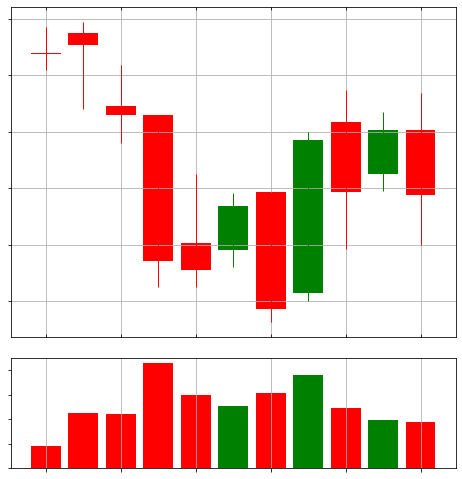

In [7]:
fig=plot_candles(df_pricing,volume_bars=True)

In [8]:
df_pricing = obtain_data('TCS', date(2021, 1, 1), date(2021, 1, 15))
df_pricing

Date Symbol  open_price     high      low  close_price  \
Date                                                                       
2021-01-01  2021-01-01    TCS     2880.00  2940.00  2879.00      2928.25   
2021-01-04  2021-01-04    TCS     2950.00  3050.75  2940.95      3039.45   
2021-01-05  2021-01-05    TCS     3039.60  3114.25  3039.60      3093.00   
2021-01-06  2021-01-06    TCS     3100.00  3113.50  3037.20      3051.50   
2021-01-07  2021-01-07    TCS     3075.00  3080.85  3000.25      3032.80   
2021-01-08  2021-01-08    TCS     3090.00  3128.00  3060.00      3120.90   
2021-01-11  2021-01-11    TCS     3230.00  3230.00  3146.55      3176.45   
2021-01-12  2021-01-12    TCS     3176.45  3210.00  3150.00      3174.85   
2021-01-13  2021-01-13    TCS     3175.00  3177.00  3126.25      3158.95   
2021-01-14  2021-01-14    TCS     3155.00  3266.50  3120.40      3250.70   
2021-01-15  2021-01-15    TCS     3235.00  3274.00  3210.00      3233.35   

               VWAP   volume  Deliverable Volume  
Date                                              
2021-01-01  2913.52  2681440              504010  
2021-01-04  2998.15  5113293             1182335  
2021-01-05  3084.07  5801309             1554550  
2021-01-06  3078.56  3726716             1054841  
2021-01-07  3028.74  3717827             1490971  
2021-01-08  3100.97  5879039             1754802  
2021-01-11  3174.16  9508039             3153741  
2021-01-12  3187.07  3611458             1656842  
2021-01-13  3147.46  3572801             1857249  
2021-01-14  3207.17  6931542             3067056  
2021-01-15  3240.98  4131692             1959292

i =  0
n =  0
n =  1
n =  2
n =  3
n =  4
i =  1
n =  0
n =  1
n =  2
n =  3
n =  4
i =  2
n =  0
n =  1
n =  2
n =  3
n =  4
i =  3
n =  0
n =  1
n =  2
n =  3
n =  4
i =  4
n =  0
n =  1
n =  2
n =  3
n =  4
i =  5
n =  0
n =  1
n =  2
n =  3
n =  4
i =  6
n =  0
n =  1
n =  2
n =  3
n =  4
i =  7
n =  0
n =  1
n =  2
n =  3
n =  4
Down 7 4
i =  8
n =  0
n =  1
n =  2
n =  3
n =  4
i =  9
n =  0
n =  1
n =  2
n =  3
Up 9 3
i =  10
n =  0
n =  1
n =  2
Up 10 2
i =  11
n =  0
n =  1
Up 11 1
i =  12
n =  0
n =  1
n =  2
n =  3
n =  4
i =  13
n =  0
n =  1
n =  2
n =  3
Up 13 3
i =  14
n =  0
n =  1
n =  2
n =  3
n =  4
Up 14 4
i =  15
n =  0
n =  1
n =  2
n =  3
Up 15 3
i =  16
n =  0
n =  1
n =  2
n =  3
n =  4
i =  17
n =  0
n =  1
n =  2
n =  3
n =  4
i =  18
n =  0
n =  1
n =  2
n =  3
n =  4
i =  19
n =  0
n =  1
n =  2
n =  3
n =  4
i =  20
n =  0
n =  1
n =  2
n =  3
n =  4
Up 20 4
i =  21
n =  0
n =  1
n =  2
n =  3
Up 21 3
i =  22
n =  0
n =  1
n =  2
Up 22 2
i =  23
n =  0
n =

<ipython-input-6-51f77c2c3068>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]},figsize=(7,7))


Down 118 3
i =  119
n =  0
n =  1
n =  2
n =  3
Down 119 3
i =  120
n =  0
n =  1
n =  2
Down 120 2
i =  121
n =  0
n =  1
Down 121 1
i =  122
n =  0
n =  1
n =  2
n =  3
n =  4
i =  123
n =  0
n =  1
n =  2
n =  3
n =  4
i =  124
n =  0
n =  1
n =  2
n =  3
Down 124 3
i =  125
n =  0
n =  1
n =  2
Down 125 2
i =  126
n =  0
n =  1
n =  2
Down 126 2
i =  127
n =  0
n =  1
Down 127 1
i =  128
n =  0
n =  1
n =  2
Down 128 2
i =  129
n =  0
n =  1
Down 129 1
i =  130
n =  0
n =  1
Up 130 1
i =  131
n =  0
n =  1
Down 131 1
i =  132
n =  0
n =  1
n =  2
Down 132 2
i =  133
n =  0
n =  1
Down 133 1
i =  134
n =  0
n =  1
Down 134 1
i =  135
n =  0
n =  1
Up 135 1
i =  136
n =  0
n =  1
Down 136 1
i =  137
n =  0
n =  1
Up 137 1
i =  138
n =  0
n =  1
Up 138 1
i =  139
n =  0
n =  1
n =  2
n =  3
Down 139 3
i =  140
n =  0
n =  1
n =  2
n =  3
Up 140 3
i =  141
n =  0
n =  1
n =  2
Up 141 2
i =  142
n =  0
n =  1
Up 142 1
i =  143
n =  0
n =  1
n =  2
n =  3
Up 143 3
i =  144
n =  0
n =  1


n =  4
i =  65
n =  0
n =  1
n =  2
n =  3
n =  4
Up 65 4
i =  66
n =  0
n =  1
n =  2
n =  3
Up 66 3
i =  67
n =  0
n =  1
n =  2
Up 67 2
i =  68
n =  0
n =  1
n =  2
Up 68 2
i =  69
n =  0
n =  1
n =  2
n =  3
Up 69 3
i =  70
n =  0
n =  1
n =  2
n =  3
n =  4
i =  71
n =  0
n =  1
n =  2
n =  3
n =  4
i =  72
n =  0
n =  1
n =  2
n =  3
n =  4
i =  73
n =  0
n =  1
n =  2
n =  3
n =  4
i =  74
n =  0
n =  1
n =  2
n =  3
n =  4
i =  75
n =  0
n =  1
n =  2
n =  3
n =  4
i =  76
n =  0
n =  1
n =  2
n =  3
n =  4
i =  77
n =  0
n =  1
n =  2
n =  3
n =  4
i =  78
n =  0
n =  1
n =  2
n =  3
n =  4
i =  79
n =  0
n =  1
n =  2
n =  3
n =  4
i =  80
n =  0
n =  1
n =  2
n =  3
n =  4
i =  81
n =  0
n =  1
n =  2
n =  3
n =  4
Up 81 4
i =  82
n =  0
n =  1
n =  2
n =  3
n =  4
i =  83
n =  0
n =  1
n =  2
n =  3
n =  4
i =  84
n =  0
n =  1
n =  2
n =  3
n =  4
i =  85
n =  0
n =  1
n =  2
n =  3
n =  4
i =  86
n =  0
n =  1
n =  2
n =  3
n =  4
i =  87
n =  0
n =  1
n =  2
n =  3
n =  

Up 23 2
i =  24
n =  0
n =  1
Up 24 1
i =  25
n =  0
n =  1
n =  2
Down 25 2
i =  26
n =  0
n =  1
n =  2
n =  3
n =  4
i =  27
n =  0
n =  1
n =  2
n =  3
n =  4
Down 27 4
i =  28
n =  0
n =  1
n =  2
n =  3
Down 28 3
i =  29
n =  0
n =  1
n =  2
Down 29 2
i =  30
n =  0
n =  1
Down 30 1
i =  31
n =  0
n =  1
n =  2
n =  3
n =  4
i =  32
n =  0
n =  1
n =  2
n =  3
n =  4
i =  33
n =  0
n =  1
n =  2
n =  3
n =  4
Up 33 4
i =  34
n =  0
n =  1
n =  2
n =  3
n =  4
Up 34 4
i =  35
n =  0
n =  1
n =  2
n =  3
Up 35 3
i =  36
n =  0
n =  1
n =  2
Up 36 2
i =  37
n =  0
n =  1
Up 37 1
i =  38
n =  0
n =  1
n =  2
n =  3
n =  4
Up 38 4
i =  39
n =  0
n =  1
n =  2
n =  3
n =  4
Up 39 4
i =  40
n =  0
n =  1
n =  2
n =  3
n =  4
i =  41
n =  0
n =  1
n =  2
n =  3
n =  4
i =  42
n =  0
n =  1
n =  2
n =  3
n =  4
i =  43
n =  0
n =  1
n =  2
n =  3
Down 43 3
i =  44
n =  0
n =  1
n =  2
n =  3
n =  4
i =  45
n =  0
n =  1
n =  2
n =  3
n =  4
i =  46
n =  0
n =  1
n =  2
n =  3
n =  4
i =  

Up 215 2
i =  216
n =  0
n =  1
n =  2
n =  3
n =  4
i =  217
n =  0
n =  1
n =  2
n =  3
n =  4
i =  218
n =  0
n =  1
n =  2
n =  3
n =  4
Up 218 4
i =  219
n =  0
n =  1
n =  2
Up 219 2
i =  220
n =  0
n =  1
n =  2
Up 220 2
i =  221
n =  0
n =  1
n =  2
n =  3
n =  4
i =  222
n =  0
n =  1
n =  2
n =  3
n =  4
i =  223
n =  0
n =  1
n =  2
n =  3
n =  4
i =  224
n =  0
n =  1
n =  2
n =  3
n =  4
i =  225
n =  0
n =  1
n =  2
n =  3
n =  4
i =  226
n =  0
n =  1
n =  2
n =  3
n =  4
i =  227
n =  0
n =  1
n =  2
n =  3
n =  4
i =  228
n =  0
n =  1
n =  2
n =  3
n =  4
i =  229
n =  0
n =  1
n =  2
n =  3
n =  4
i =  230
n =  0
n =  1
n =  2
n =  3
n =  4
i =  231
n =  0
n =  1
n =  2
n =  3
n =  4
i =  232
n =  0
n =  1
n =  2
n =  3
n =  4
i =  233
n =  0
n =  1
n =  2
n =  3
n =  4
i =  234
n =  0
n =  1
n =  2
n =  3
n =  4
i =  235
n =  0
n =  1
n =  2
n =  3
n =  4
i =  236
n =  0
n =  1
n =  2
n =  3
n =  4
i =  237
n =  0
n =  1
n =  2
n =  3
n =  4
i =  238
n =  0
n =  1
n

Down 160 2
i =  161
n =  0
n =  1
Down 161 1
i =  162
n =  0
n =  1
n =  2
n =  3
n =  4
i =  163
n =  0
n =  1
Up 163 1
i =  164
n =  0
n =  1
n =  2
n =  3
n =  4
Down 164 4
i =  165
n =  0
n =  1
n =  2
n =  3
n =  4
i =  166
n =  0
n =  1
n =  2
n =  3
n =  4
Down 166 4
i =  167
n =  0
n =  1
n =  2
n =  3
n =  4
i =  168
n =  0
n =  1
n =  2
n =  3
n =  4
Down 168 4
i =  169
n =  0
n =  1
n =  2
Down 169 2
i =  170
n =  0
n =  1
n =  2
Down 170 2
i =  171
n =  0
n =  1
Down 171 1
i =  172
n =  0
n =  1
n =  2
n =  3
n =  4
i =  173
n =  0
n =  1
n =  2
n =  3
n =  4
i =  174
n =  0
n =  1
n =  2
n =  3
n =  4
Up 174 4
i =  175
n =  0
n =  1
n =  2
n =  3
Up 175 3
i =  176
n =  0
n =  1
n =  2
Up 176 2
i =  177
n =  0
n =  1
Up 177 1
i =  178
n =  0
n =  1
Up 178 1
i =  179
n =  0
n =  1
n =  2
Up 179 2
i =  180
n =  0
n =  1
Up 180 1
i =  181
n =  0
n =  1
n =  2
n =  3
n =  4
Up 181 4
i =  182
n =  0
n =  1
n =  2
n =  3
n =  4
i =  183
n =  0
n =  1
n =  2
n =  3
n =  4
i =  184

Up 101 3
i =  102
n =  0
n =  1
n =  2
Up 102 2
i =  103
n =  0
n =  1
Up 103 1
i =  104
n =  0
n =  1
n =  2
n =  3
n =  4
i =  105
n =  0
n =  1
n =  2
n =  3
n =  4
i =  106
n =  0
n =  1
n =  2
n =  3
n =  4
i =  107
n =  0
n =  1
n =  2
n =  3
n =  4
Up 107 4
i =  108
n =  0
n =  1
n =  2
n =  3
Up 108 3
i =  109
n =  0
n =  1
n =  2
Up 109 2
i =  110
n =  0
n =  1
Up 110 1
i =  111
n =  0
n =  1
n =  2
n =  3
n =  4
i =  112
n =  0
n =  1
n =  2
n =  3
n =  4
i =  113
n =  0
n =  1
n =  2
n =  3
n =  4
i =  114
n =  0
n =  1
n =  2
n =  3
n =  4
i =  115
n =  0
n =  1
n =  2
n =  3
n =  4
i =  116
n =  0
n =  1
n =  2
n =  3
n =  4
i =  117
n =  0
n =  1
n =  2
n =  3
n =  4
i =  118
n =  0
n =  1
n =  2
n =  3
n =  4
i =  119
n =  0
n =  1
n =  2
n =  3
n =  4
i =  120
n =  0
n =  1
n =  2
n =  3
n =  4
i =  121
n =  0
n =  1
n =  2
Down 121 2
i =  122
n =  0
n =  1
n =  2
n =  3
n =  4
i =  123
n =  0
n =  1
n =  2
n =  3
n =  4
i =  124
n =  0
n =  1
n =  2
n =  3
n =  4
i =  

Up 53 3
i =  54
n =  0
n =  1
n =  2
n =  3
Up 54 3
i =  55
n =  0
n =  1
n =  2
Up 55 2
i =  56
n =  0
n =  1
n =  2
n =  3
n =  4
i =  57
n =  0
n =  1
n =  2
n =  3
Down 57 3
i =  58
n =  0
n =  1
n =  2
n =  3
n =  4
i =  59
n =  0
n =  1
n =  2
n =  3
n =  4
Down 59 4
i =  60
n =  0
n =  1
n =  2
n =  3
Down 60 3
i =  61
n =  0
n =  1
n =  2
Down 61 2
i =  62
n =  0
n =  1
Down 62 1
i =  63
n =  0
n =  1
n =  2
n =  3
n =  4
i =  64
n =  0
n =  1
n =  2
n =  3
n =  4
Up 64 4
i =  65
n =  0
n =  1
n =  2
n =  3
Up 65 3
i =  66
n =  0
n =  1
n =  2
Up 66 2
i =  67
n =  0
n =  1
n =  2
n =  3
n =  4
i =  68
n =  0
n =  1
n =  2
n =  3
n =  4
i =  69
n =  0
n =  1
n =  2
n =  3
n =  4
i =  70
n =  0
n =  1
n =  2
n =  3
n =  4
i =  71
n =  0
n =  1
n =  2
n =  3
n =  4
i =  72
n =  0
n =  1
n =  2
n =  3
n =  4
i =  73
n =  0
n =  1
n =  2
n =  3
n =  4
i =  74
n =  0
n =  1
n =  2
n =  3
n =  4
i =  75
n =  0
n =  1
n =  2
n =  3
n =  4
i =  76
n =  0
n =  1
n =  2
n =  3
n =  4
i = 

i =  0
n =  0
n =  1
n =  2
n =  3
n =  4
Up 0 4
i =  1
n =  0
n =  1
n =  2
Up 1 2
i =  2
n =  0
n =  1
n =  2
Up 2 2
i =  3
n =  0
n =  1
n =  2
n =  3
n =  4
i =  4
n =  0
n =  1
n =  2
n =  3
n =  4
i =  5
n =  0
n =  1
n =  2
n =  3
n =  4
i =  6
n =  0
n =  1
n =  2
n =  3
n =  4
i =  7
n =  0
n =  1
n =  2
n =  3
n =  4
i =  8
n =  0
n =  1
n =  2
n =  3
n =  4
Up 8 4
i =  9
n =  0
n =  1
n =  2
n =  3
Up 9 3
i =  10
n =  0
n =  1
n =  2
Up 10 2
i =  11
n =  0
n =  1
Up 11 1
i =  12
n =  0
n =  1
Up 12 1
i =  13
n =  0
n =  1
n =  2
n =  3
n =  4
i =  14
n =  0
n =  1
n =  2
n =  3
n =  4
i =  15
n =  0
n =  1
n =  2
n =  3
n =  4
i =  16
n =  0
n =  1
n =  2
n =  3
n =  4
i =  17
n =  0
n =  1
n =  2
n =  3
n =  4
Down 17 4
i =  18
n =  0
n =  1
n =  2
n =  3
n =  4
i =  19
n =  0
n =  1
n =  2
n =  3
n =  4
i =  20
n =  0
n =  1
n =  2
n =  3
n =  4
i =  21
n =  0
n =  1
n =  2
n =  3
n =  4
i =  22
n =  0
n =  1
n =  2
n =  3
n =  4
i =  23
n =  0
n =  1
n =  2
n =  3
n =  4


Up 201 3
i =  202
n =  0
n =  1
Up 202 1
i =  203
n =  0
n =  1
n =  2
n =  3
Up 203 3
i =  204
n =  0
n =  1
n =  2
Up 204 2
i =  205
n =  0
n =  1
Up 205 1
i =  206
n =  0
n =  1
Up 206 1
i =  207
n =  0
n =  1
Down 207 1
i =  208
n =  0
n =  1
Up 208 1
i =  209
n =  0
n =  1
n =  2
n =  3
Down 209 3
i =  210
n =  0
n =  1
n =  2
Down 210 2
i =  211
n =  0
n =  1
n =  2
n =  3
n =  4
i =  212
n =  0
n =  1
n =  2
n =  3
n =  4
Up 212 4
i =  213
n =  0
n =  1
n =  2
Up 213 2
i =  214
n =  0
n =  1
n =  2
Up 214 2
i =  215
n =  0
n =  1
Up 215 1
i =  216
n =  0
n =  1
Down 216 1
i =  217
n =  0
n =  1
n =  2
n =  3
n =  4
i =  218
n =  0
n =  1
n =  2
n =  3
n =  4
i =  219
n =  0
n =  1
n =  2
Down 219 2
i =  220
n =  0
n =  1
n =  2
n =  3
n =  4
i =  221
n =  0
n =  1
n =  2
n =  3
n =  4
i =  222
n =  0
n =  1
n =  2
n =  3
n =  4
i =  223
n =  0
n =  1
n =  2
n =  3
n =  4
i =  224
n =  0
n =  1
n =  2
n =  3
n =  4
i =  225
n =  0
n =  1
n =  2
n =  3
n =  4
i =  226
n =  0
n =  

n =  1
n =  2
Up 150 2
i =  151
n =  0
n =  1
n =  2
Up 151 2
i =  152
n =  0
n =  1
n =  2
n =  3
n =  4
i =  153
n =  0
n =  1
n =  2
n =  3
Down 153 3
i =  154
n =  0
n =  1
n =  2
n =  3
Down 154 3
i =  155
n =  0
n =  1
n =  2
Down 155 2
i =  156
n =  0
n =  1
Down 156 1
i =  157
n =  0
n =  1
n =  2
Up 157 2
i =  158
n =  0
n =  1
Up 158 1
i =  159
n =  0
n =  1
Up 159 1
i =  160
n =  0
n =  1
Up 160 1
i =  161
n =  0
n =  1
Down 161 1
i =  162
n =  0
n =  1
n =  2
n =  3
n =  4
i =  163
n =  0
n =  1
n =  2
n =  3
n =  4
i =  164
n =  0
n =  1
n =  2
n =  3
Down 164 3
i =  165
n =  0
n =  1
n =  2
n =  3
n =  4
i =  166
n =  0
n =  1
n =  2
n =  3
n =  4
i =  167
n =  0
n =  1
n =  2
n =  3
n =  4
i =  168
n =  0
n =  1
n =  2
n =  3
n =  4
Down 168 4
i =  169
n =  0
n =  1
Down 169 1
i =  170
n =  0
n =  1
n =  2
Down 170 2
i =  171
n =  0
n =  1
Down 171 1
i =  172
n =  0
n =  1
n =  2
Up 172 2
i =  173
n =  0
n =  1
Up 173 1
i =  174
n =  0
n =  1
n =  2
Down 174 2
i =  175
n

Down 99 4
i =  100
n =  0
n =  1
n =  2
n =  3
Down 100 3
i =  101
n =  0
n =  1
n =  2
Down 101 2
i =  102
n =  0
n =  1
Down 102 1
i =  103
n =  0
n =  1
n =  2
Up 103 2
i =  104
n =  0
n =  1
n =  2
Up 104 2
i =  105
n =  0
n =  1
n =  2
n =  3
n =  4
i =  106
n =  0
n =  1
n =  2
n =  3
n =  4
i =  107
n =  0
n =  1
n =  2
n =  3
n =  4
i =  108
n =  0
n =  1
n =  2
n =  3
n =  4
i =  109
n =  0
n =  1
n =  2
n =  3
n =  4
i =  110
n =  0
n =  1
n =  2
n =  3
n =  4
i =  111
n =  0
n =  1
n =  2
n =  3
n =  4
i =  112
n =  0
n =  1
n =  2
n =  3
n =  4
i =  113
n =  0
n =  1
n =  2
n =  3
n =  4
i =  114
n =  0
n =  1
n =  2
n =  3
n =  4
i =  115
n =  0
n =  1
n =  2
n =  3
n =  4
i =  116
n =  0
n =  1
n =  2
n =  3
n =  4
Down 116 4
i =  117
n =  0
n =  1
n =  2
n =  3
Down 117 3
i =  118
n =  0
n =  1
n =  2
n =  3
n =  4
Down 118 4
i =  119
n =  0
n =  1
n =  2
n =  3
Down 119 3
i =  120
n =  0
n =  1
n =  2
Down 120 2
i =  121
n =  0
n =  1
n =  2
n =  3
n =  4
i =  122
n =  

Down 91 2
i =  92
n =  0
n =  1
Down 92 1
i =  93
n =  0
n =  1
n =  2
n =  3
n =  4
i =  94
n =  0
n =  1
n =  2
n =  3
n =  4
i =  95
n =  0
n =  1
n =  2
n =  3
n =  4
i =  96
n =  0
n =  1
n =  2
n =  3
n =  4
i =  97
n =  0
n =  1
n =  2
n =  3
n =  4
i =  98
n =  0
n =  1
n =  2
n =  3
n =  4
Up 98 4
i =  99
n =  0
n =  1
n =  2
n =  3
Up 99 3
i =  100
n =  0
n =  1
n =  2
n =  3
n =  4
i =  101
n =  0
n =  1
Up 101 1
i =  102
n =  0
n =  1
n =  2
n =  3
n =  4
i =  103
n =  0
n =  1
n =  2
n =  3
n =  4
i =  104
n =  0
n =  1
n =  2
n =  3
n =  4
i =  105
n =  0
n =  1
n =  2
n =  3
n =  4
i =  106
n =  0
n =  1
n =  2
n =  3
n =  4
i =  107
n =  0
n =  1
n =  2
n =  3
n =  4
i =  108
n =  0
n =  1
n =  2
n =  3
Up 108 3
i =  109
n =  0
n =  1
n =  2
n =  3
n =  4
i =  110
n =  0
n =  1
n =  2
n =  3
n =  4
i =  111
n =  0
n =  1
n =  2
n =  3
n =  4
i =  112
n =  0
n =  1
n =  2
n =  3
n =  4
i =  113
n =  0
n =  1
n =  2
n =  3
n =  4
i =  114
n =  0
n =  1
n =  2
n =  3
n =  

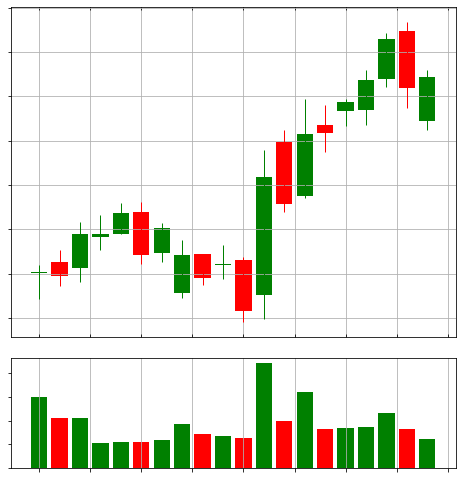

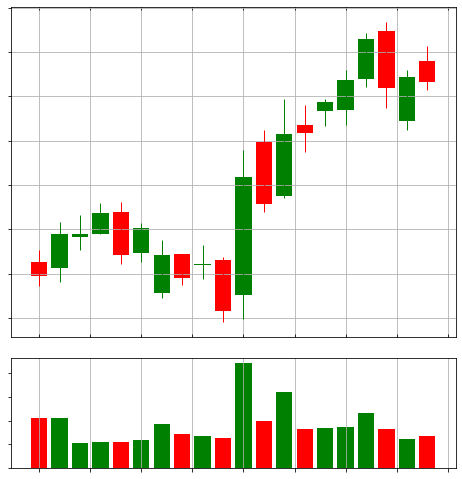

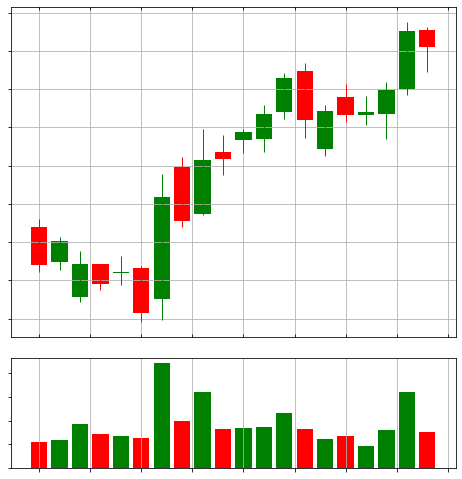

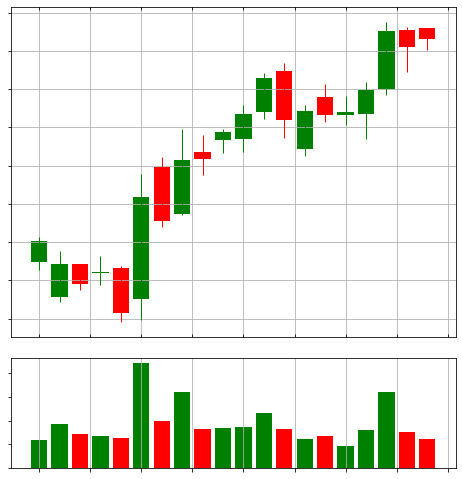

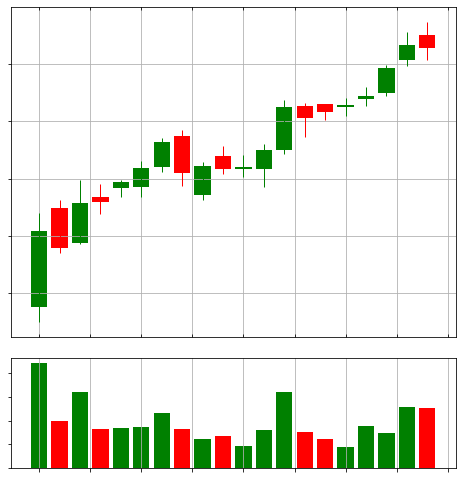

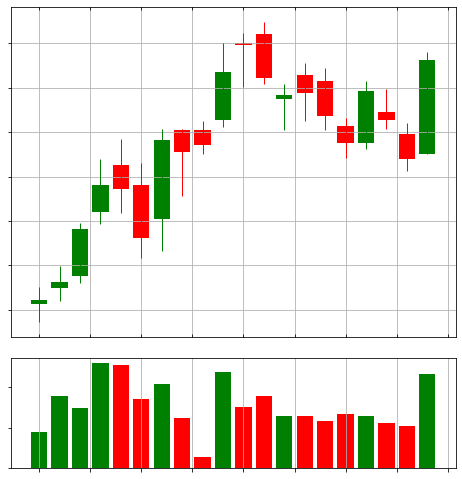

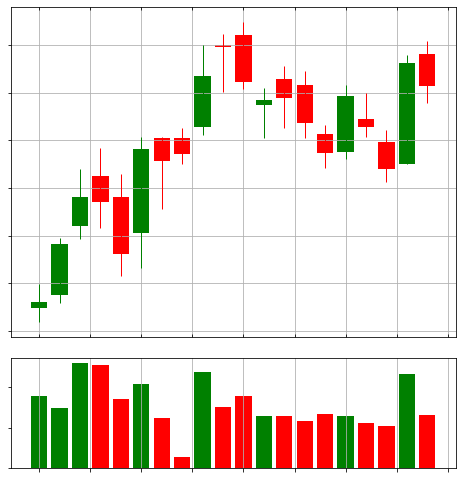

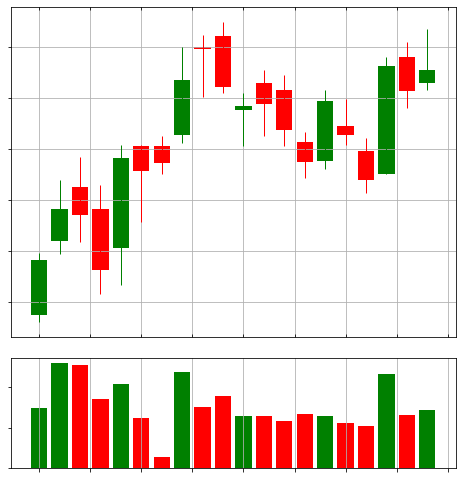

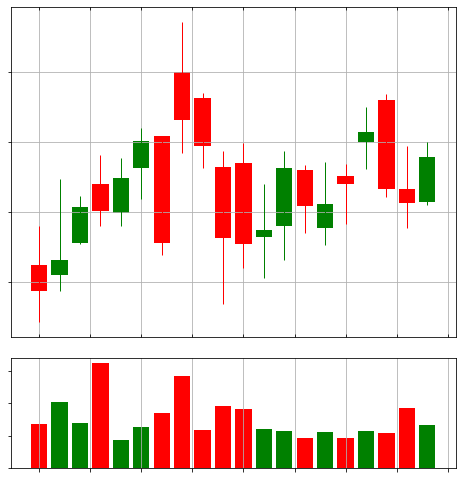

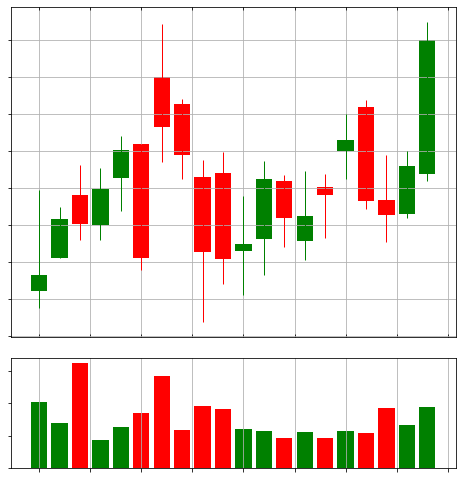

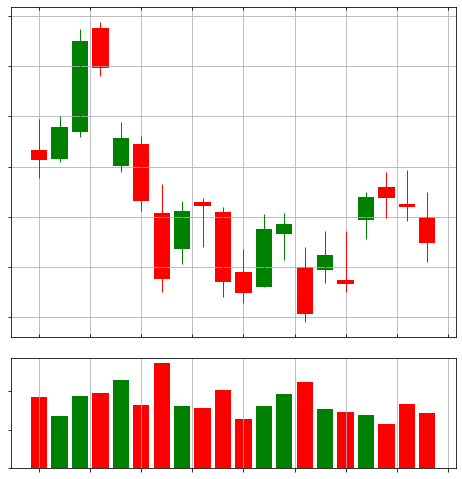

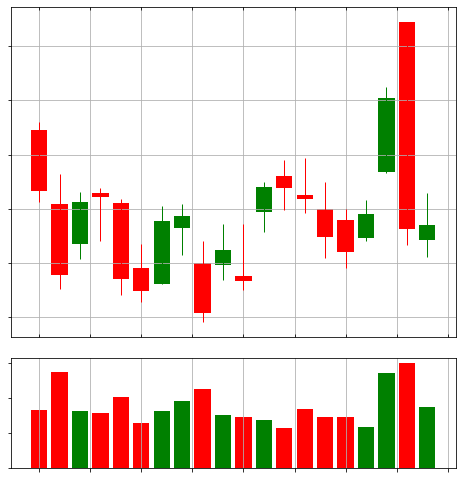

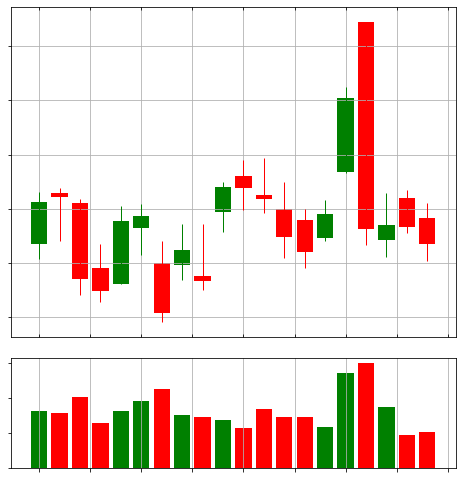

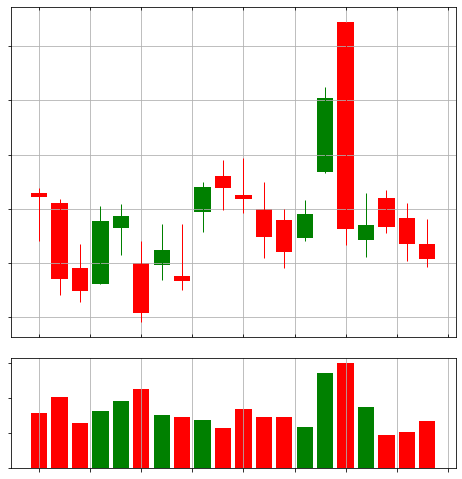

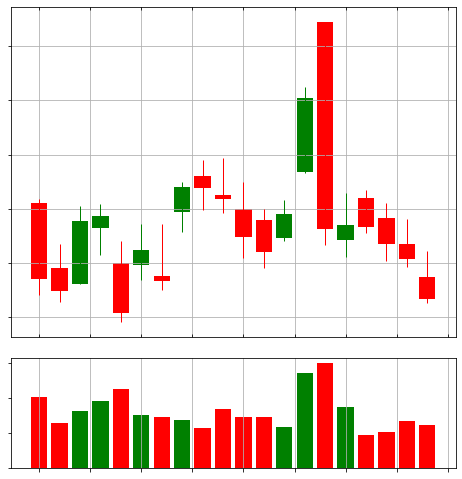

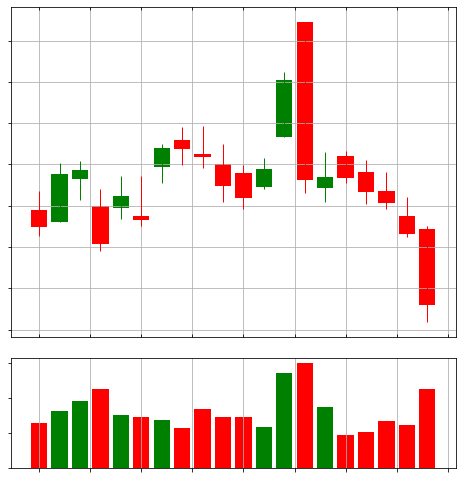

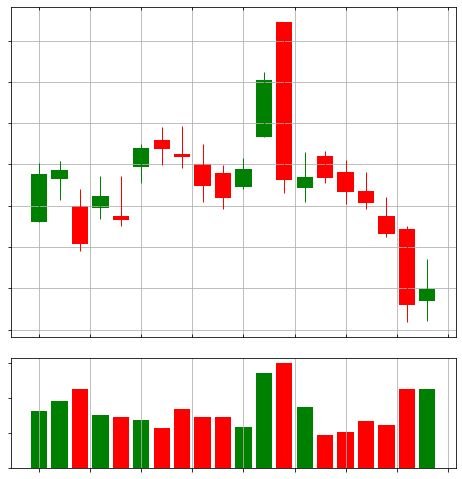

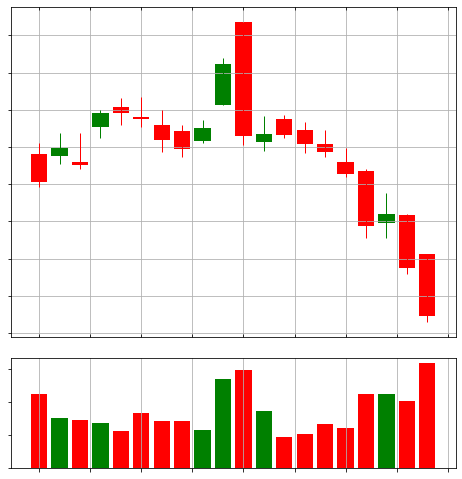

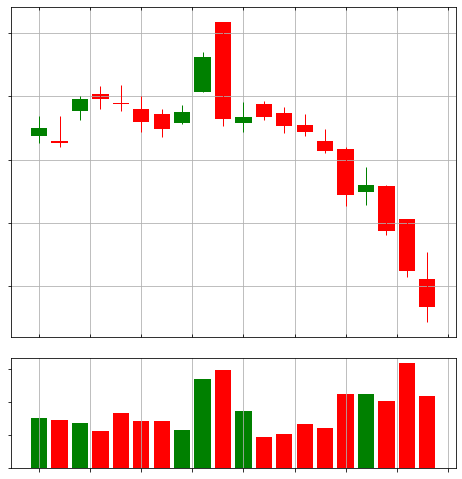

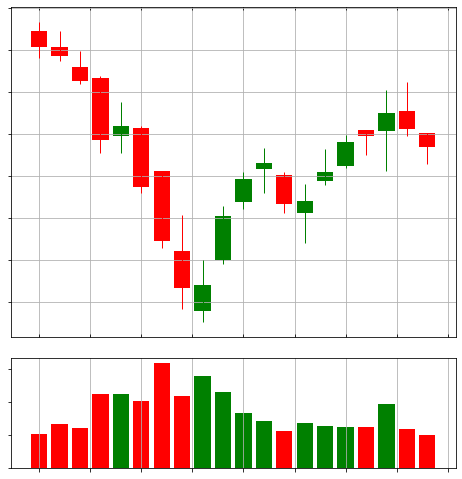

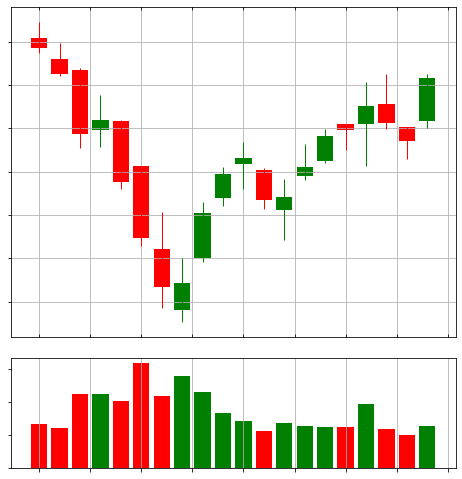

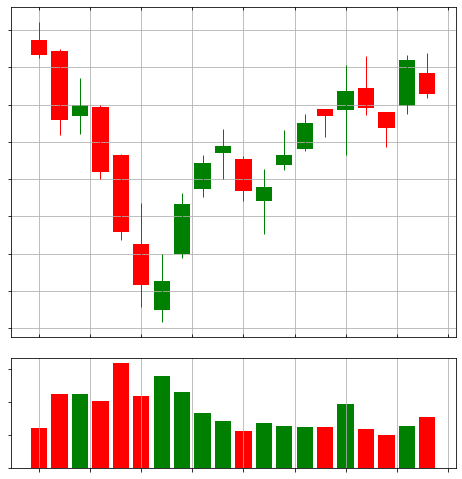

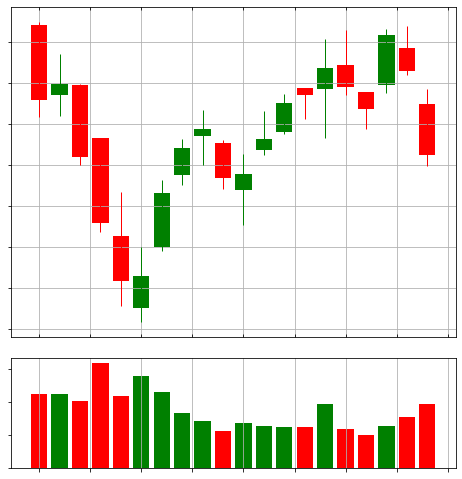

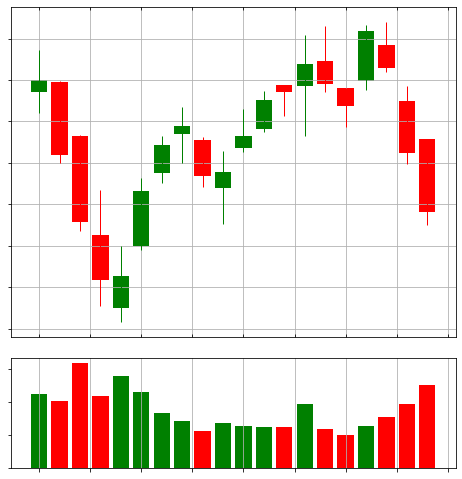

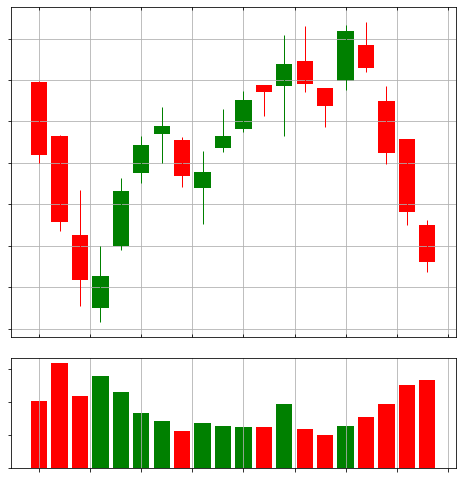

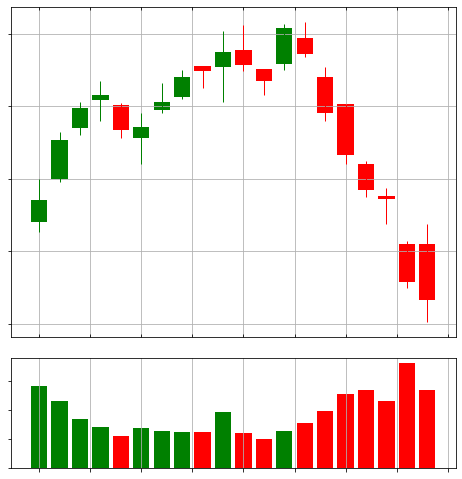

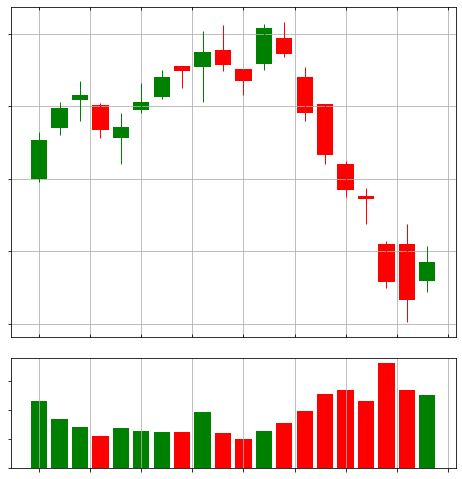

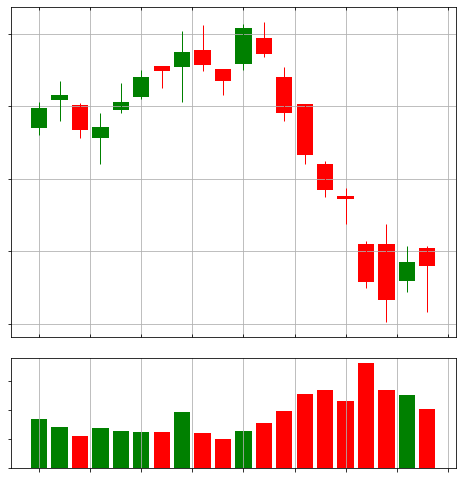

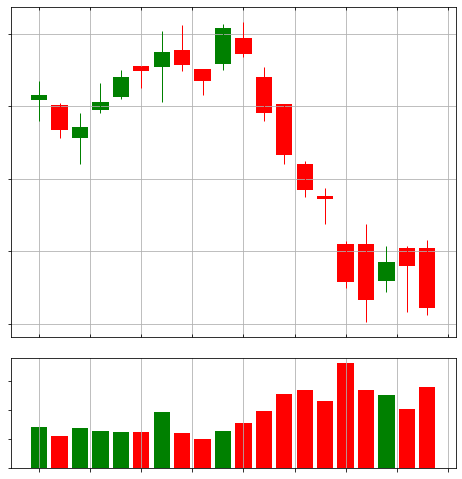

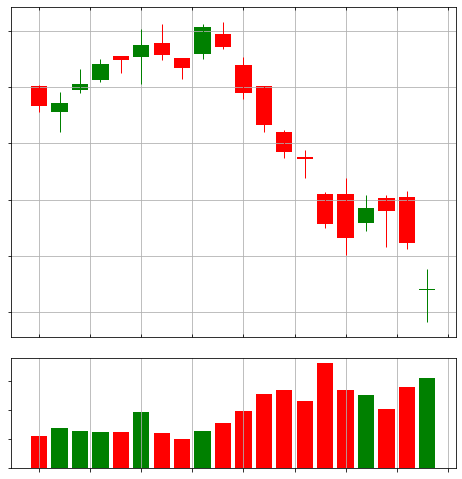

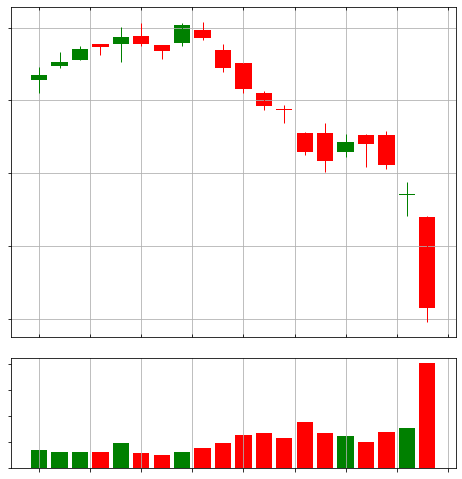

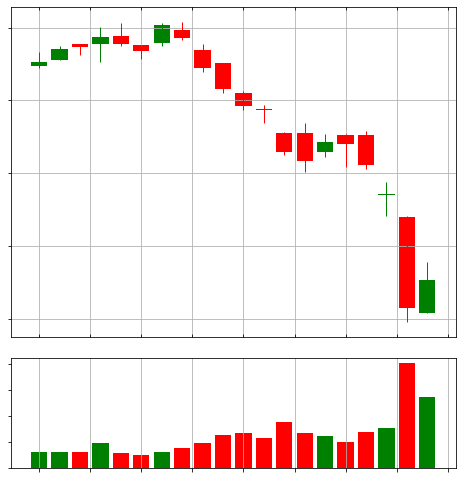

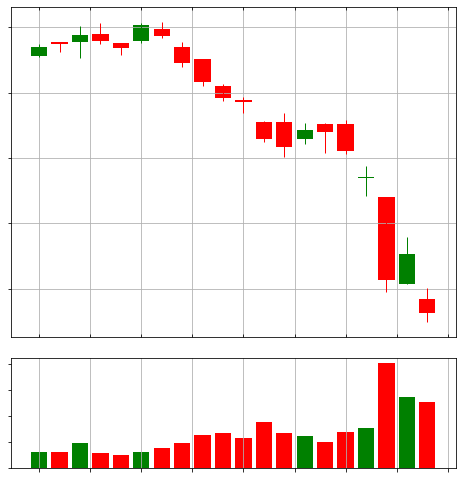

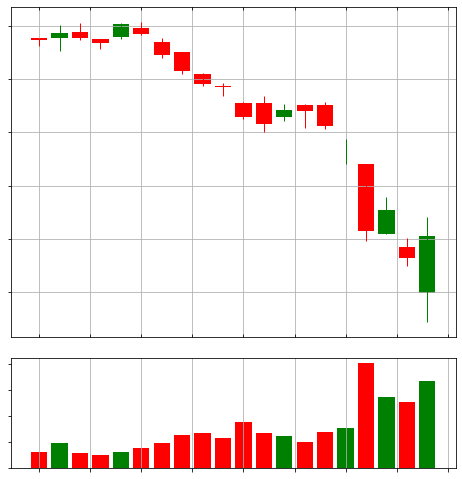

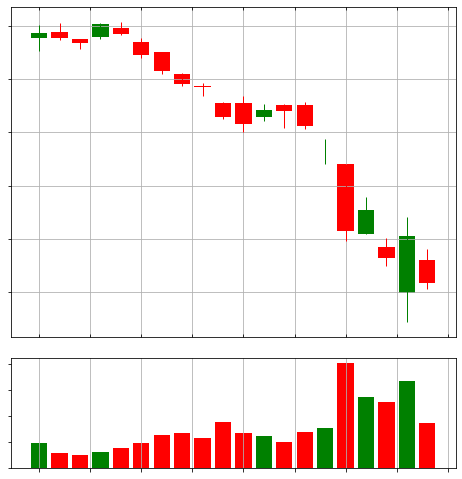

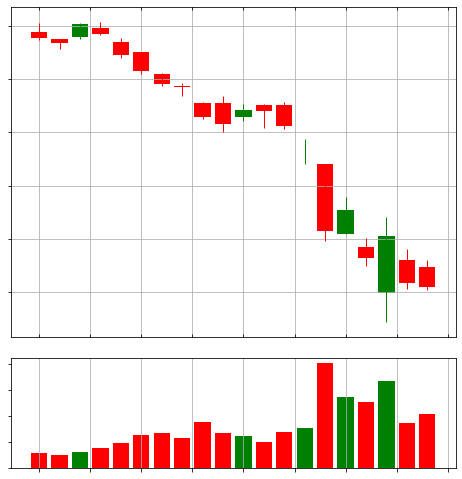

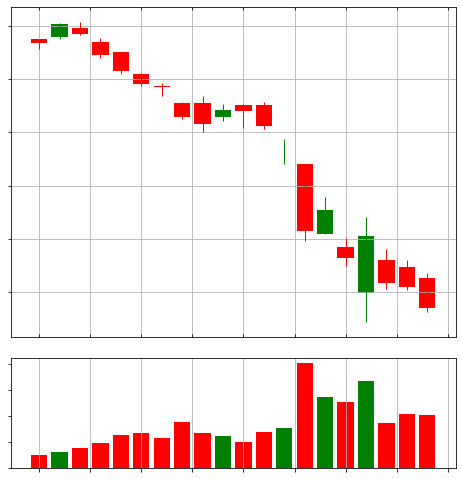

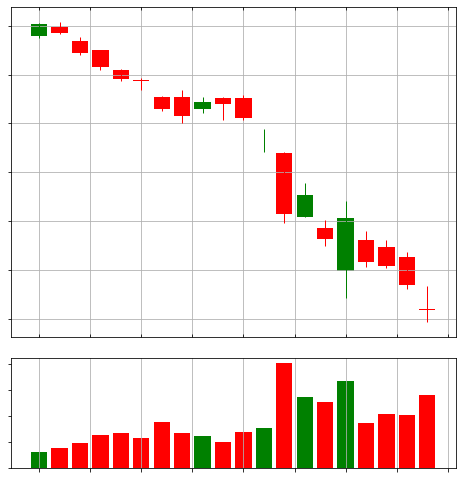

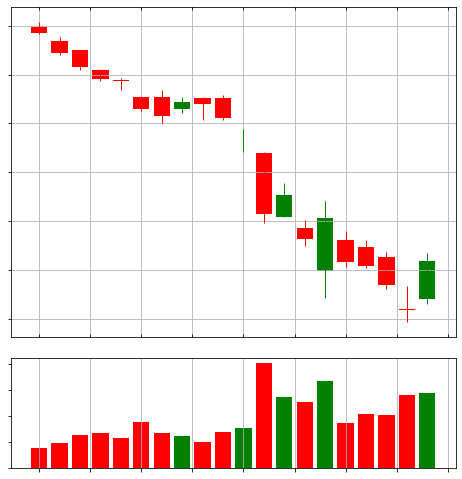

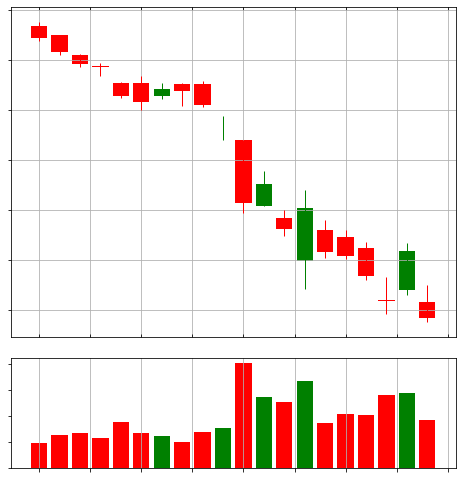

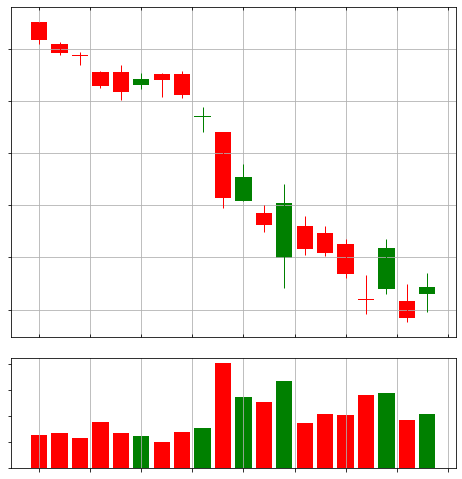

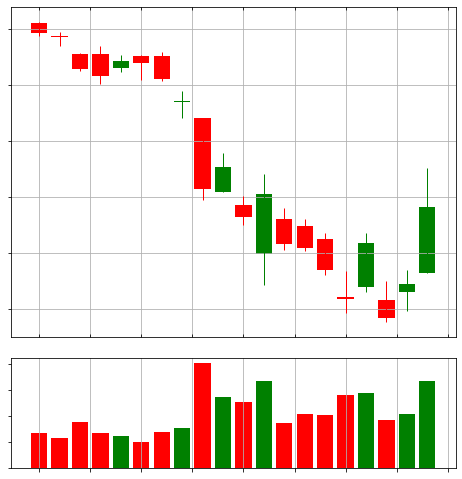

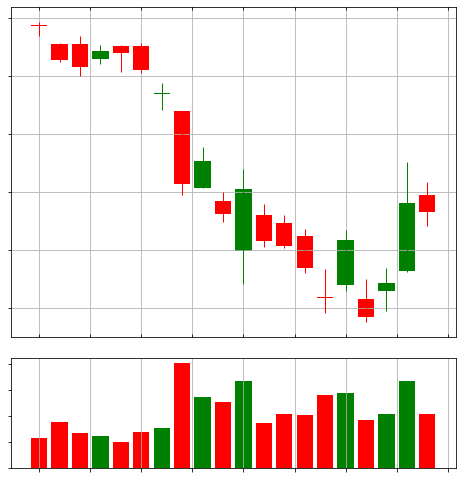

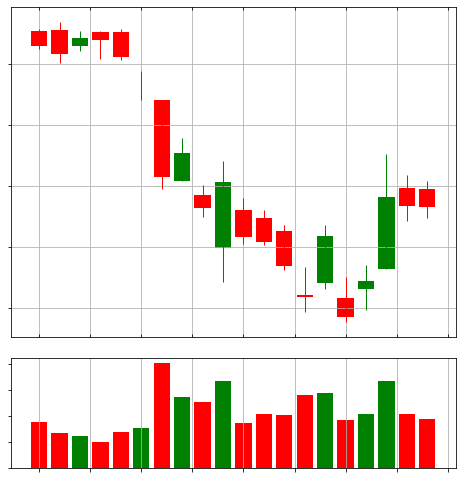

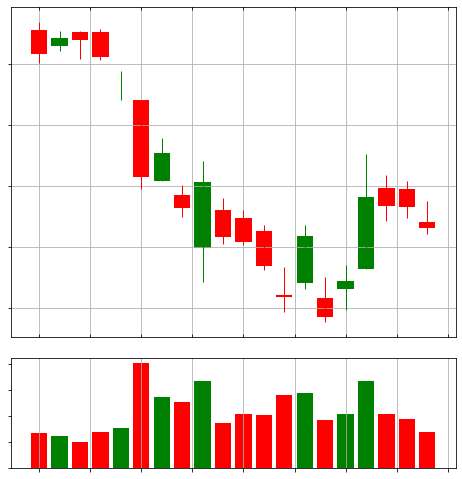

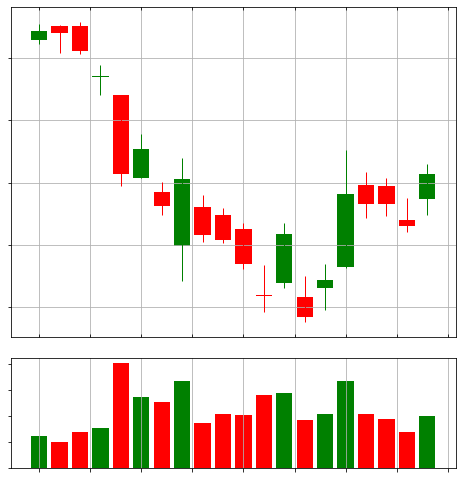

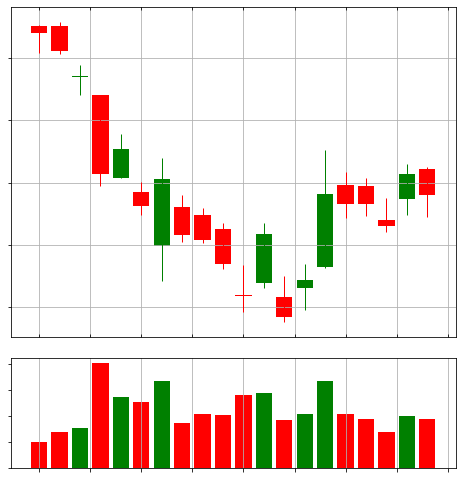

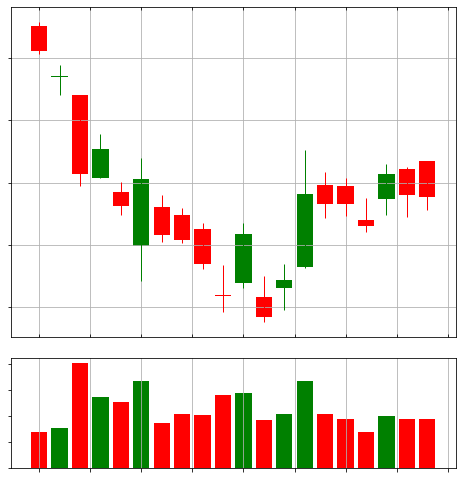

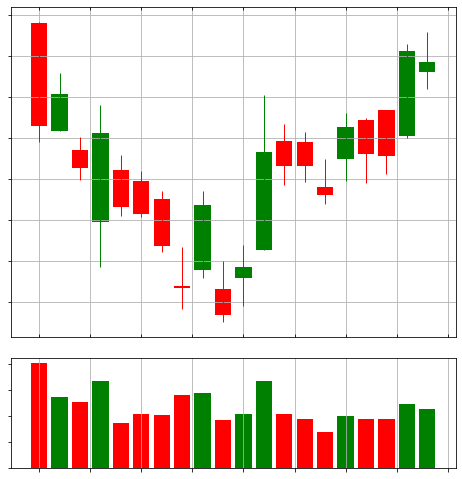

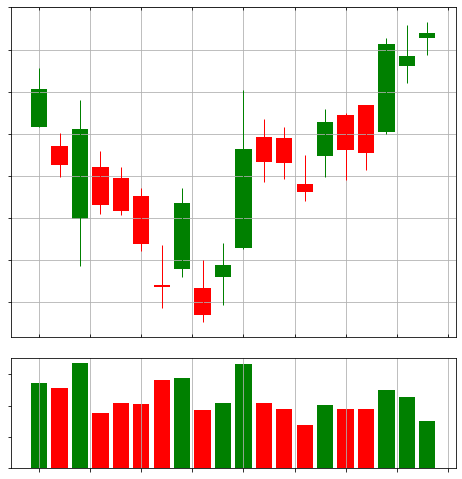

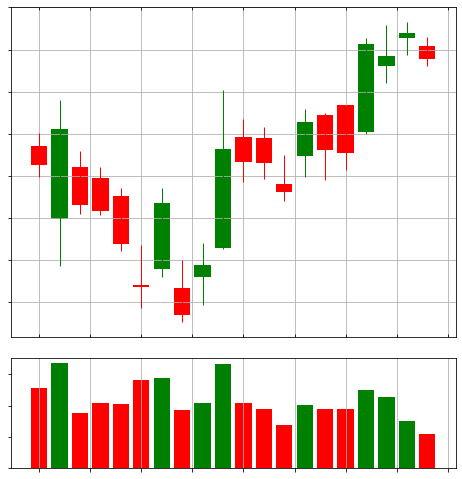

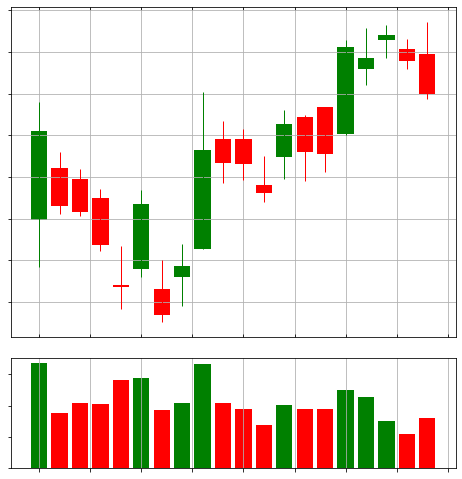

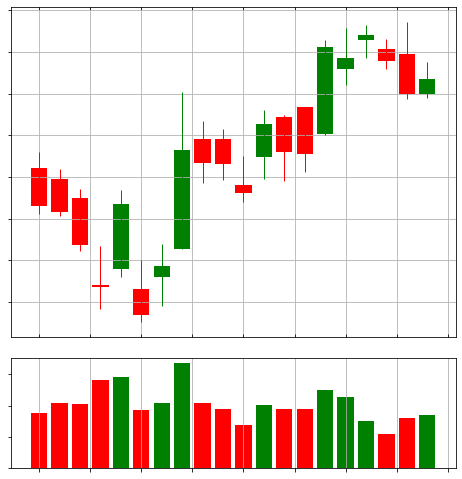

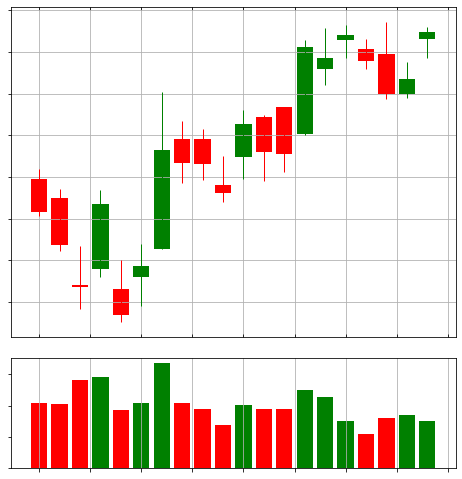

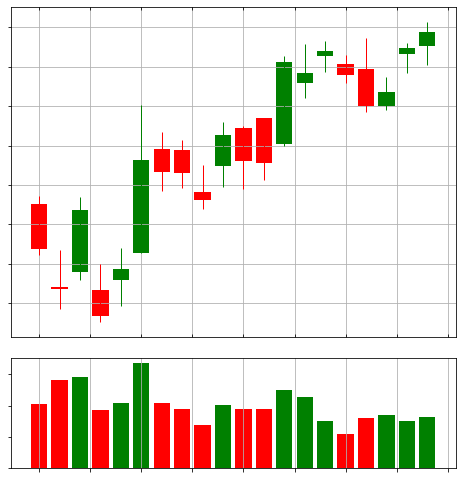

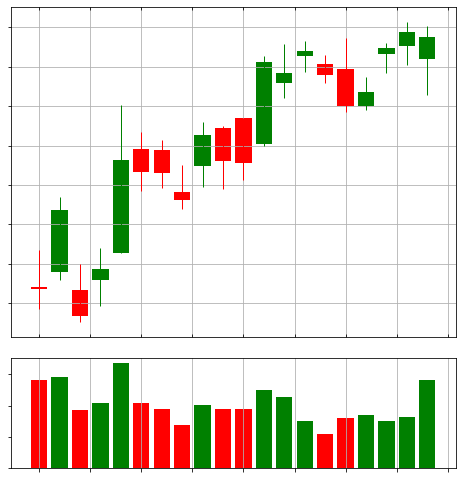

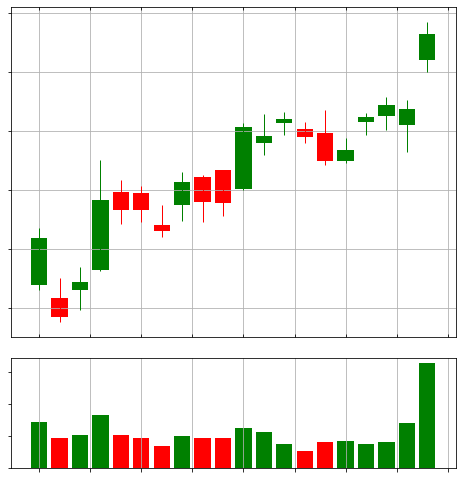

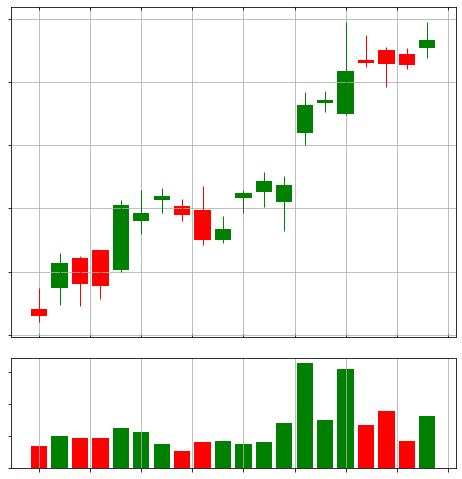

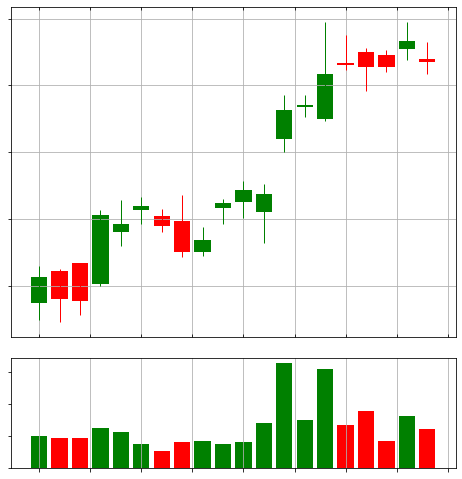

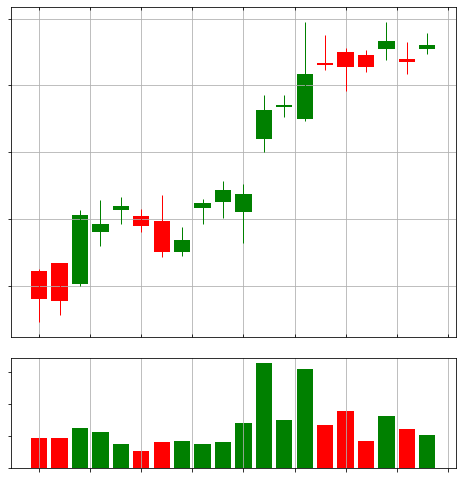

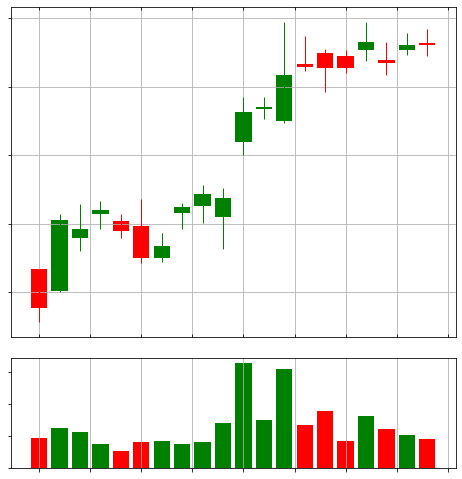

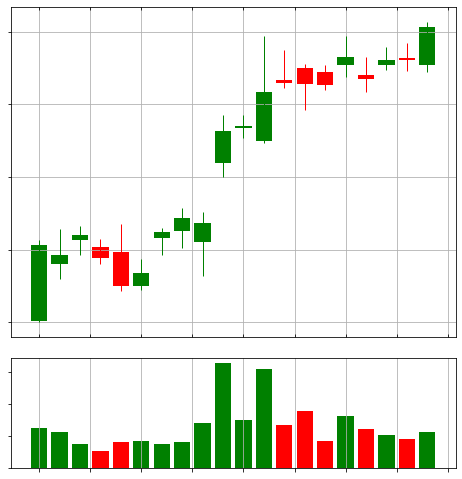

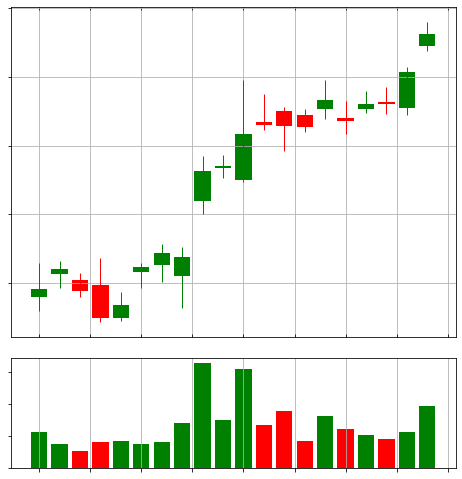

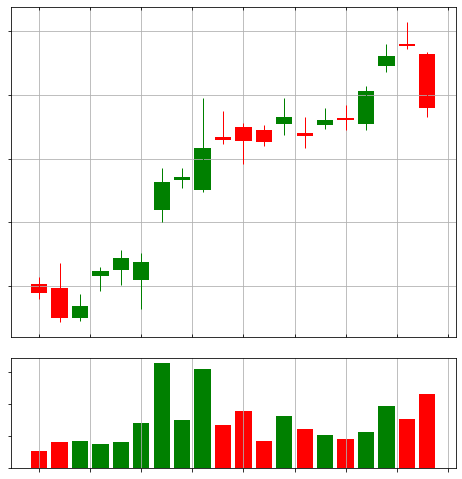

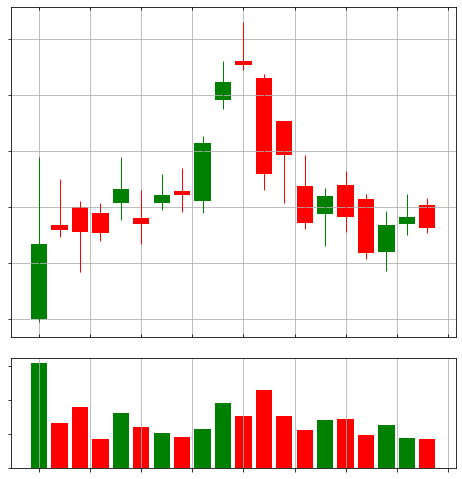

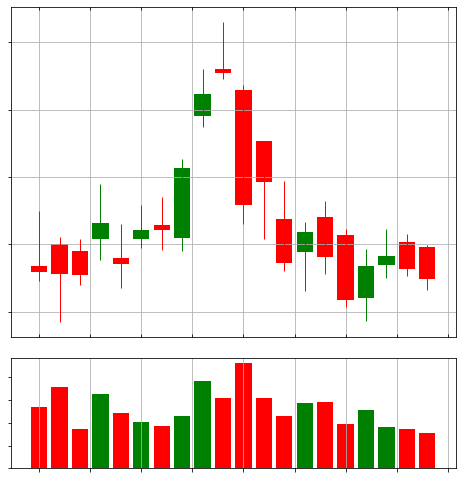

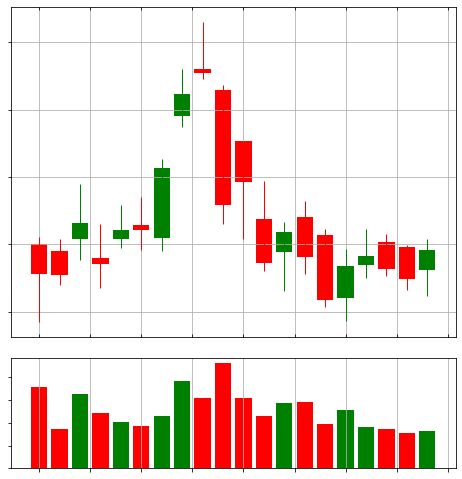

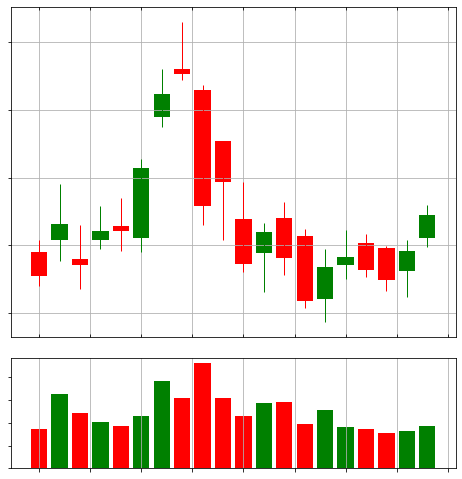

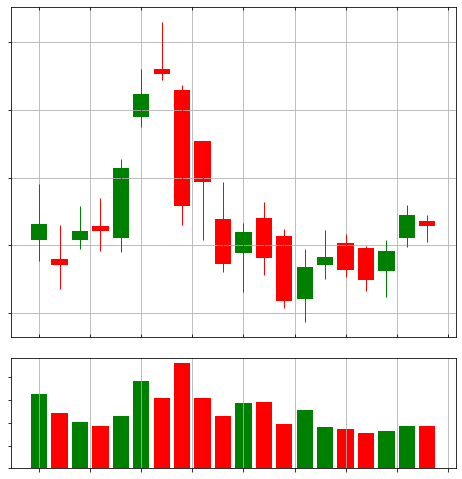

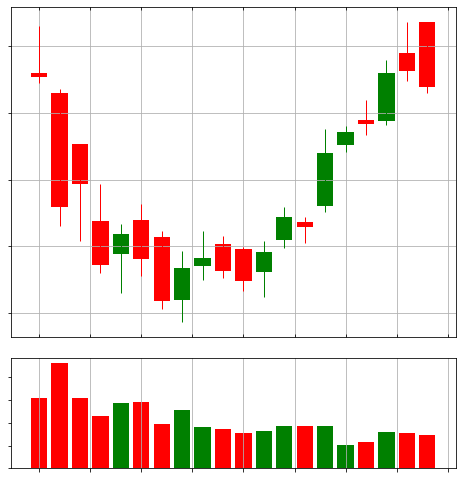

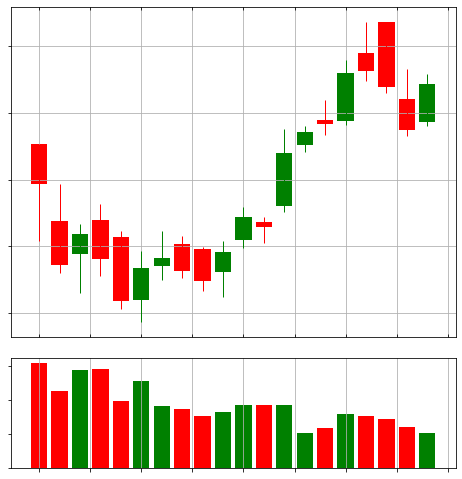

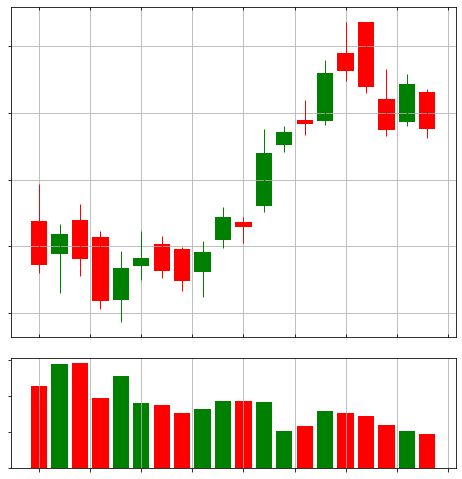

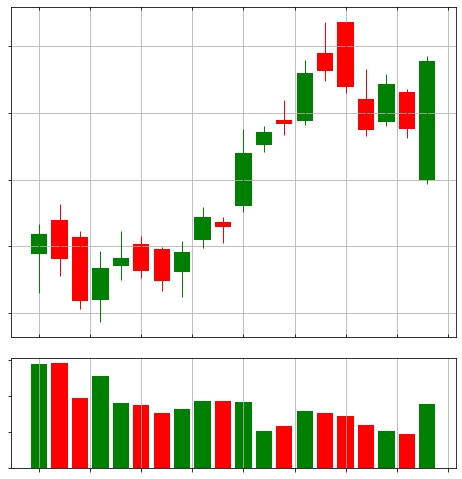

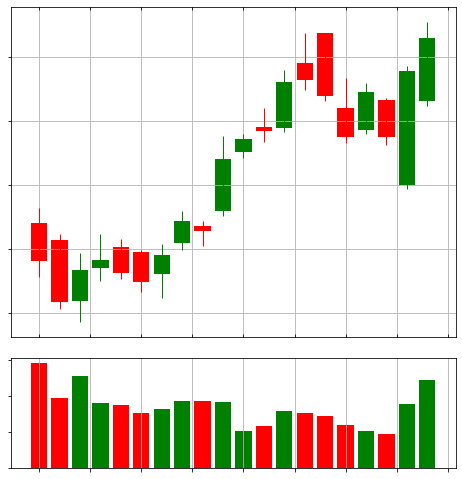

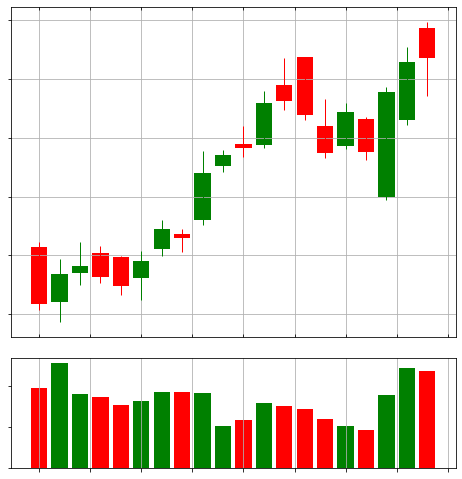

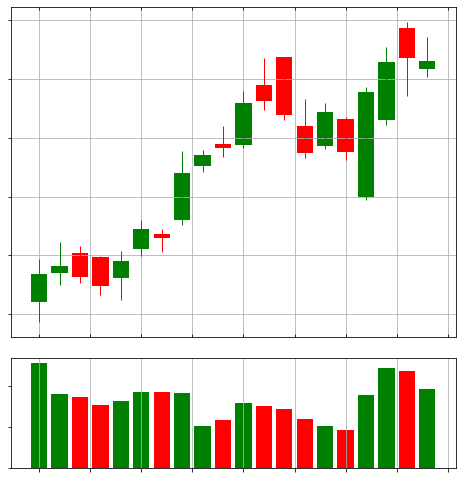

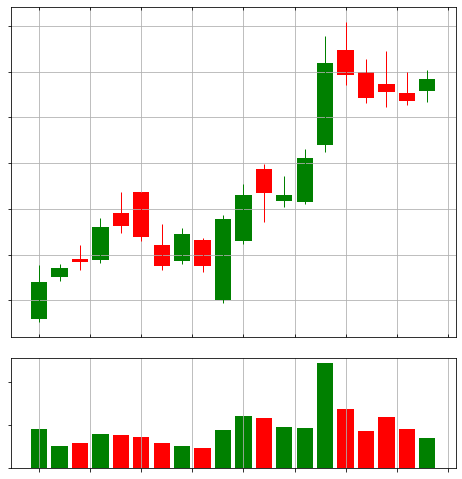

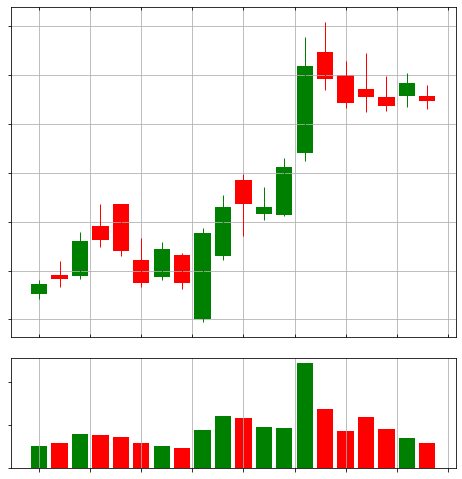

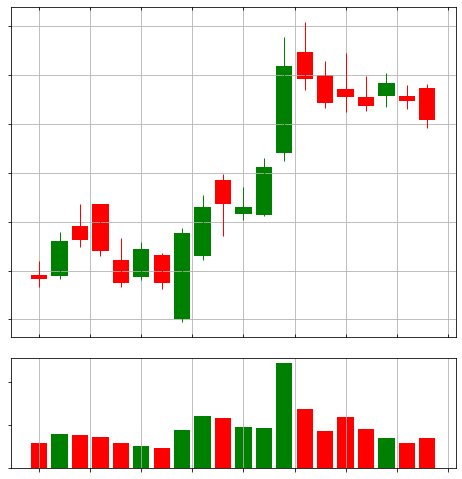

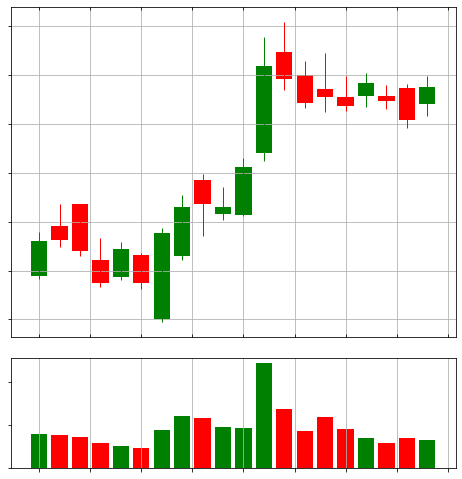

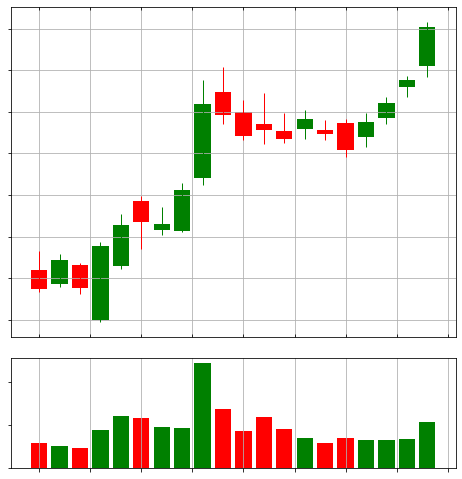

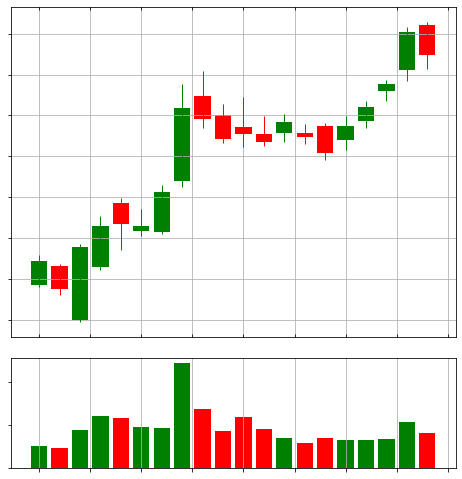

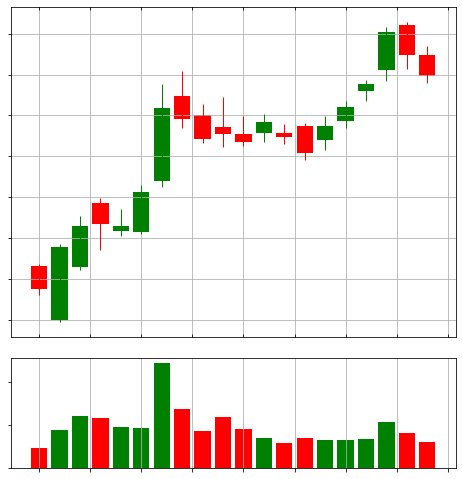

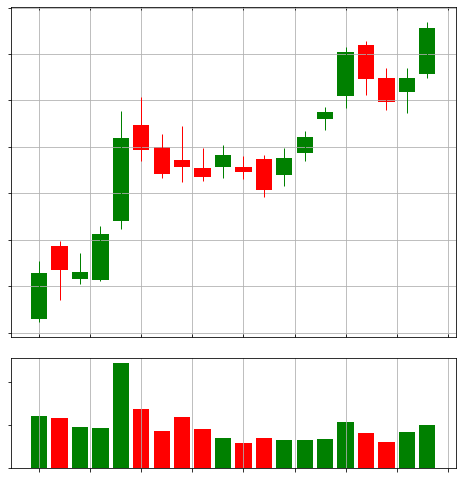

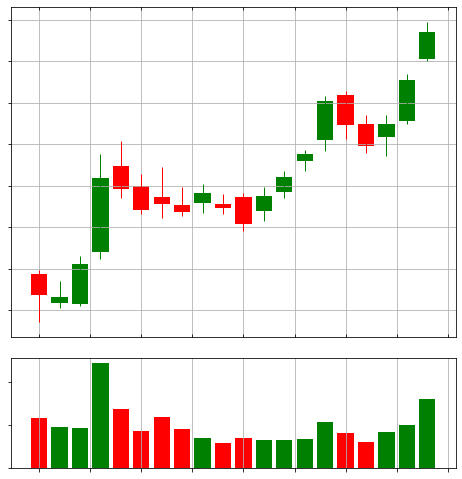

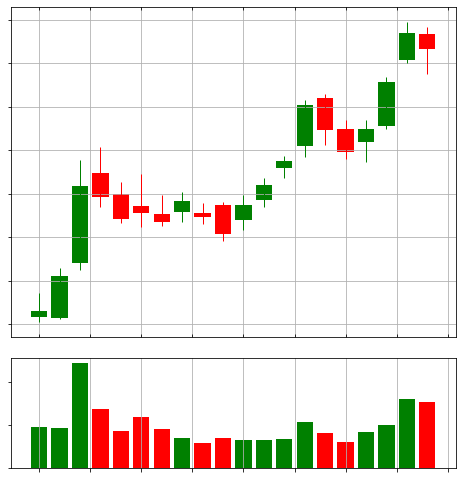

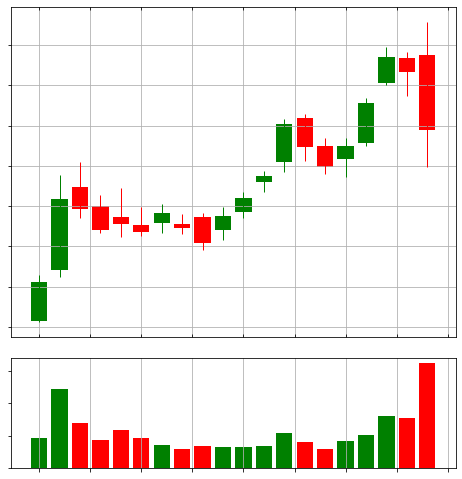

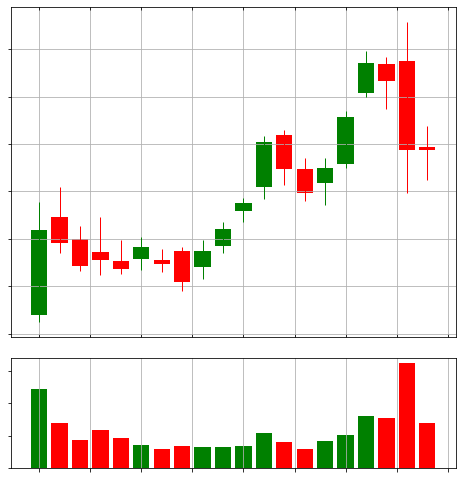

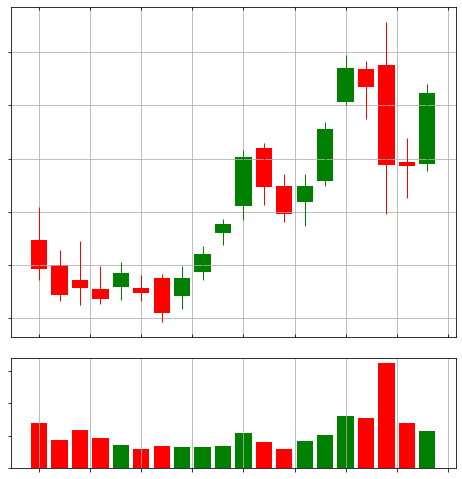

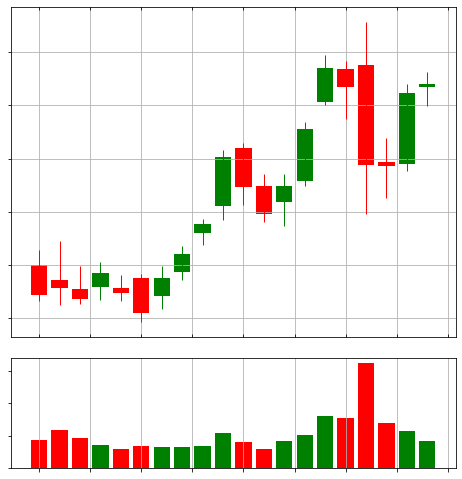

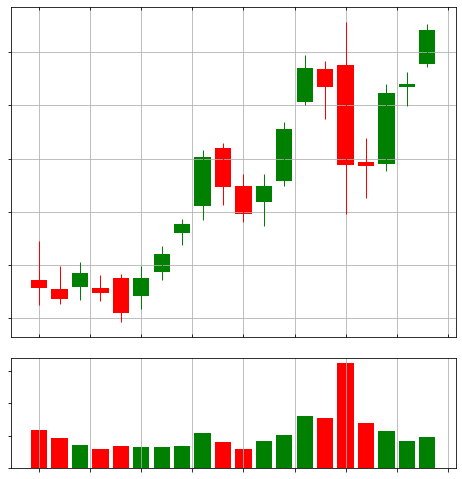

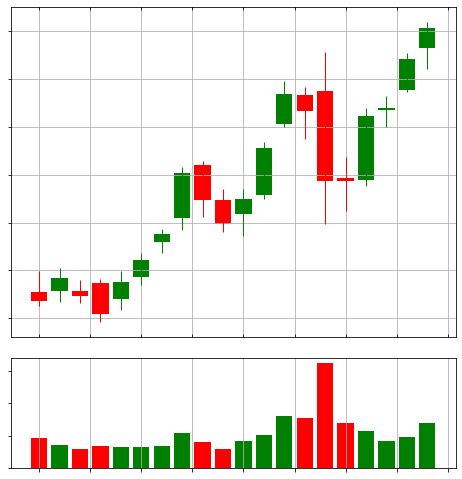

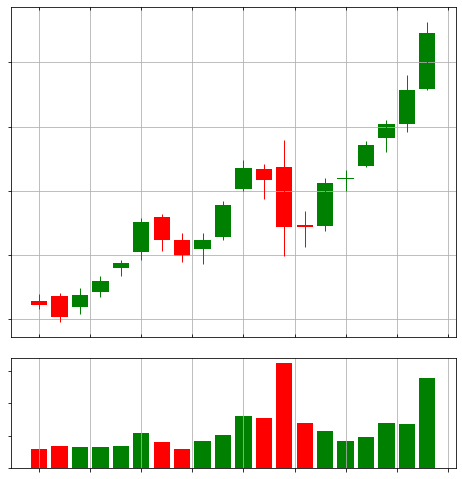

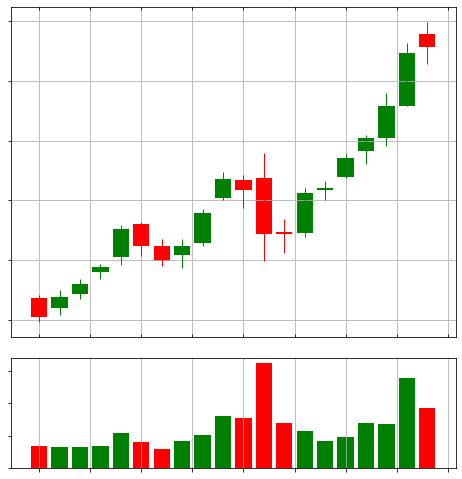

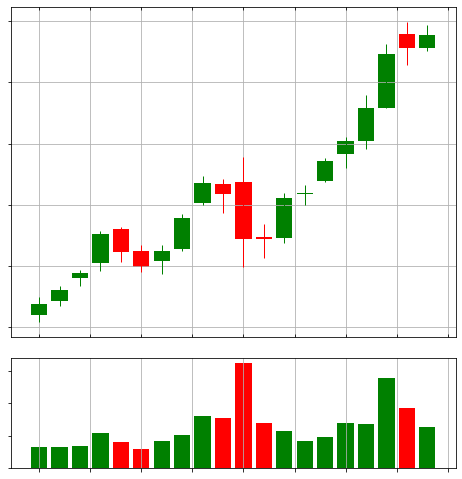

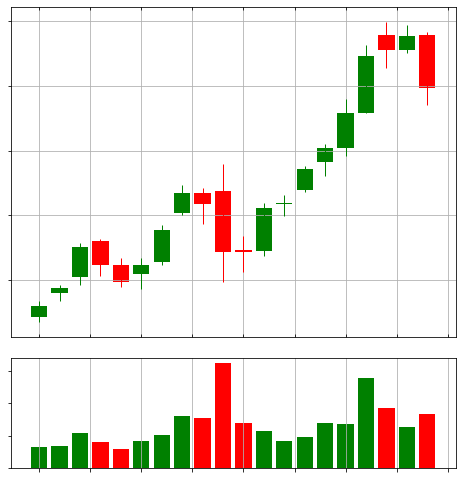

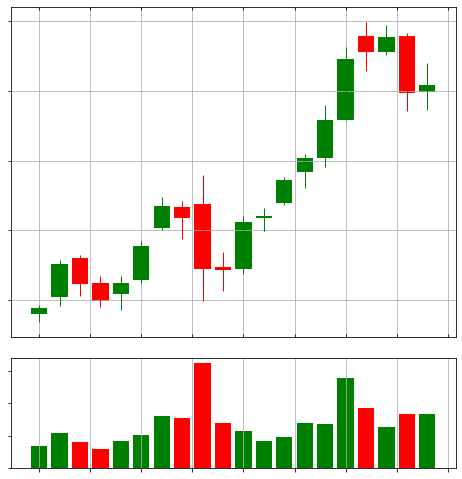

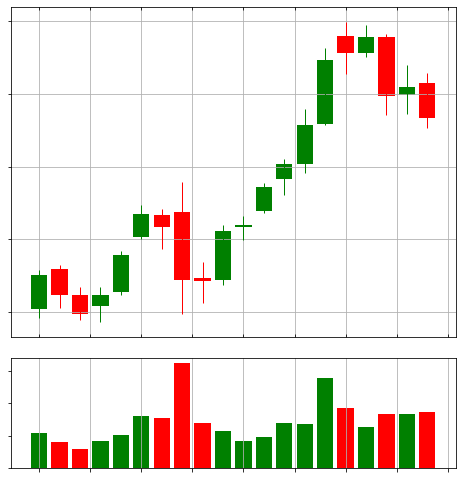

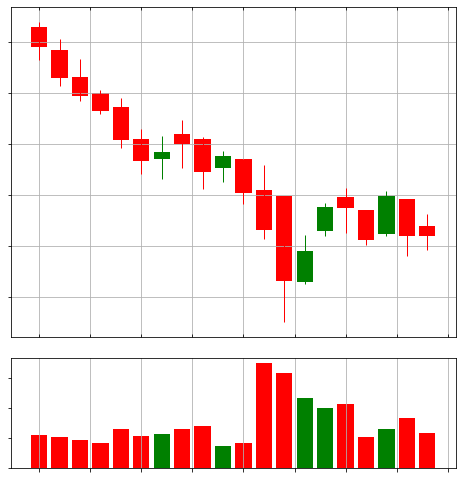

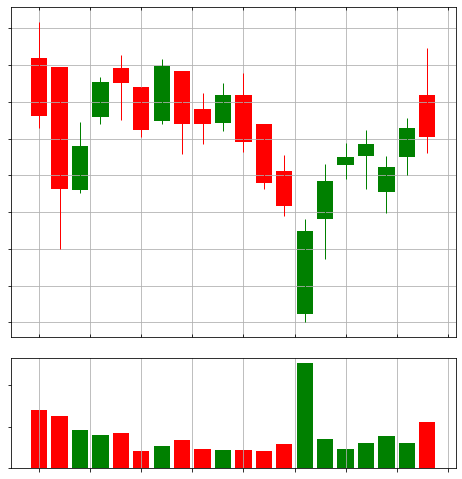

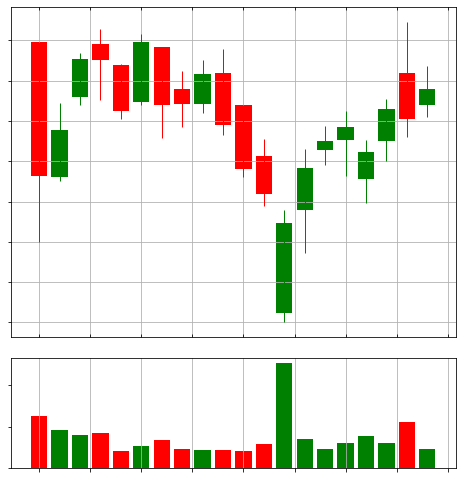

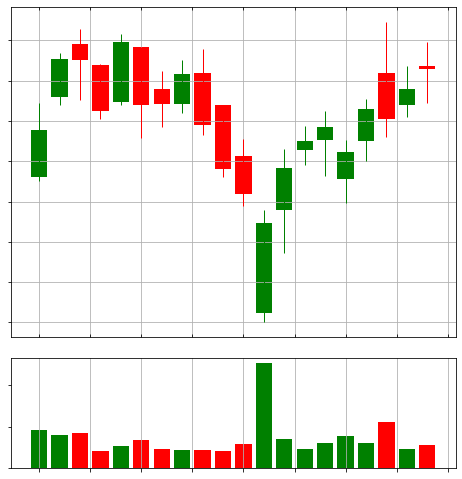

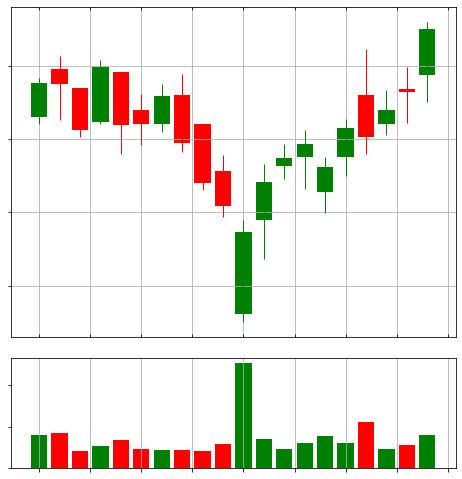

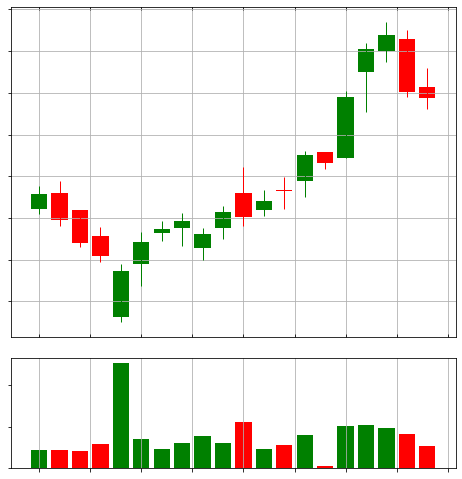

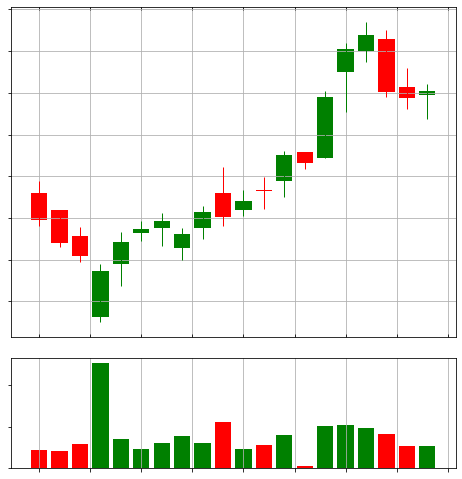

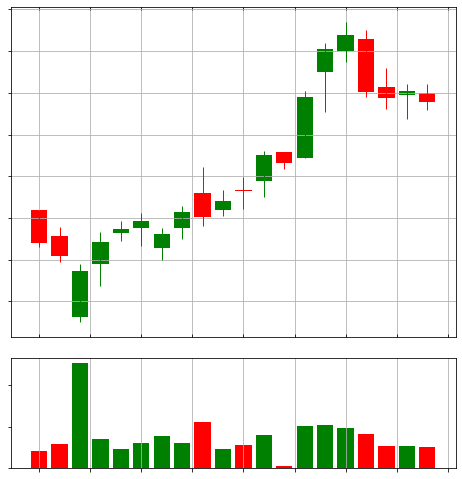

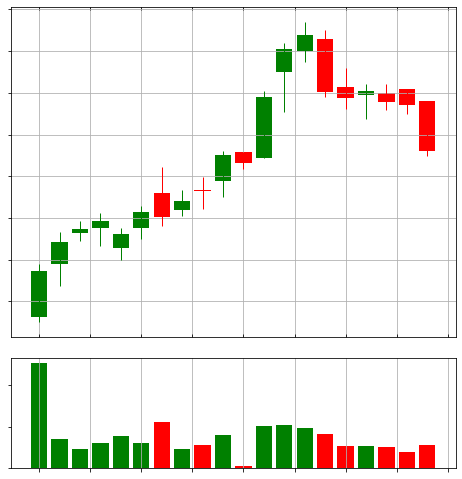

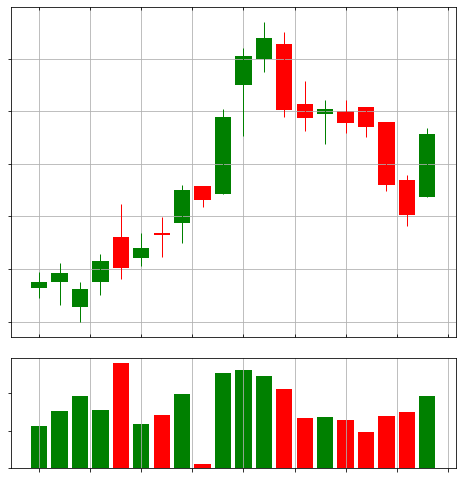

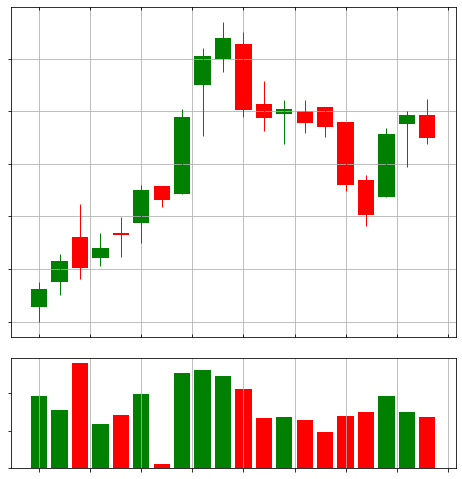

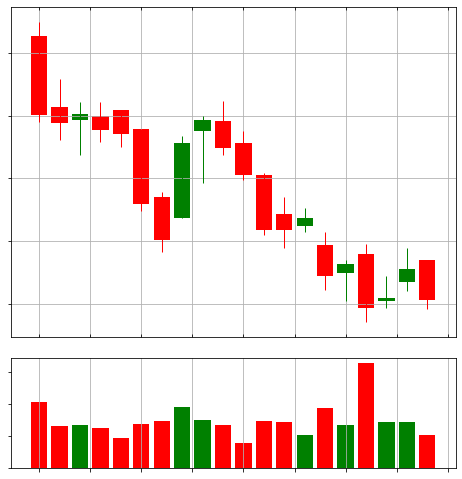

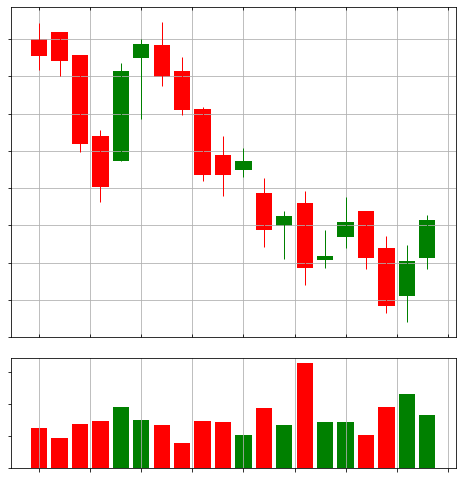

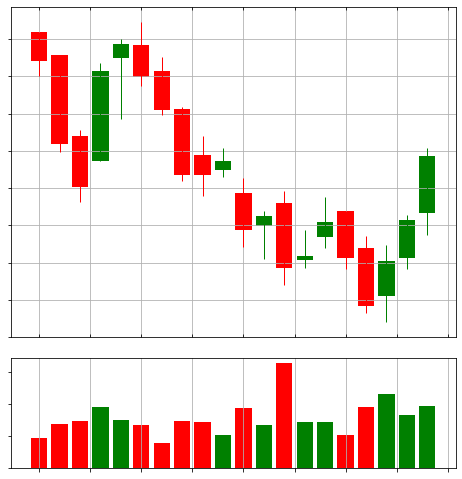

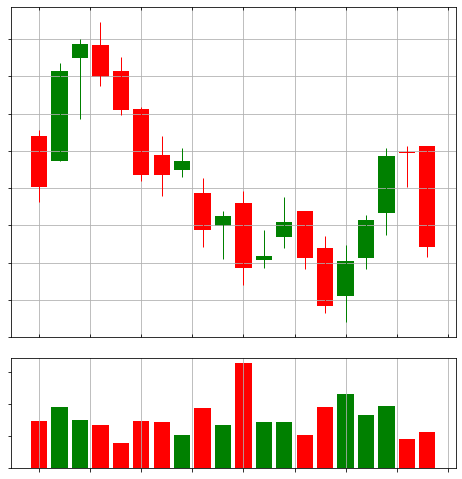

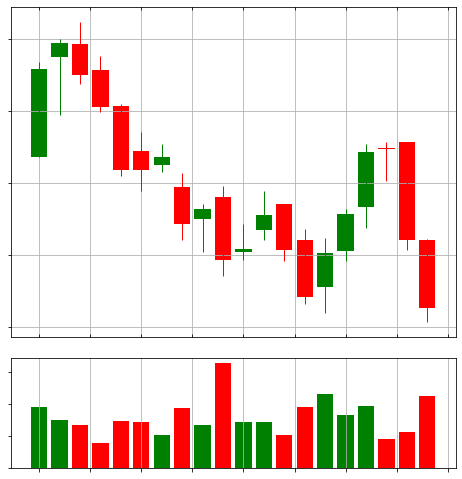

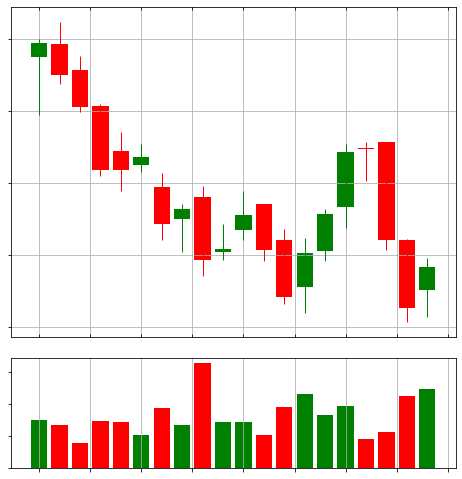

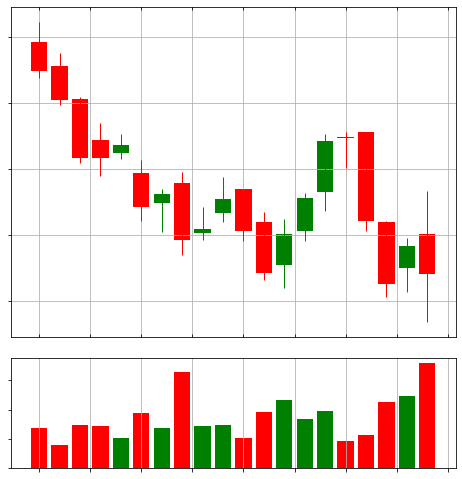

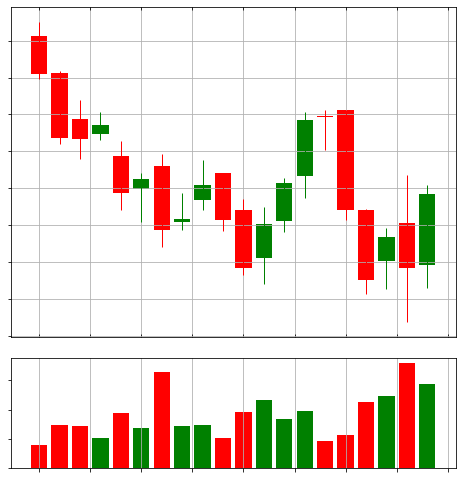

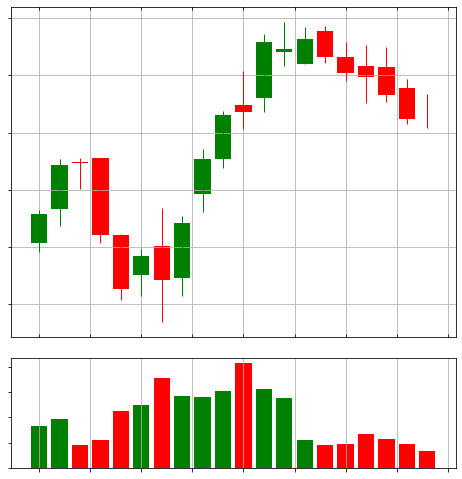

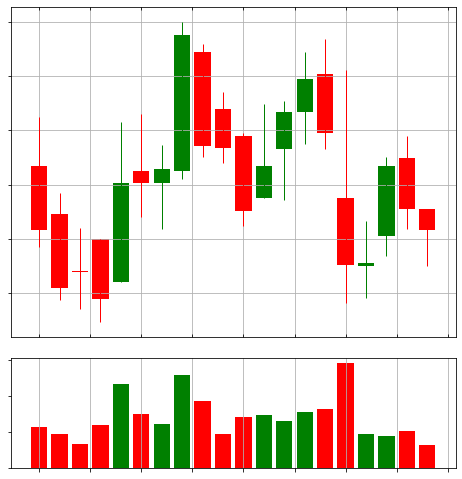

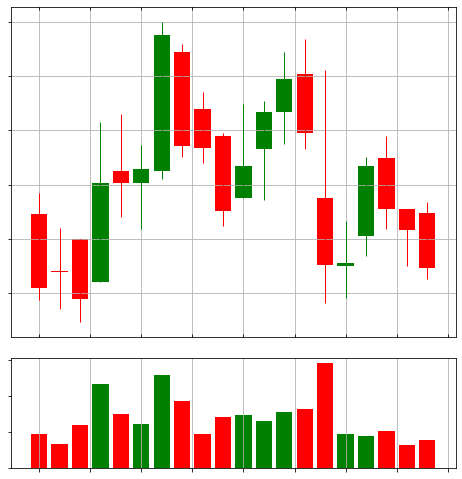

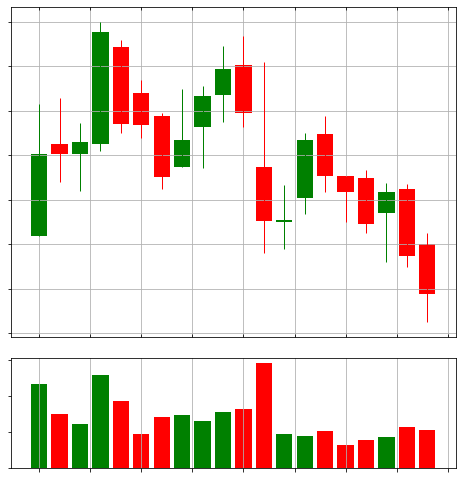

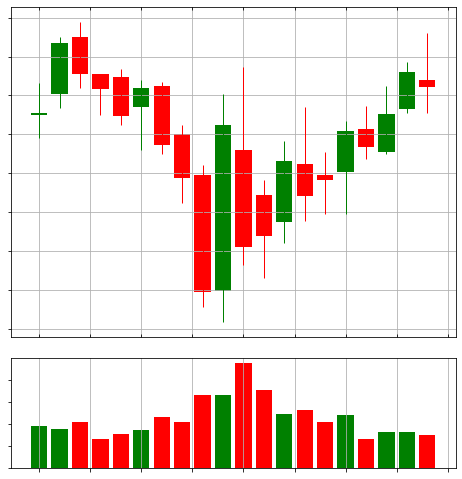

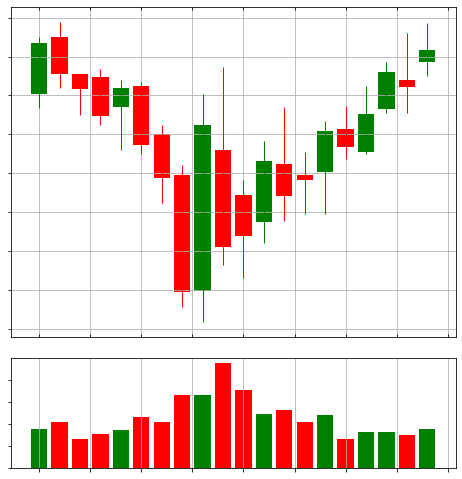

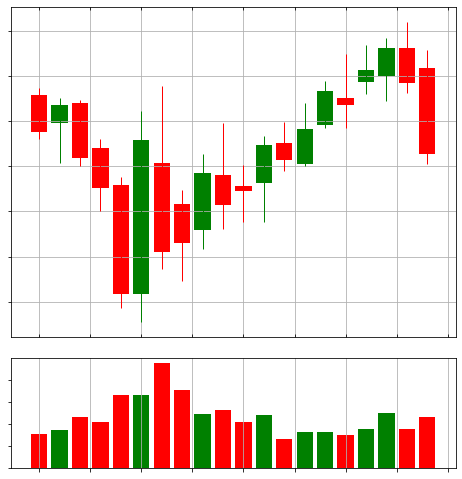

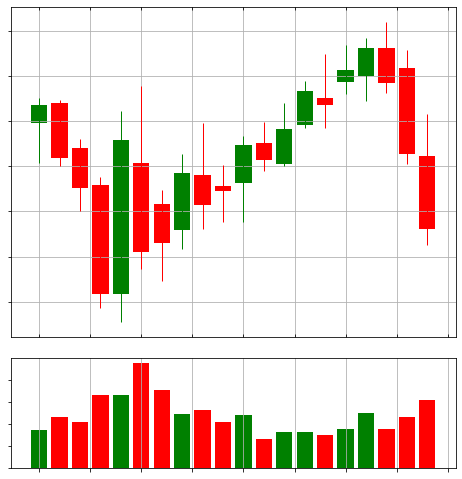

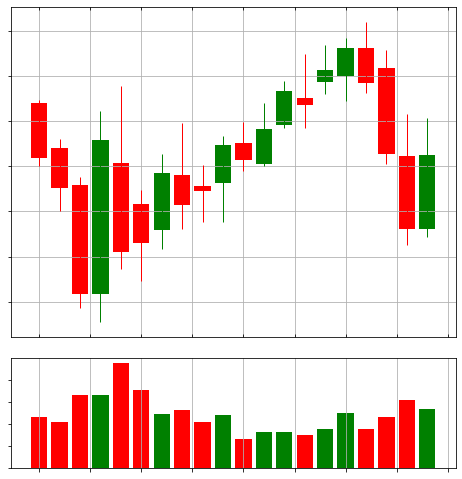

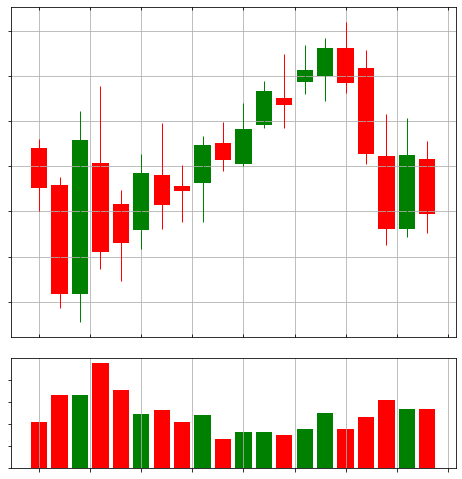

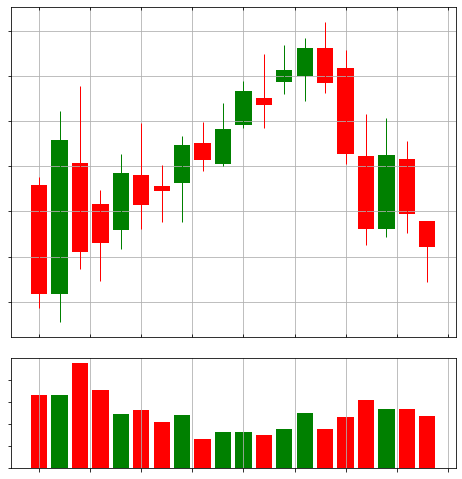

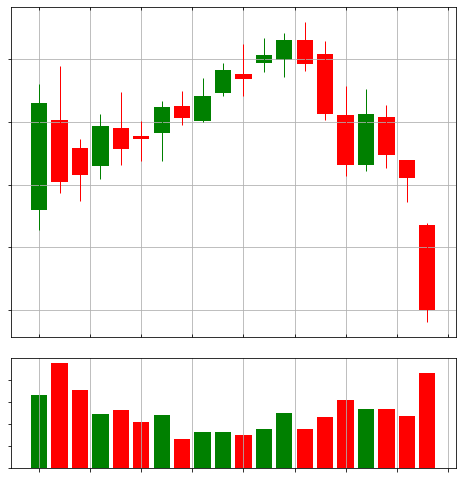

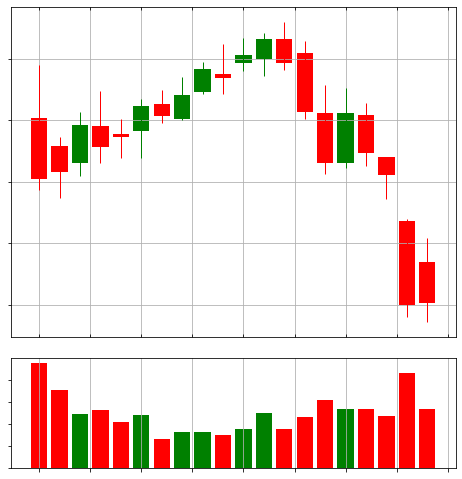

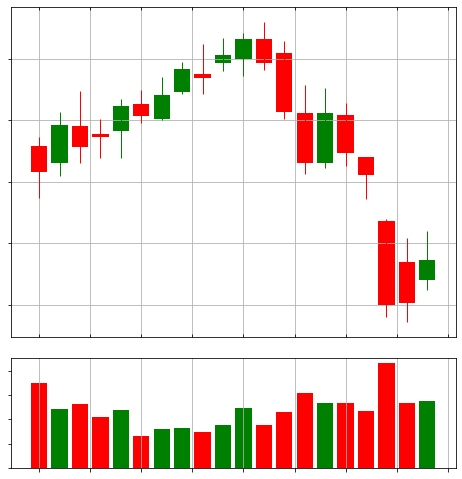

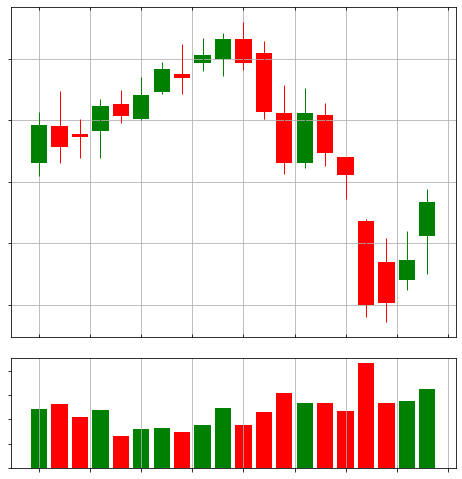

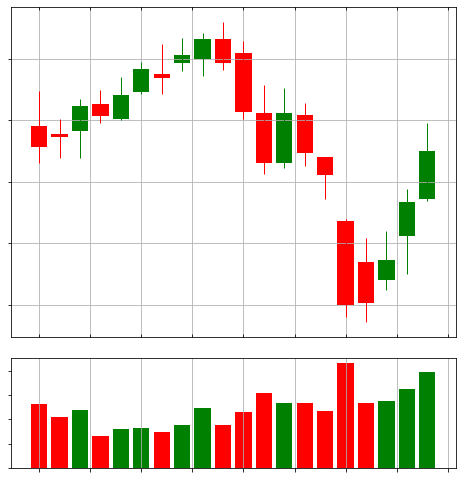

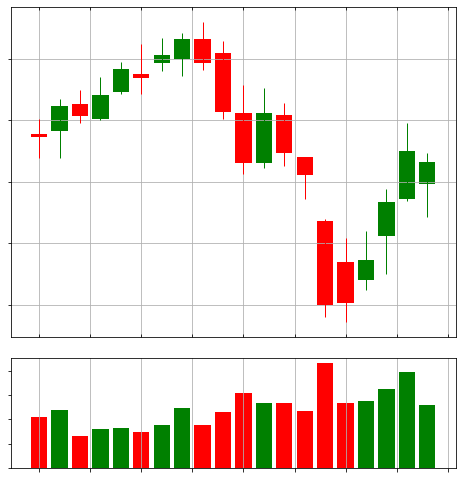

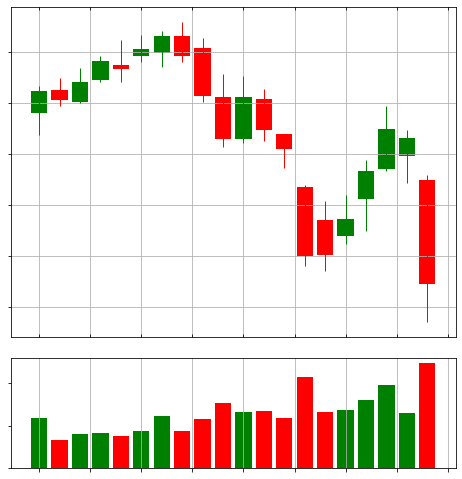

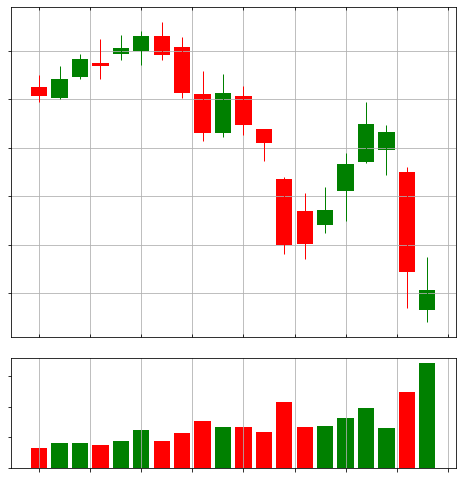

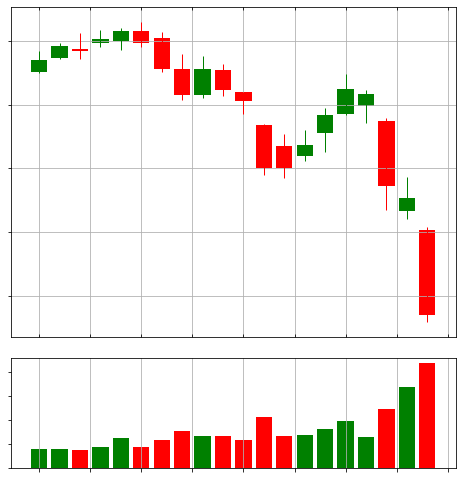

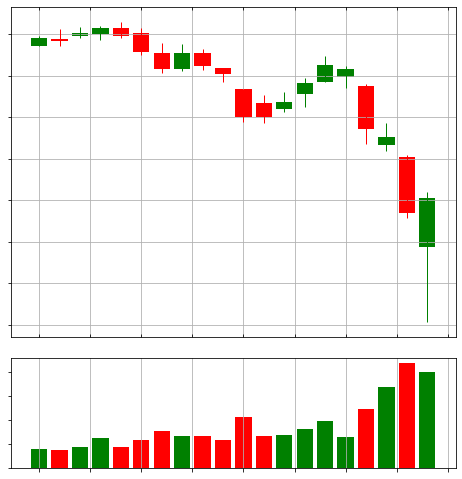

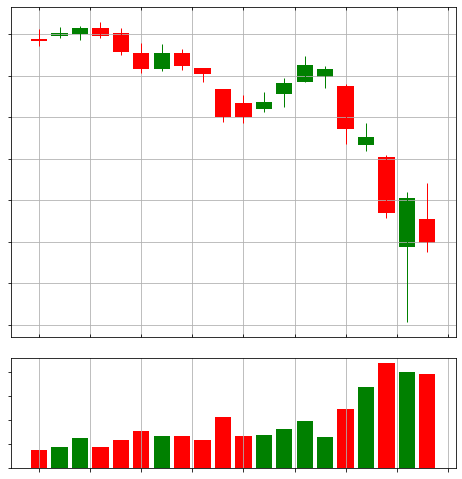

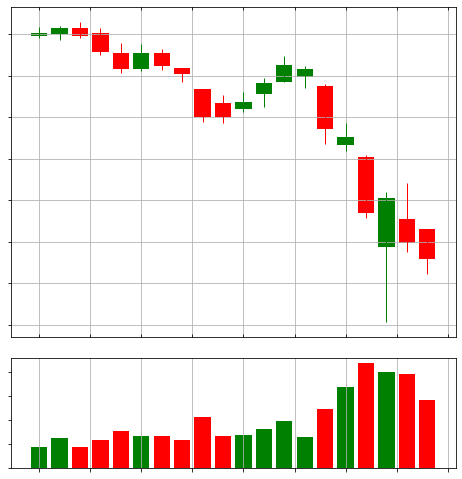

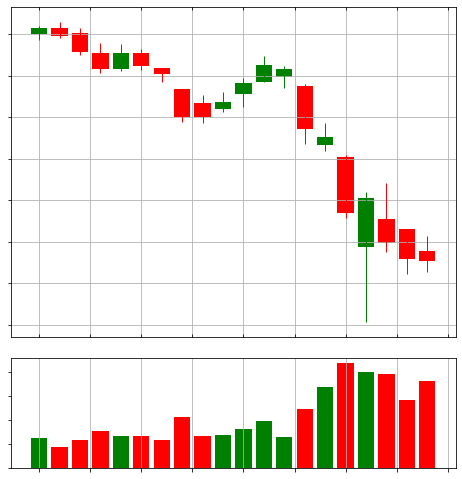

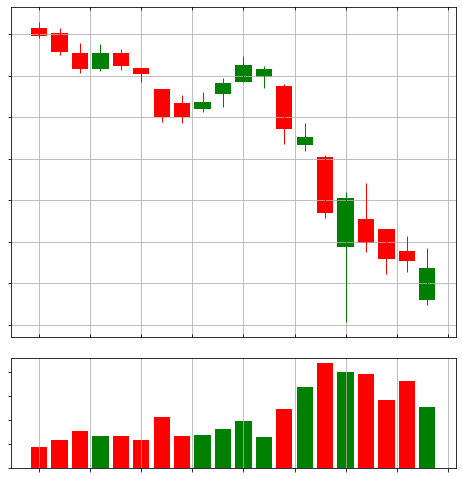

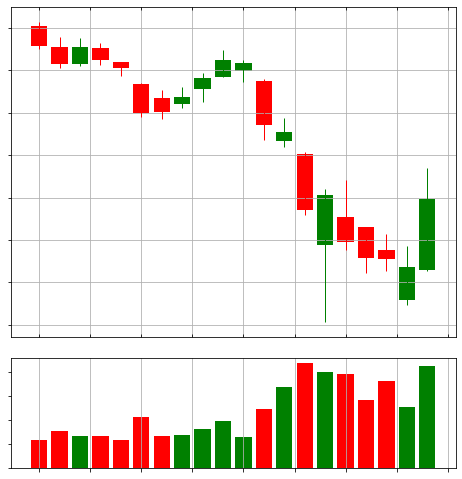

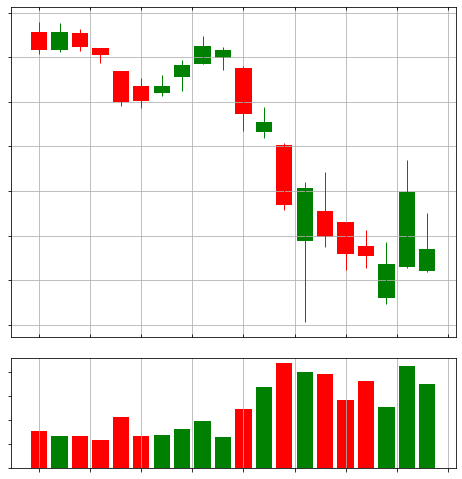

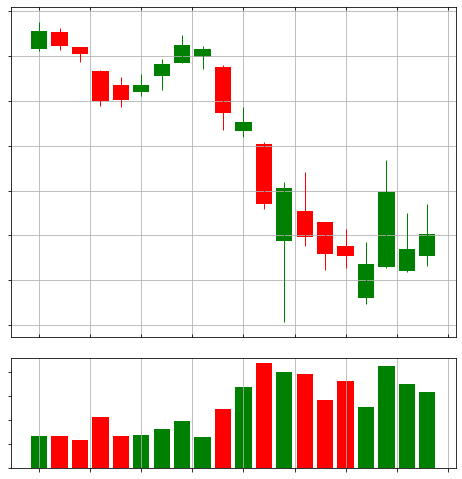

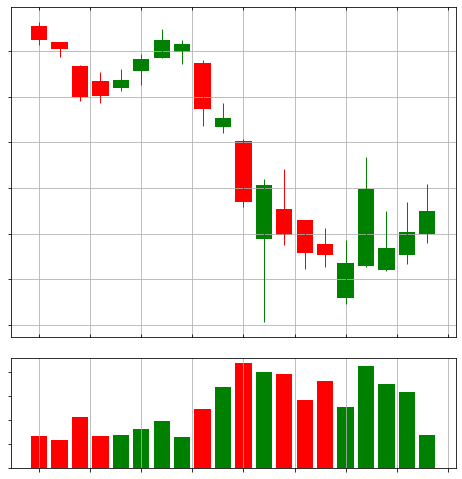

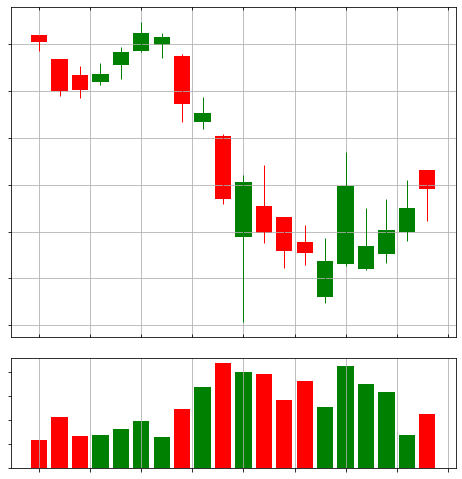

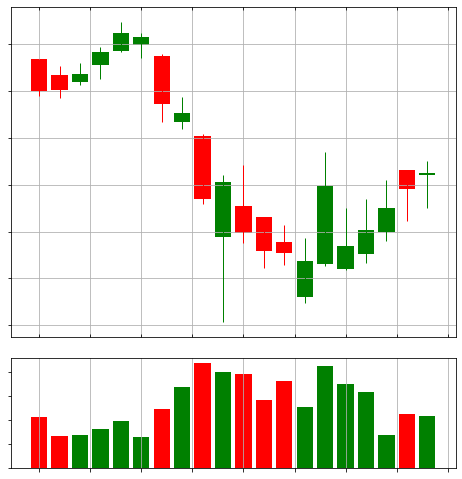

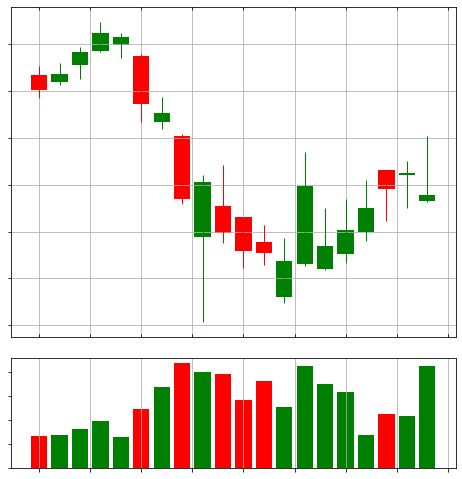

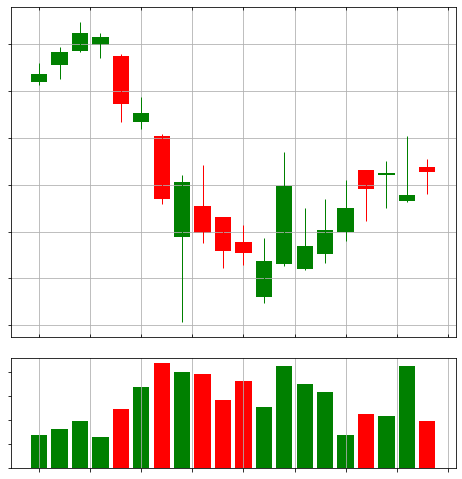

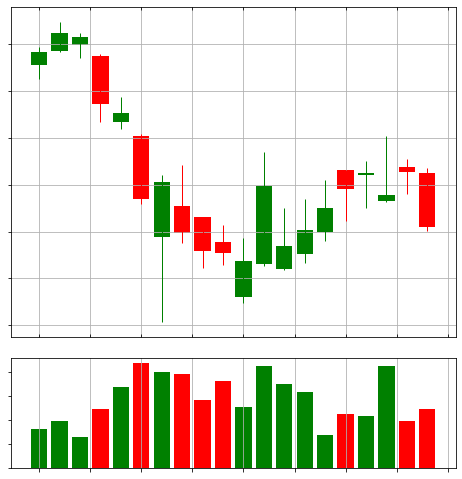

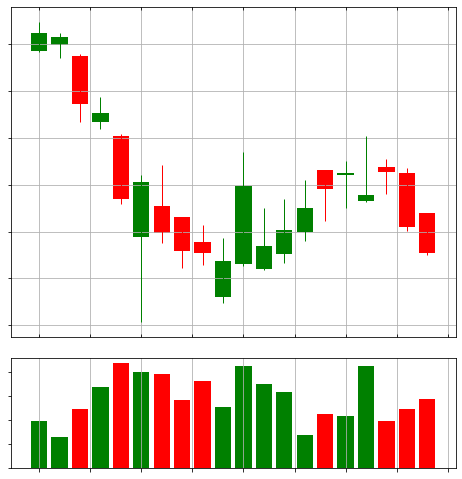

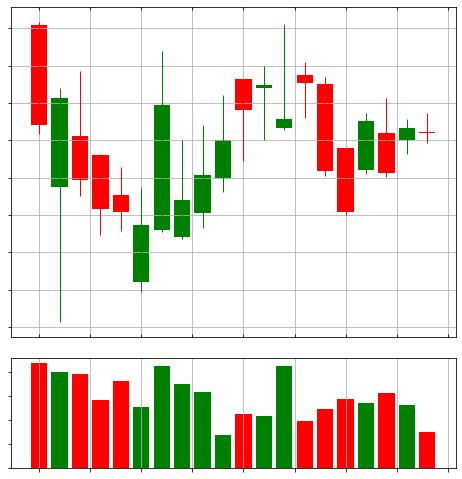

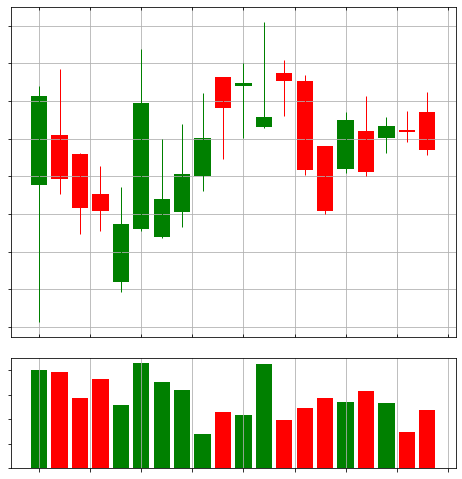

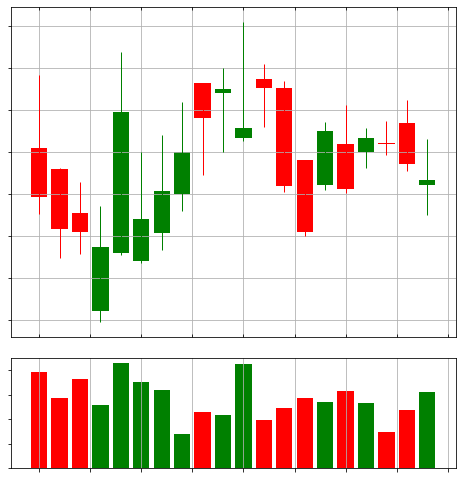

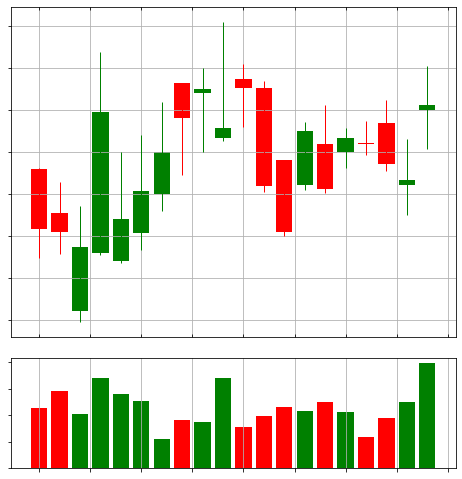

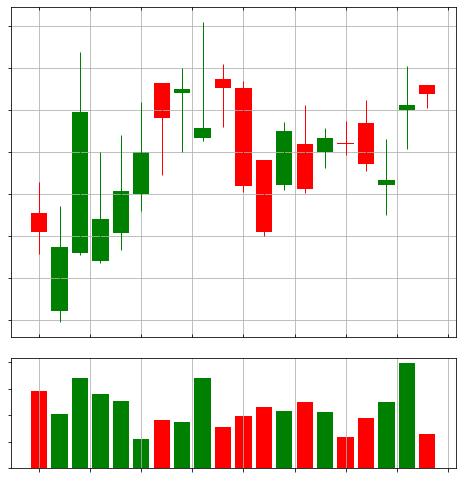

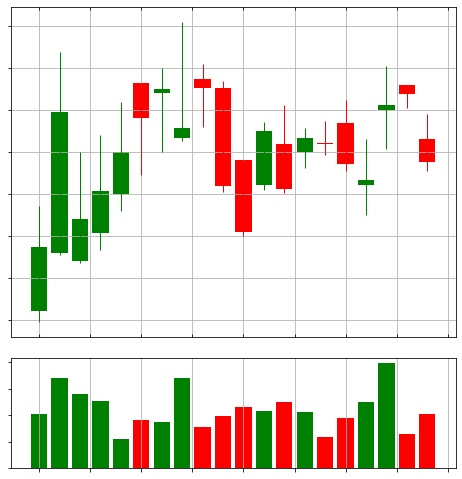

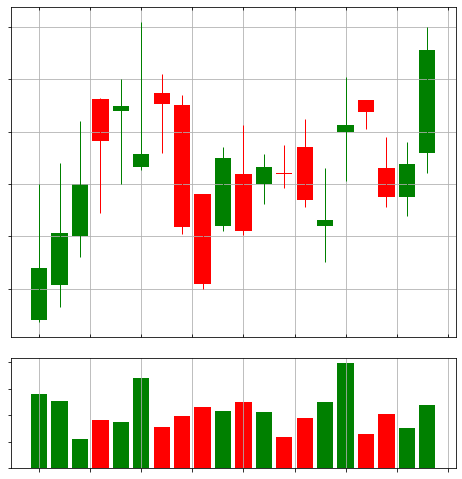

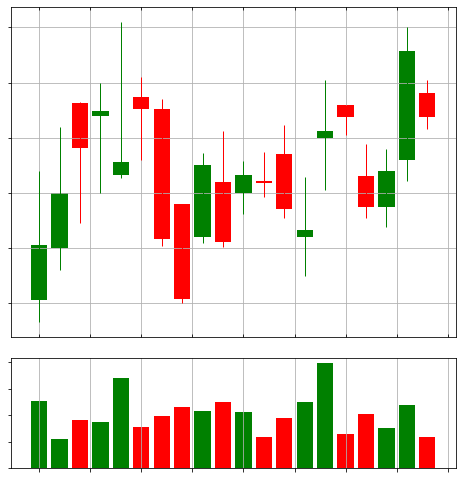

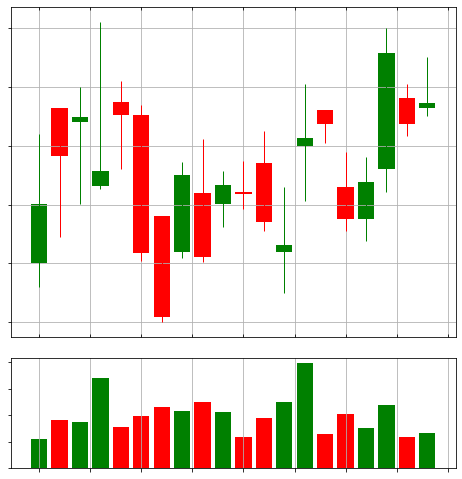

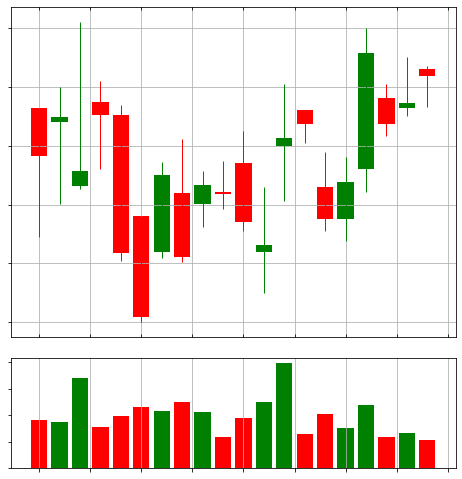

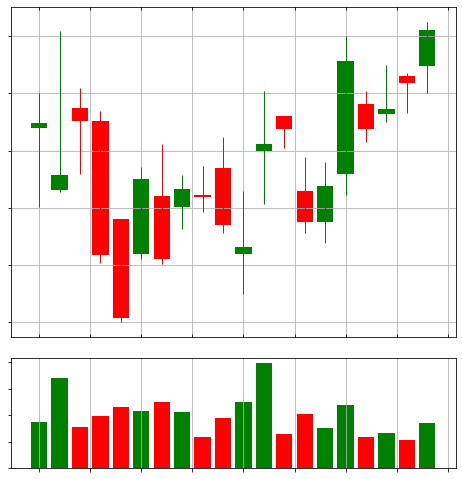

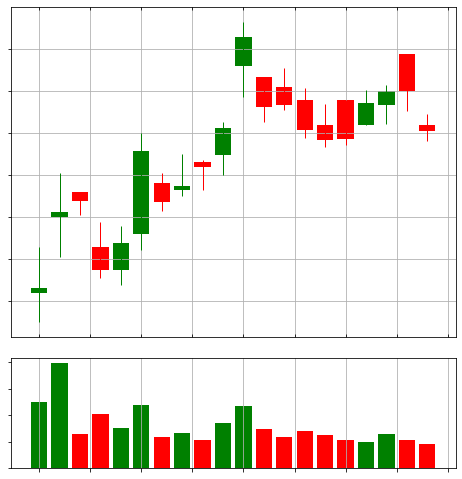

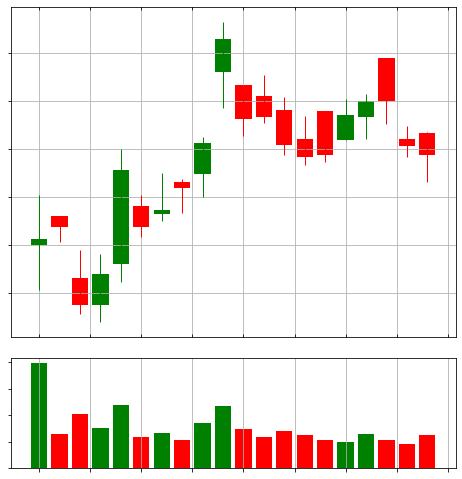

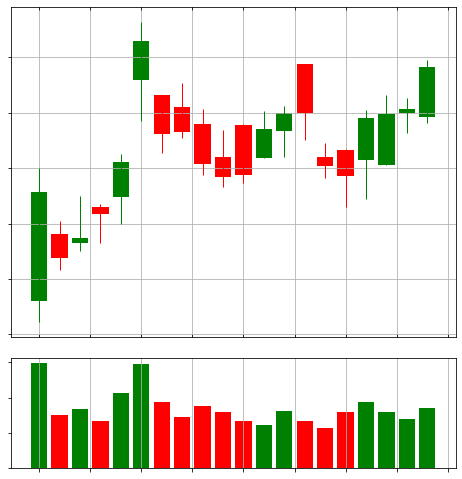

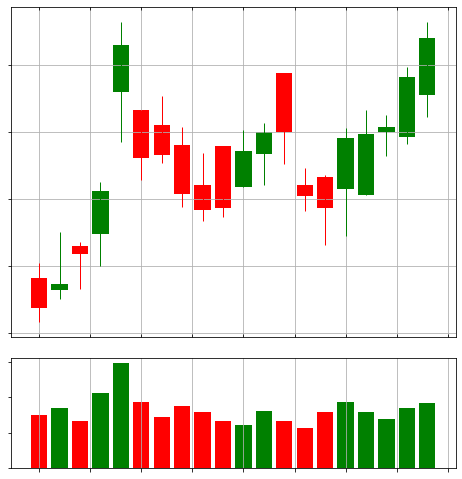

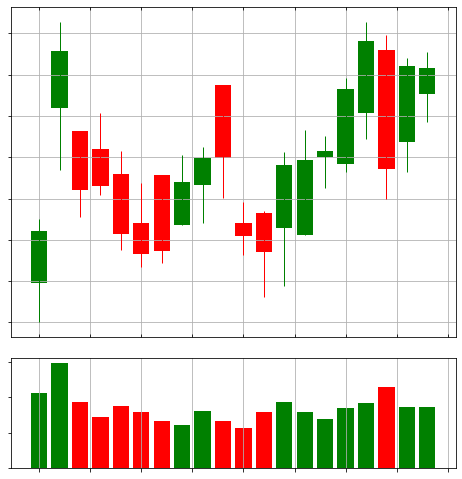

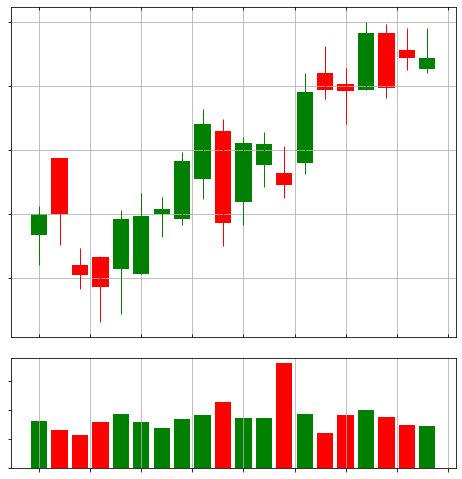

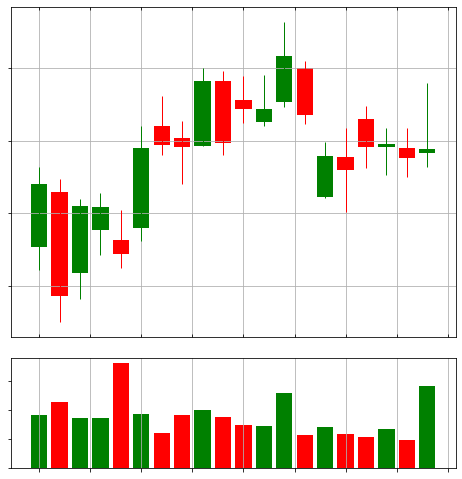

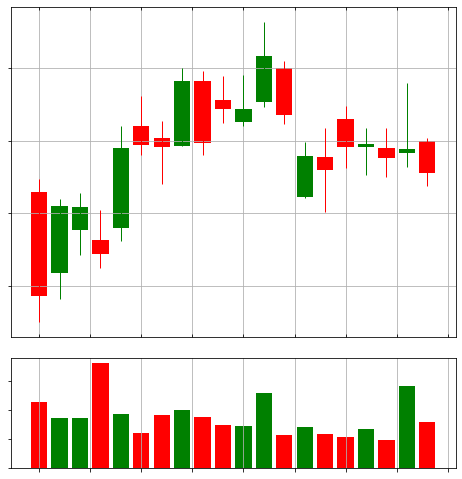

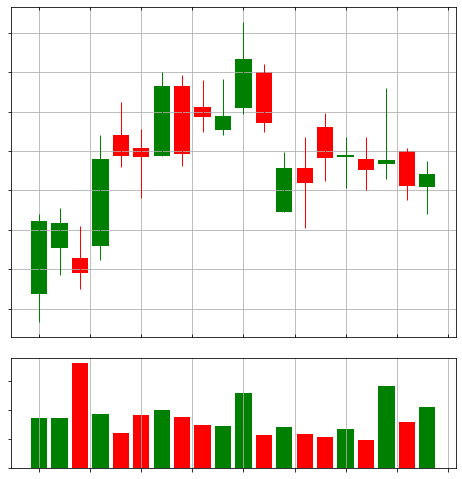

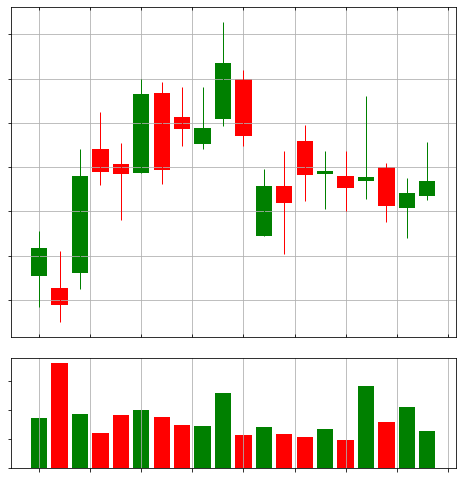

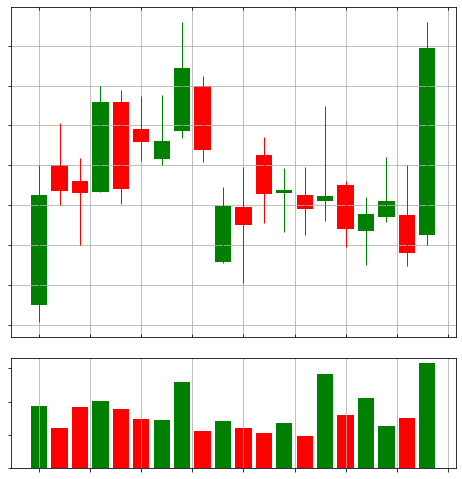

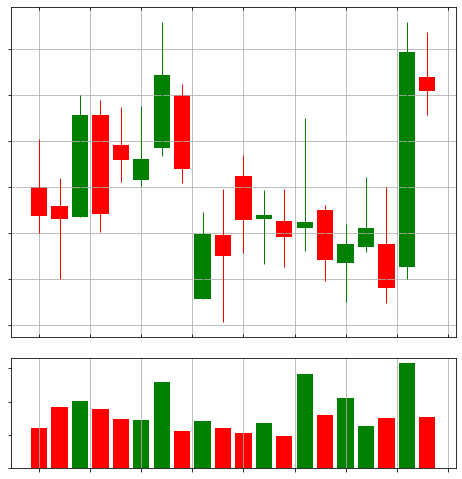

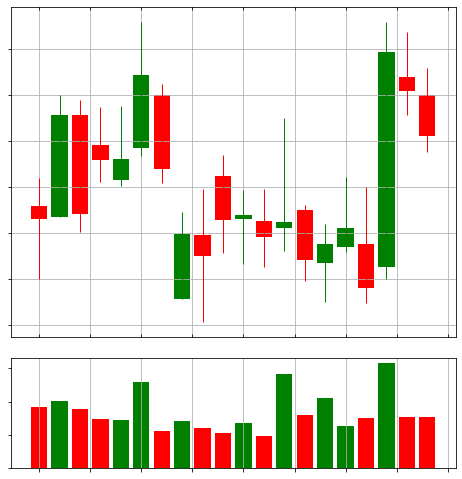

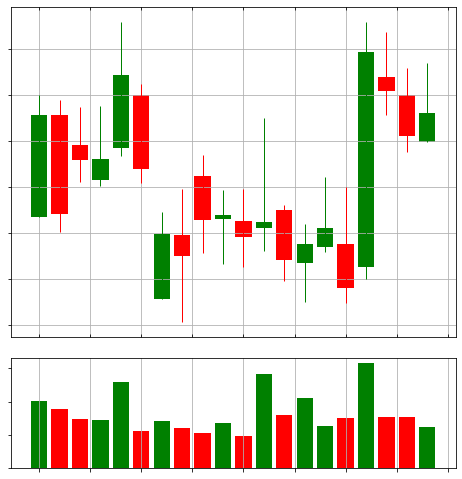

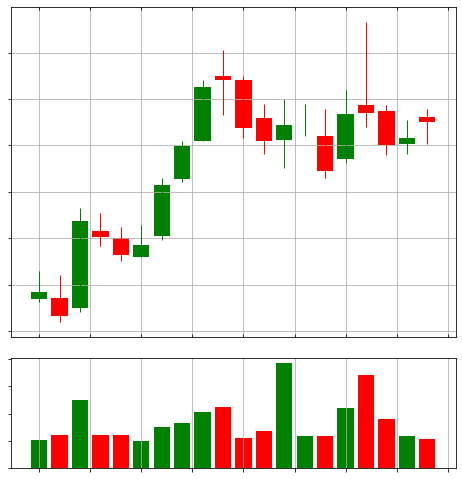

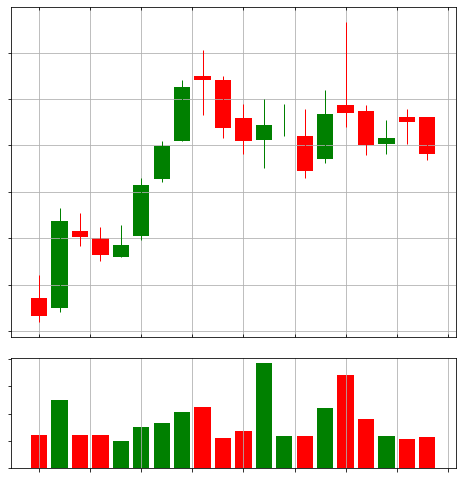

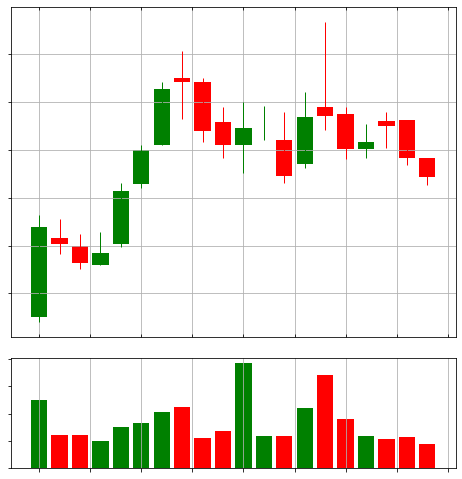

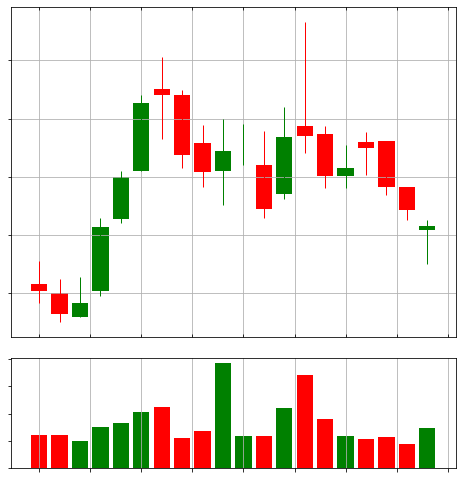

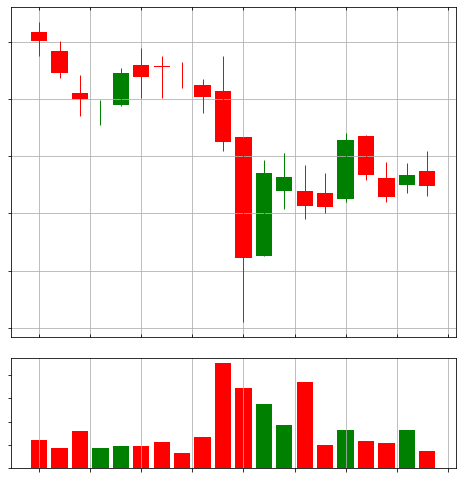

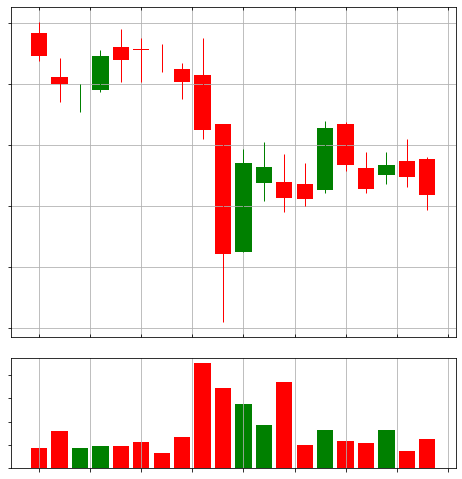

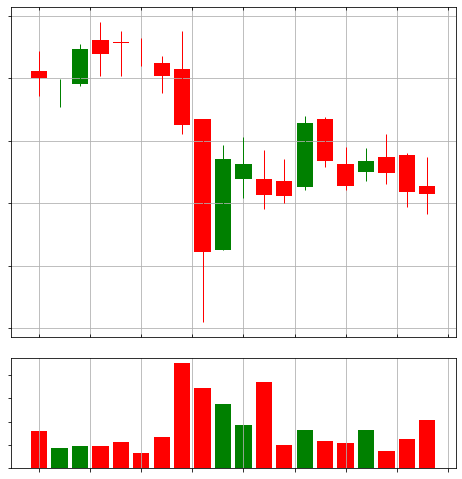

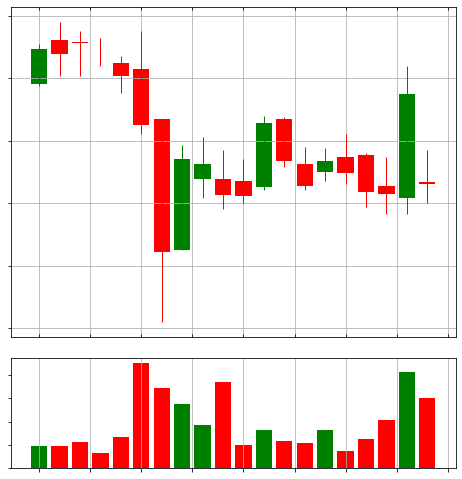

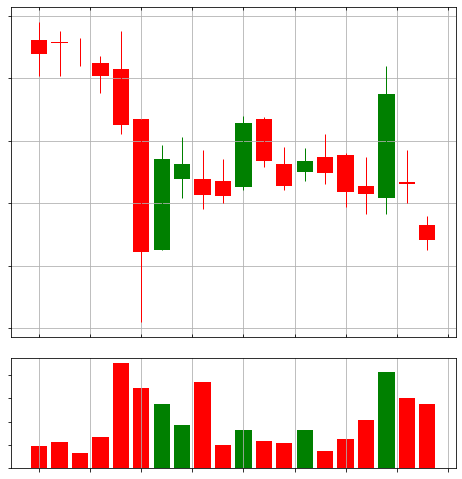

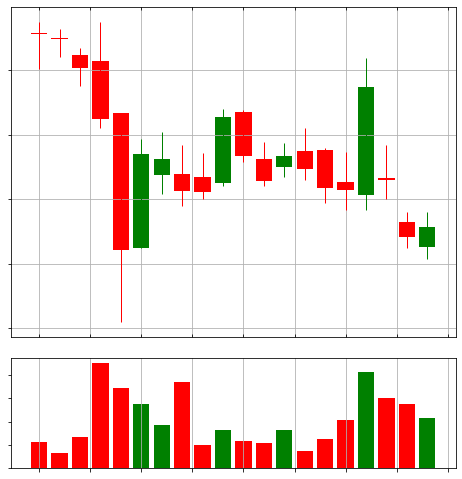

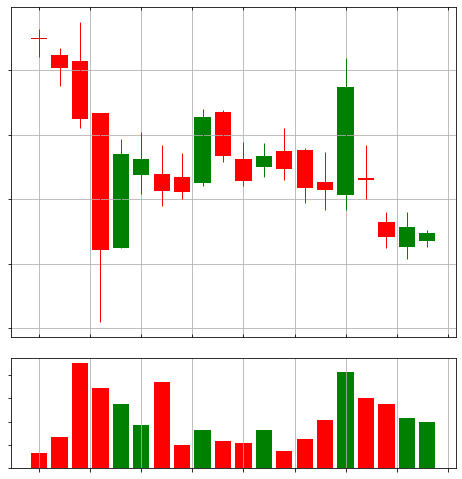

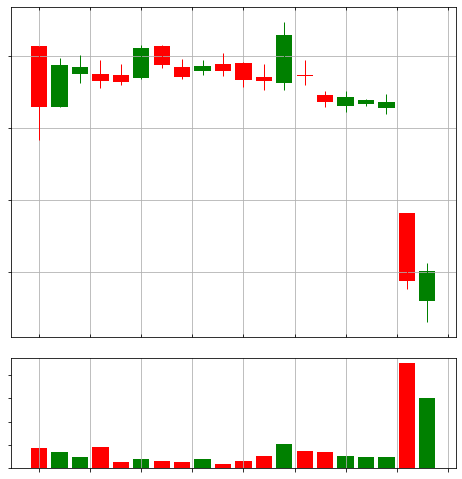

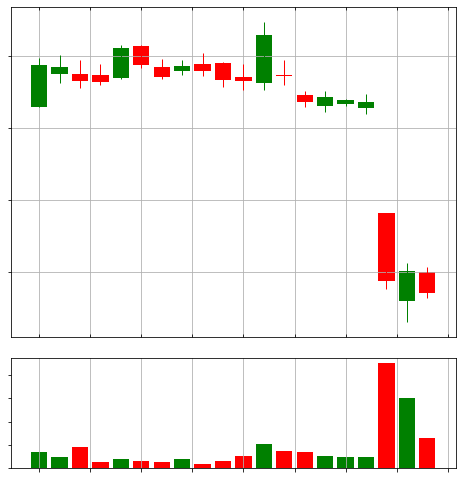

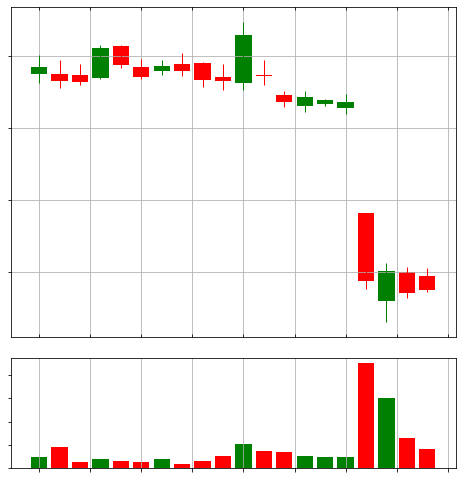

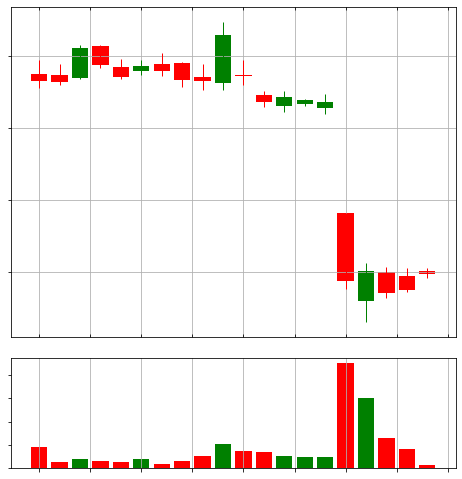

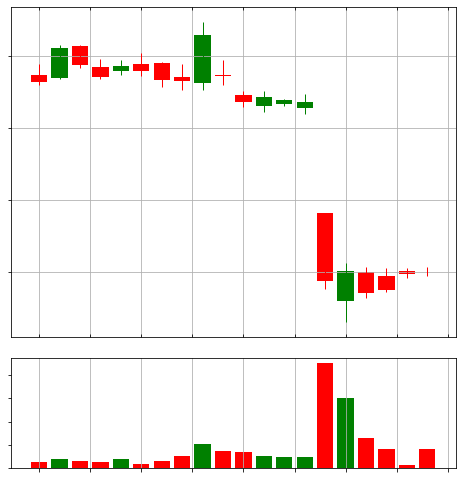

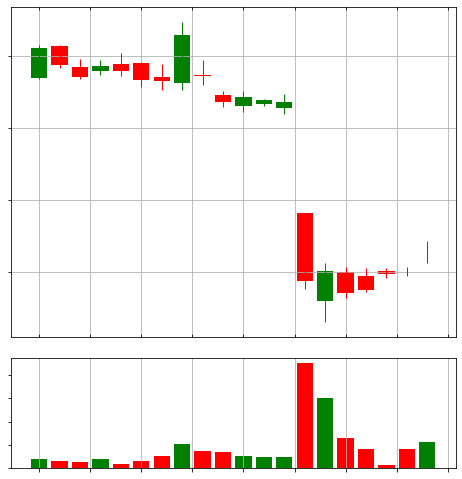

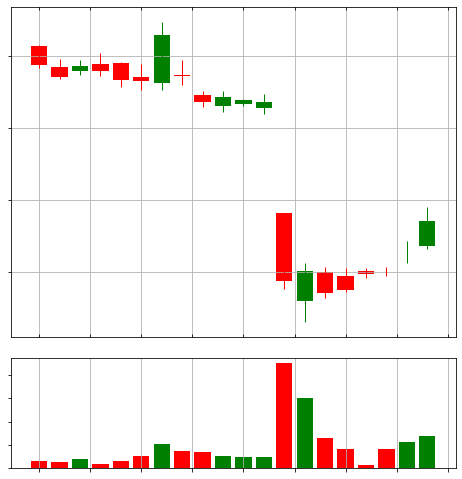

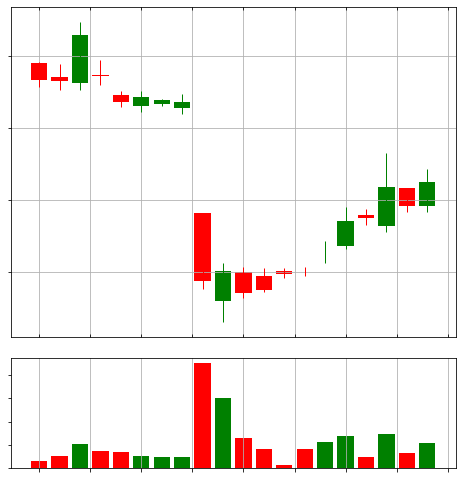

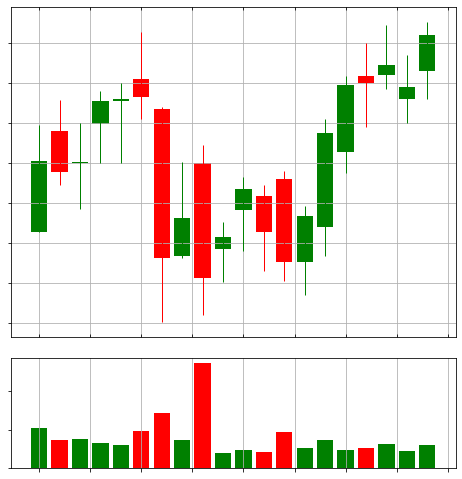

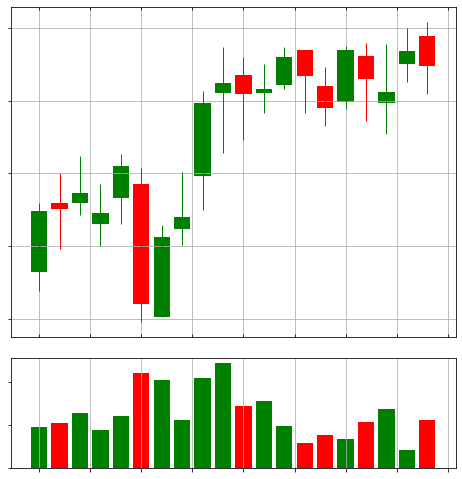

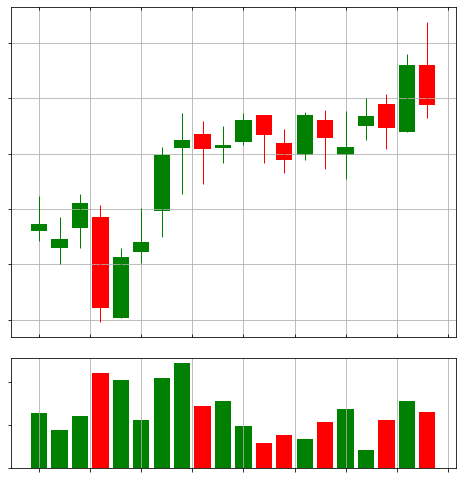

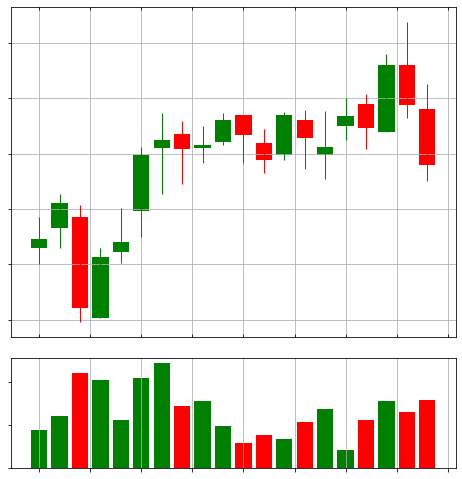

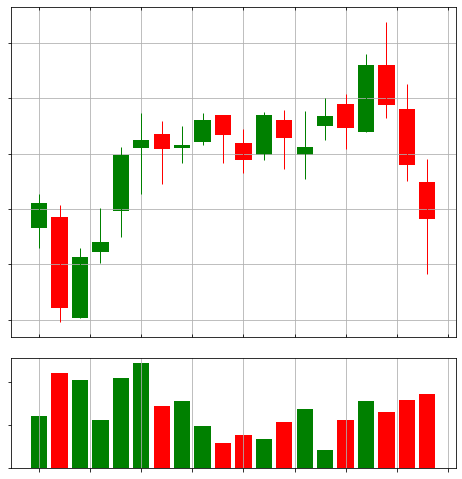

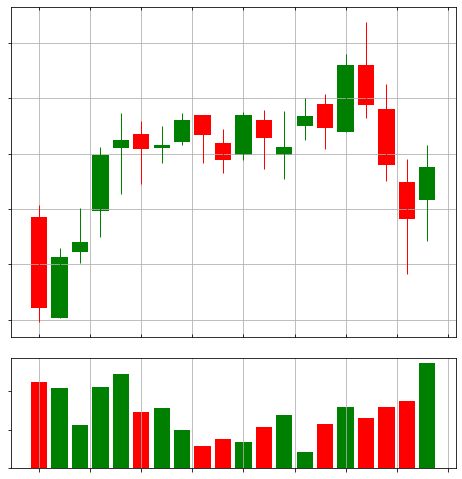

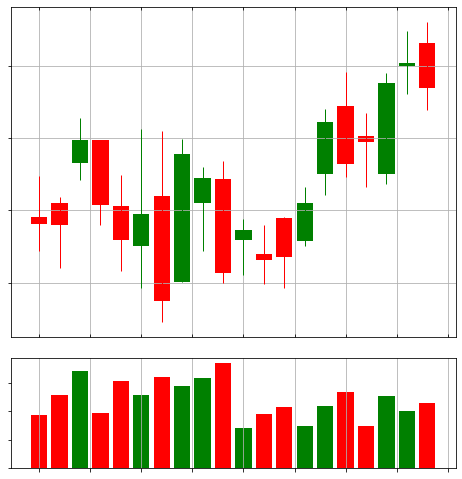

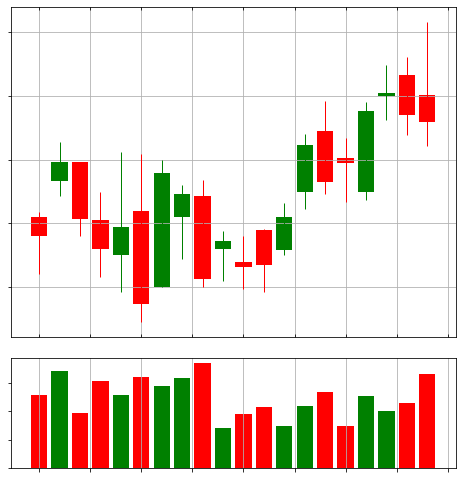

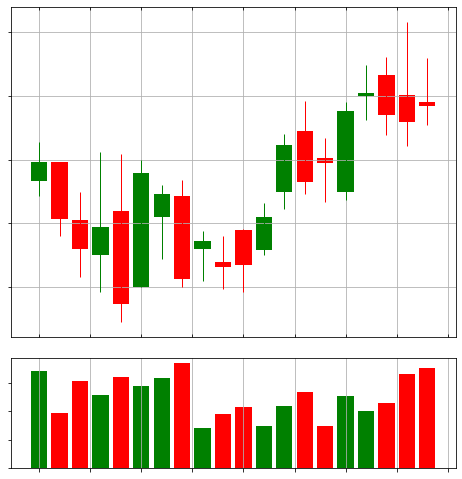

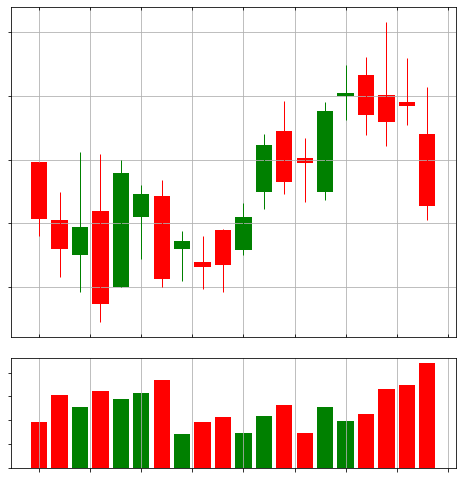

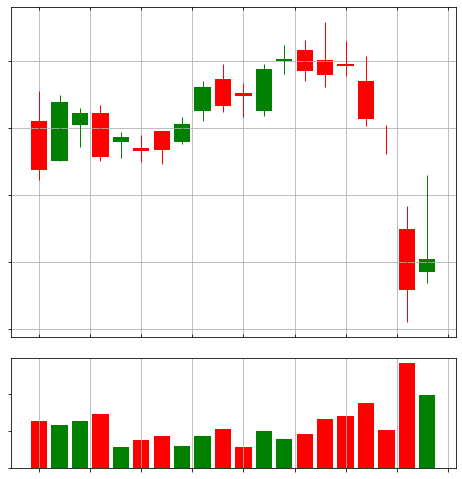

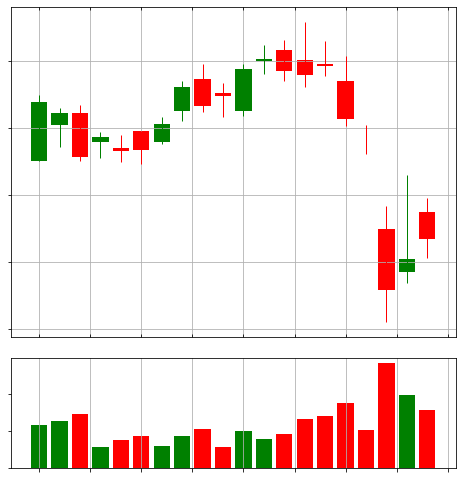

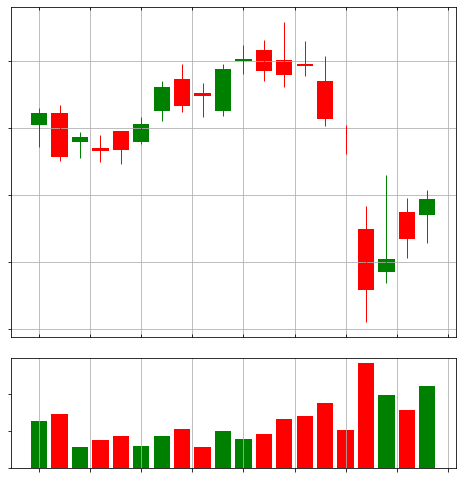

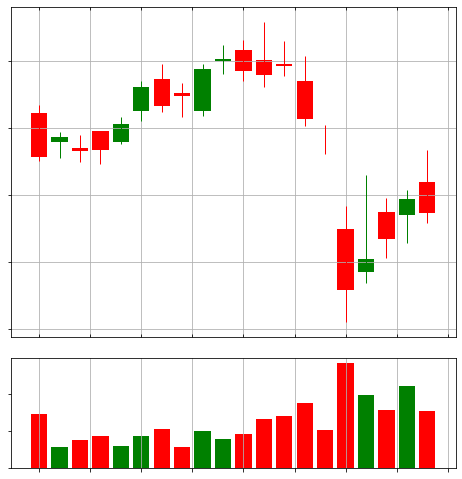

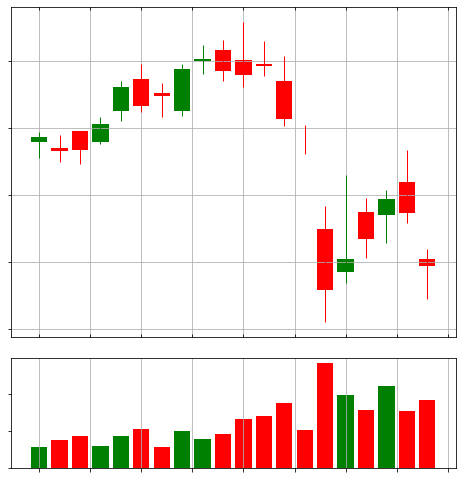

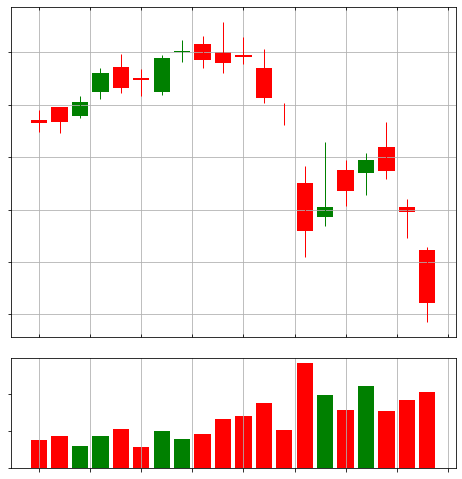

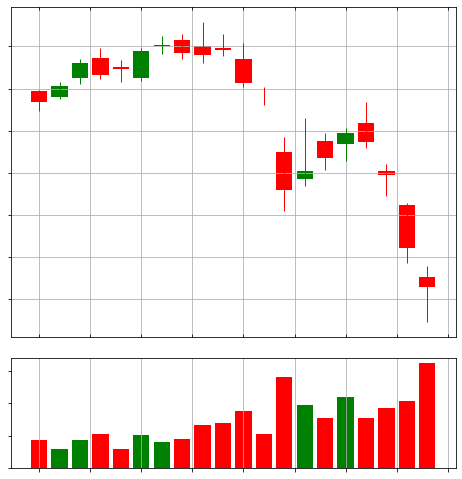

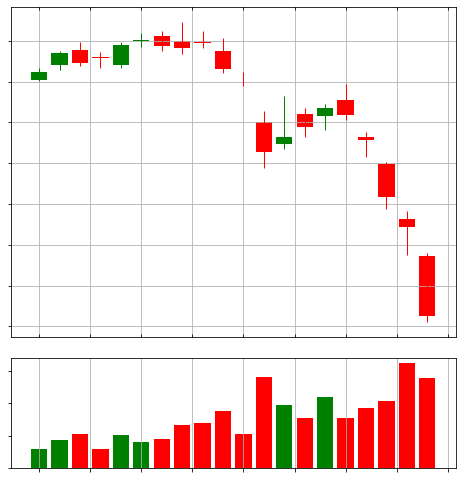

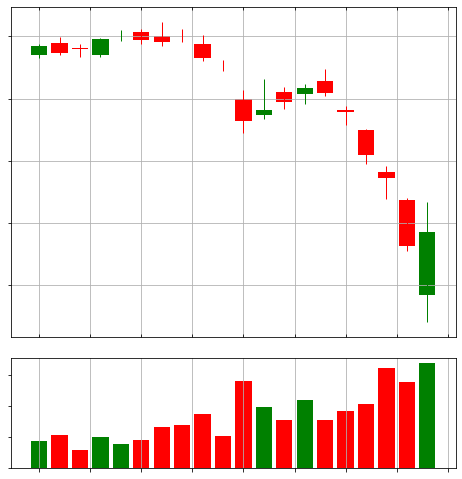

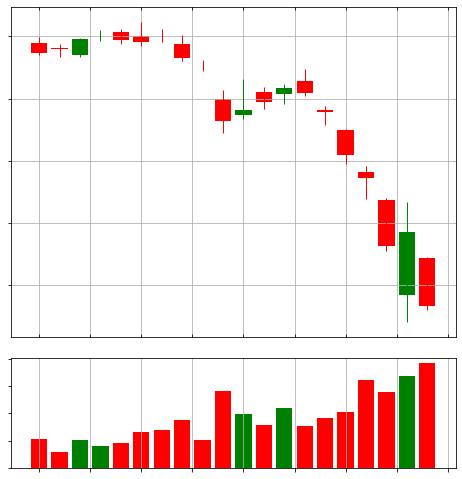

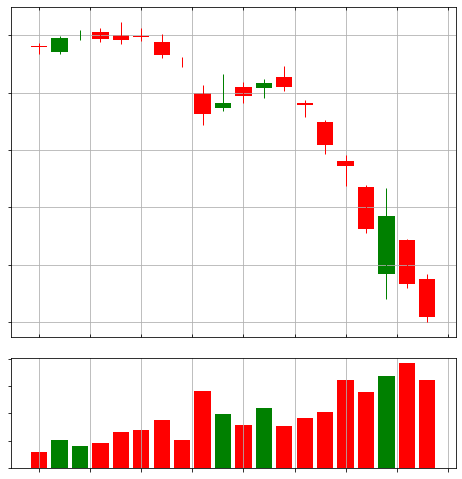

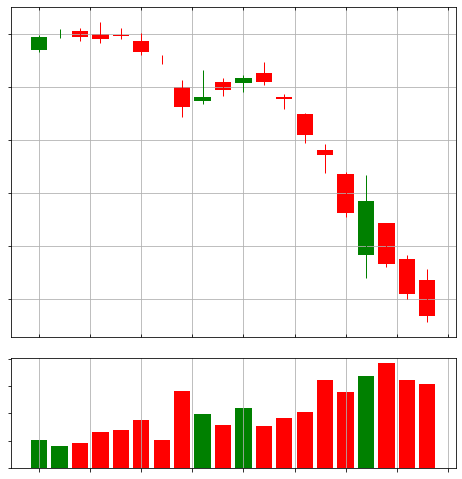

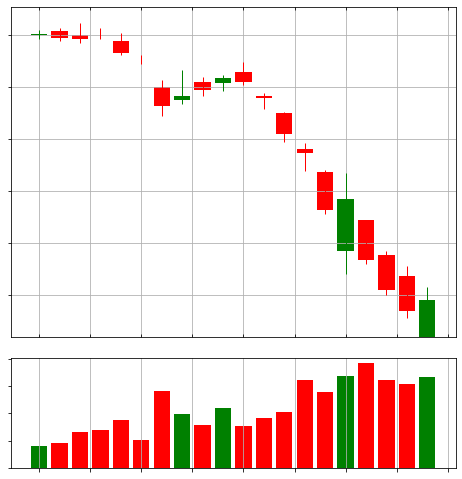

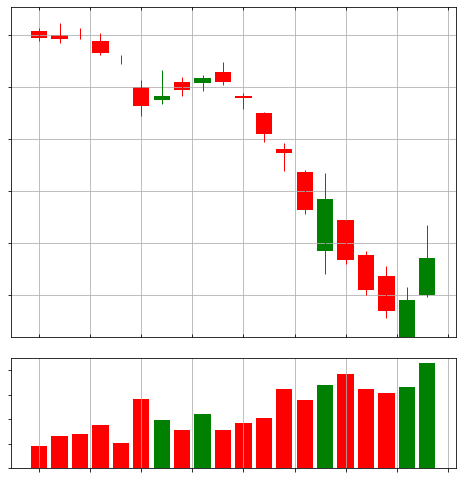

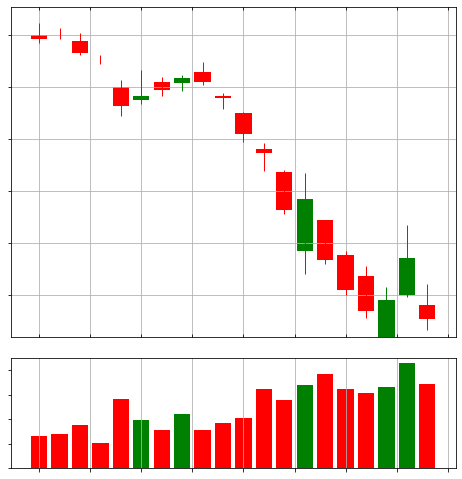

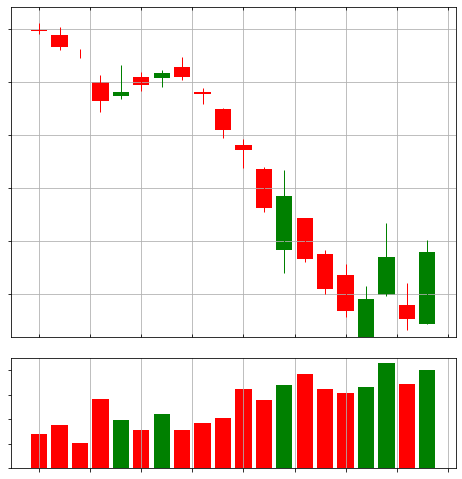

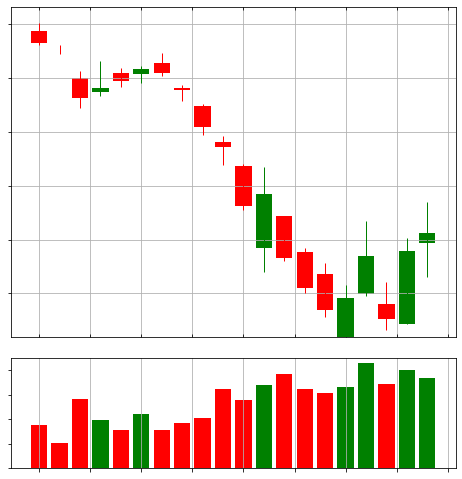

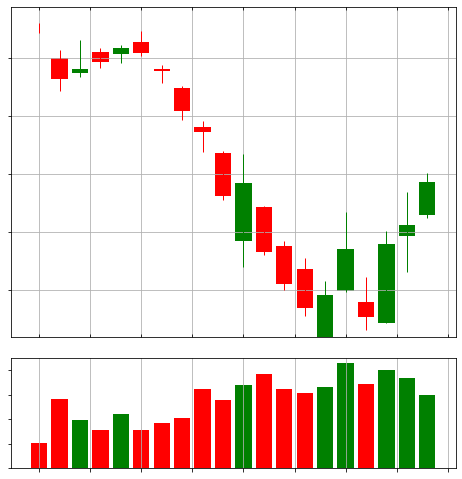

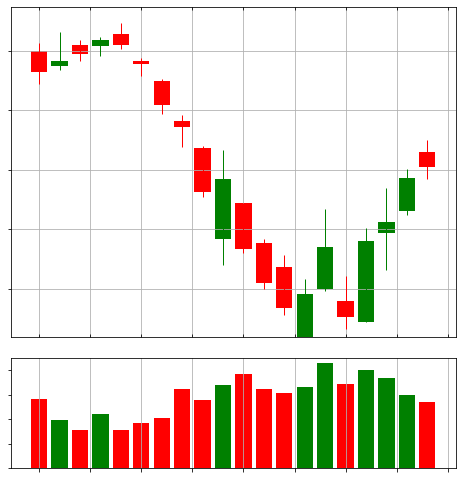

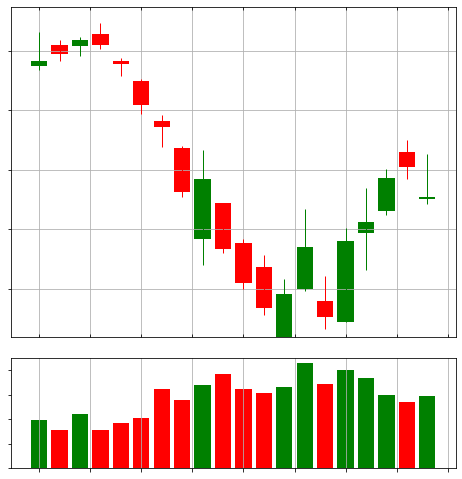

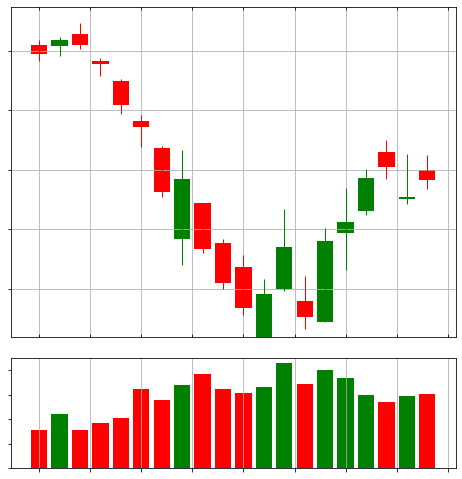

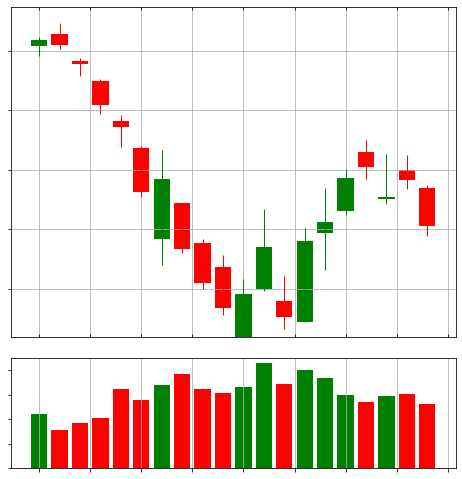

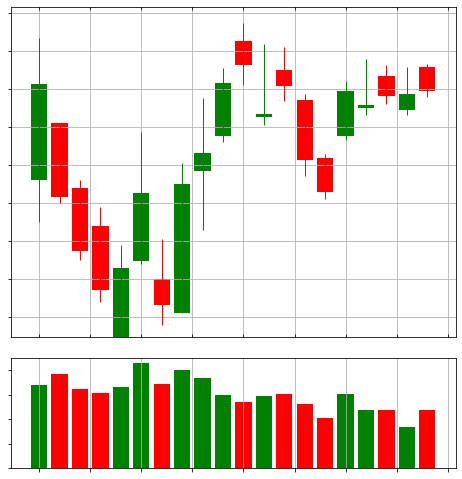

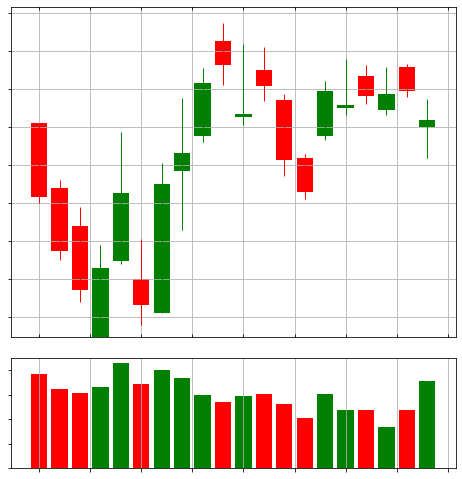

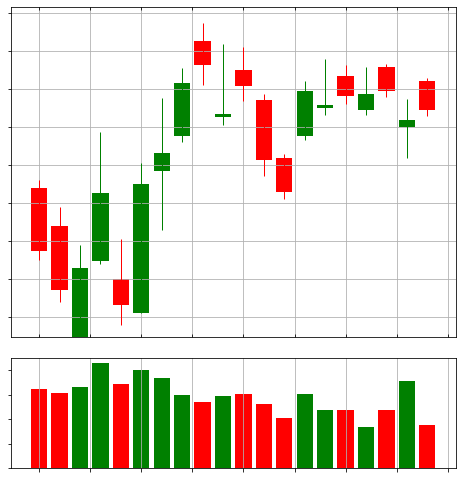

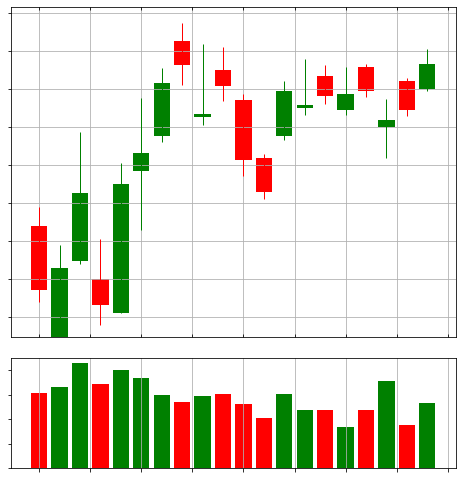

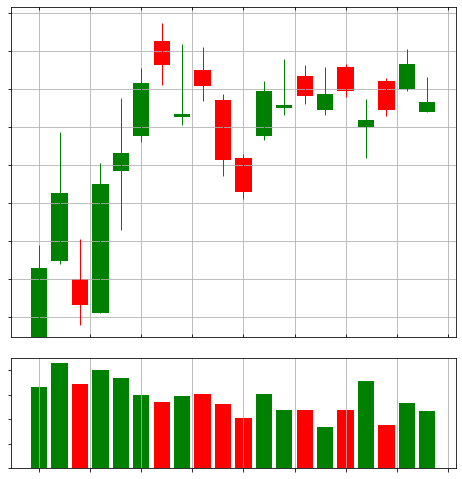

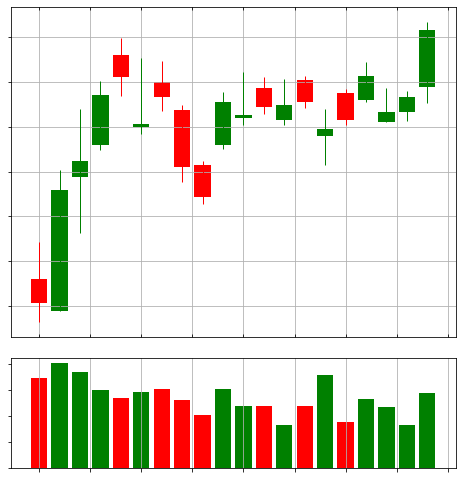

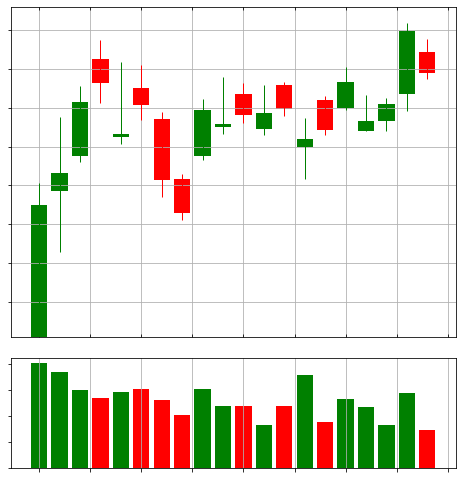

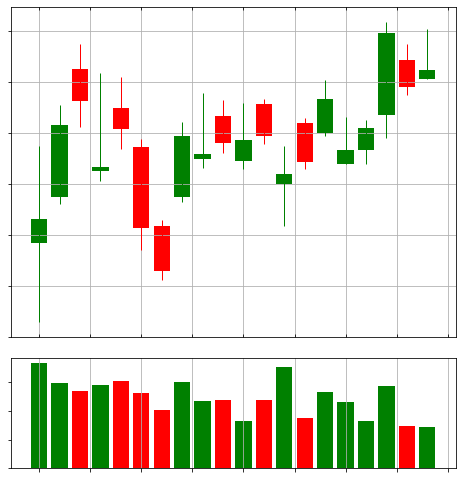

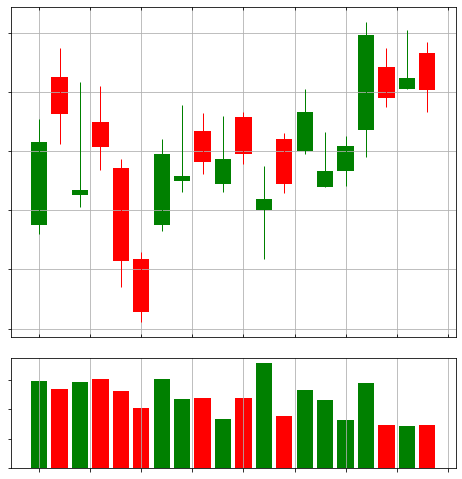

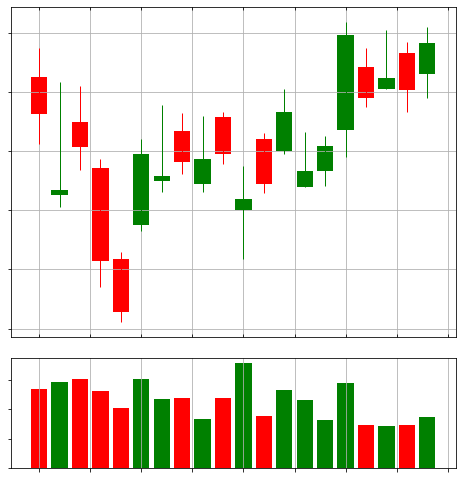

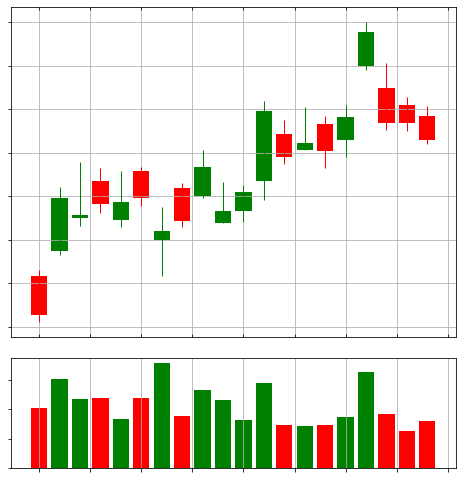

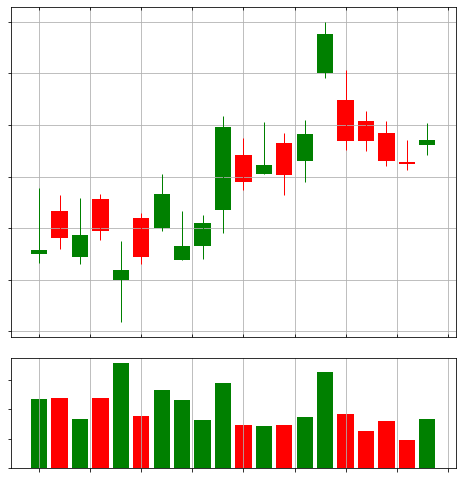

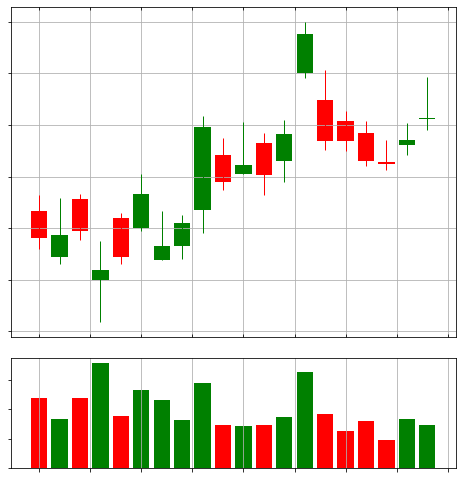

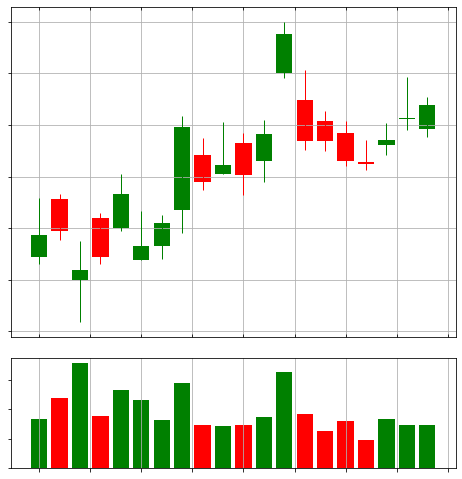

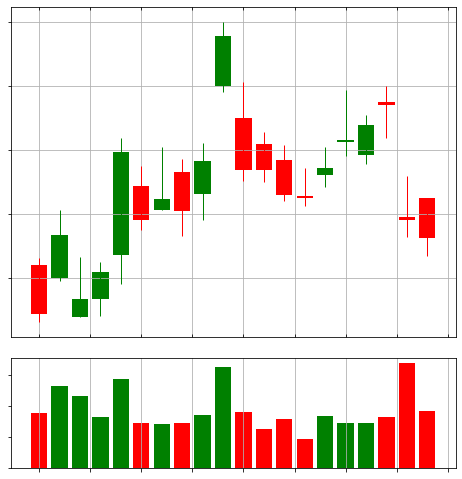

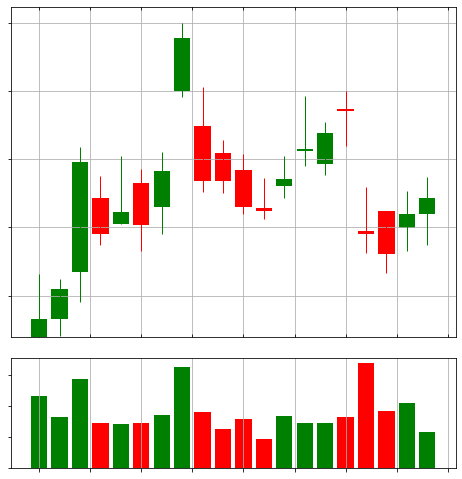

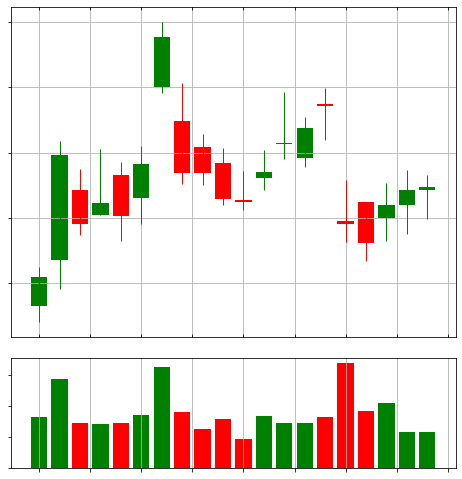

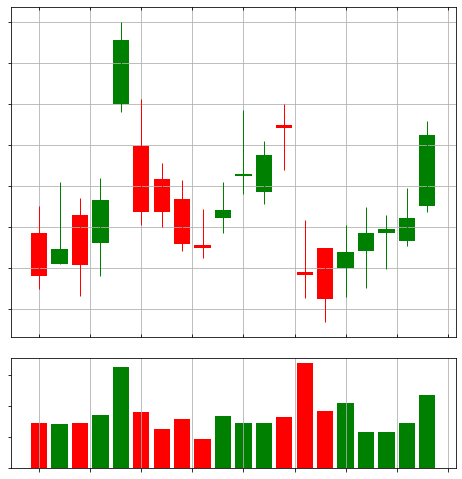

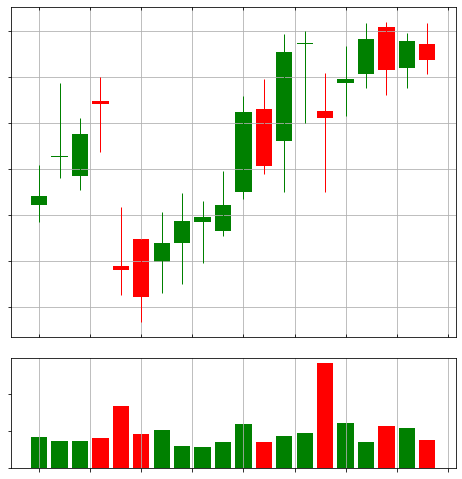

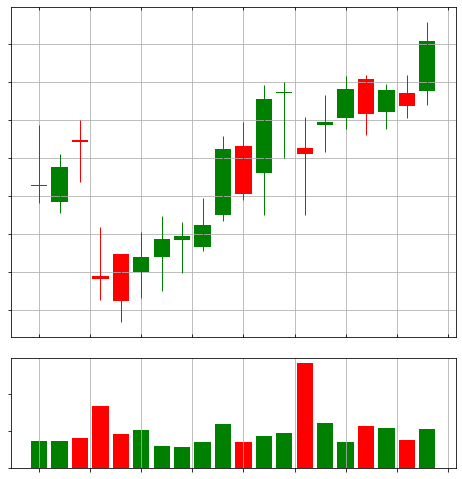

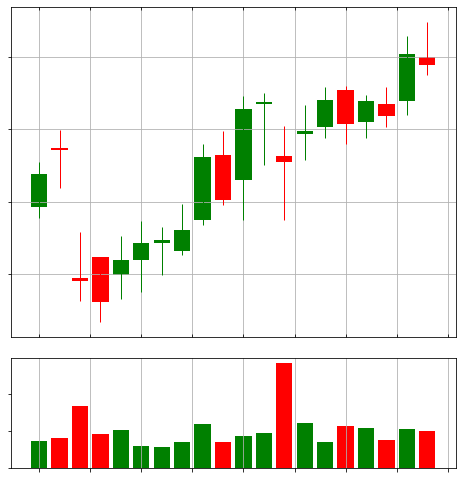

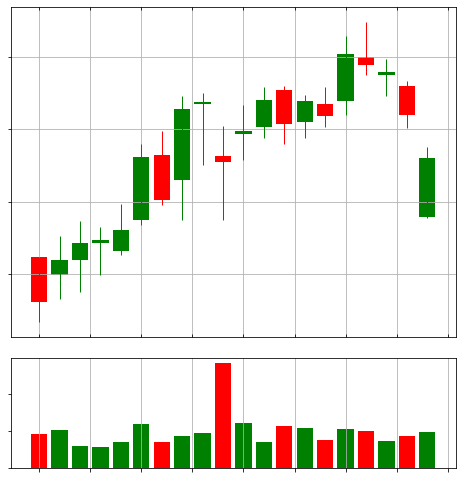

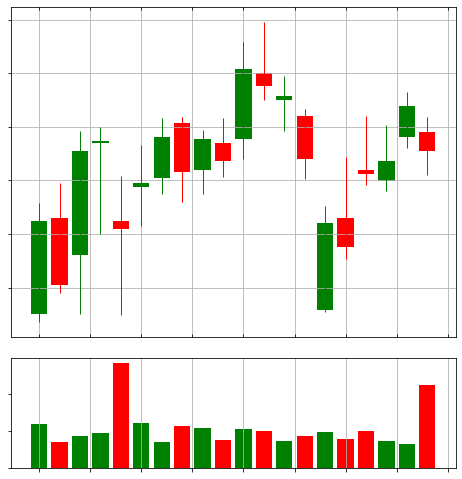

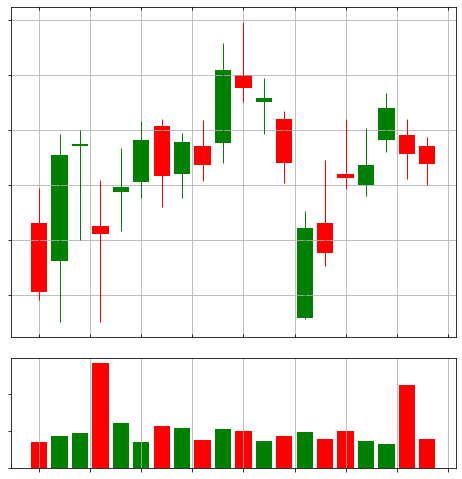

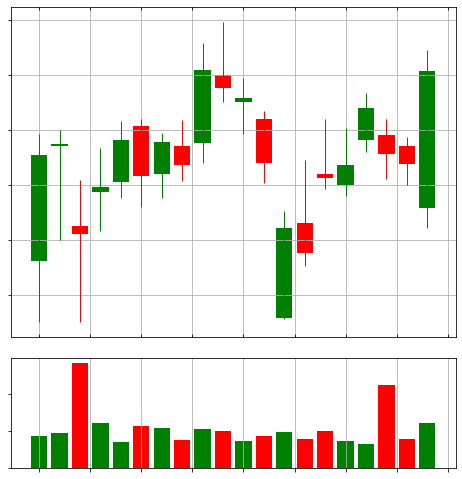

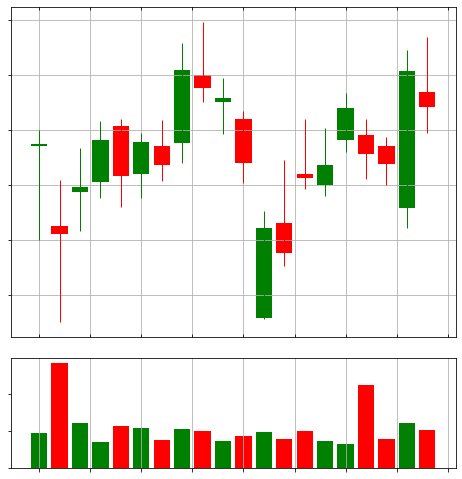

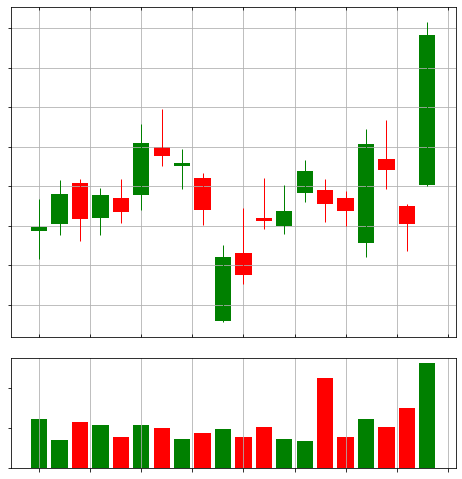

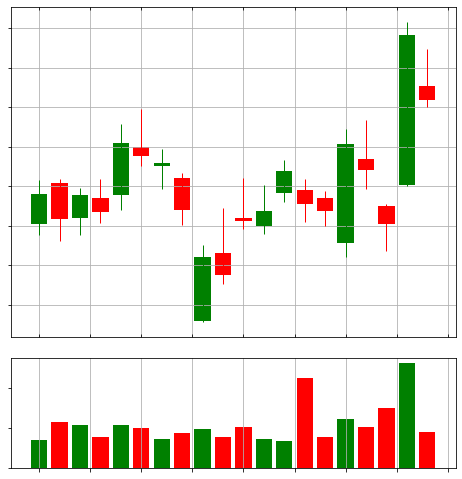

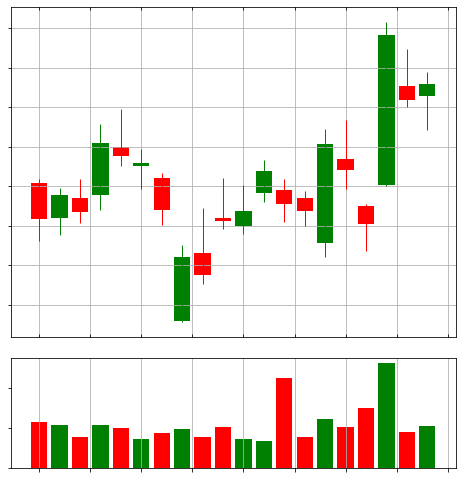

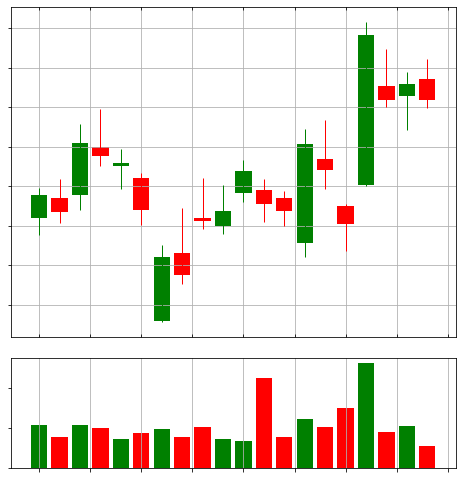

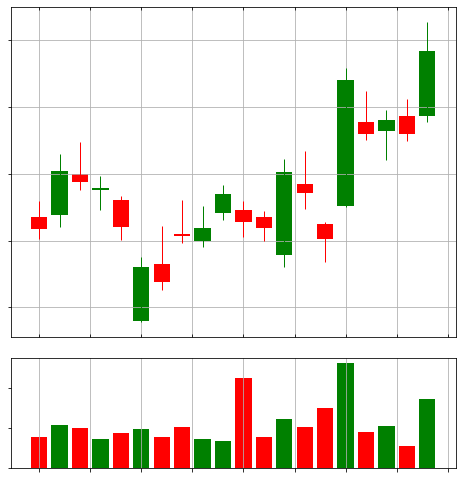

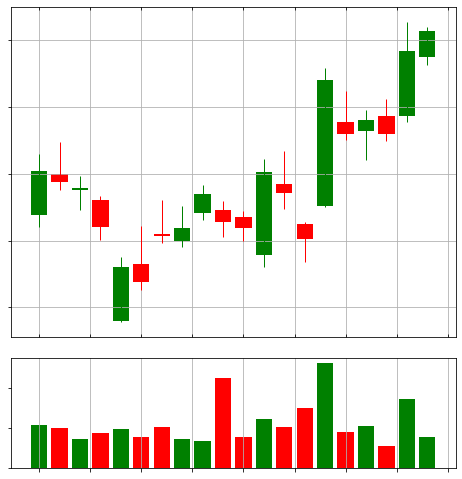

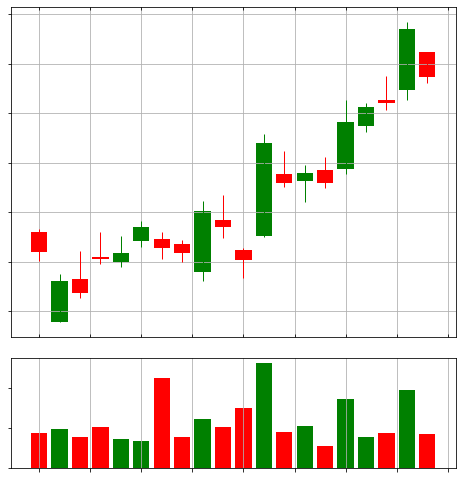

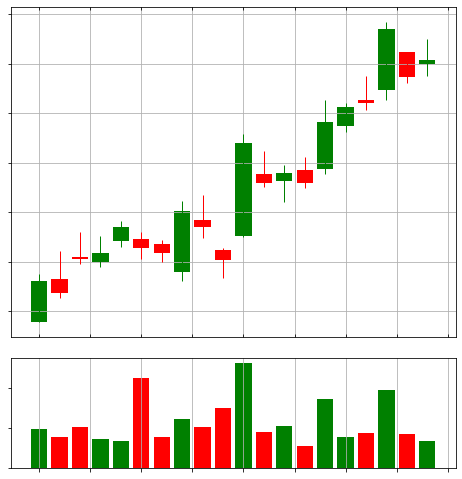

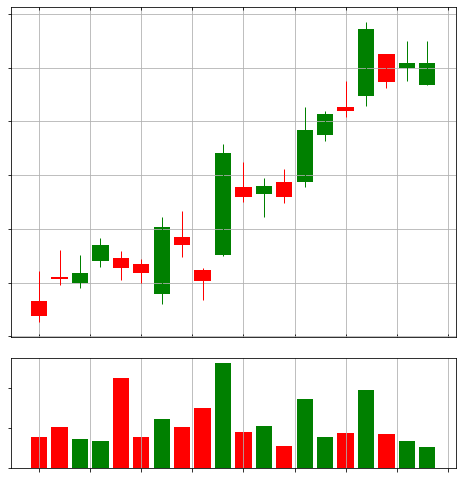

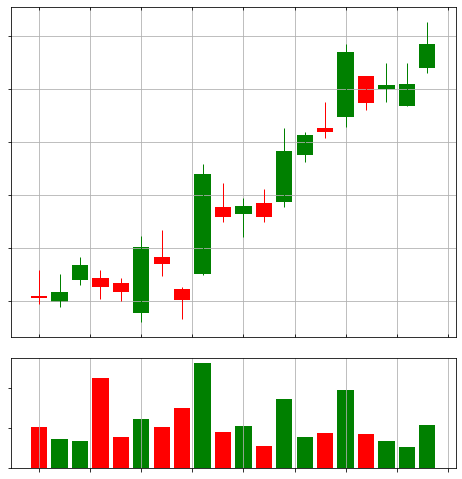

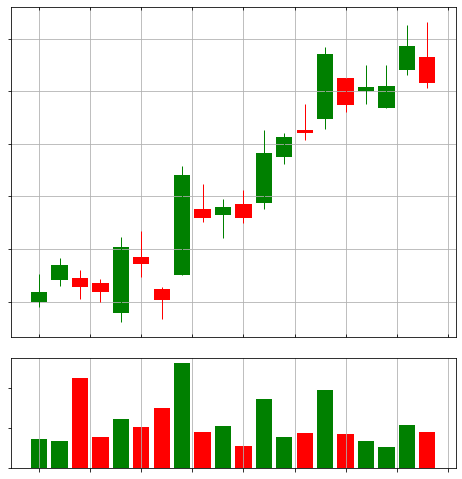

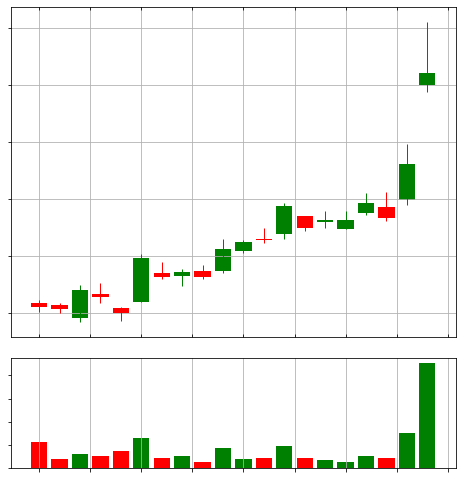

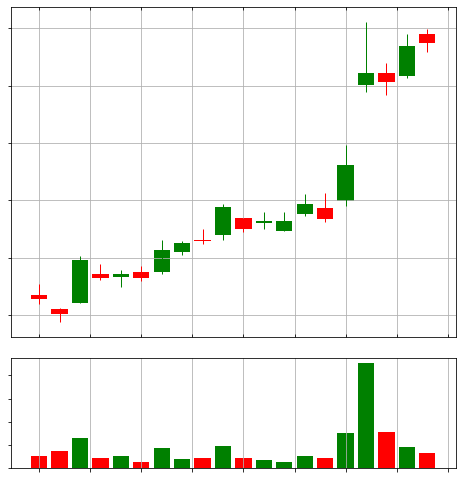

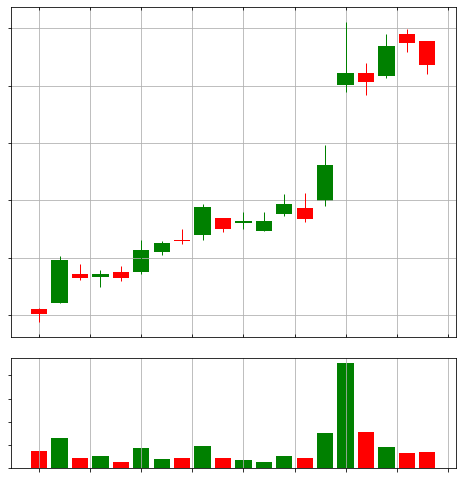

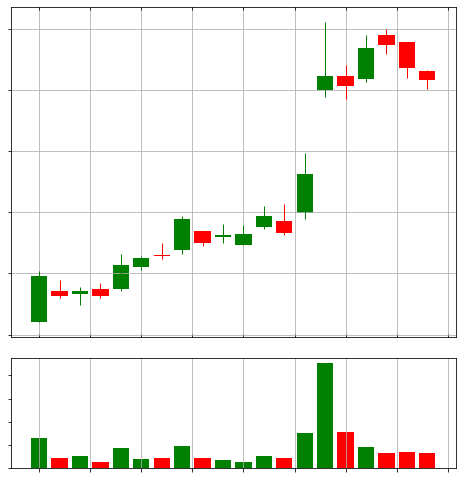

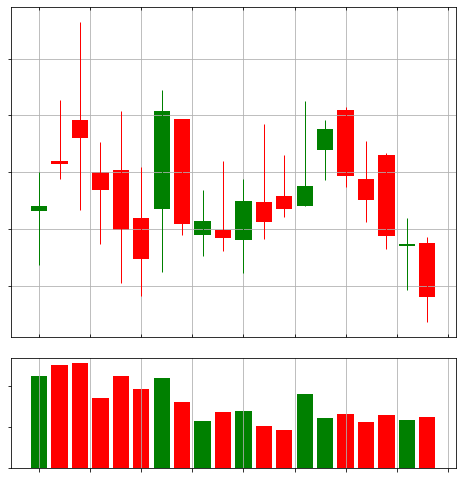

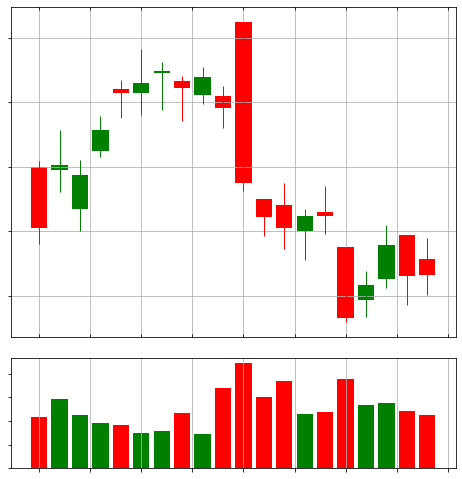

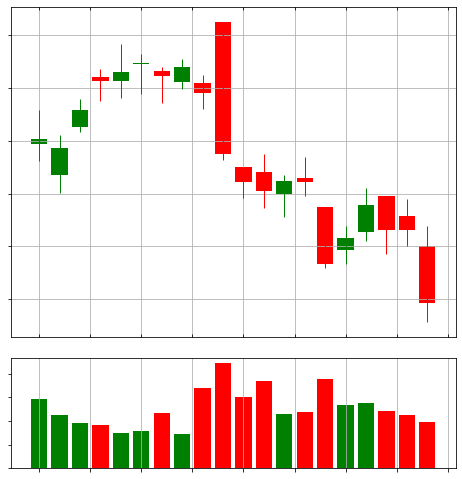

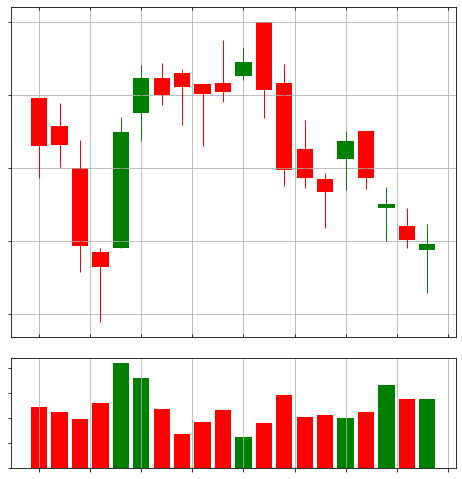

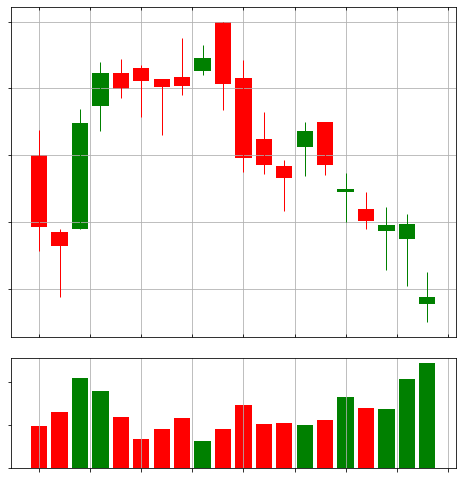

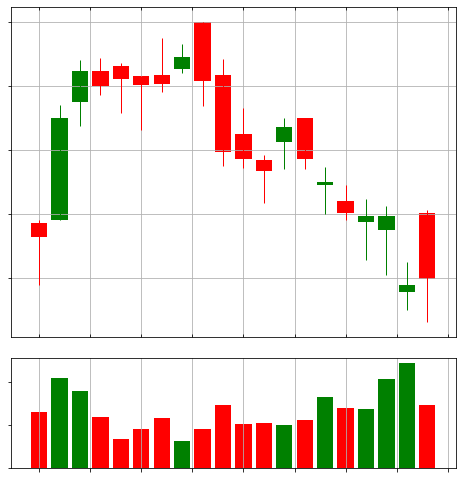

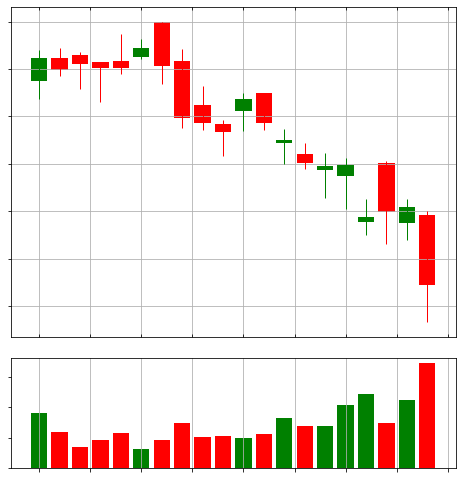

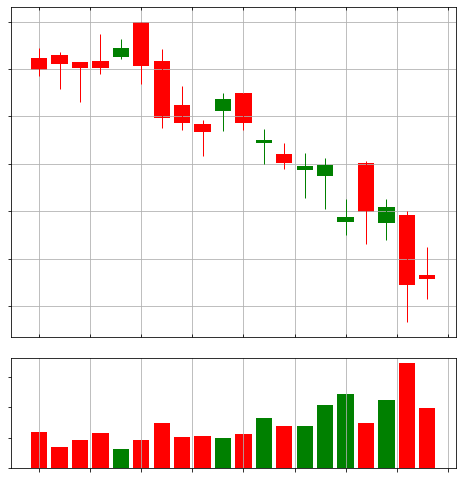

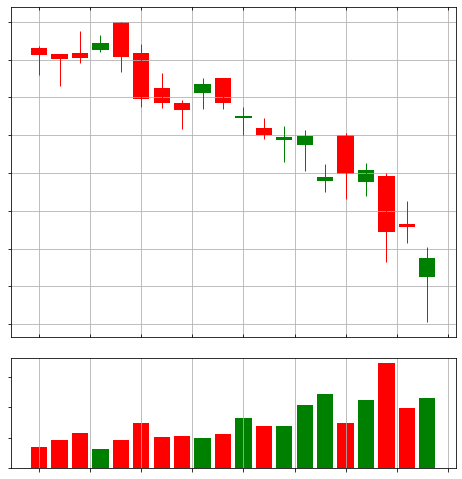

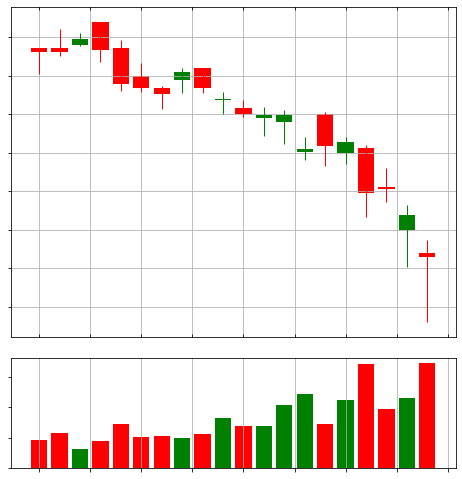

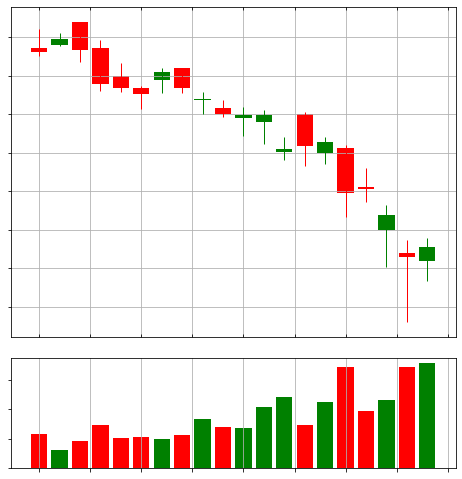

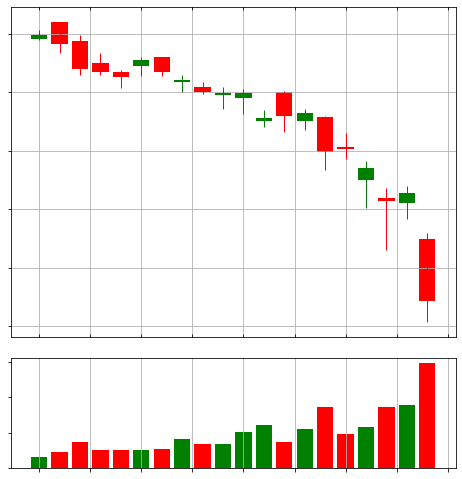

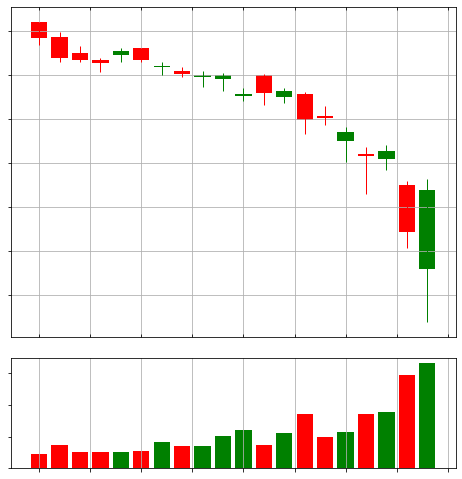

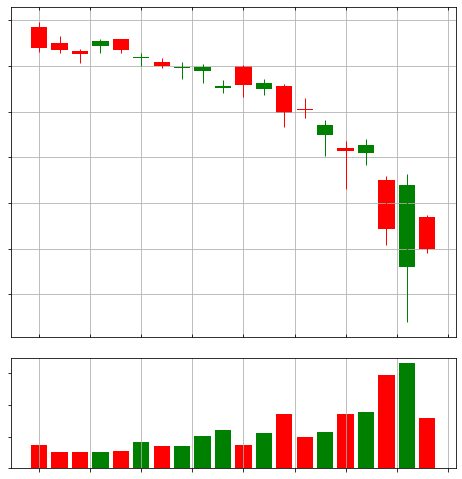

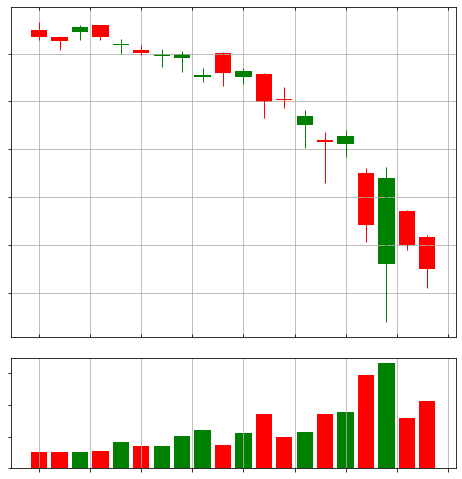

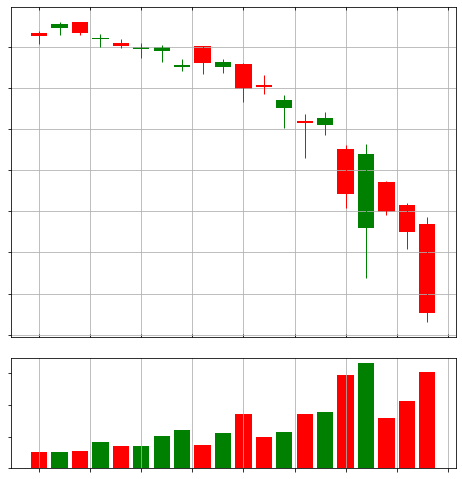

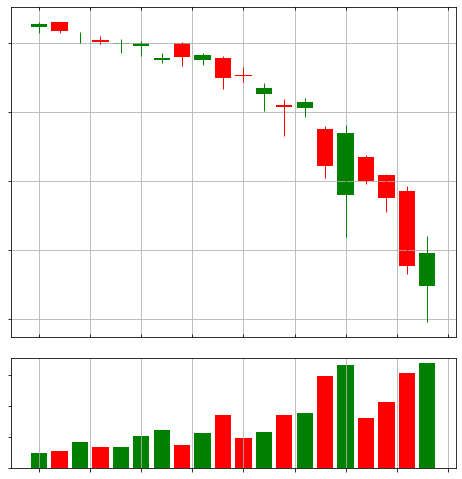

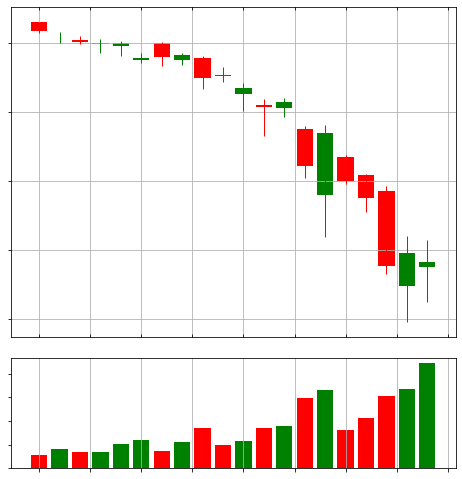

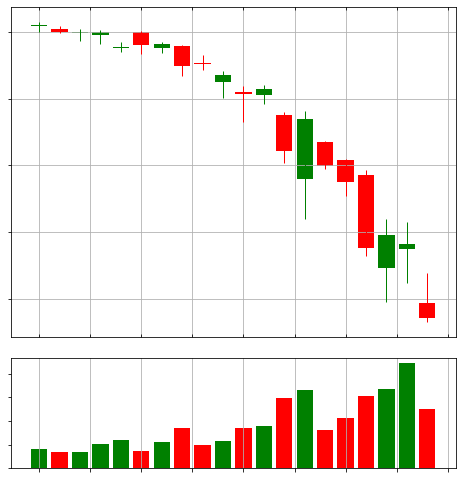

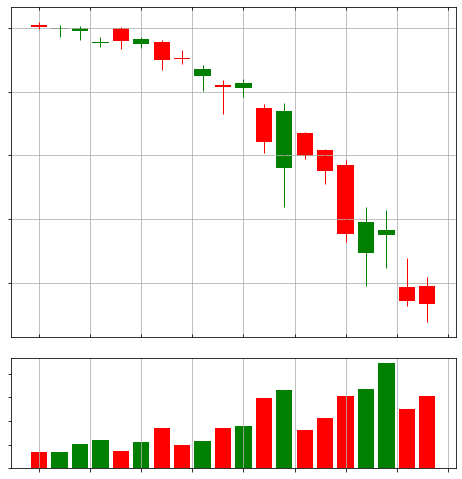

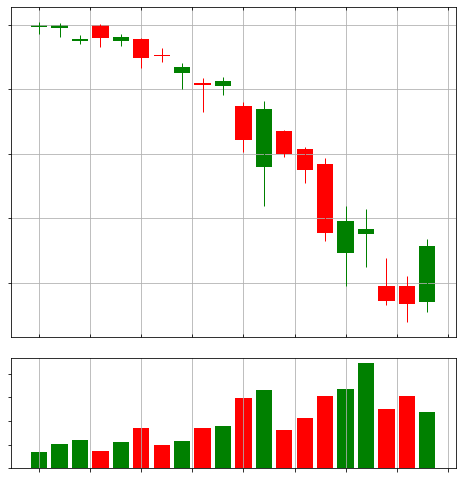

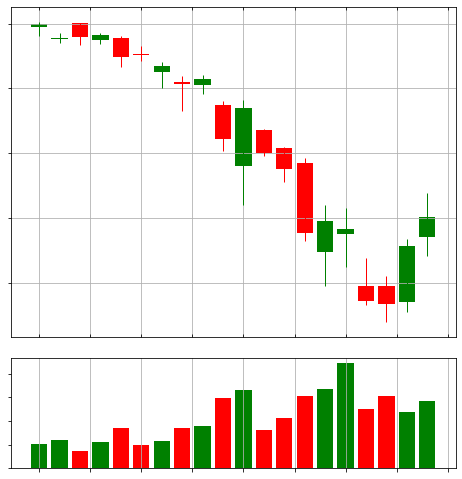

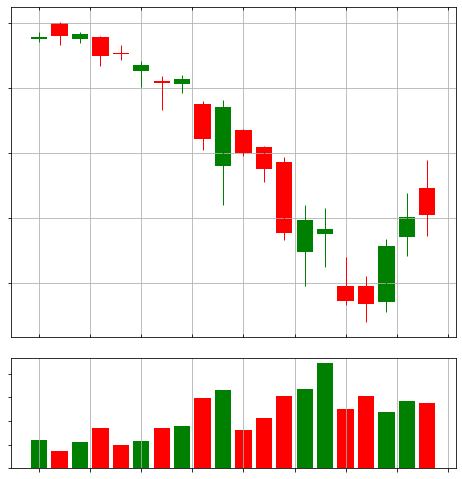

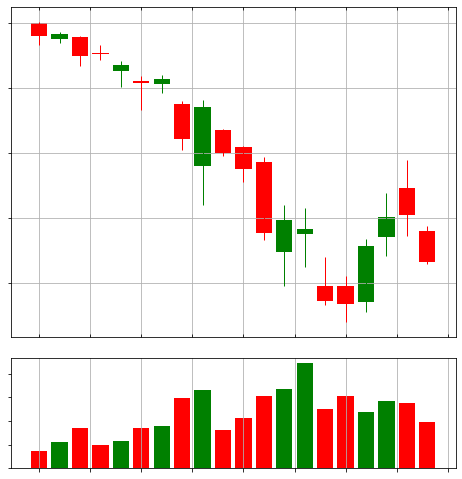

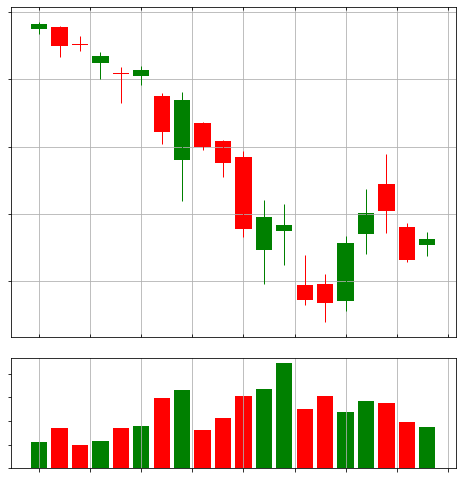

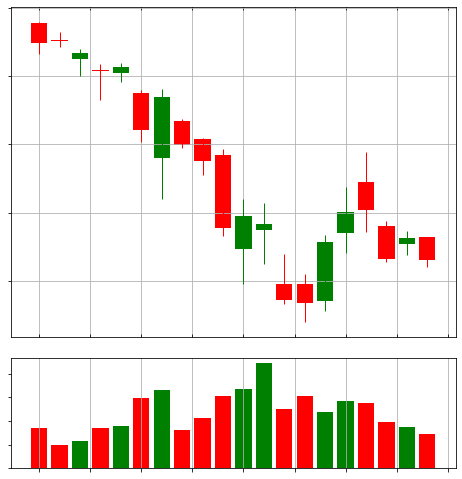

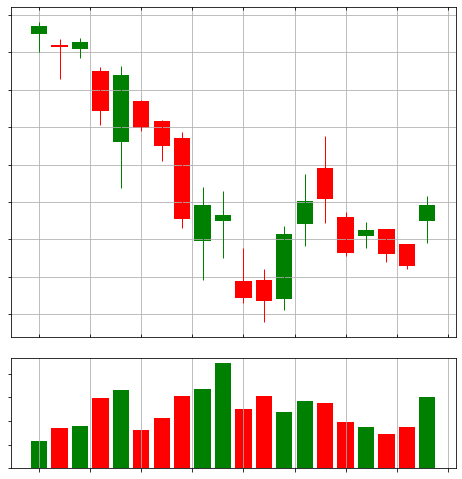

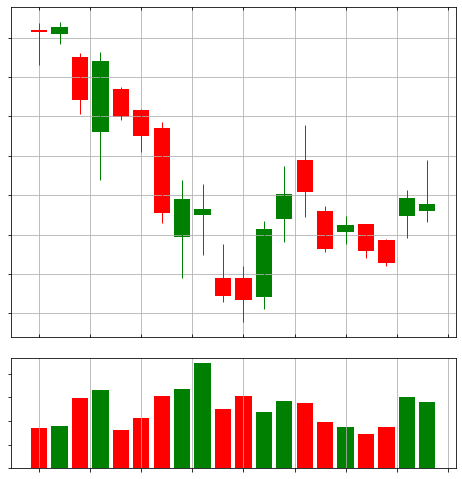

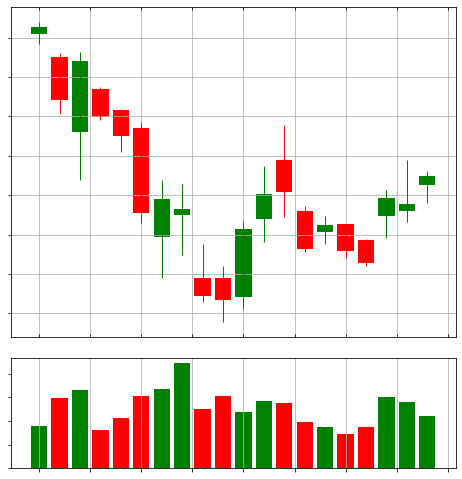

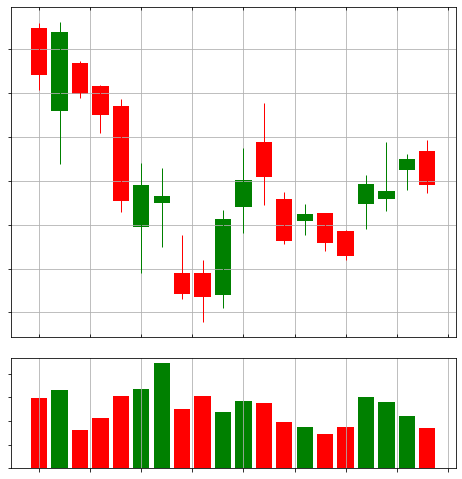

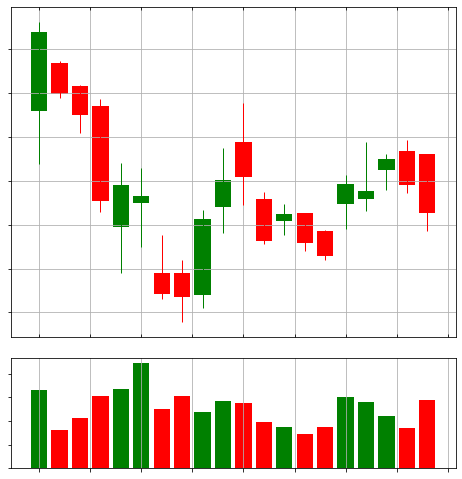

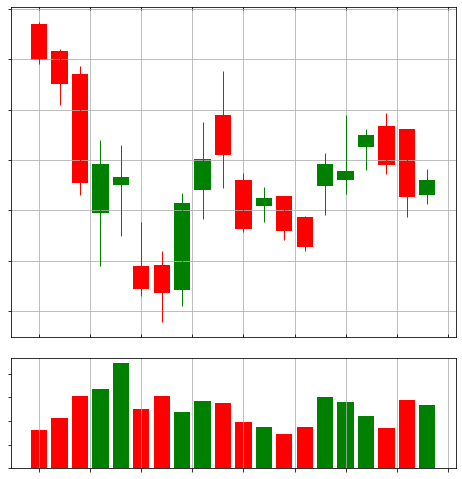

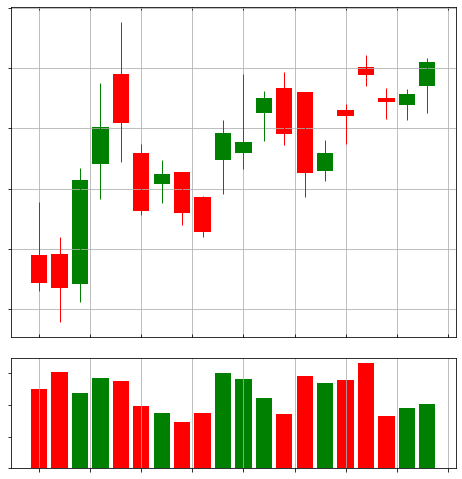

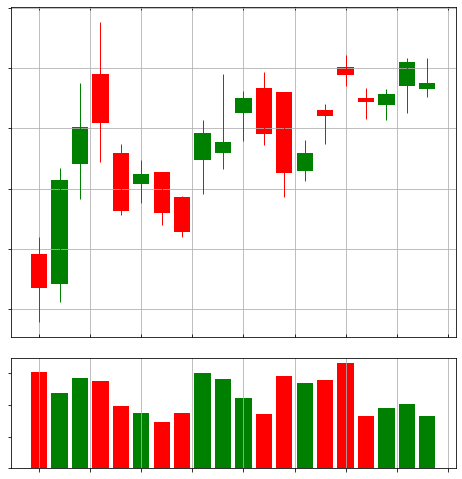

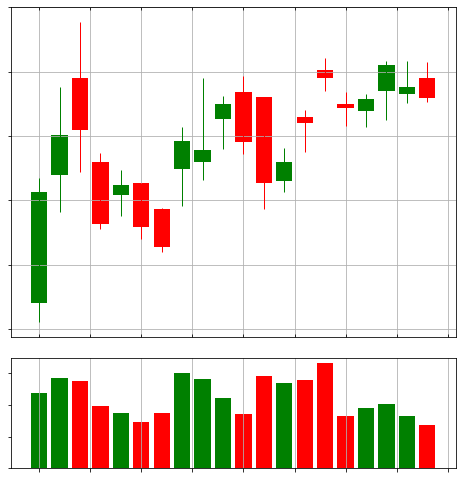

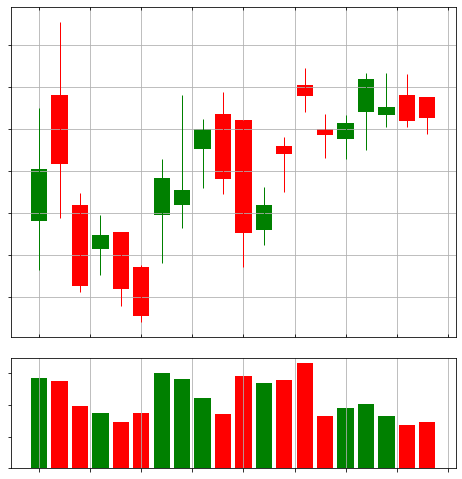

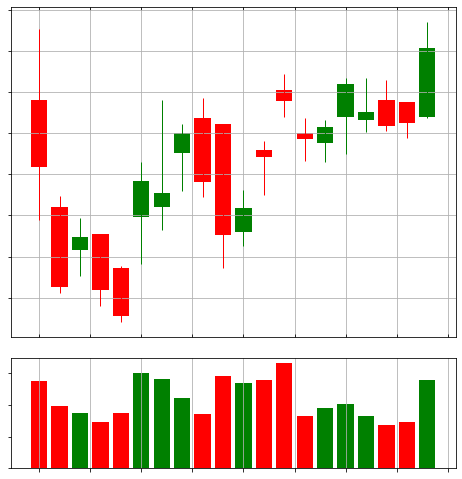

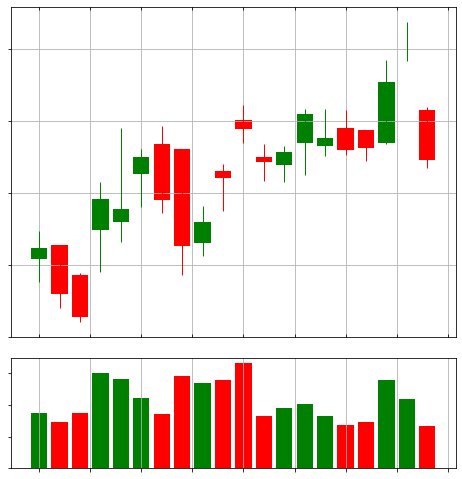

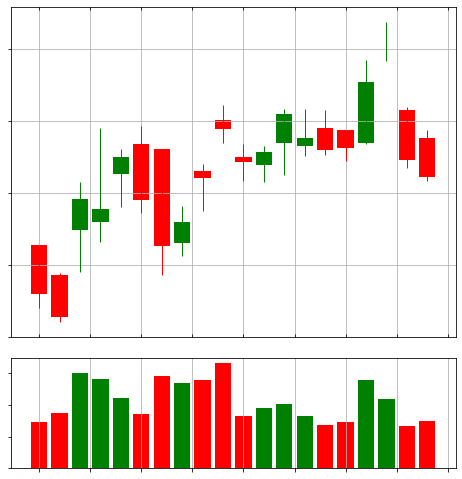

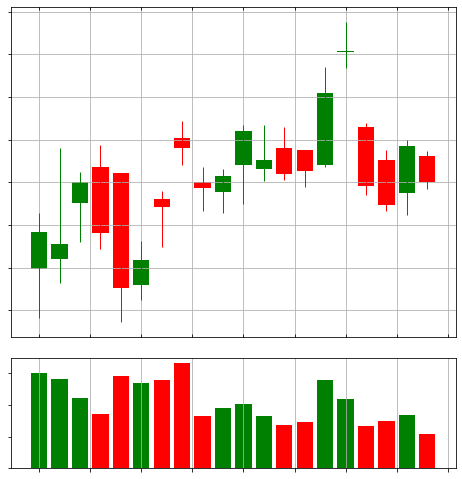

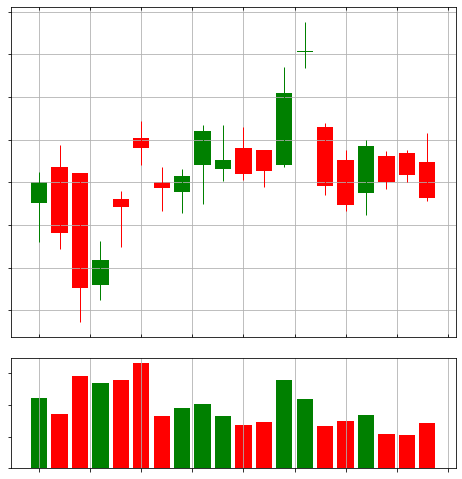

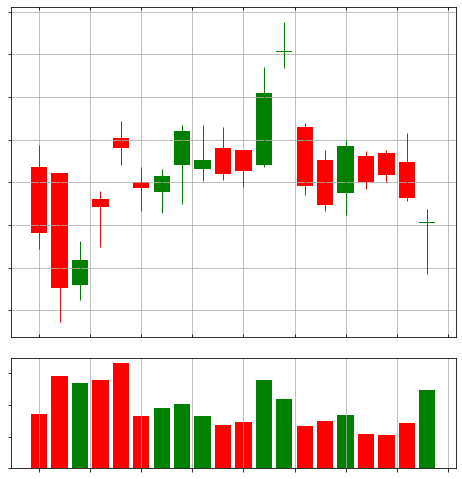

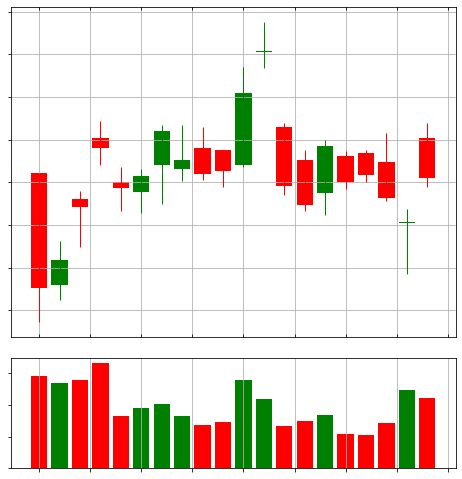

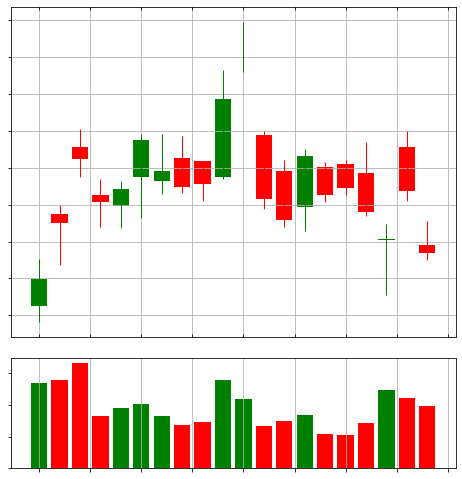

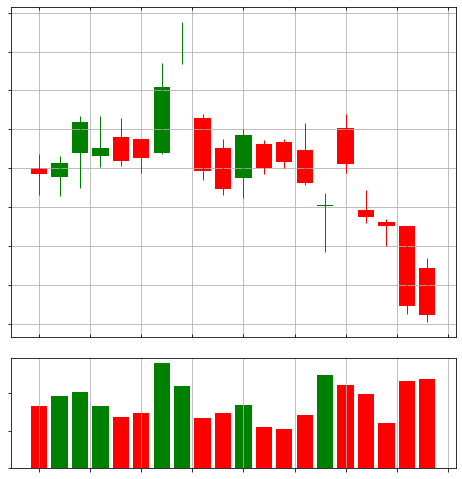

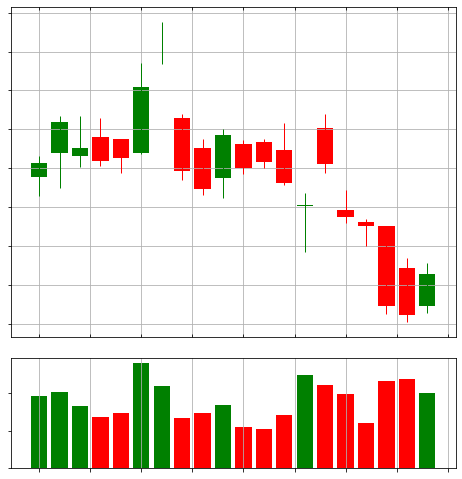

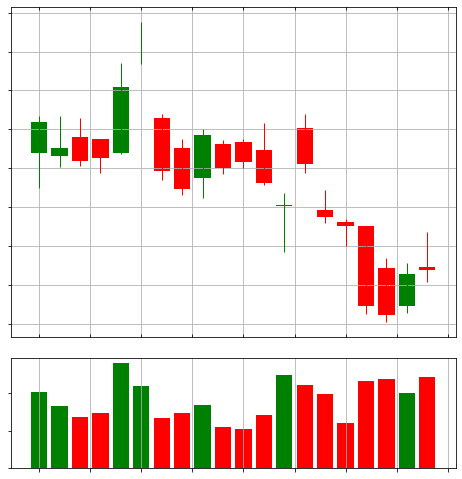

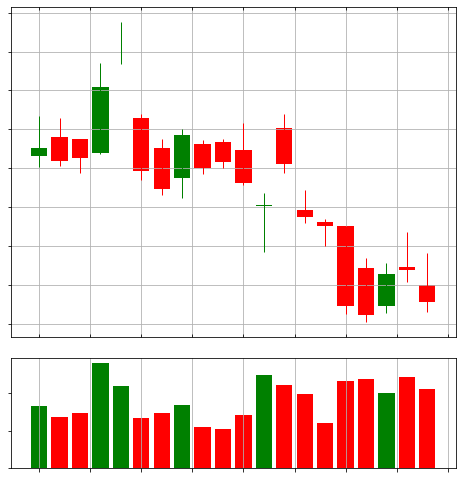

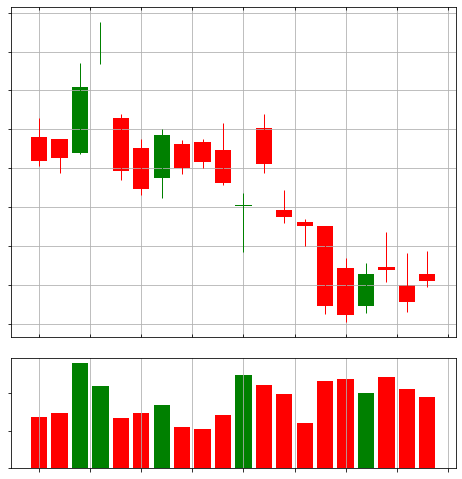

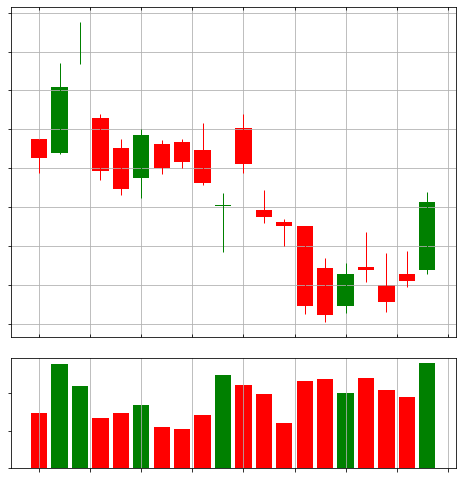

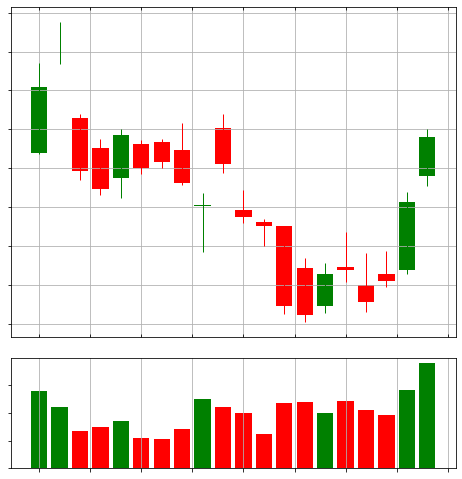

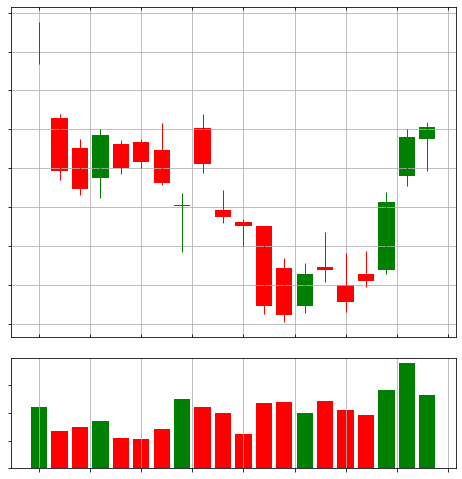

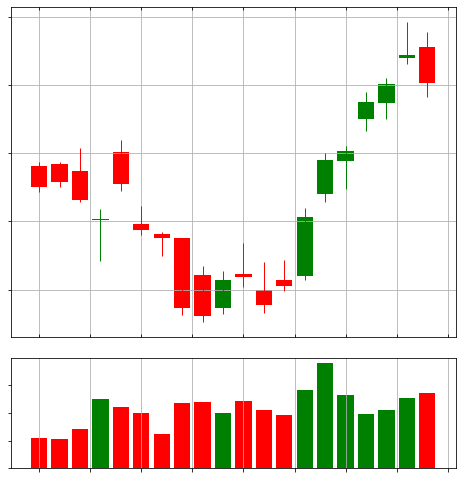

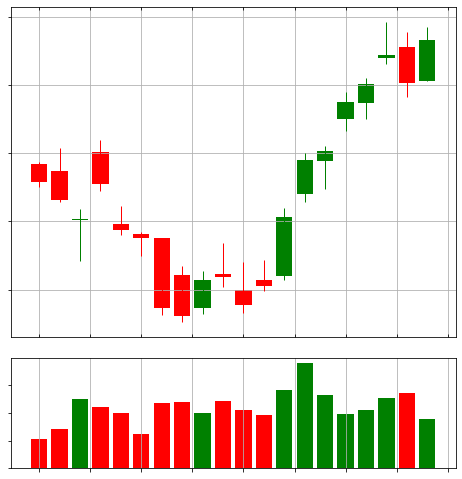

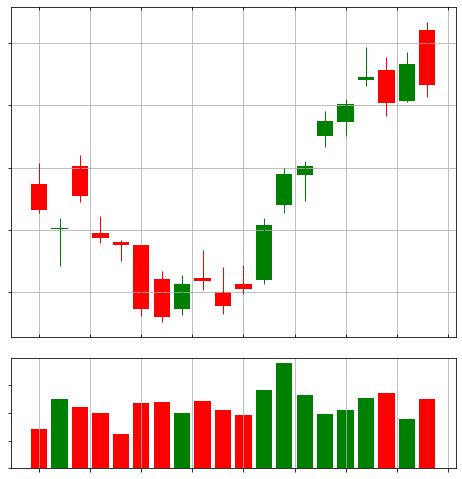

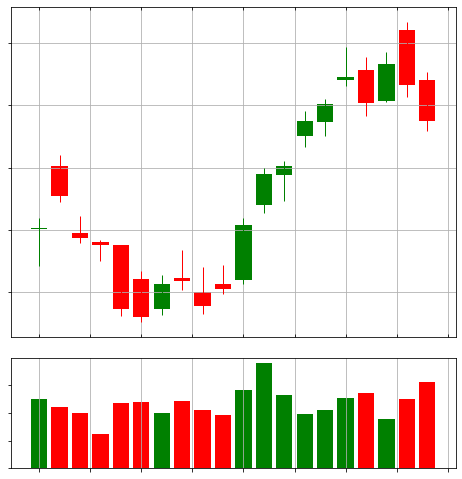

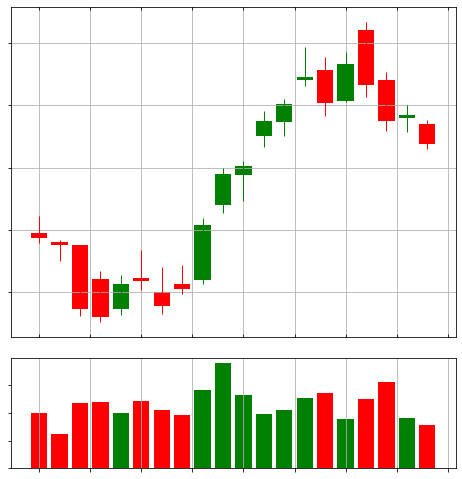

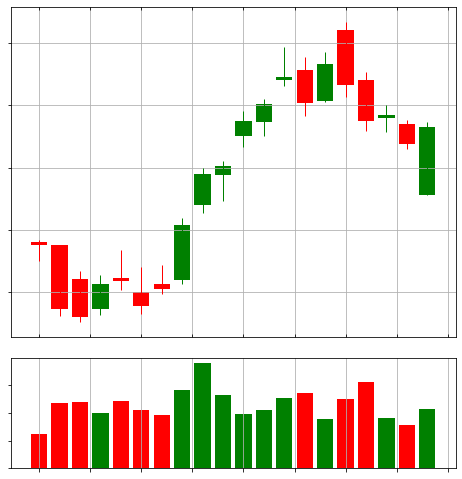

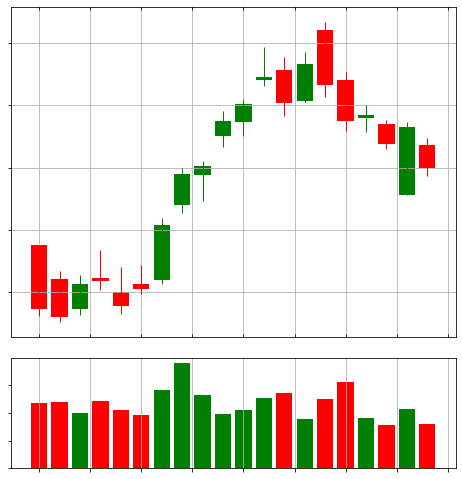

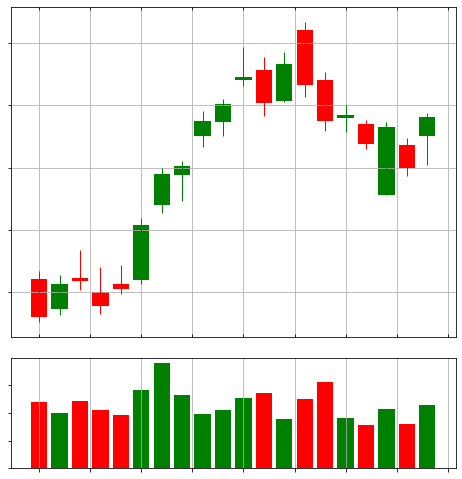

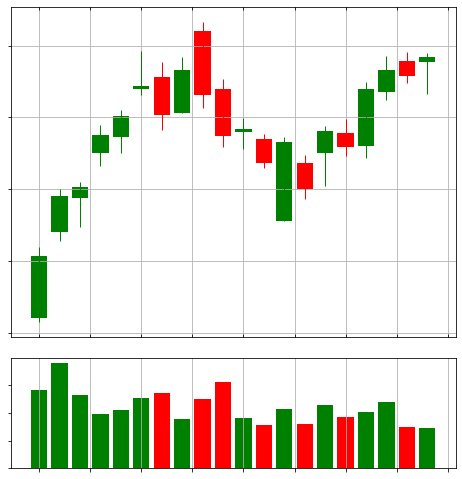

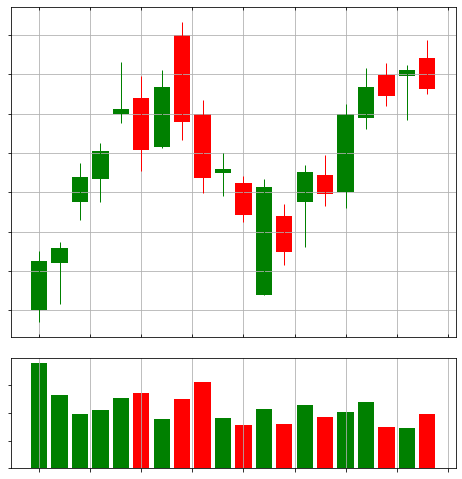

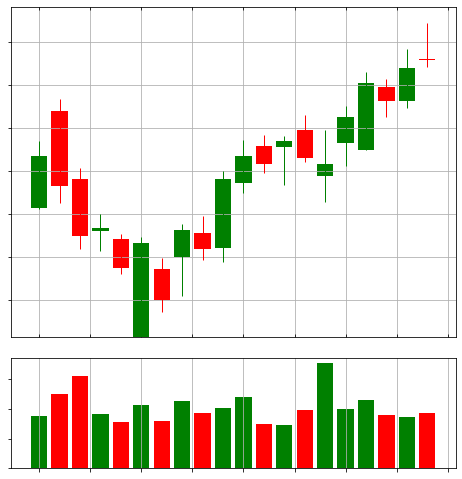

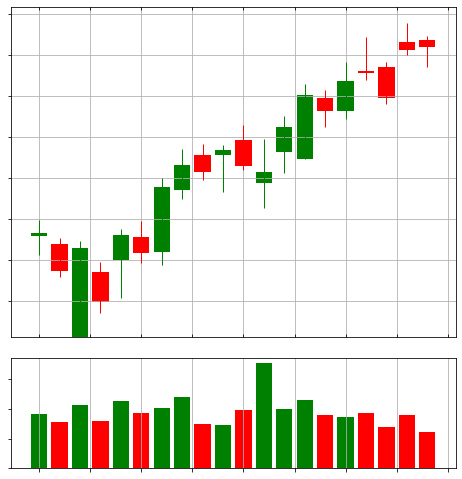

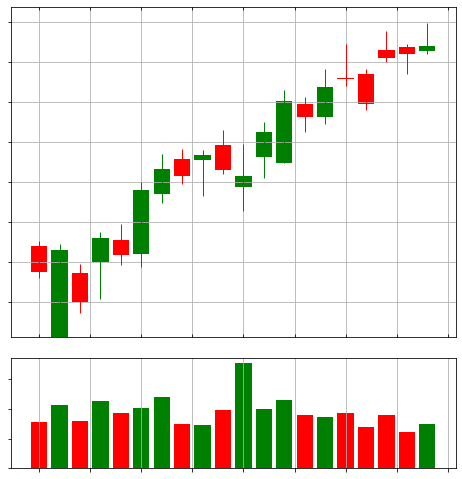

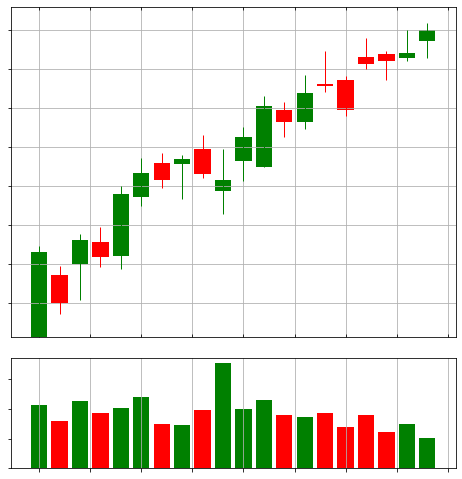

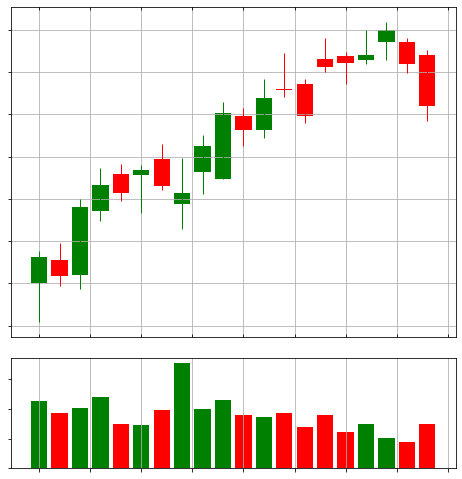

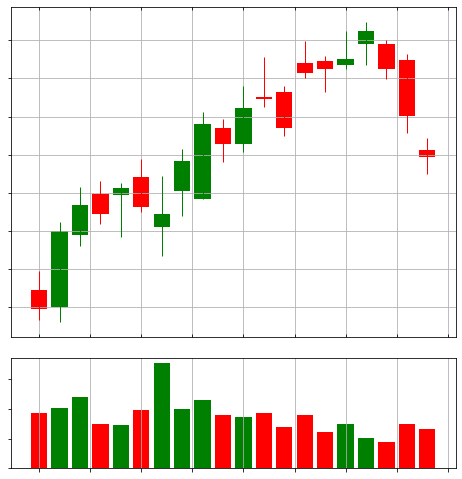

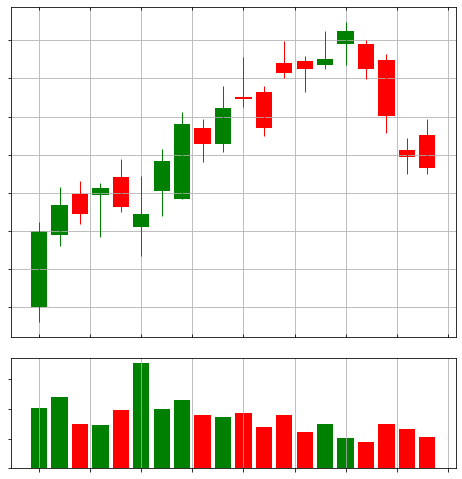

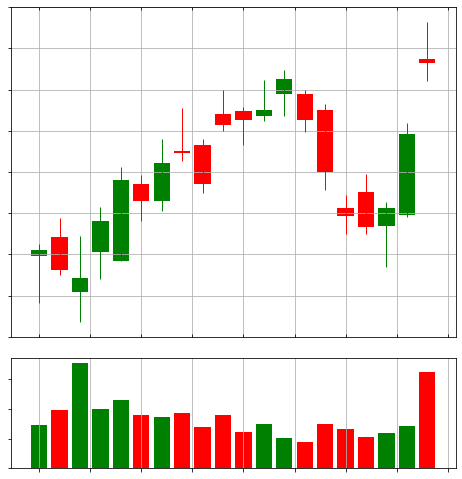

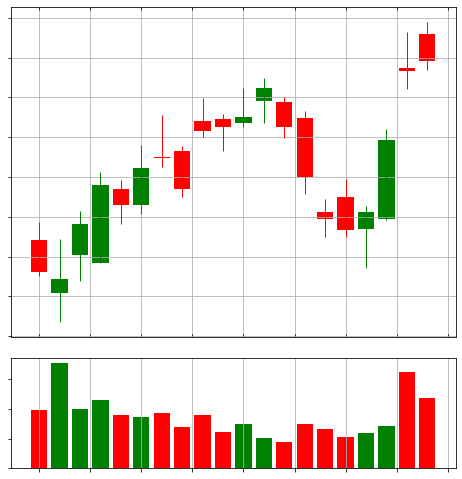

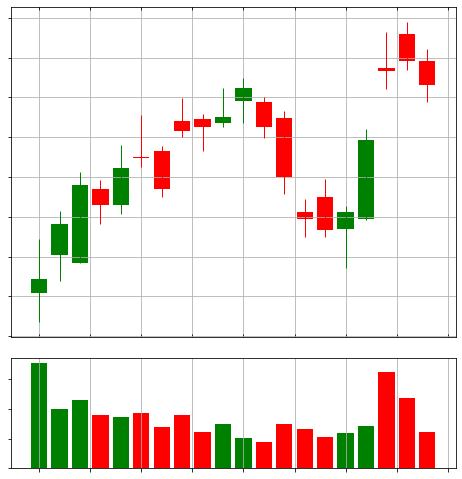

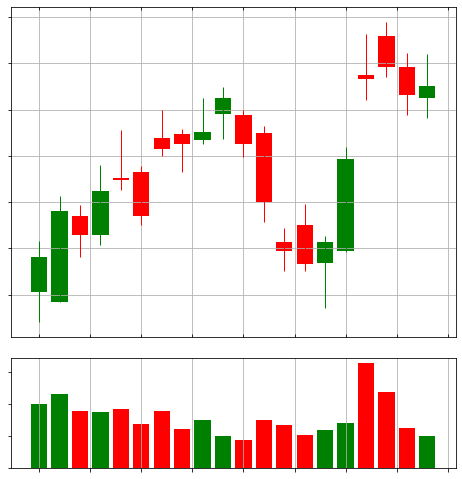

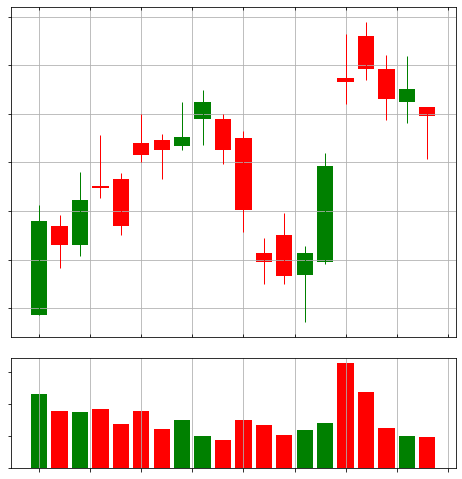

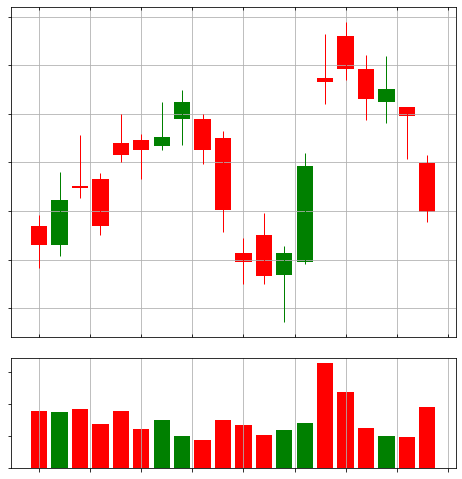

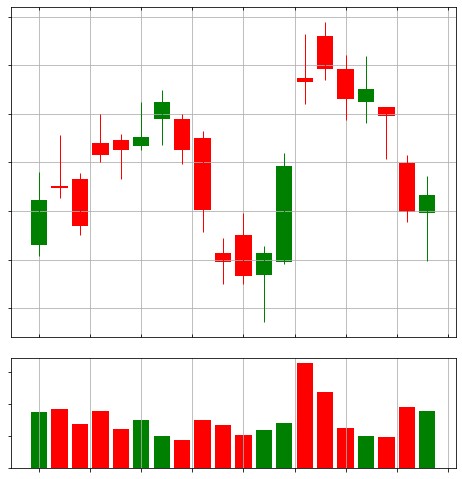

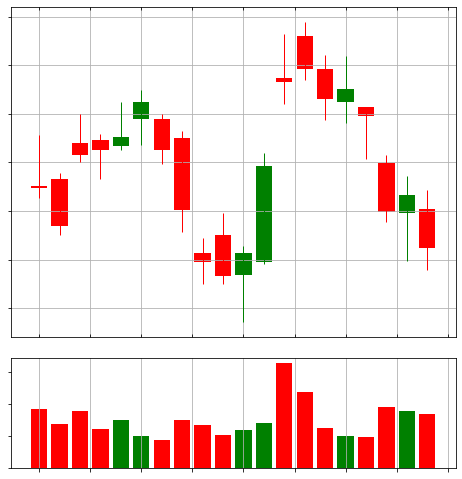

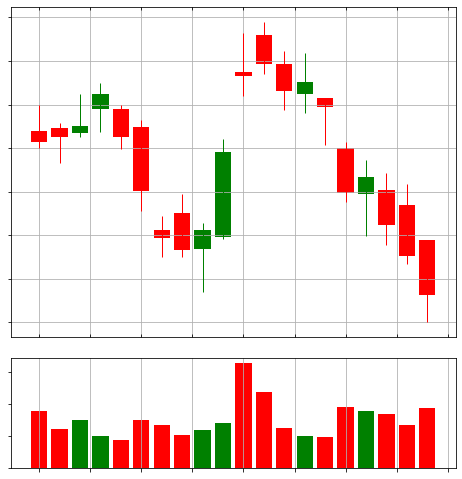

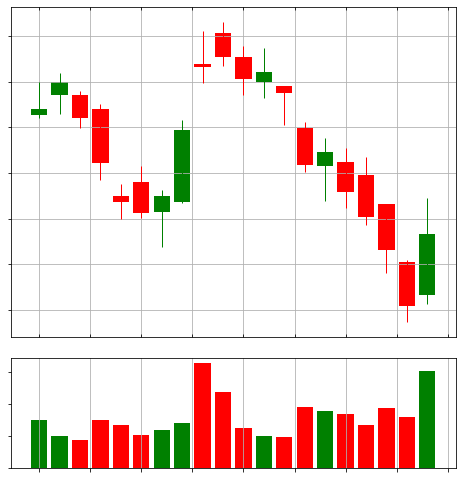

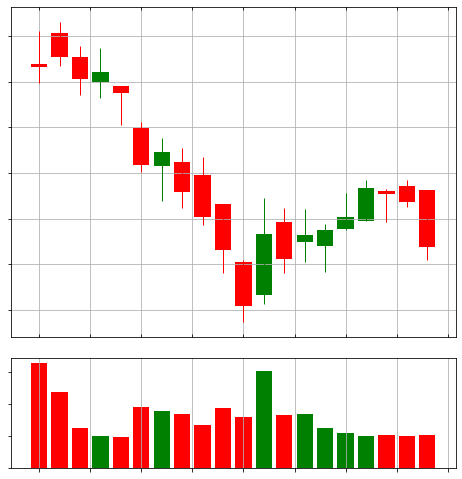

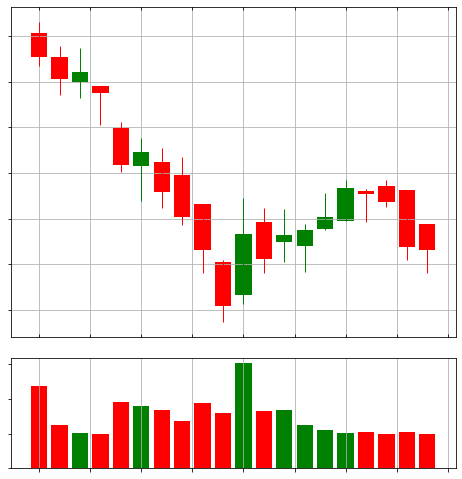

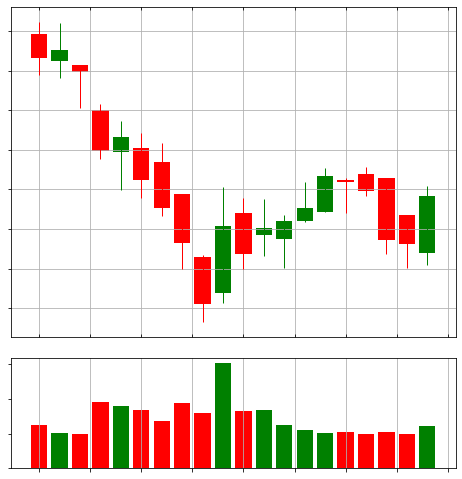

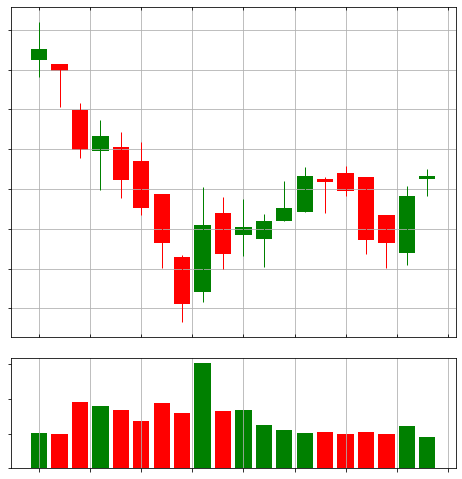

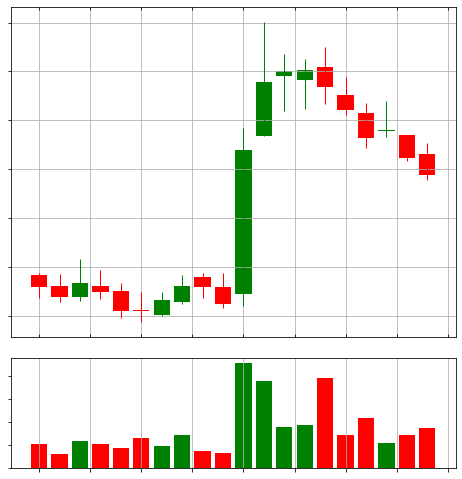

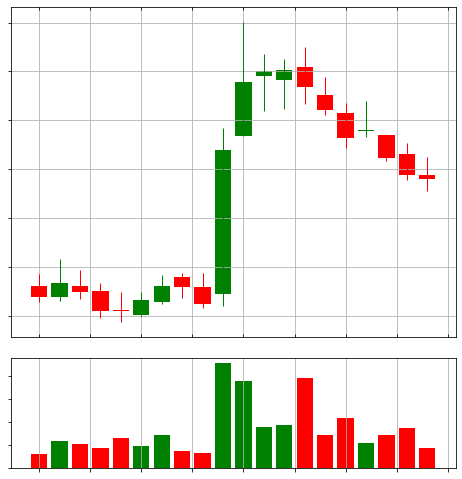

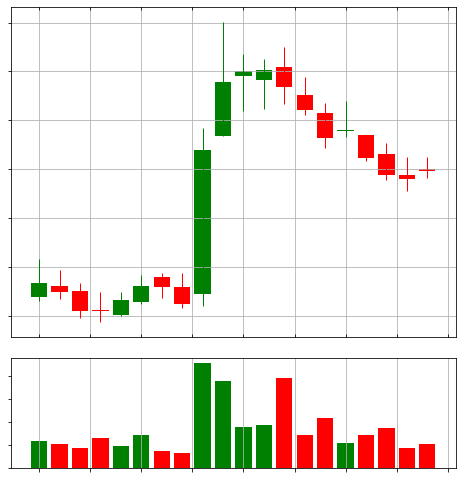

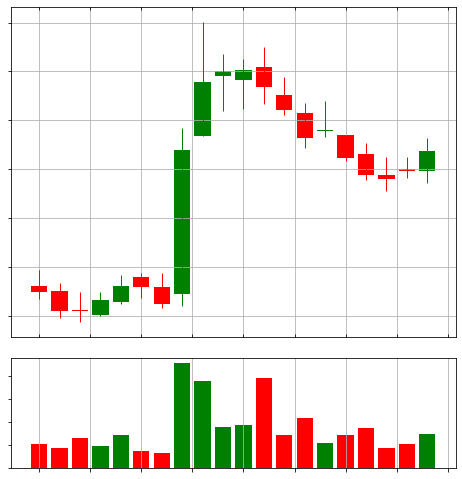

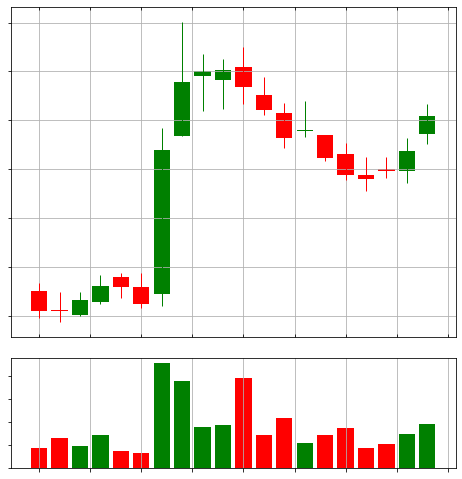

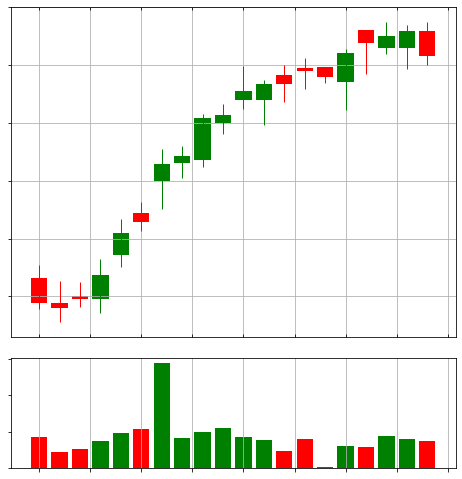

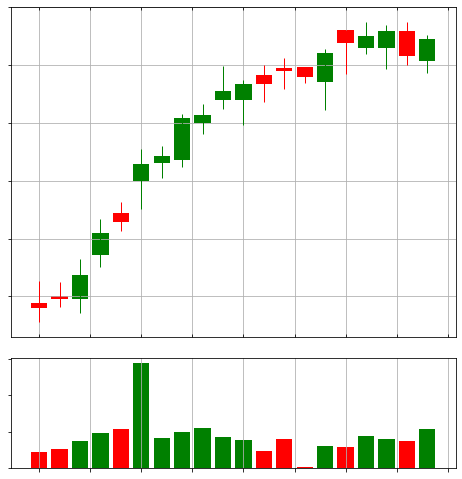

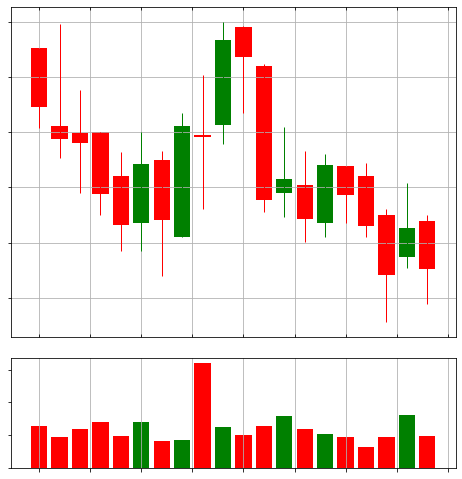

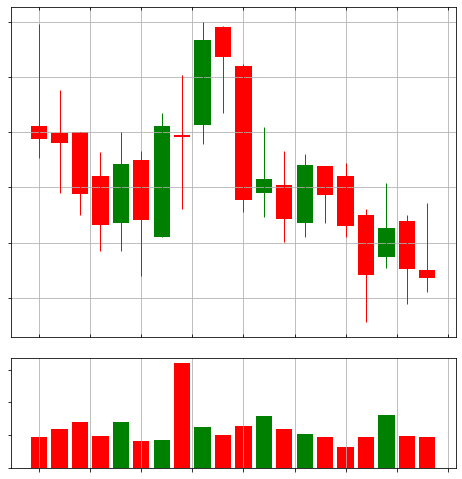

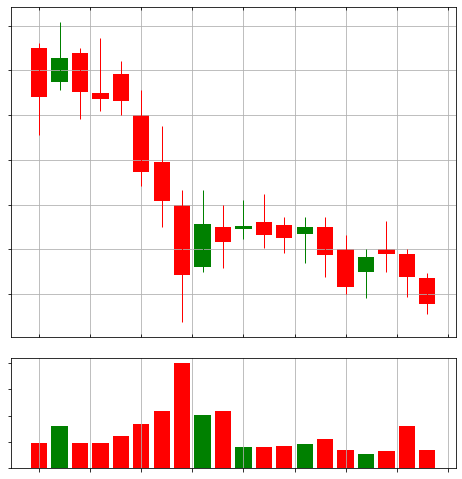

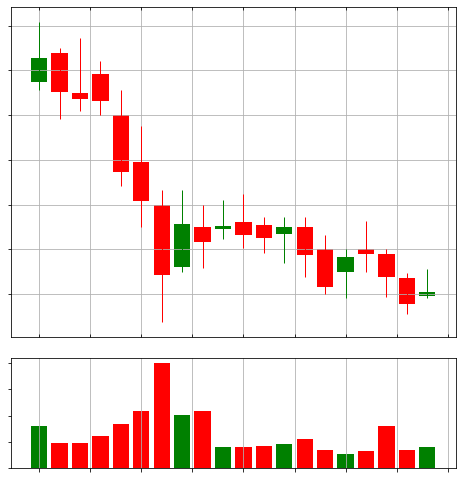

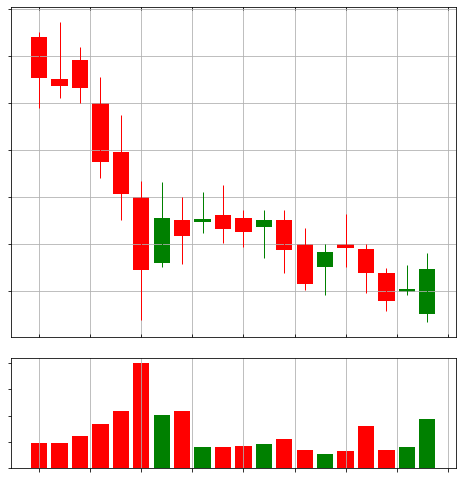

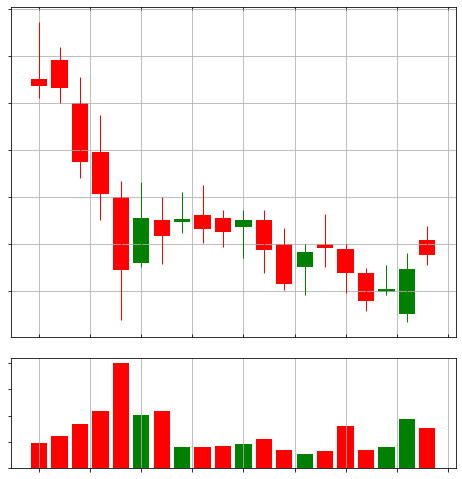

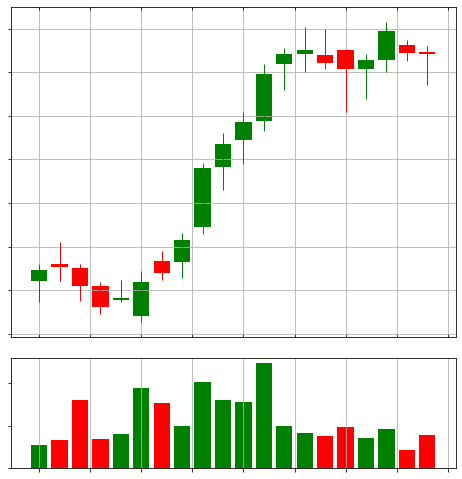

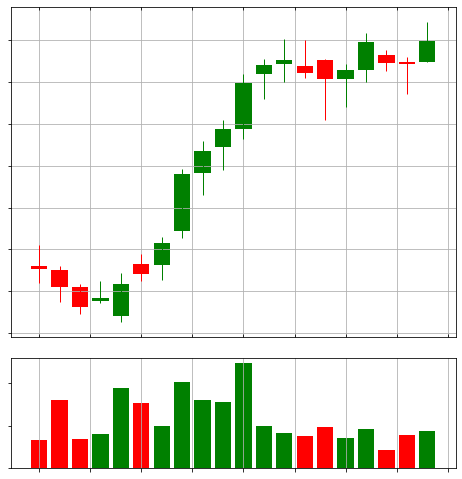

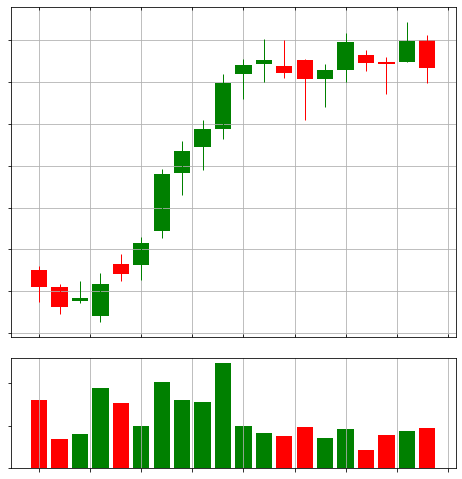

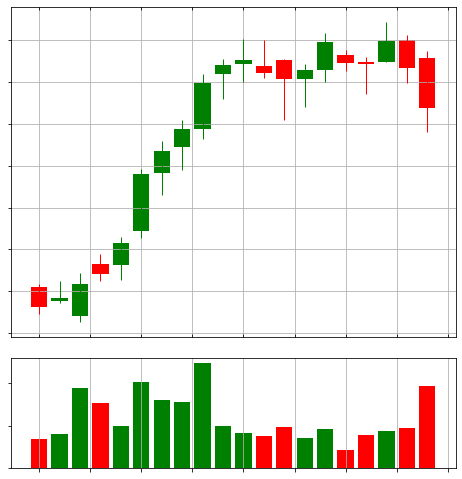

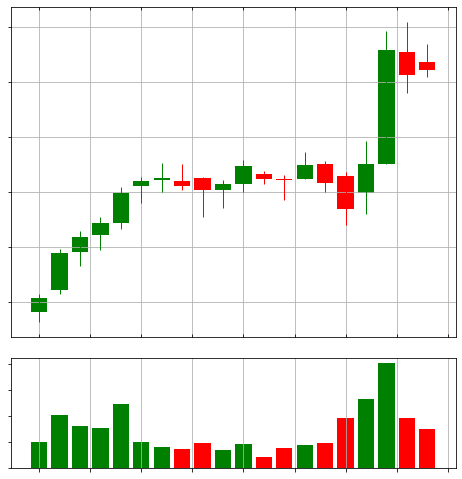

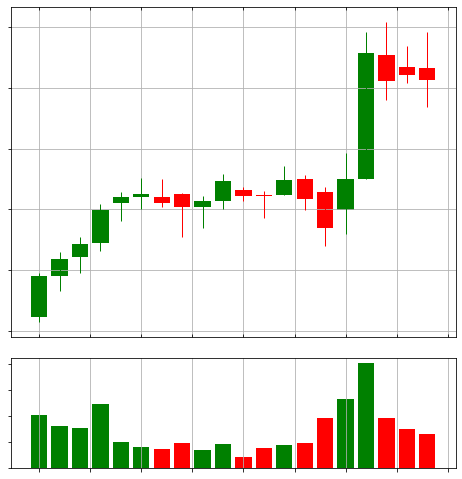

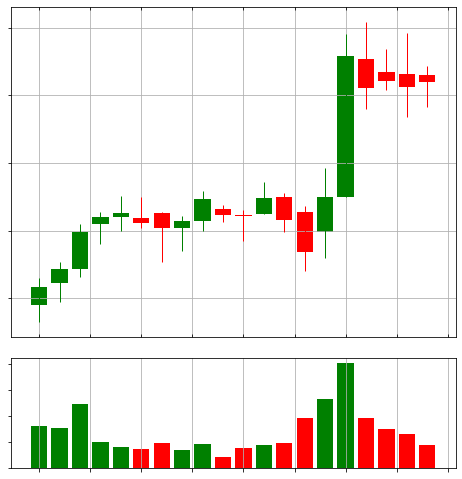

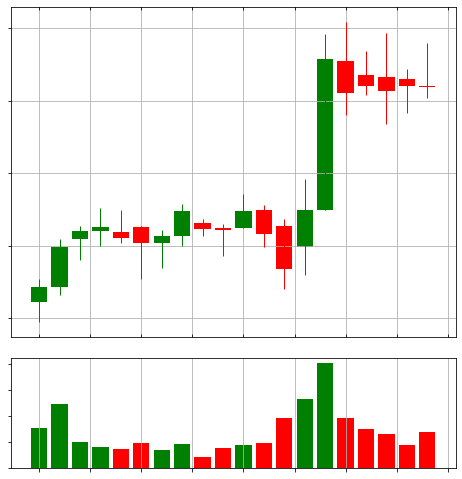

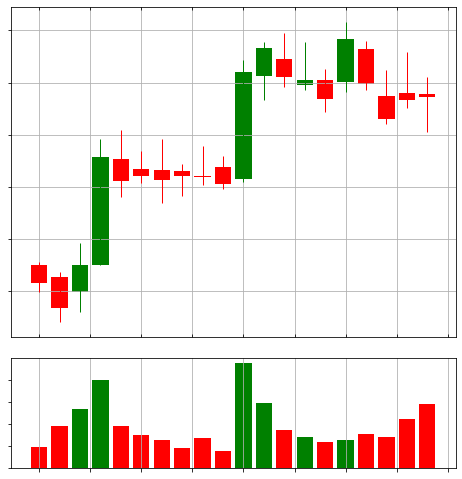

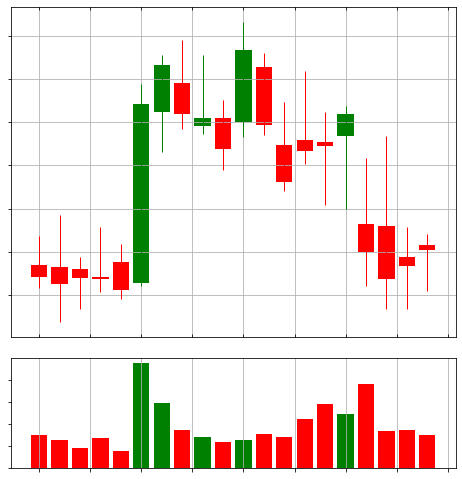

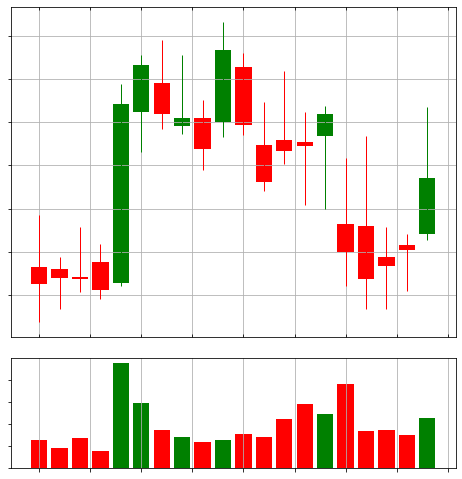

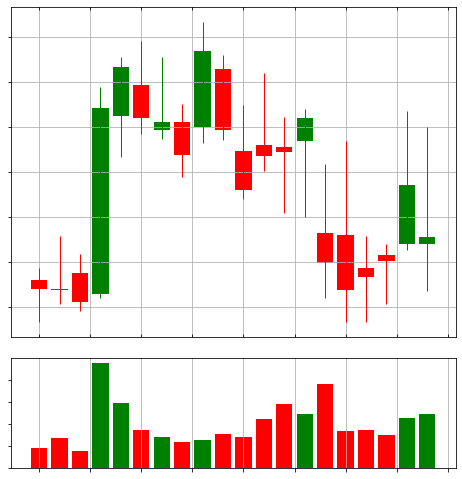

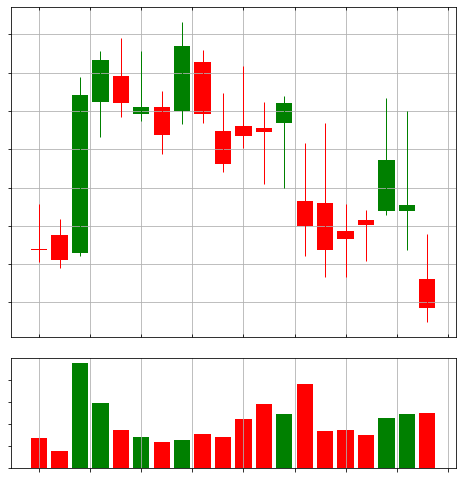

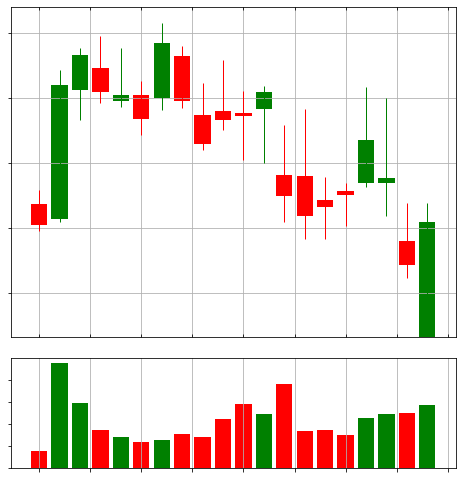

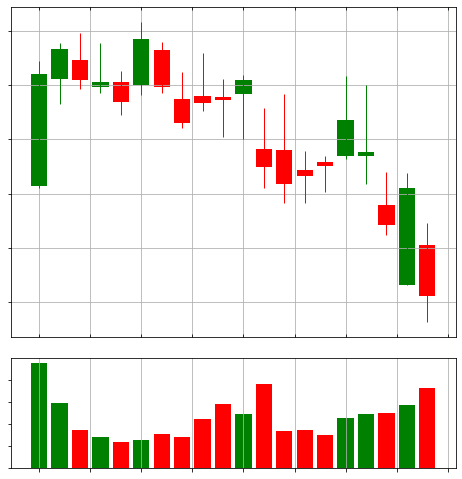

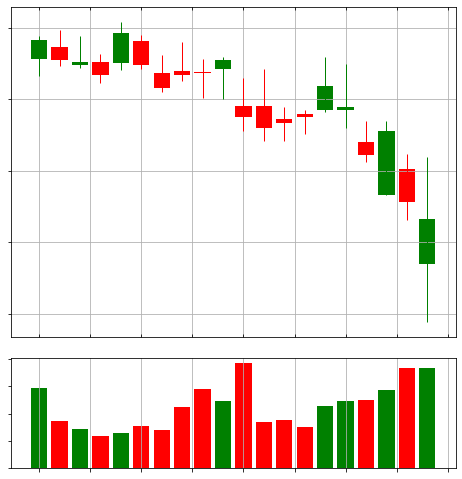

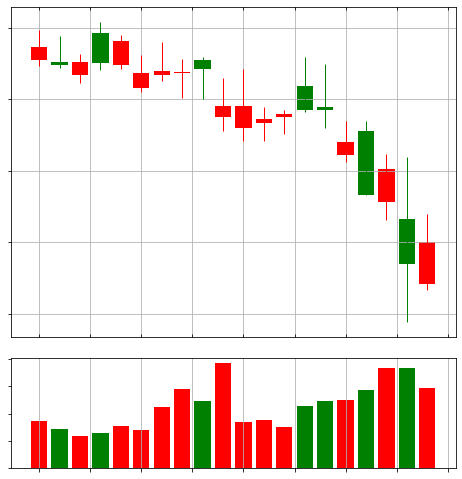

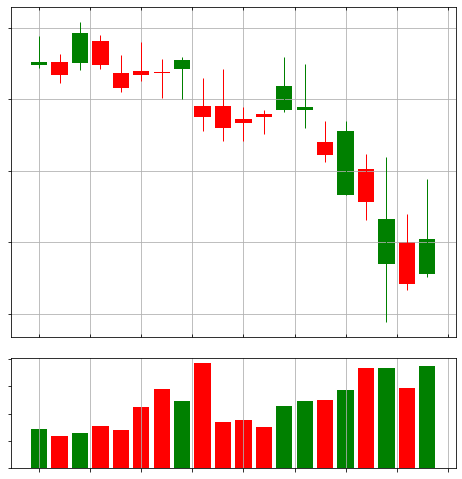

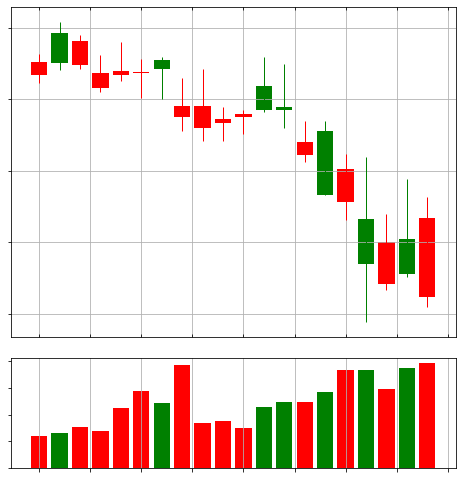

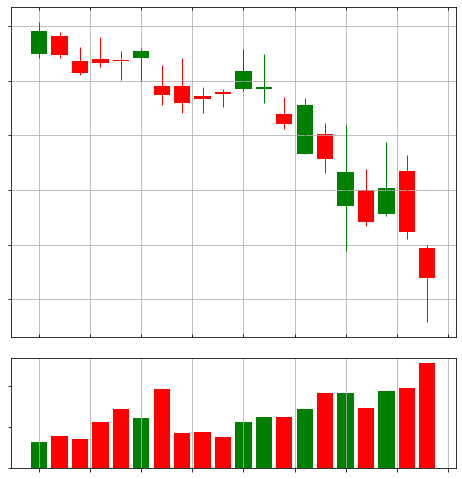

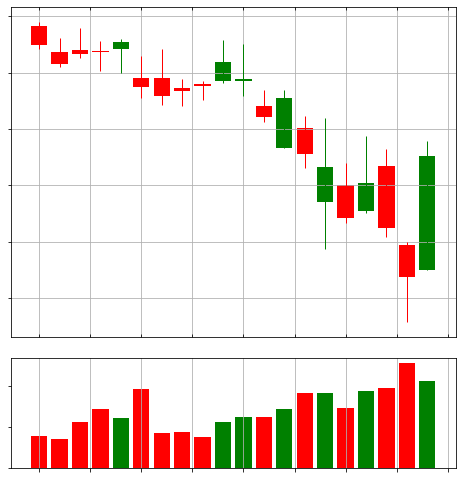

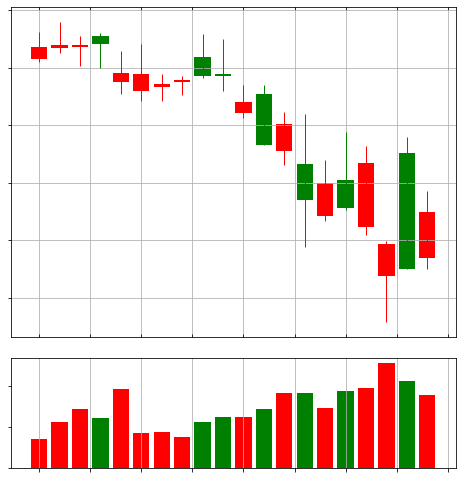

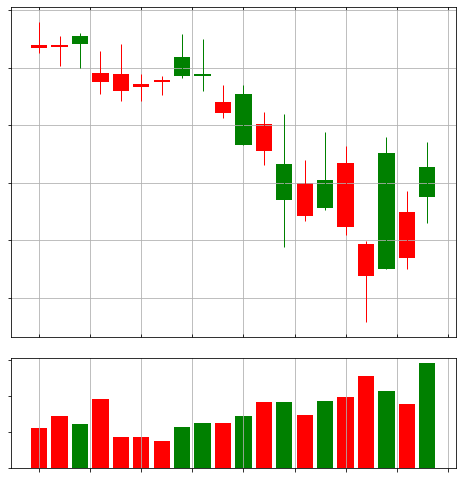

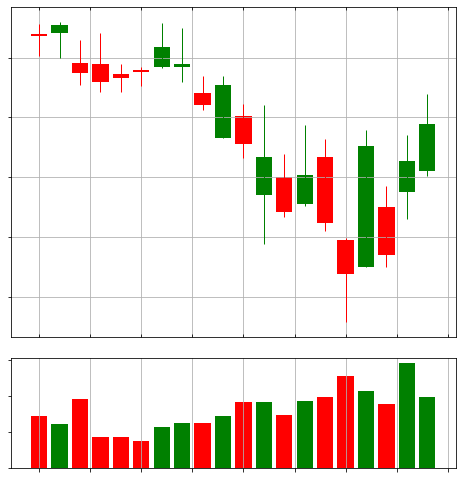

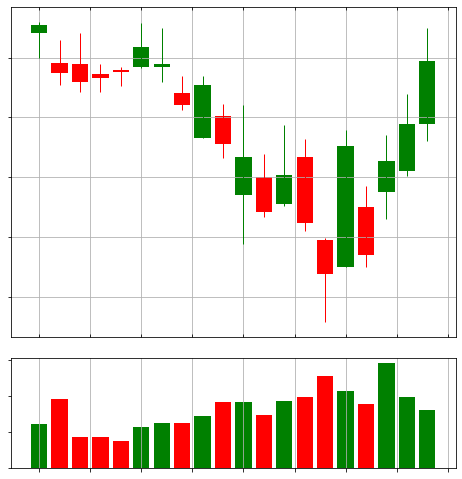

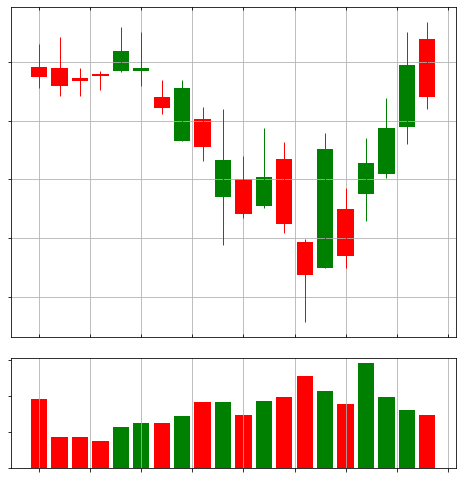

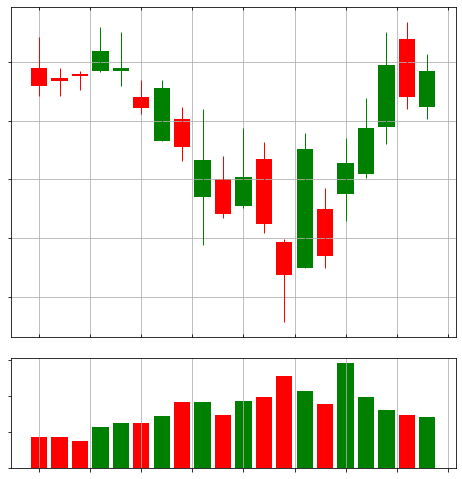

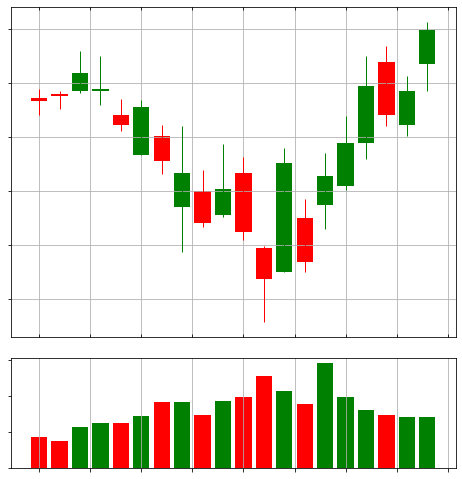

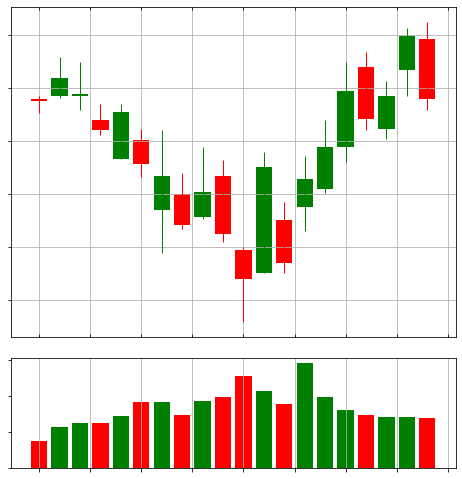

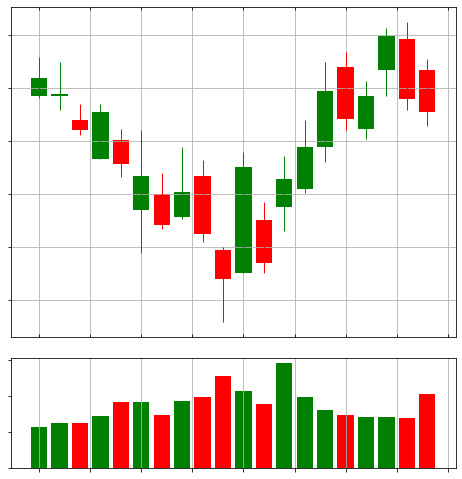

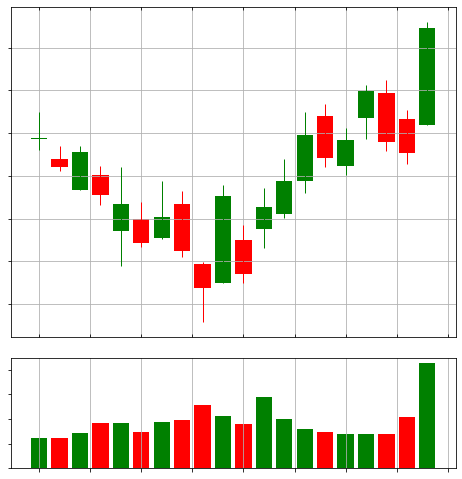

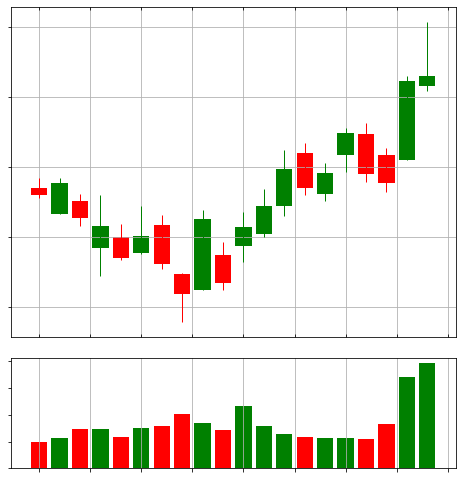

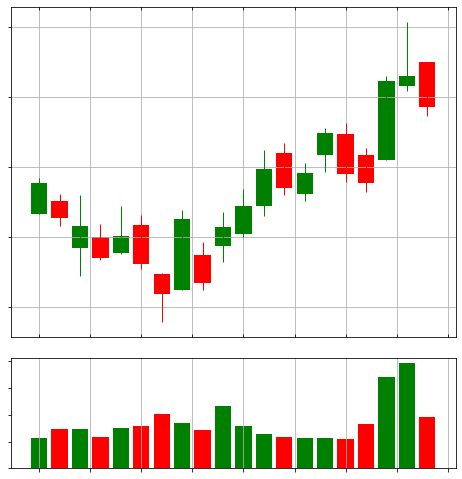

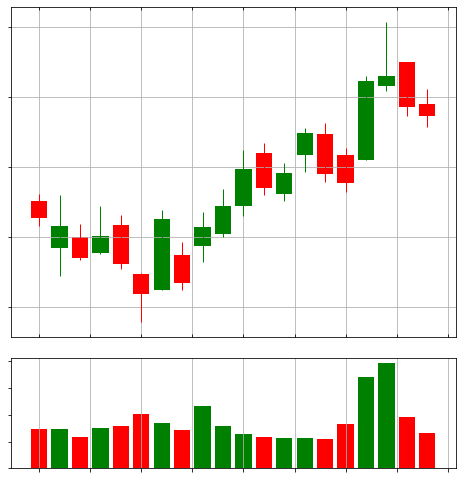

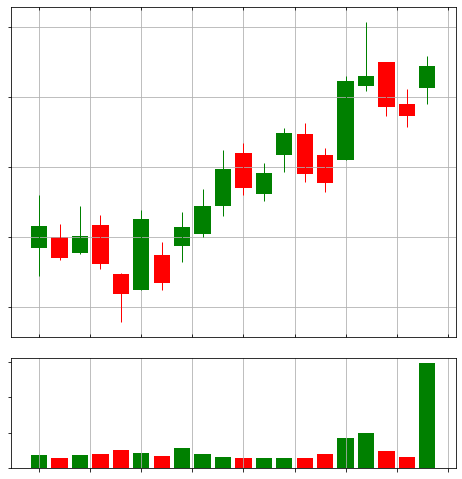

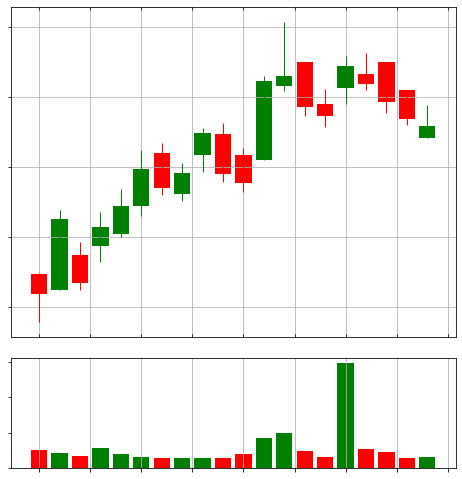

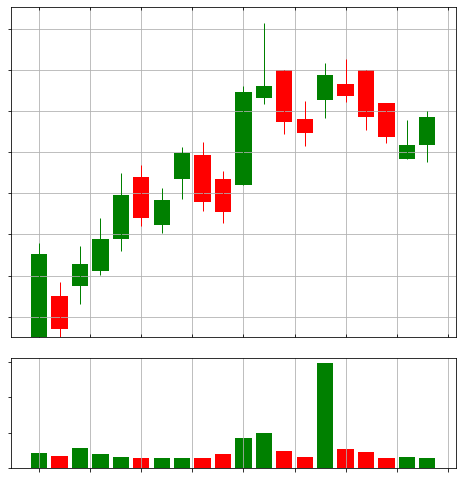

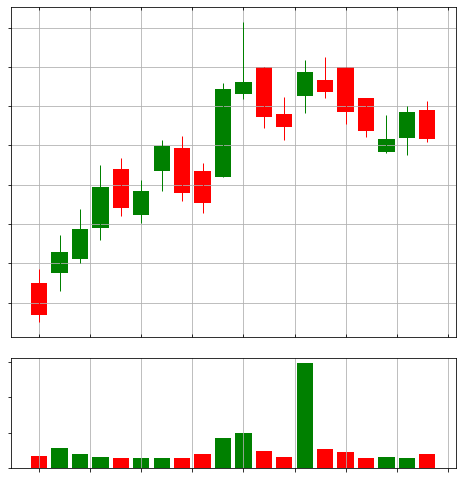

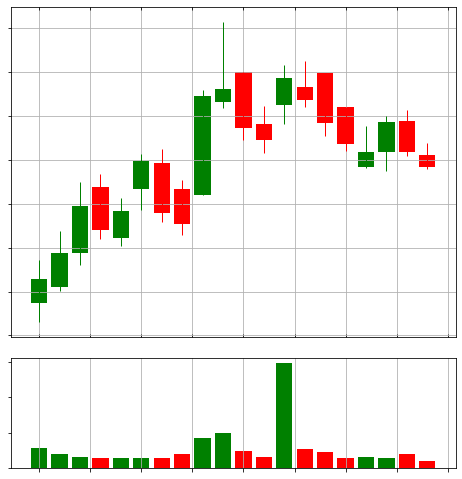

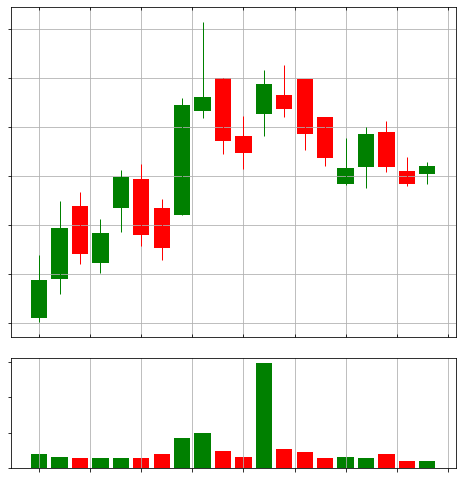

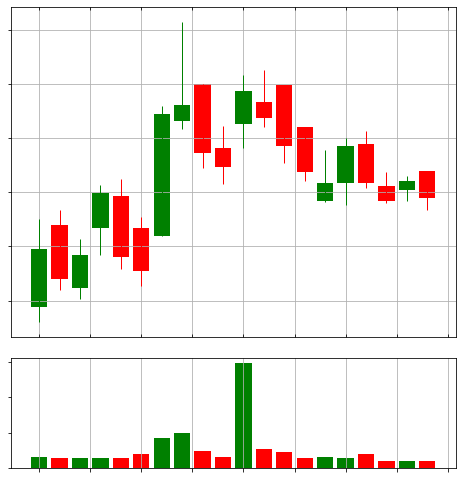

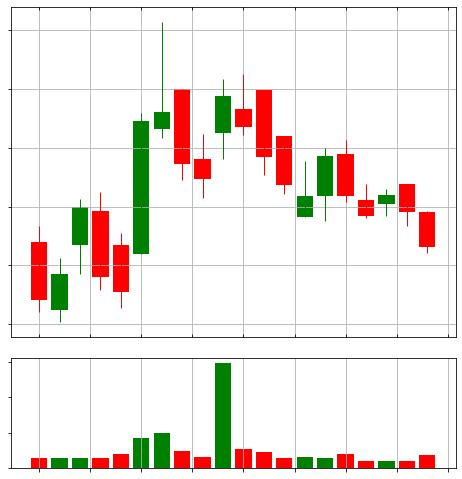

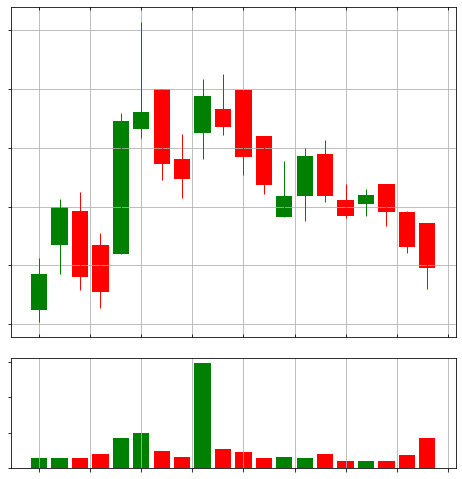

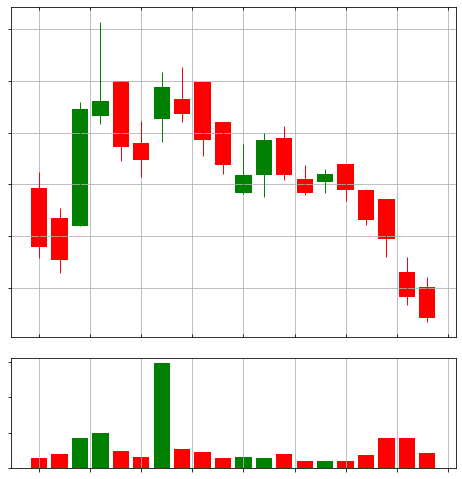

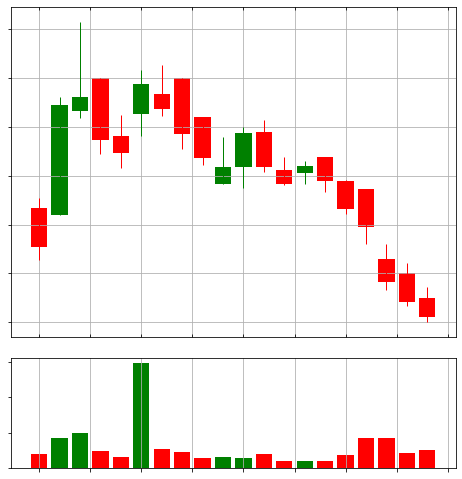

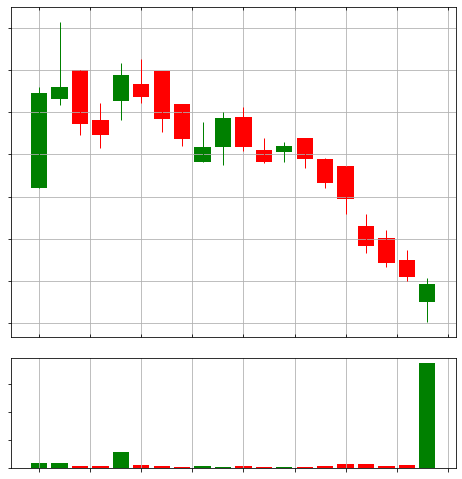

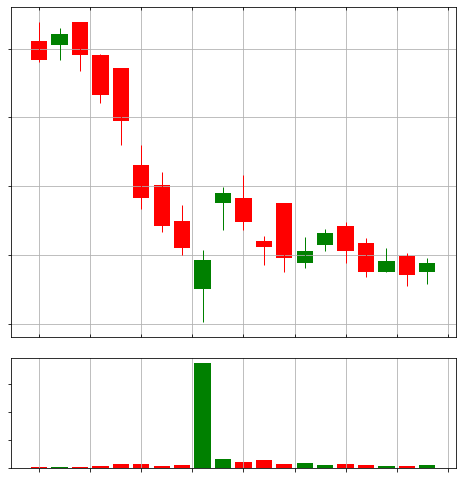

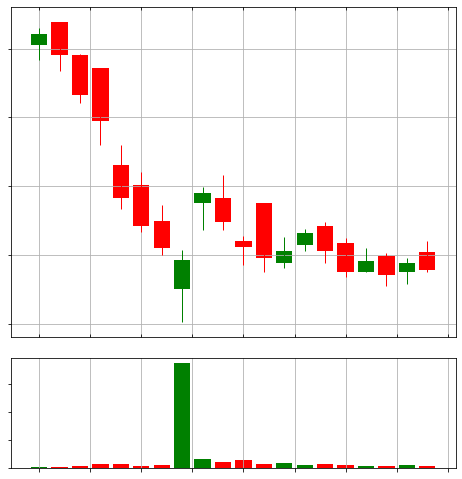

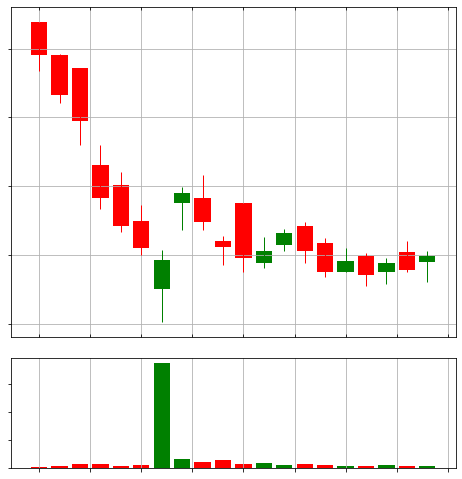

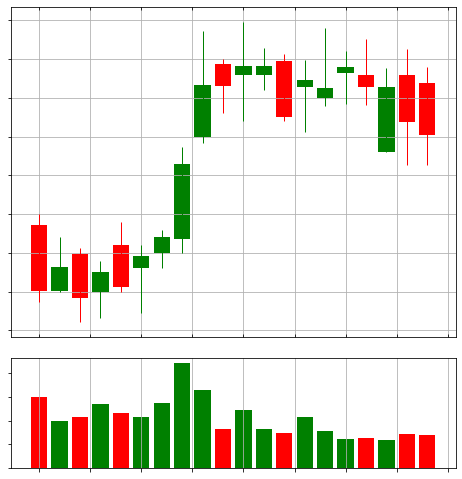

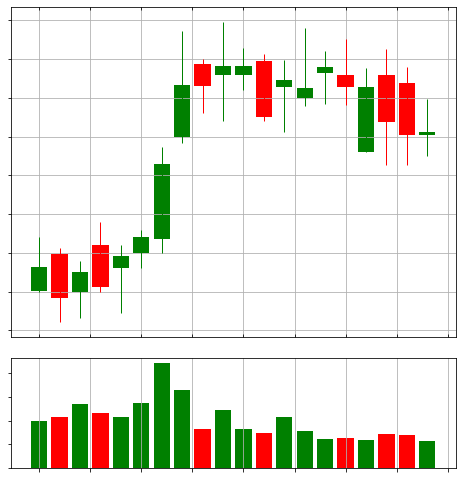

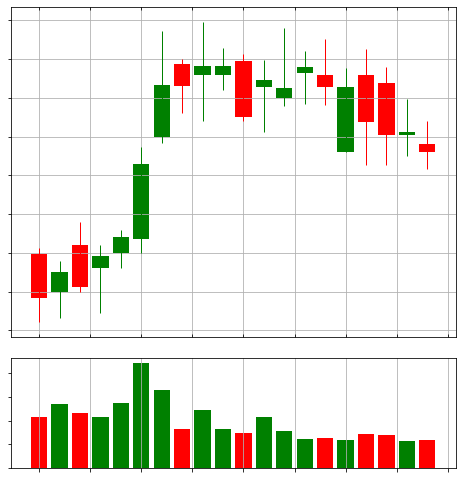

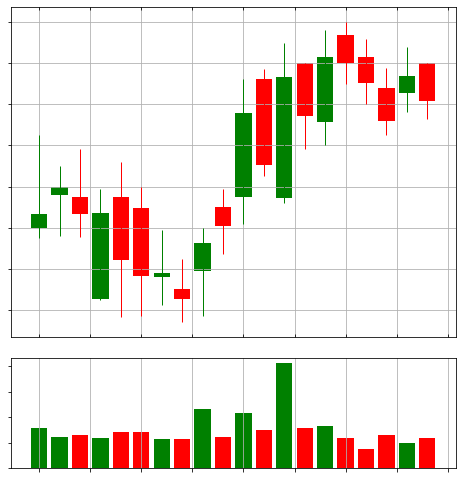

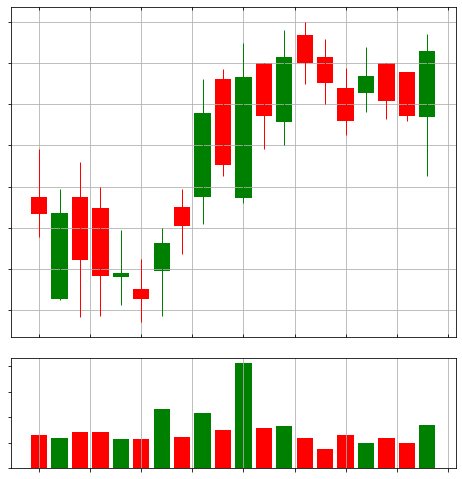

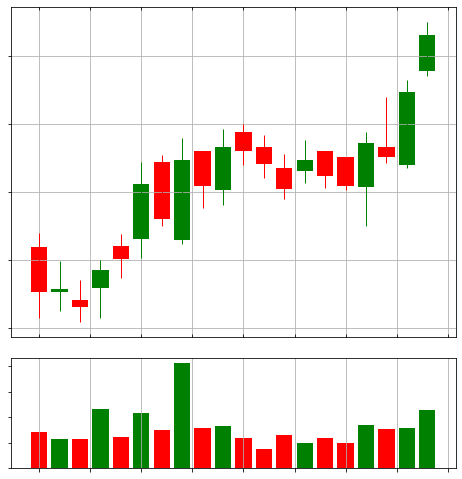

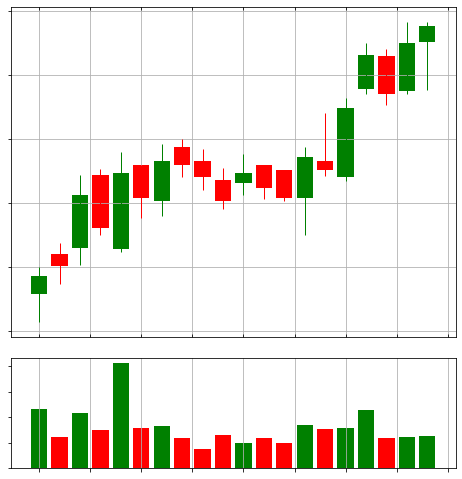

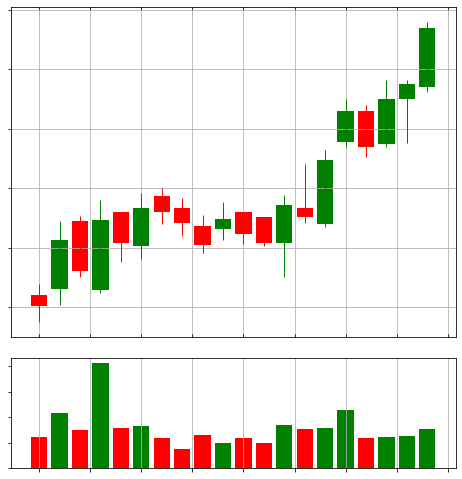

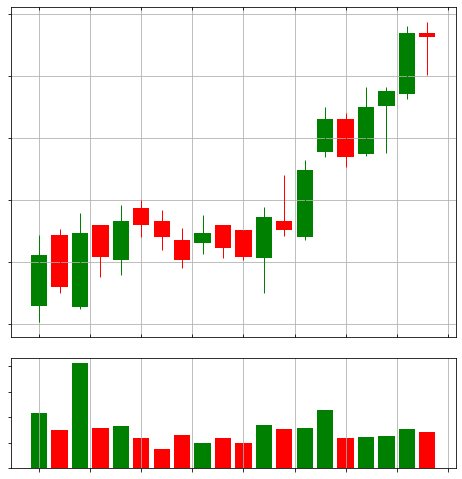

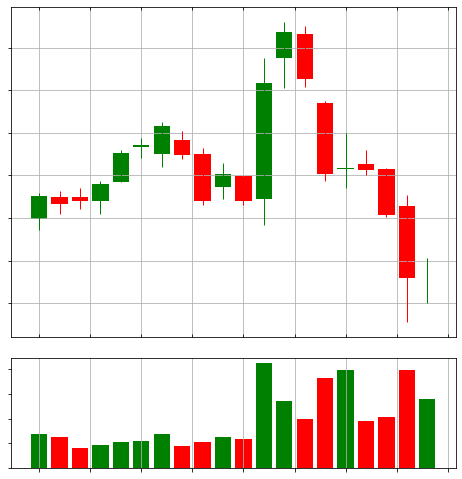

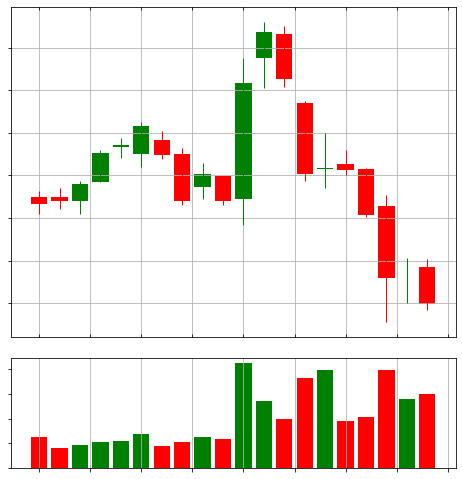

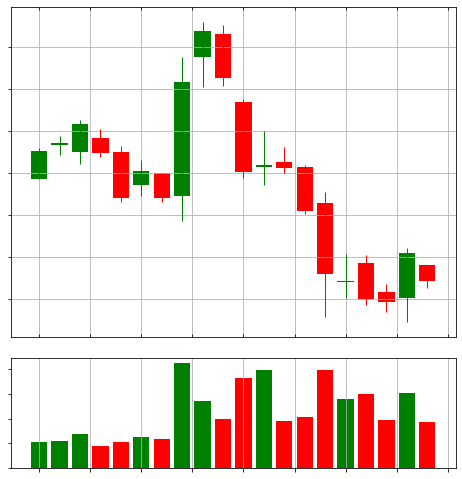

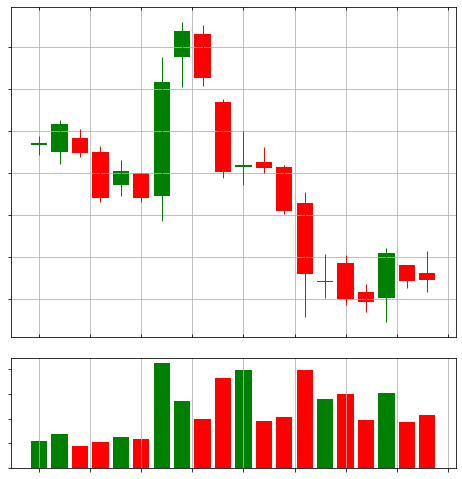

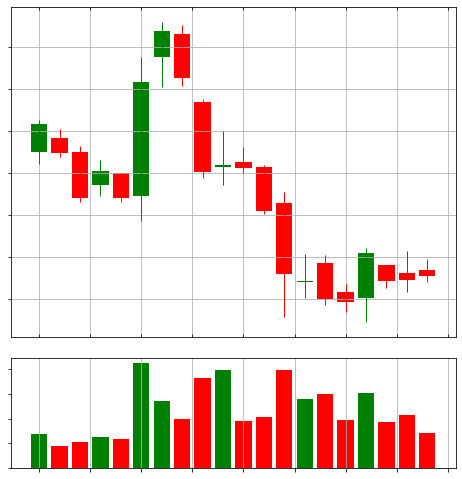

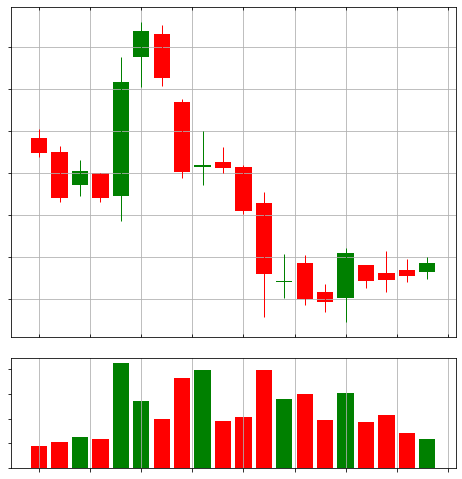

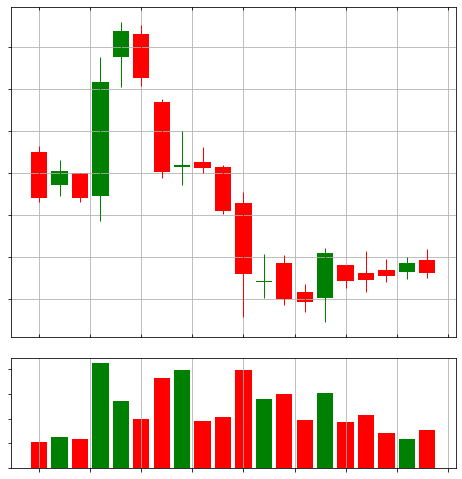

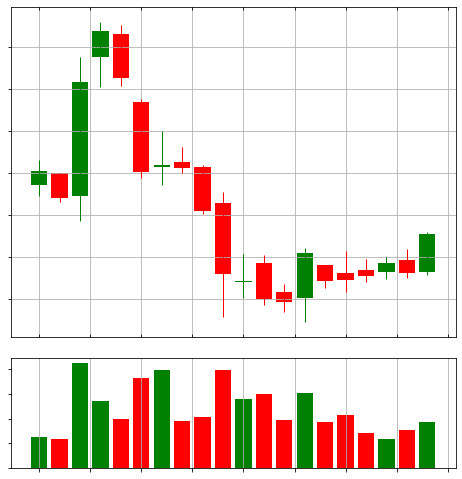

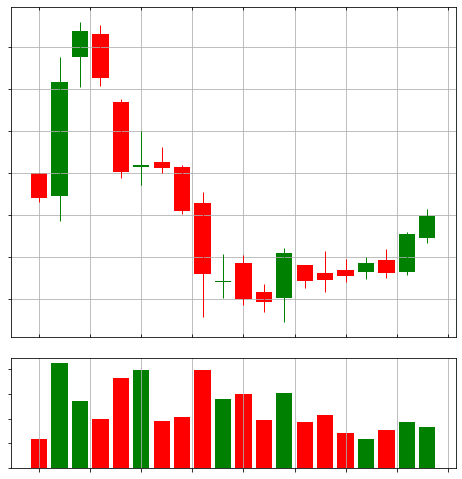

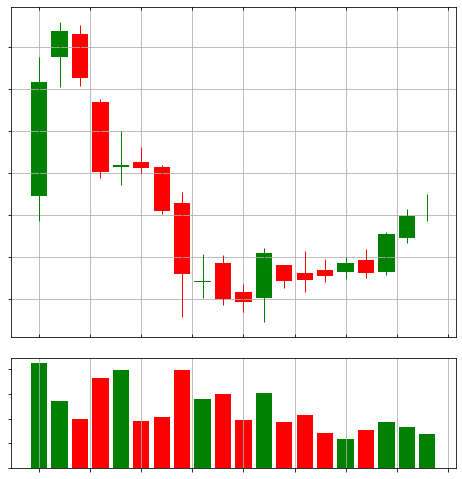

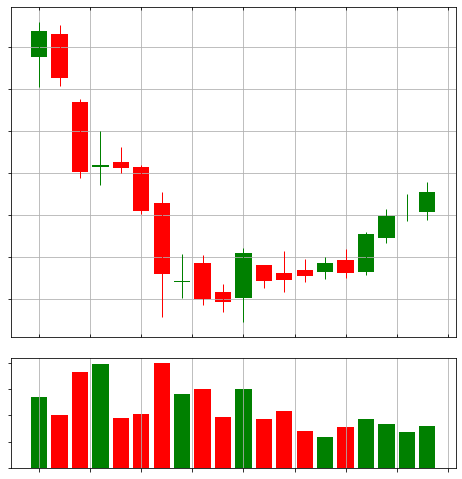

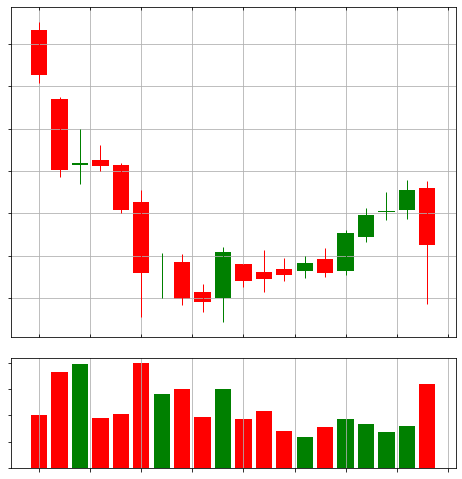

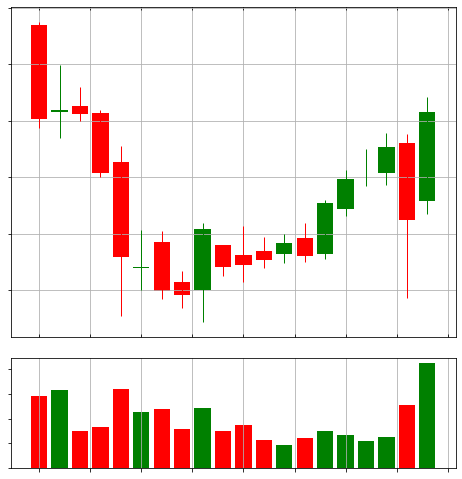

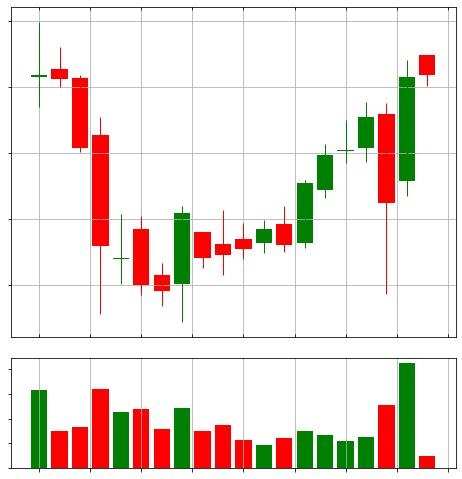

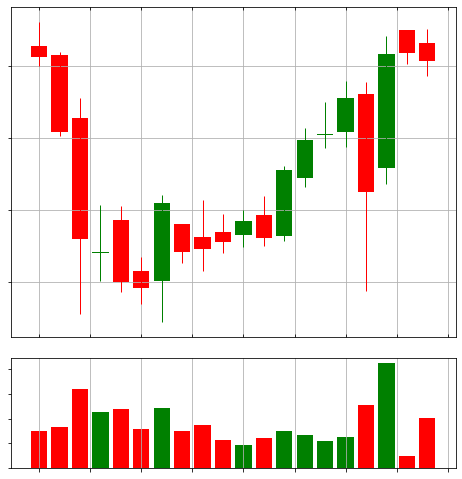

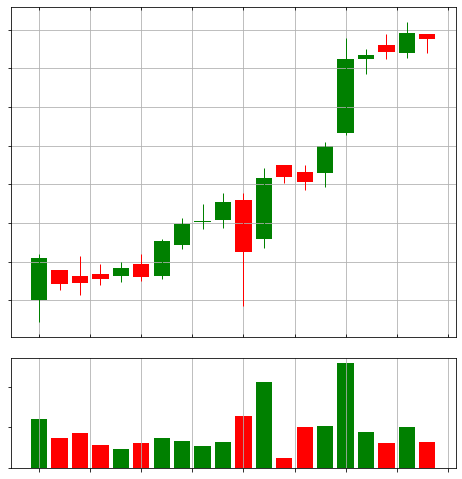

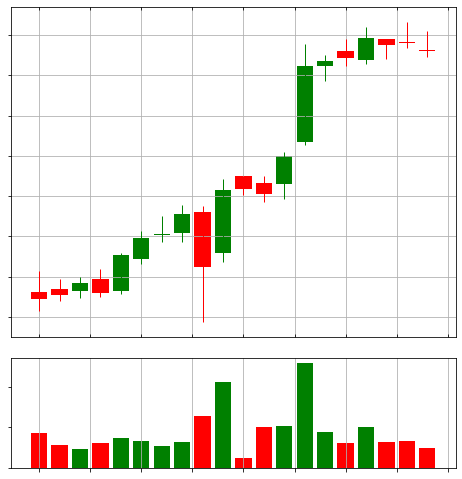

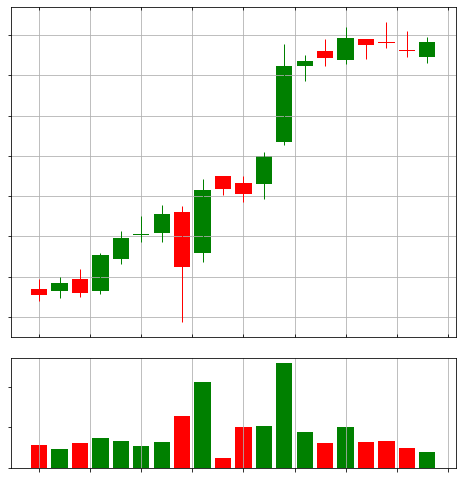

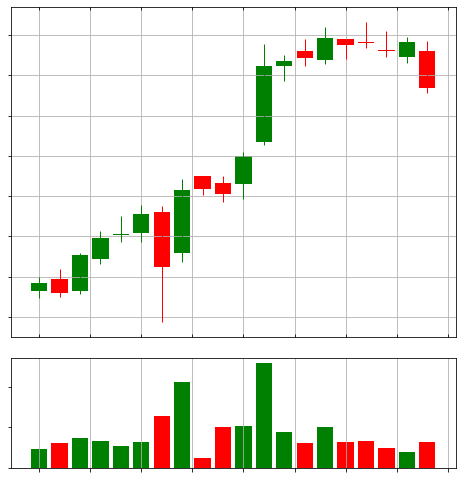

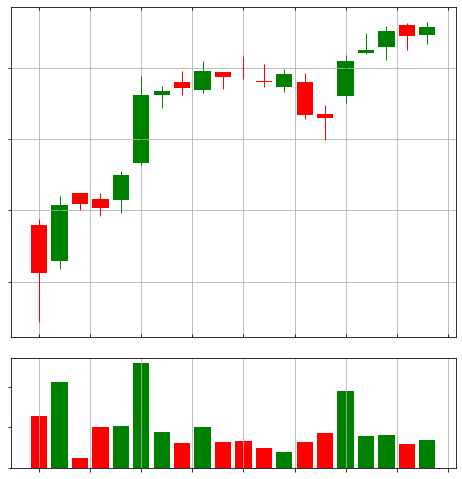

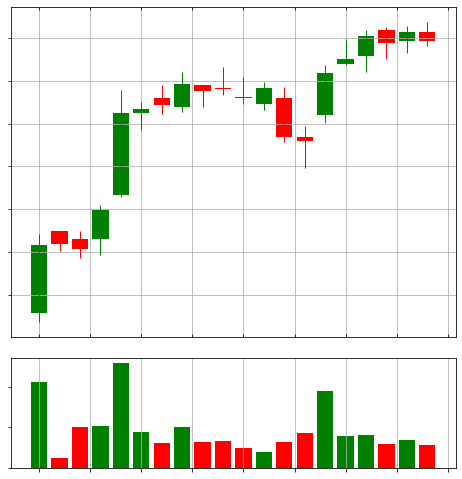

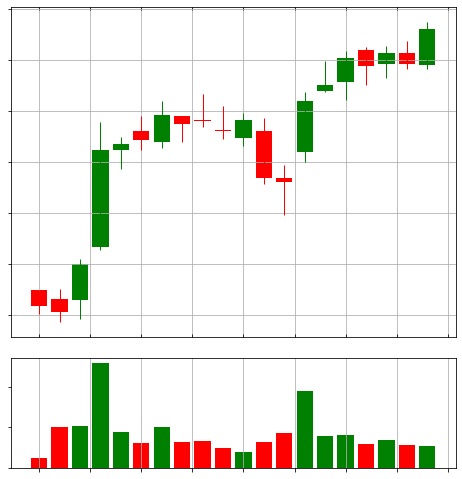

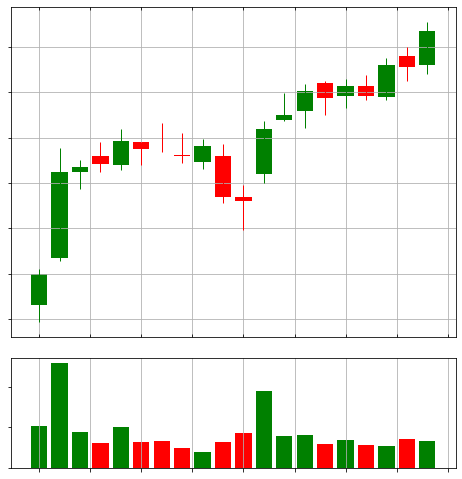

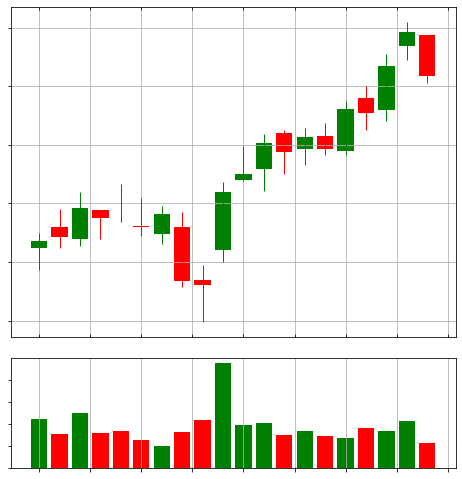

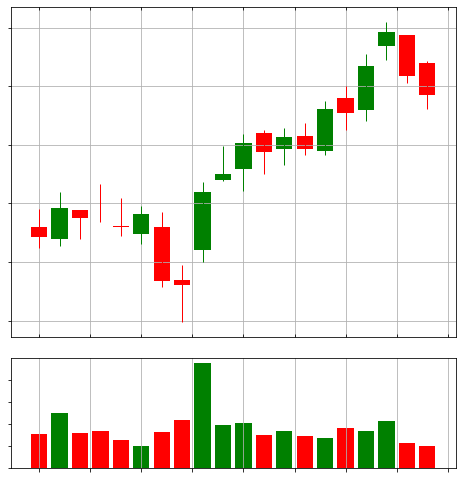

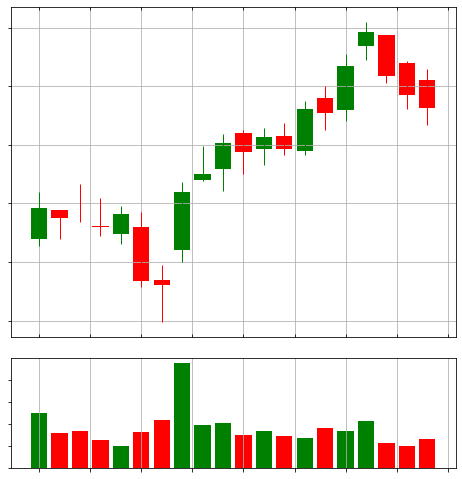

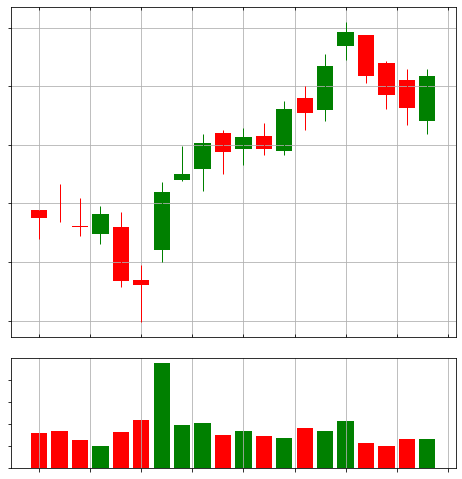

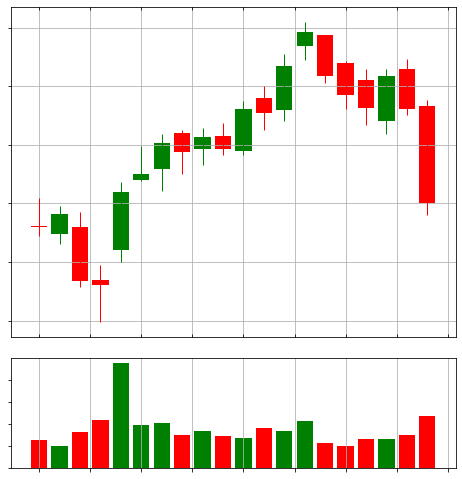

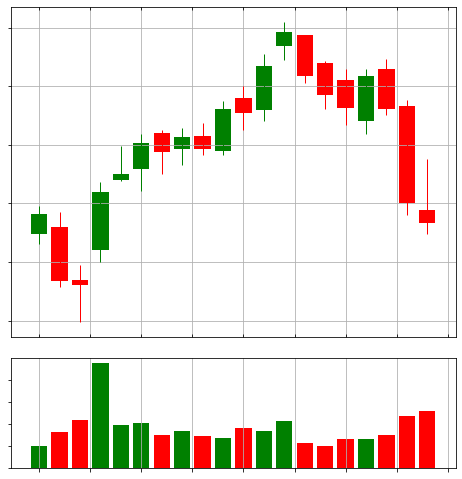

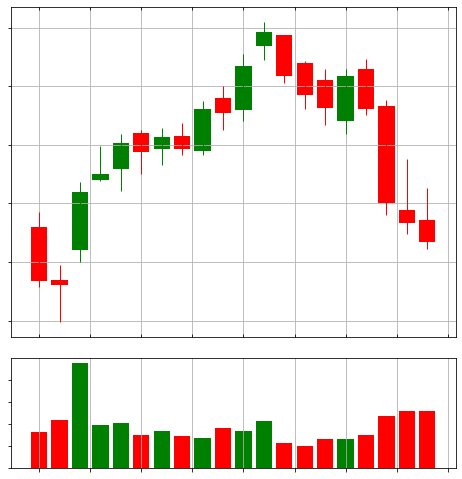

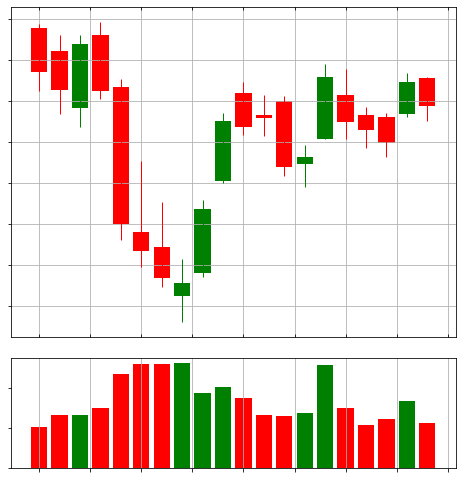

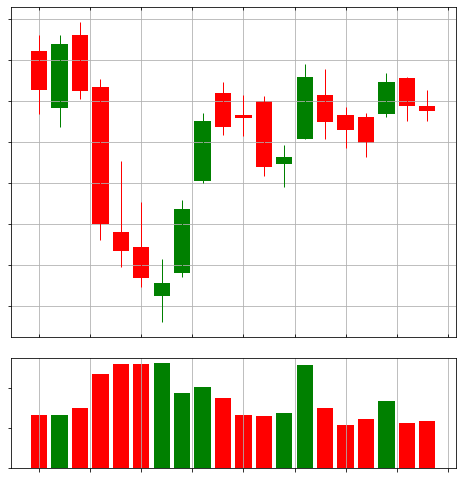

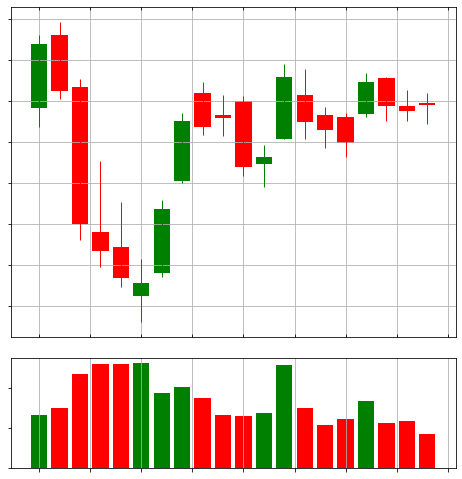

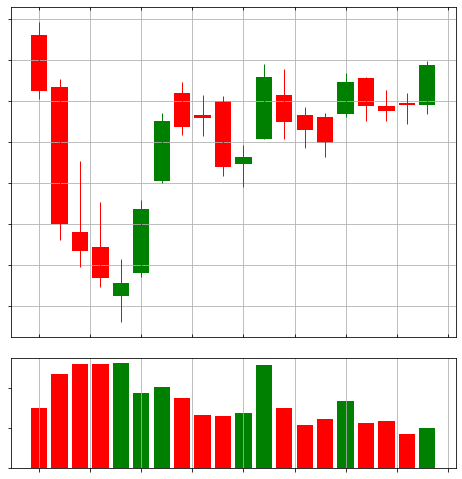

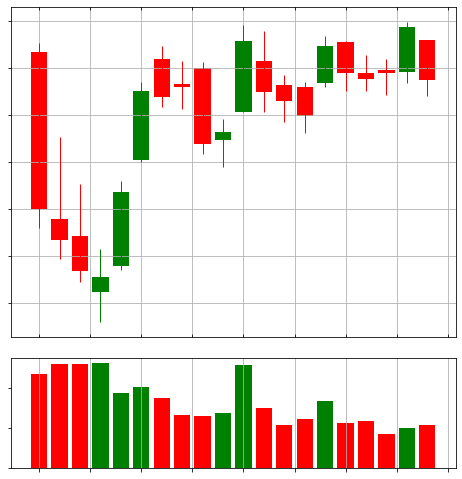

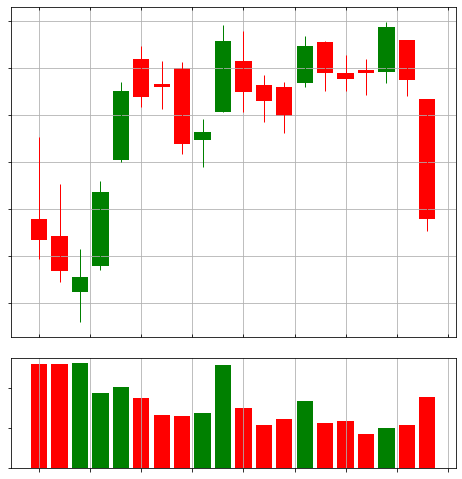

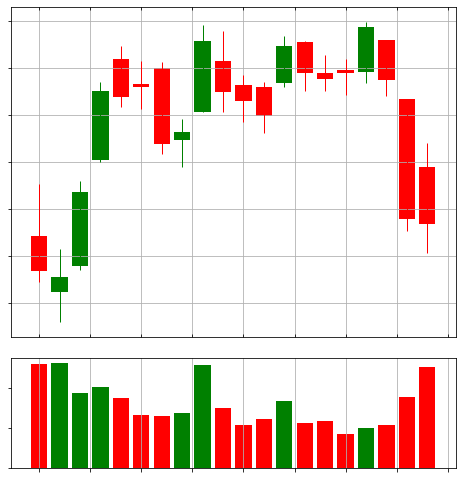

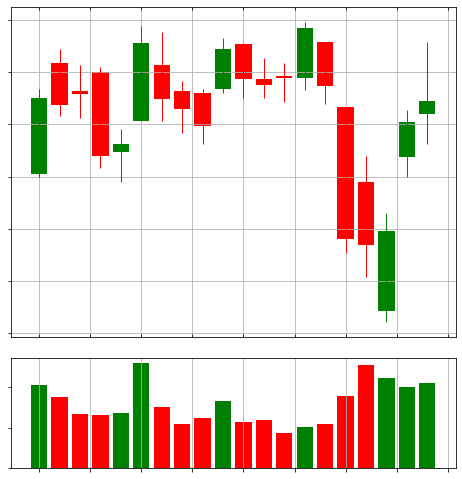

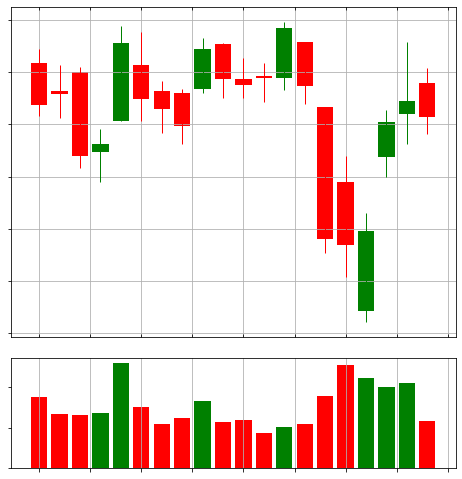

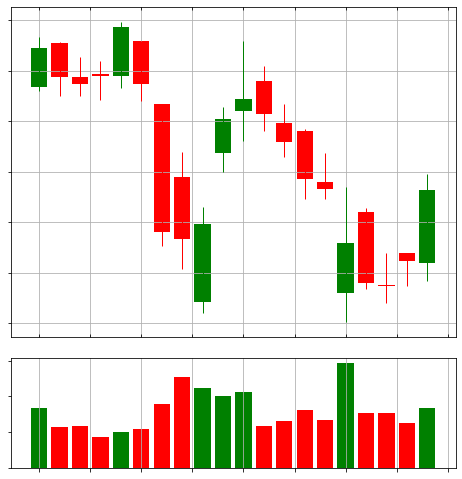

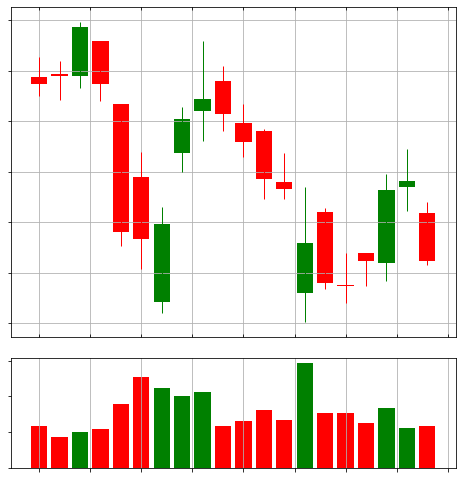

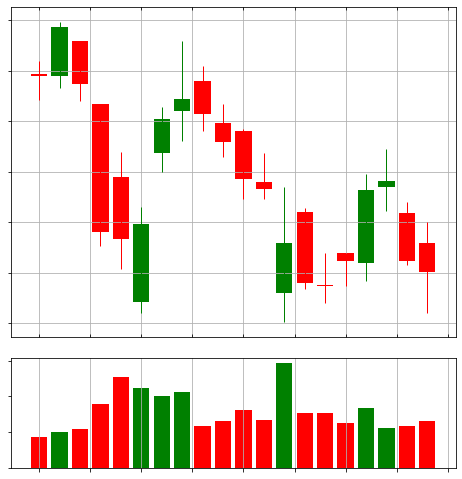

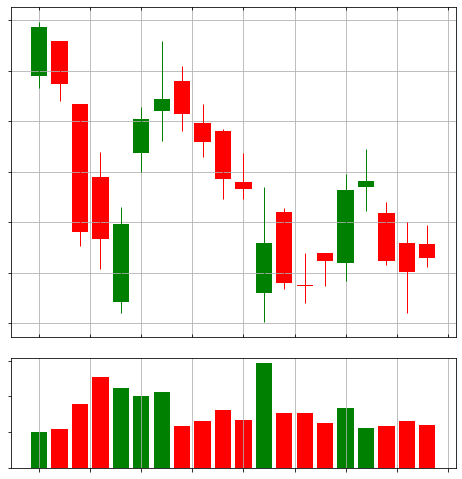

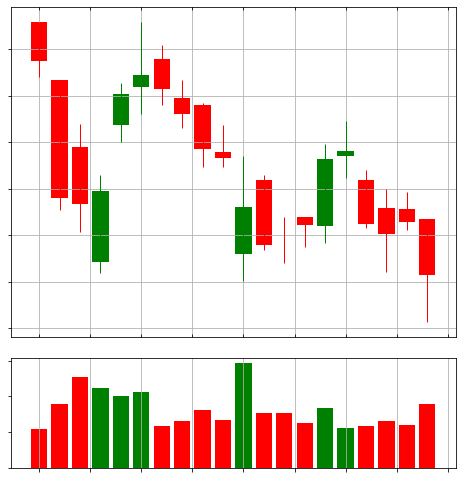

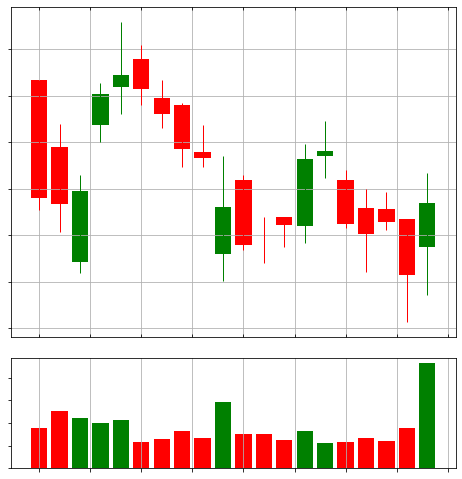

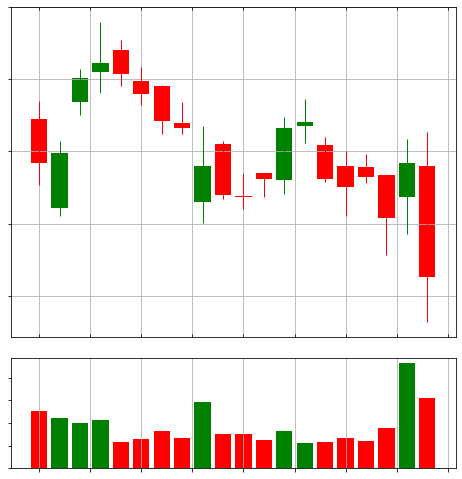

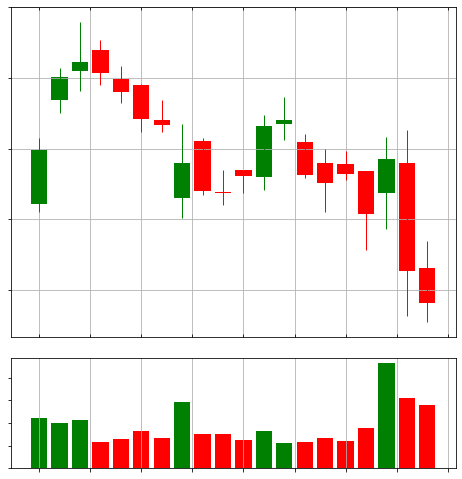

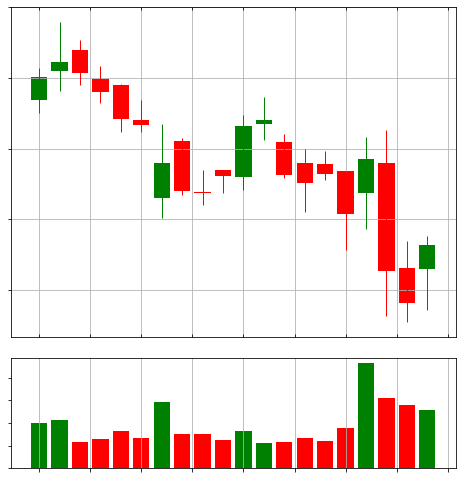

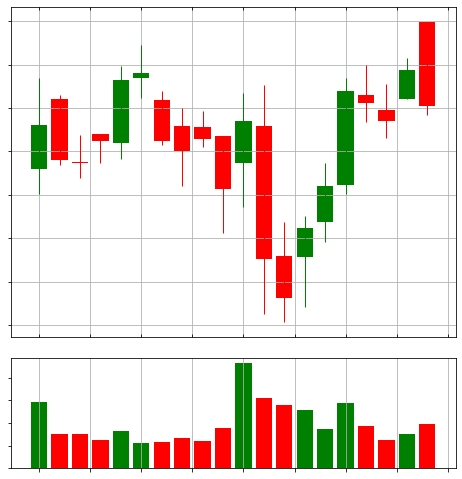

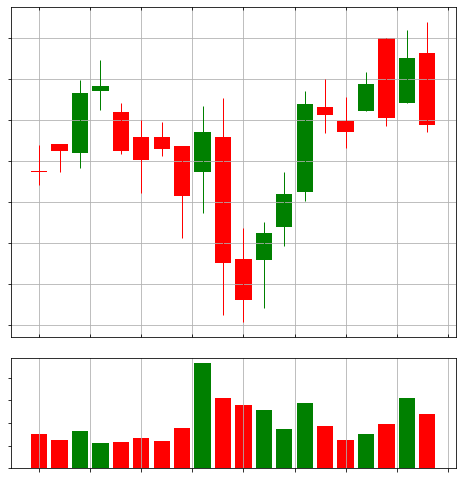

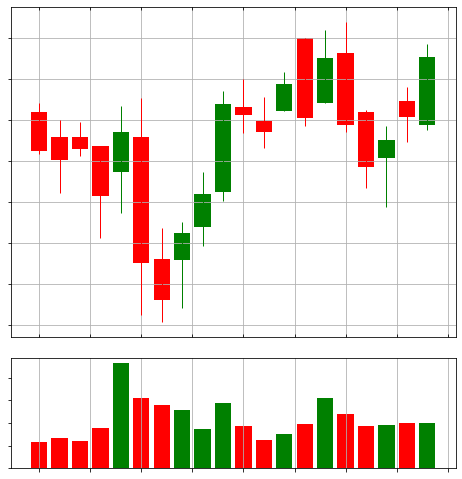

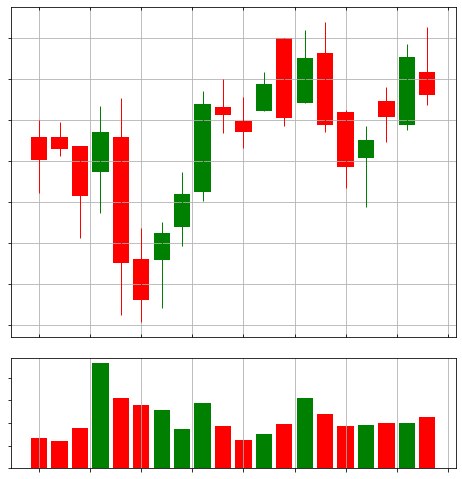

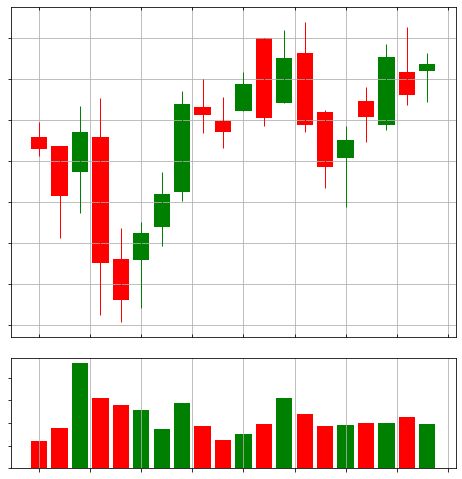

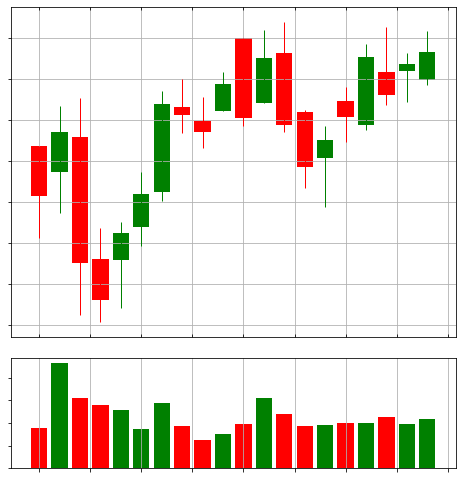

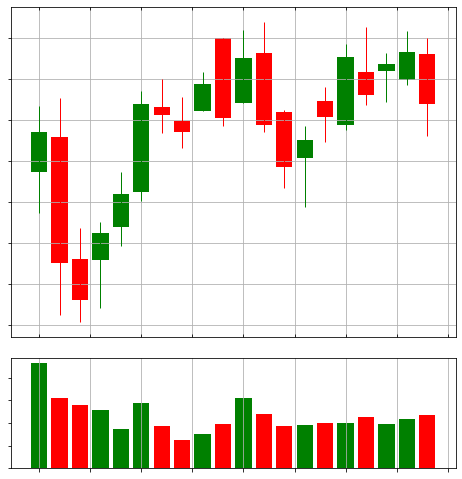

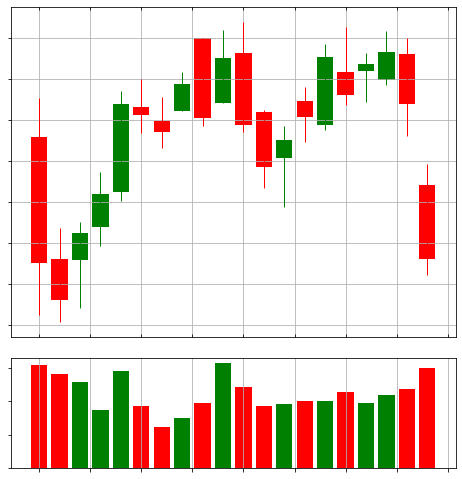

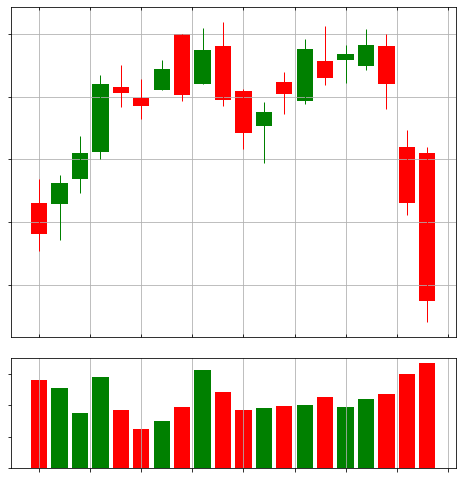

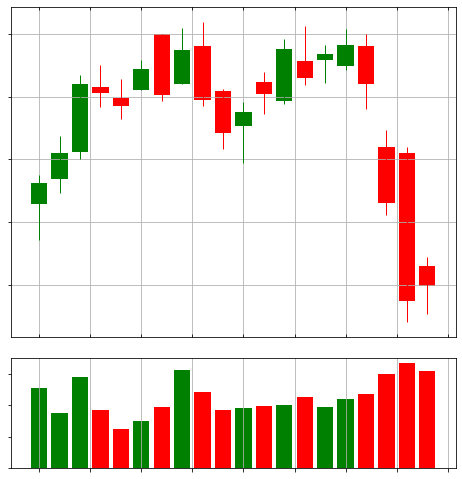

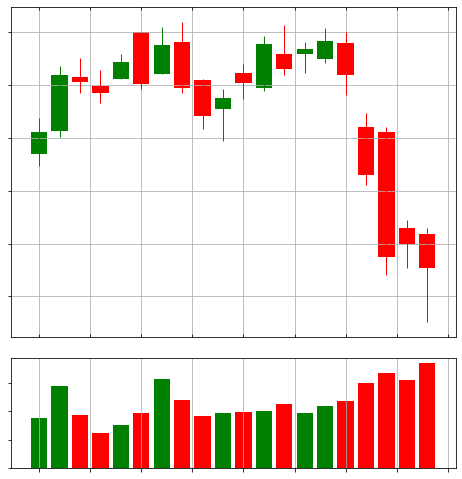

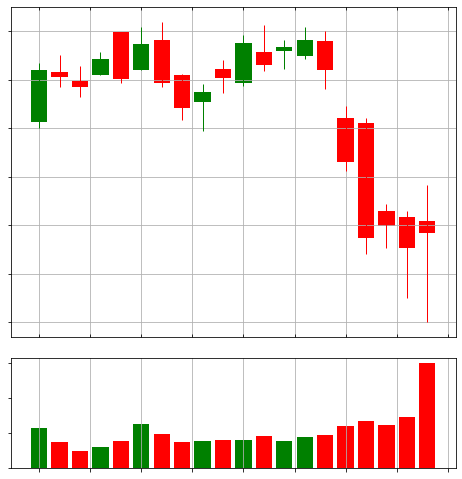

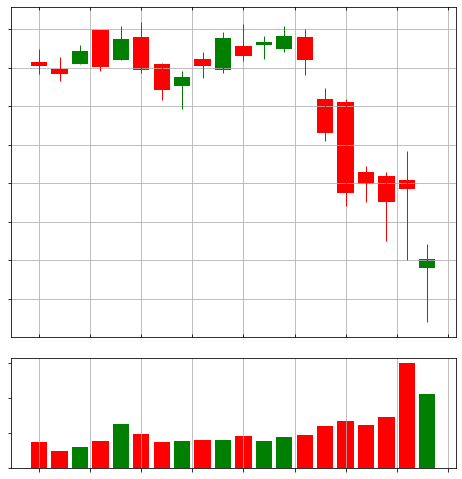

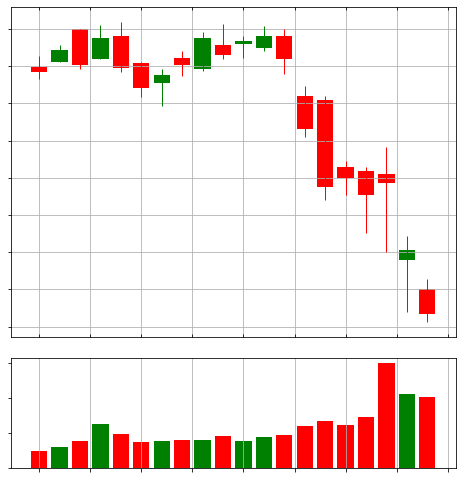

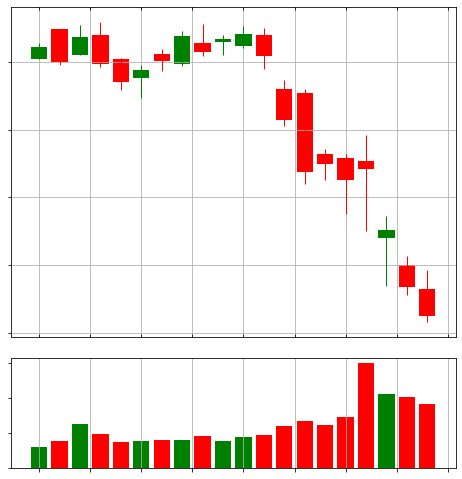

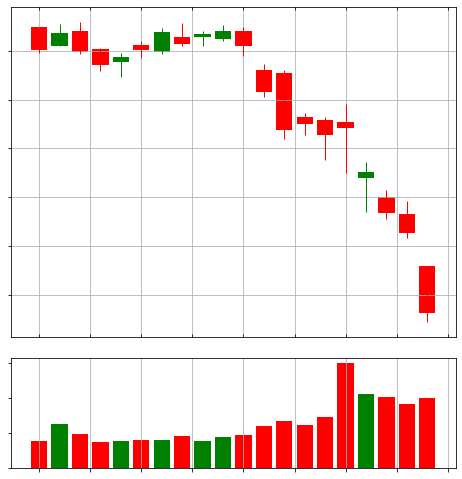

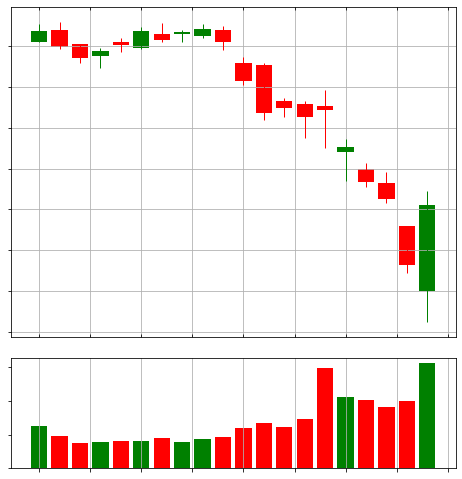

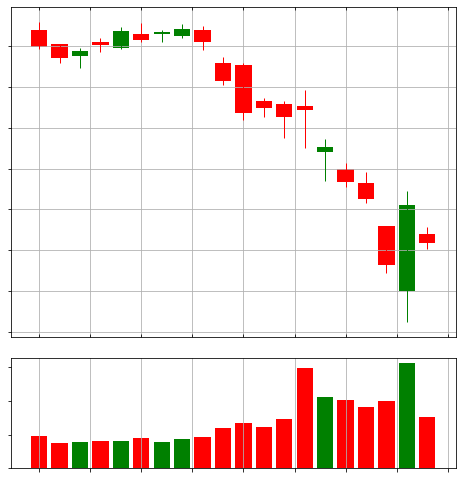

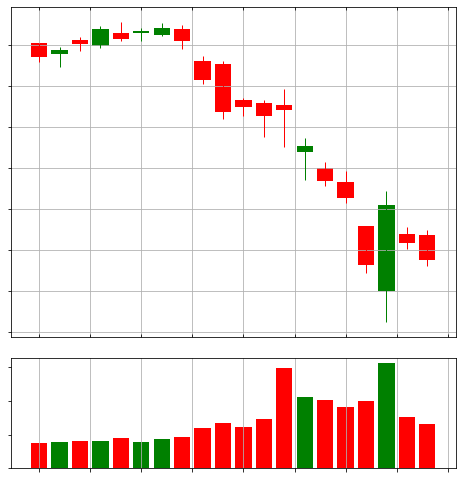

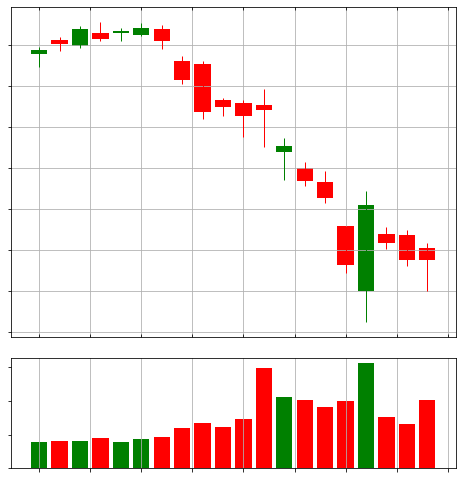

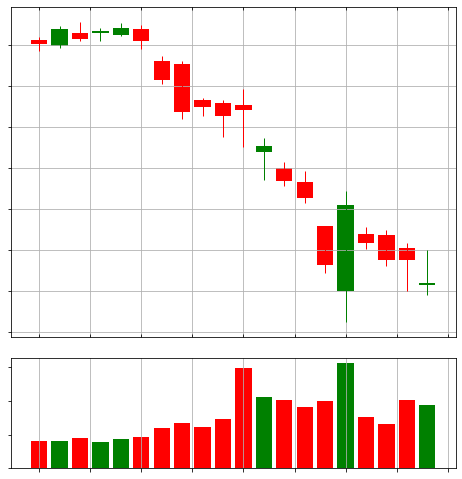

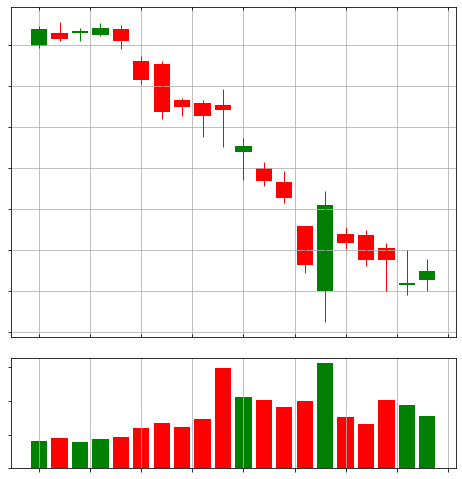

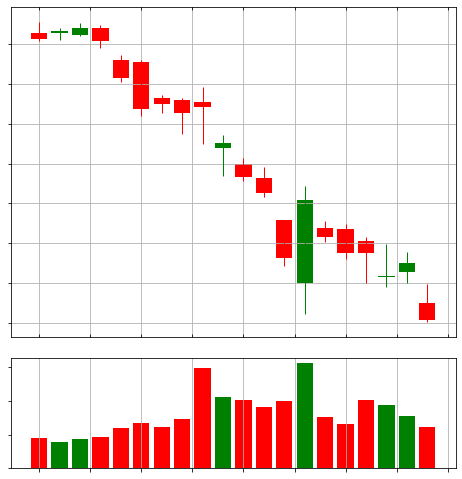

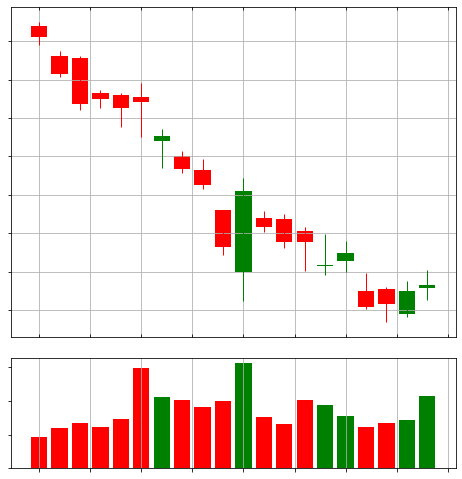

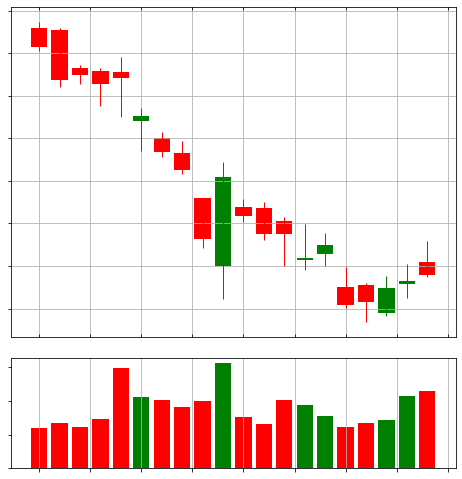

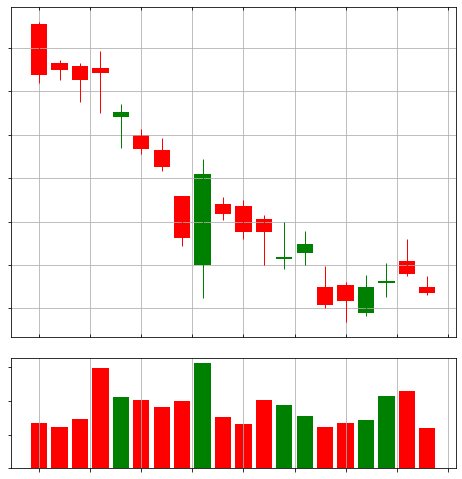

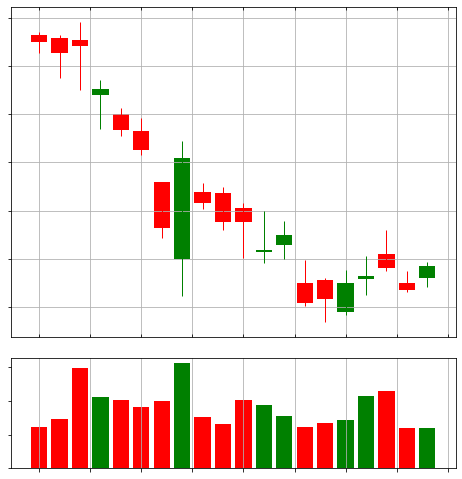

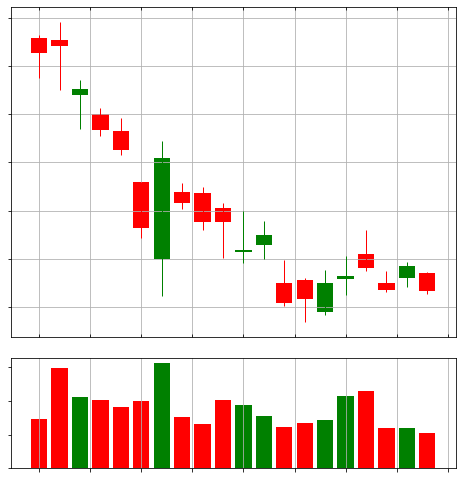

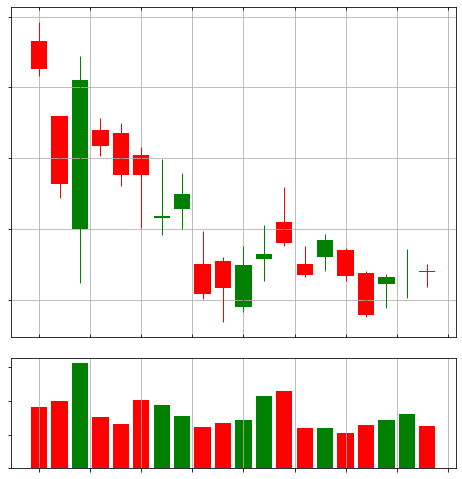

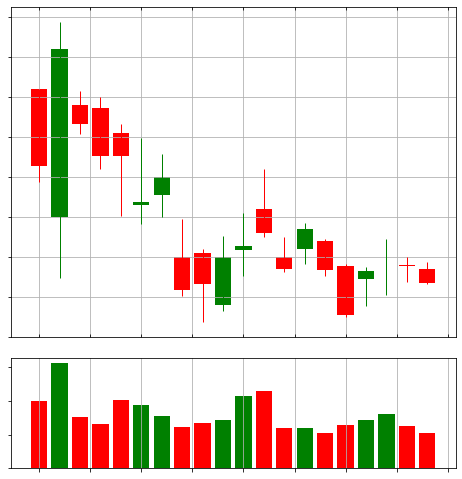

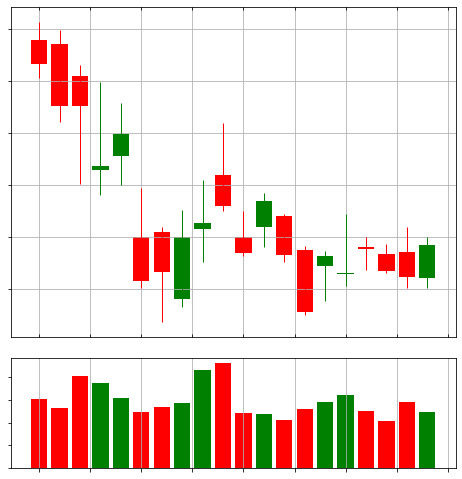

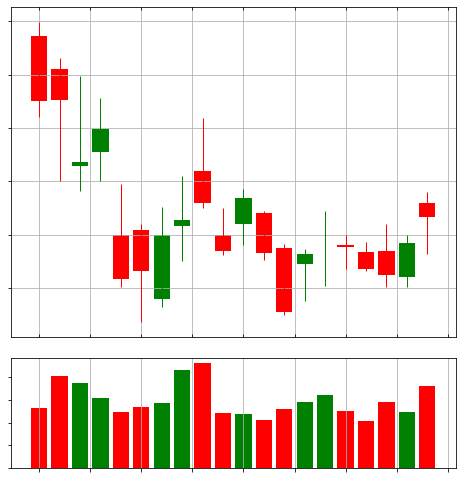

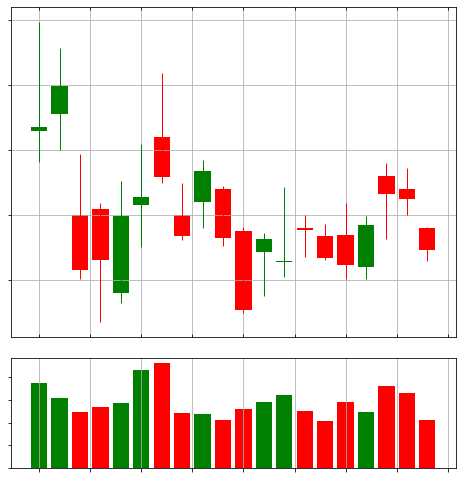

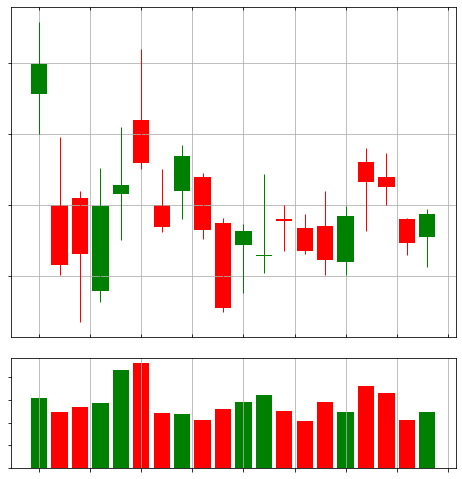

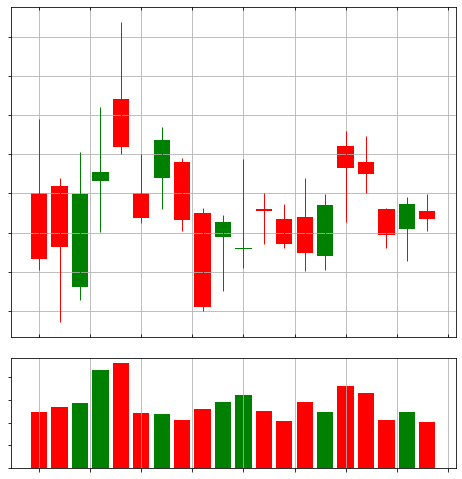

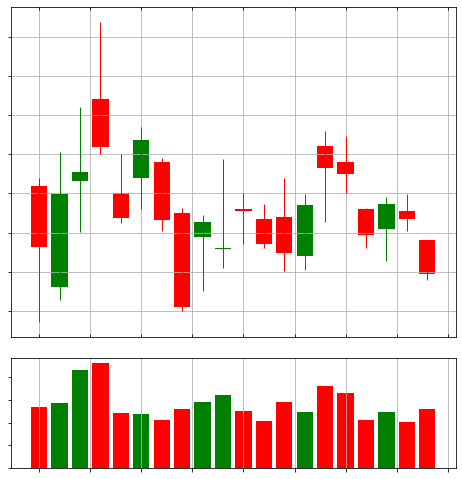

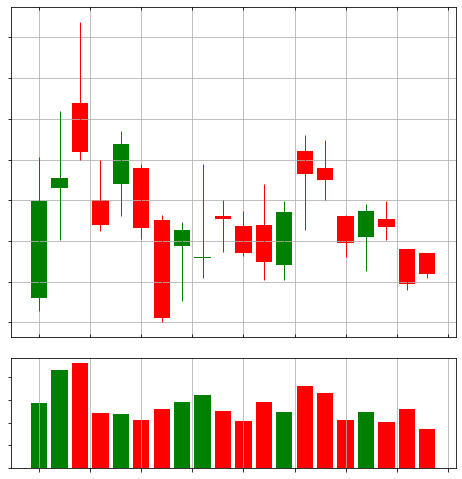

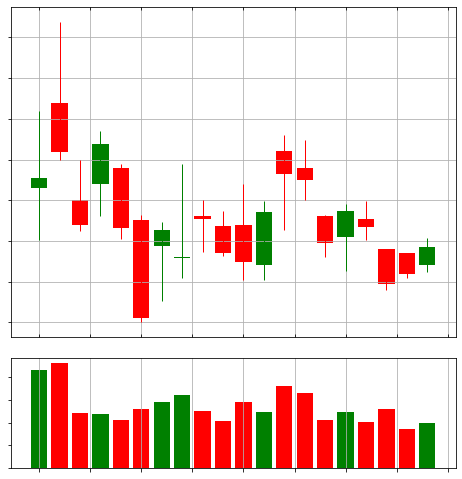

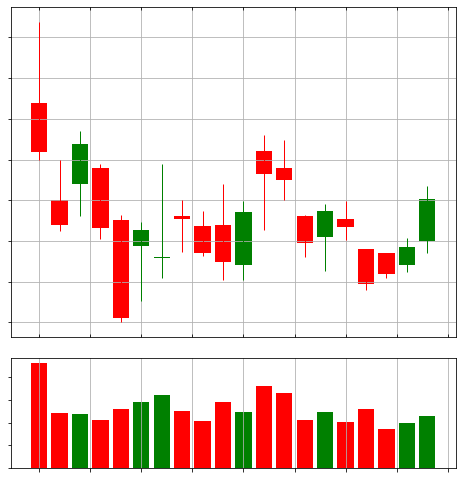

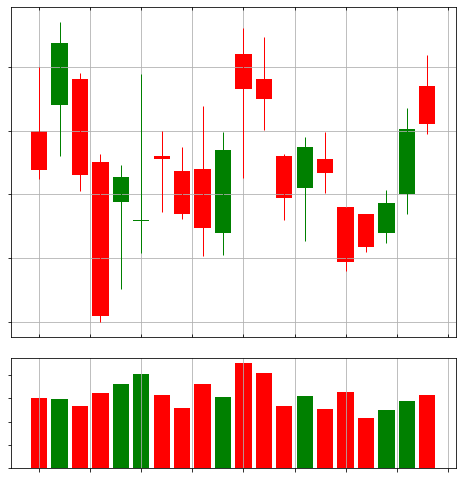

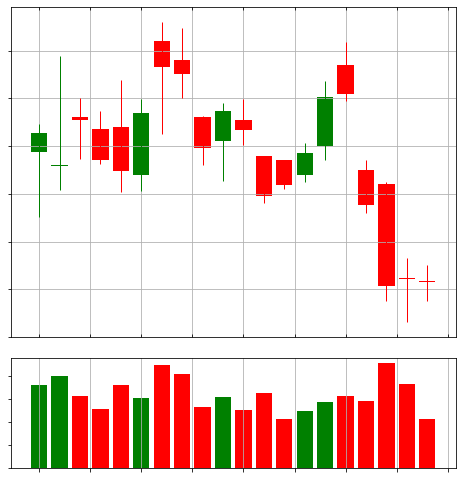

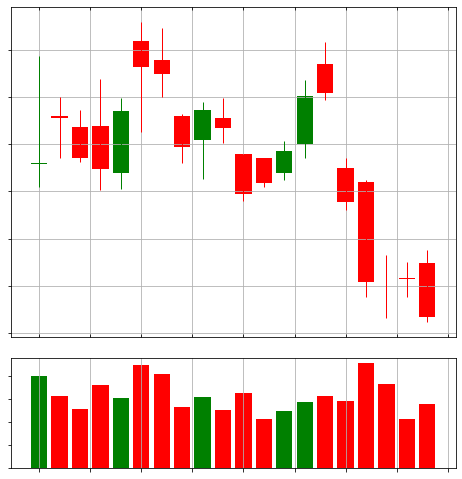

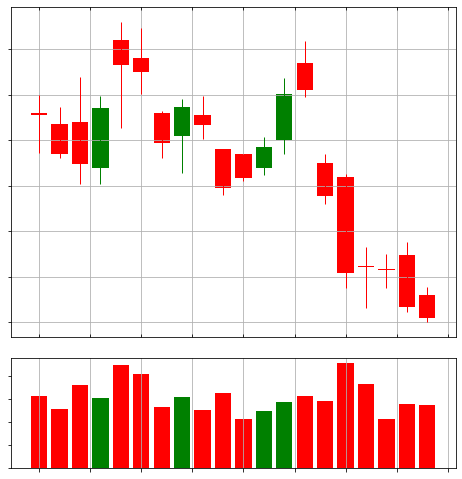

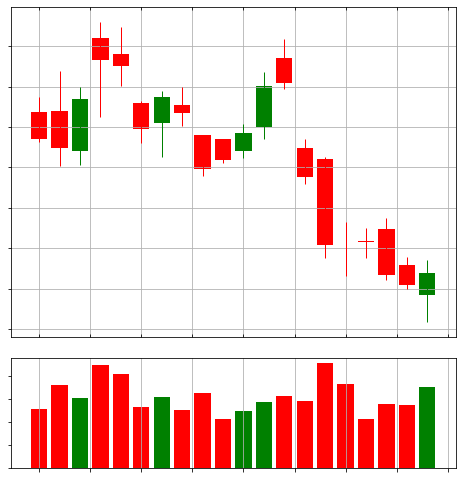

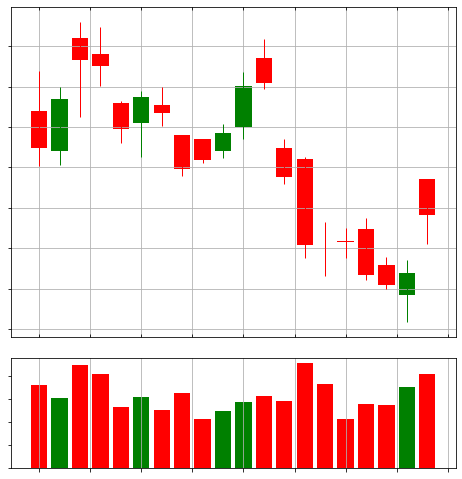

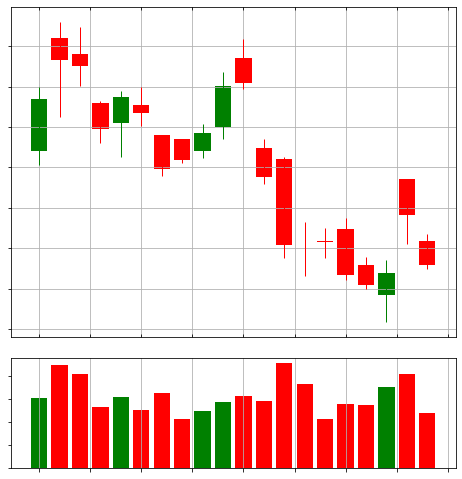

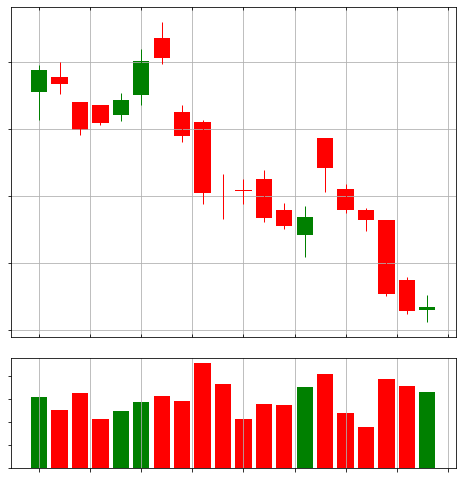

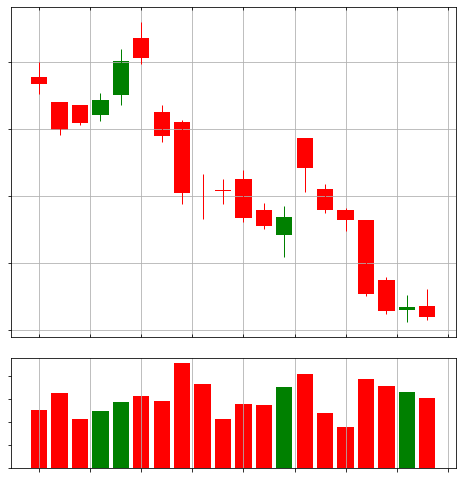

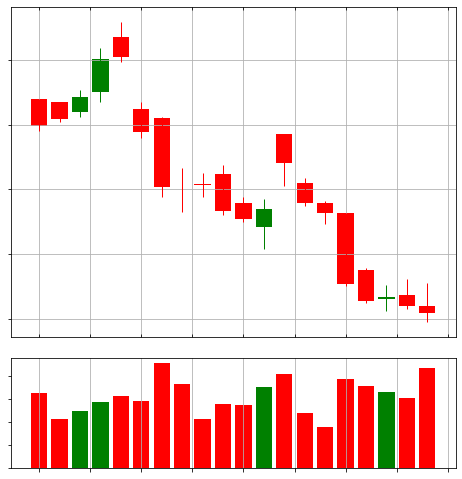

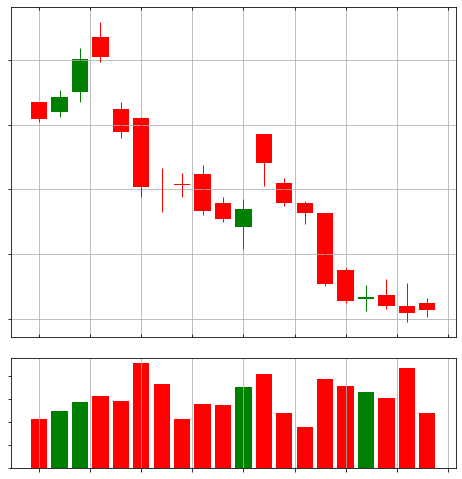

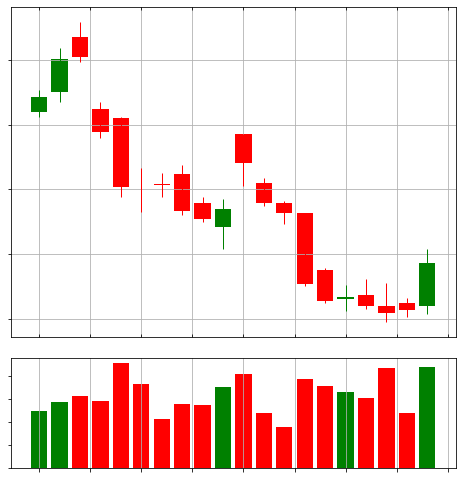

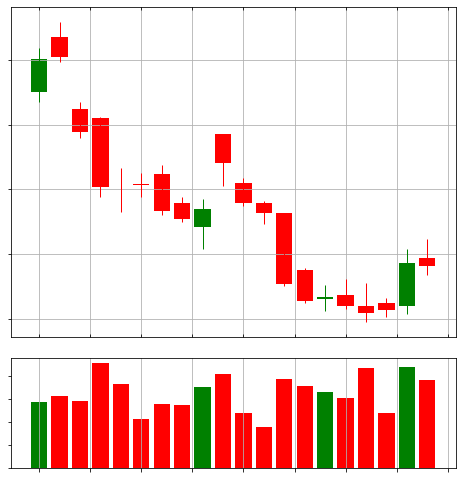

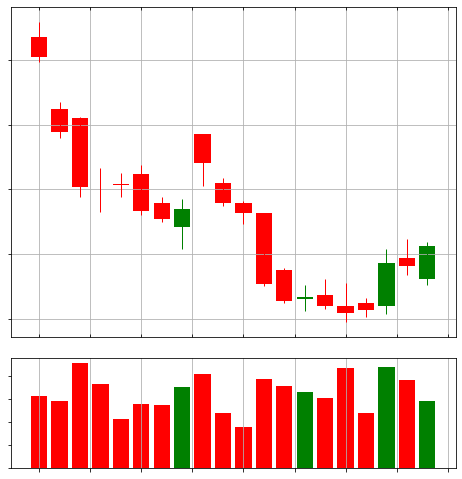

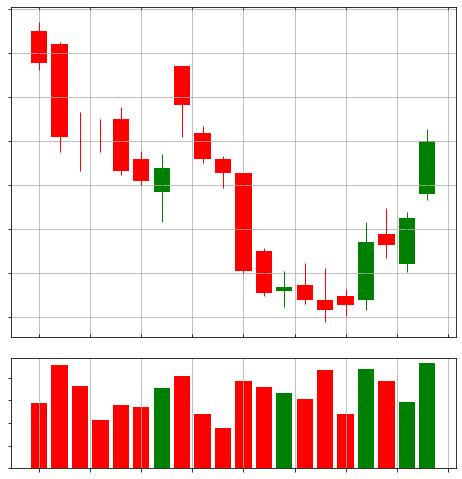

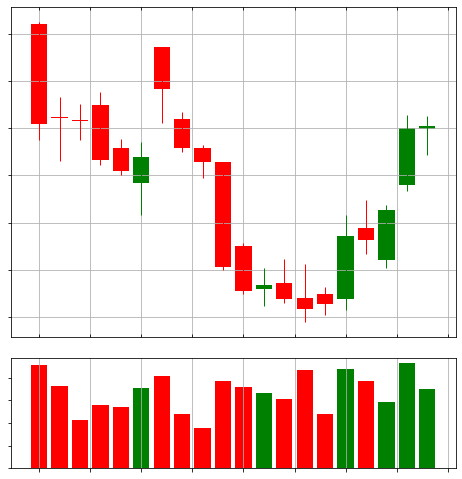

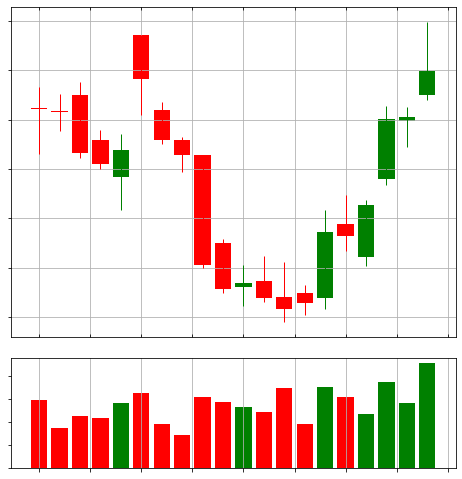

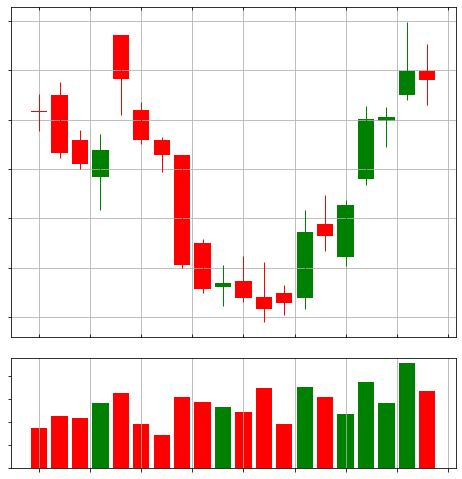

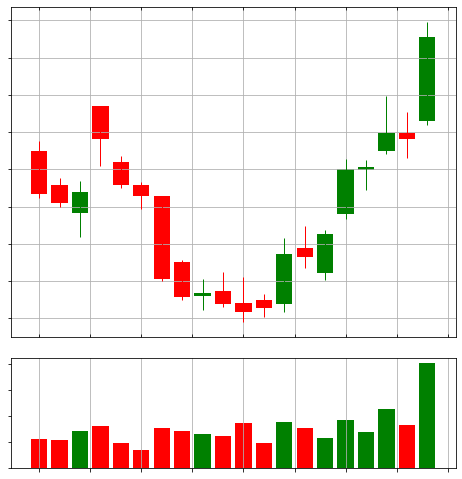

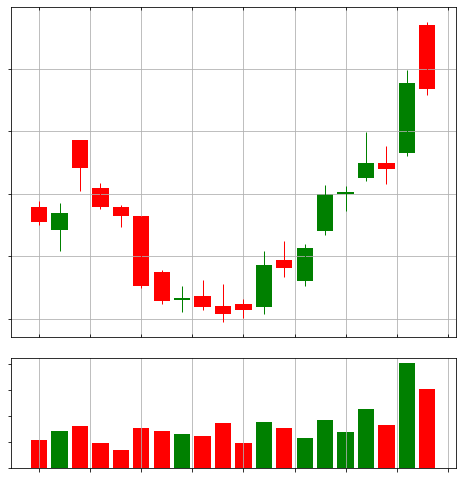

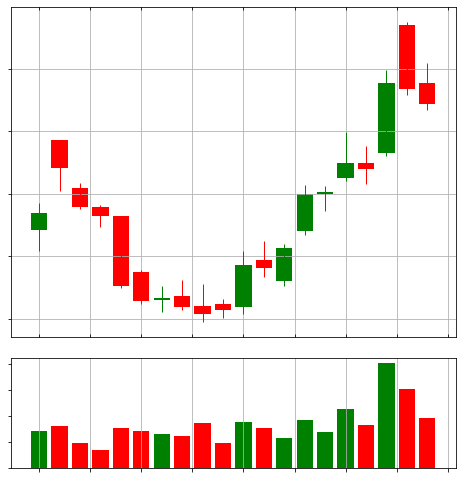

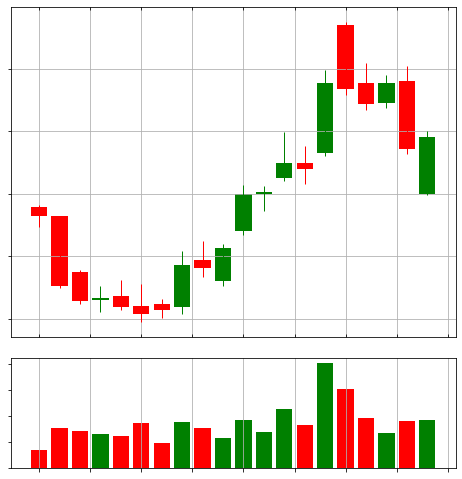

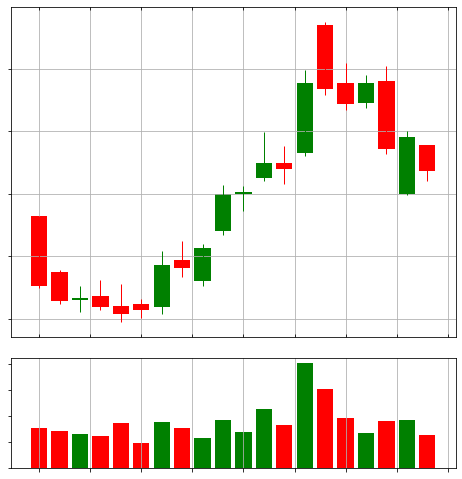

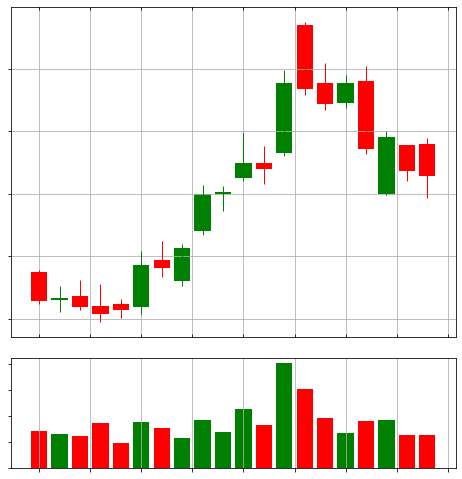

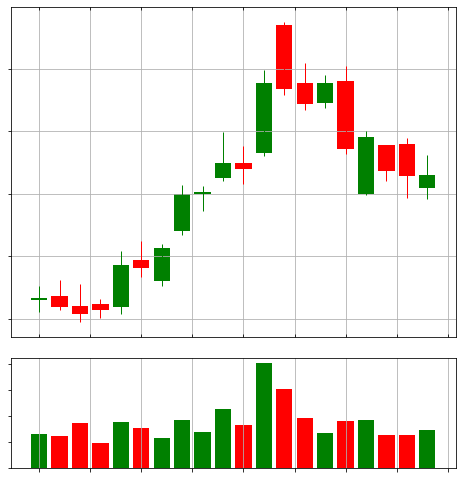

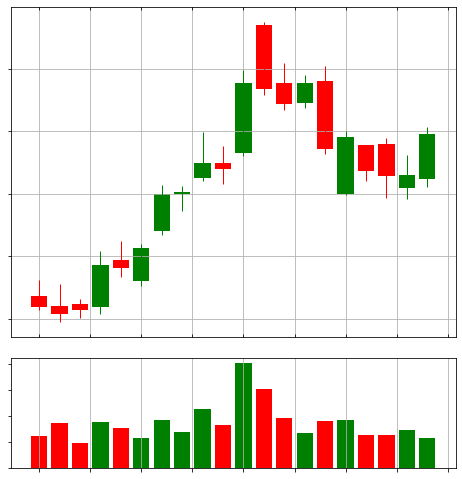

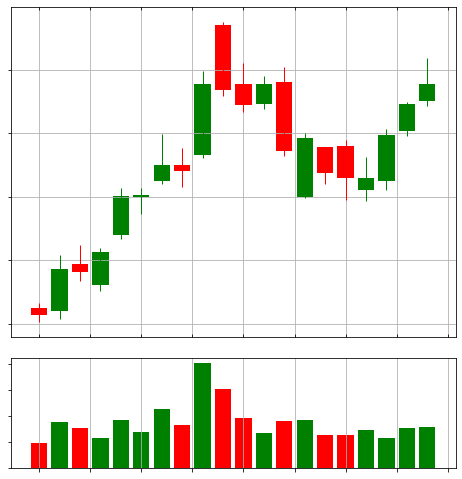

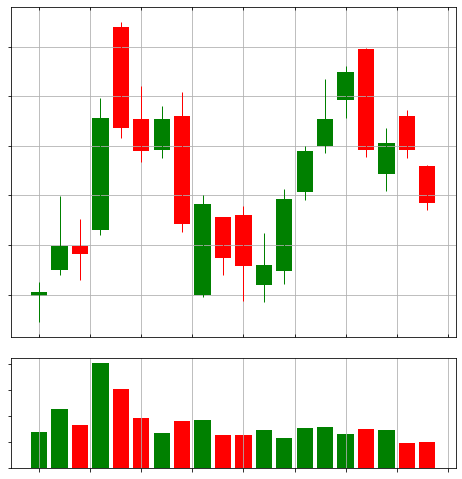

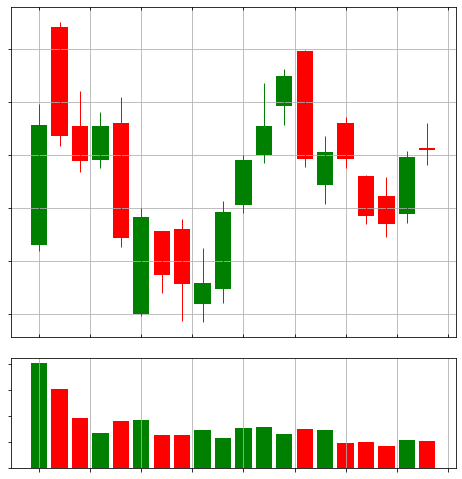

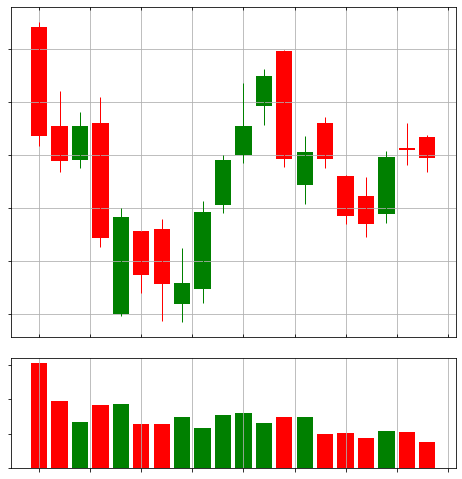

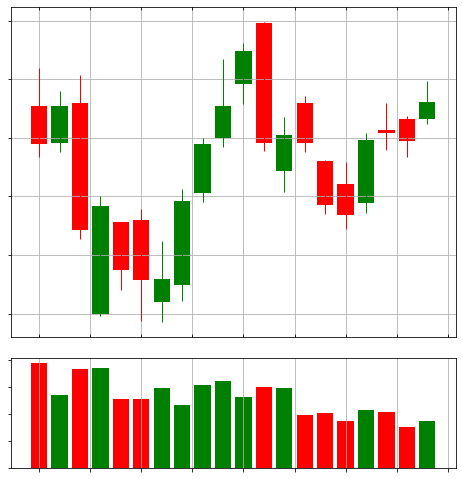

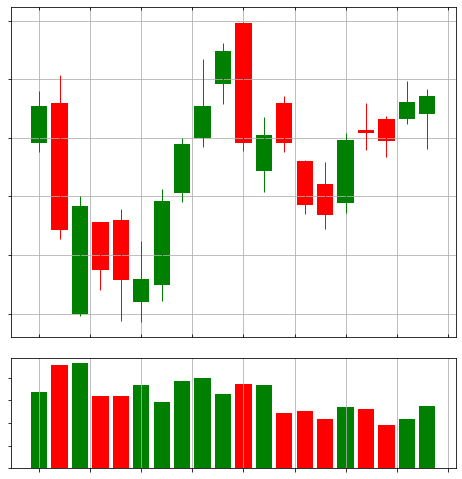

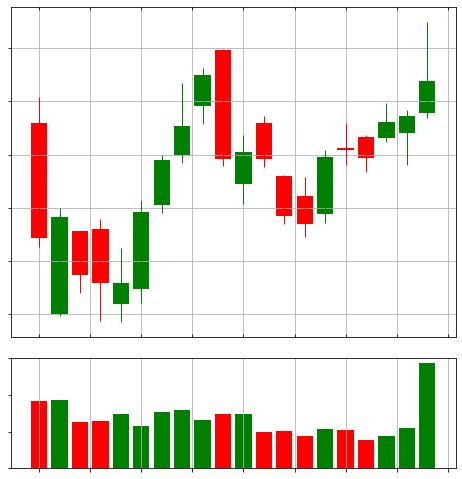

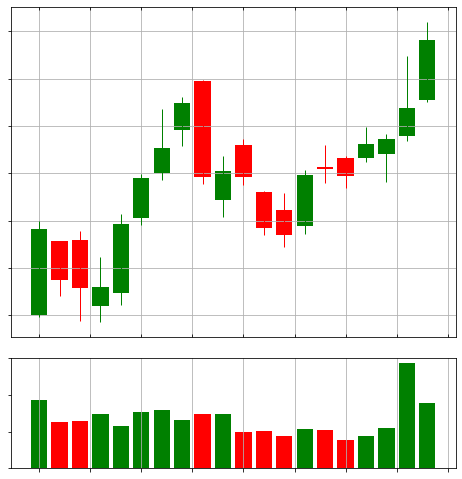

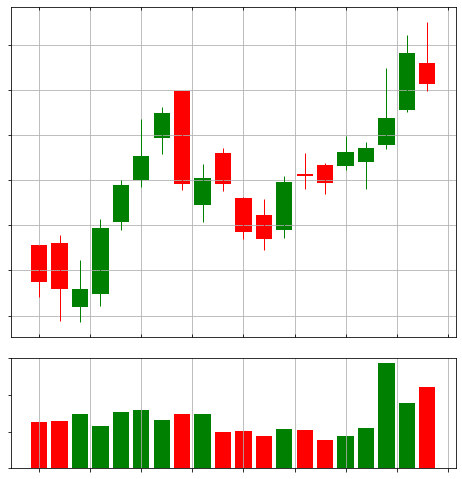

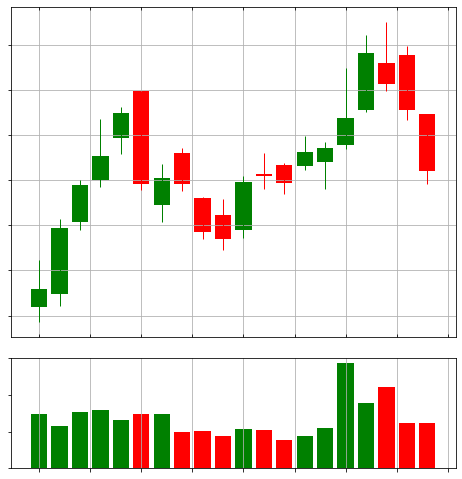

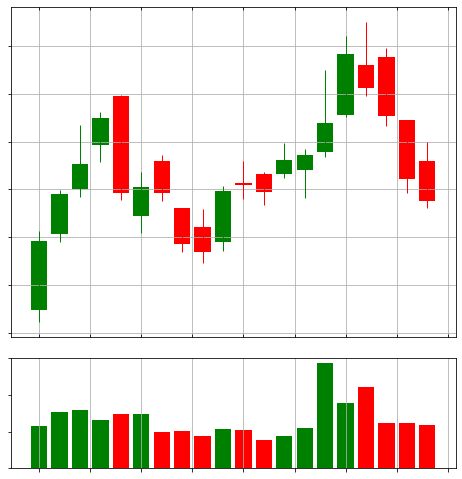

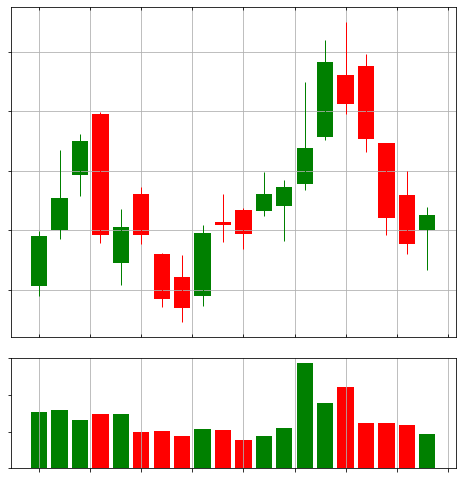

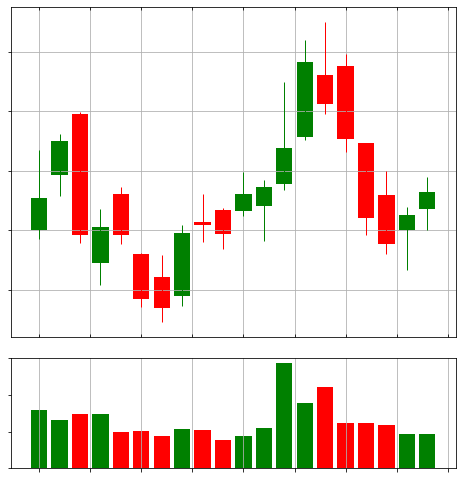

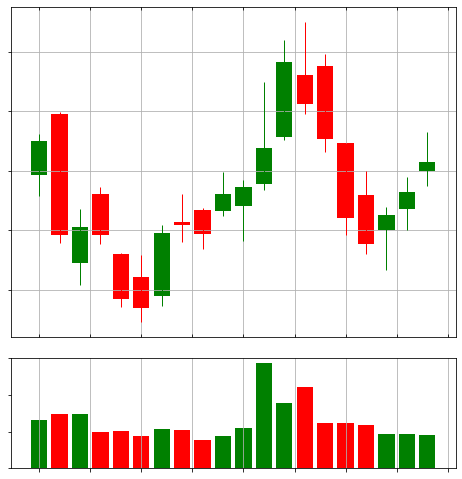

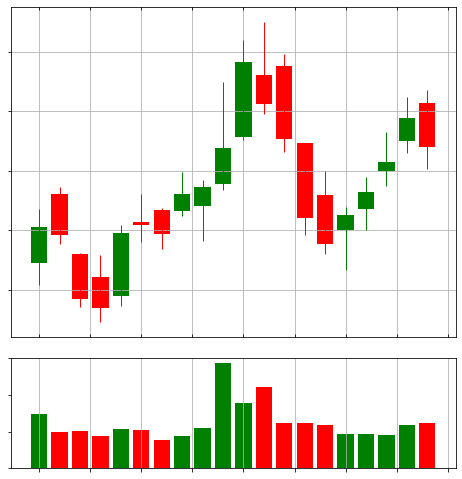

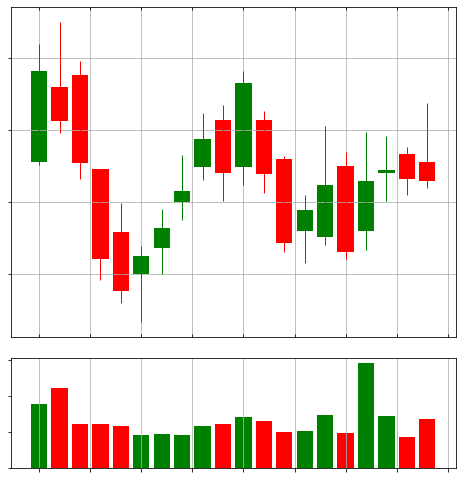

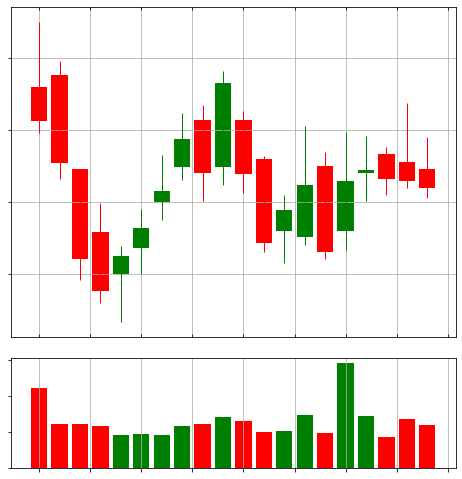

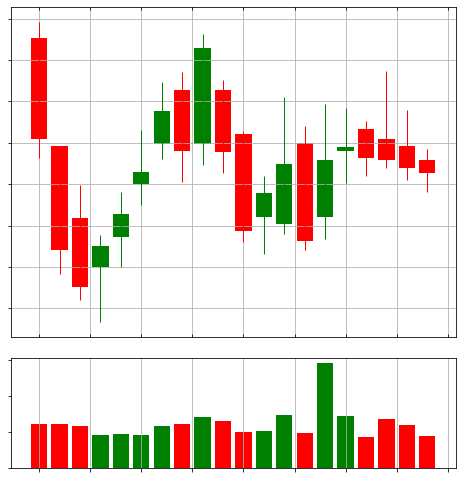

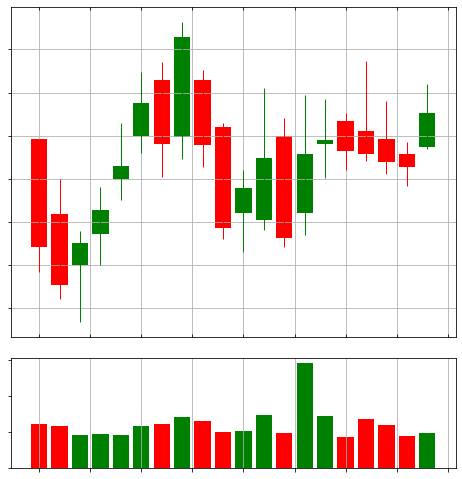

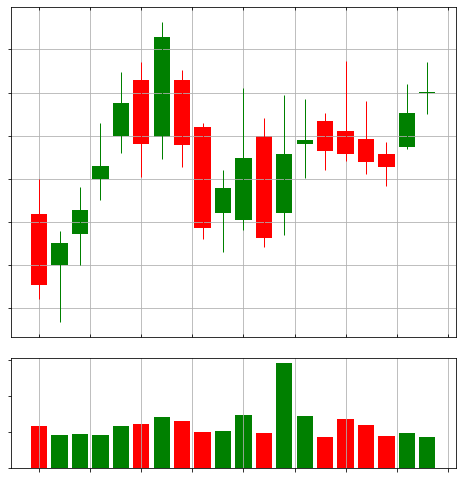

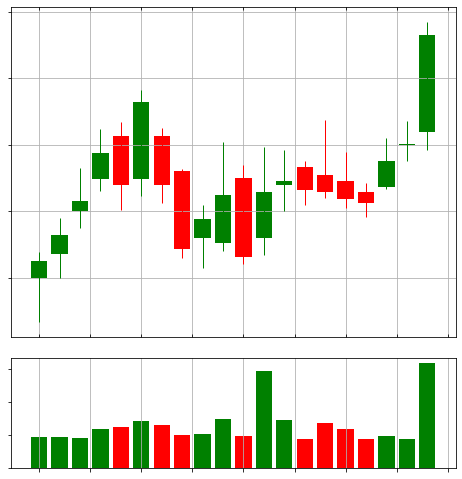

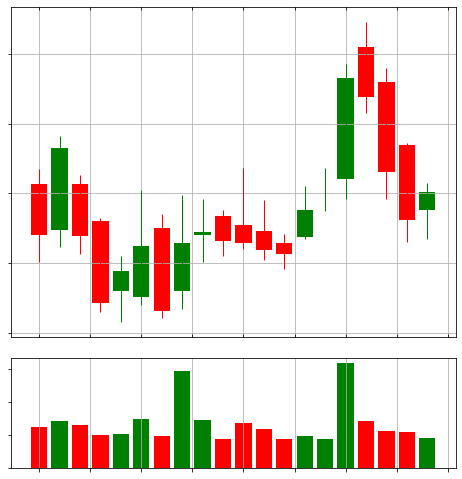

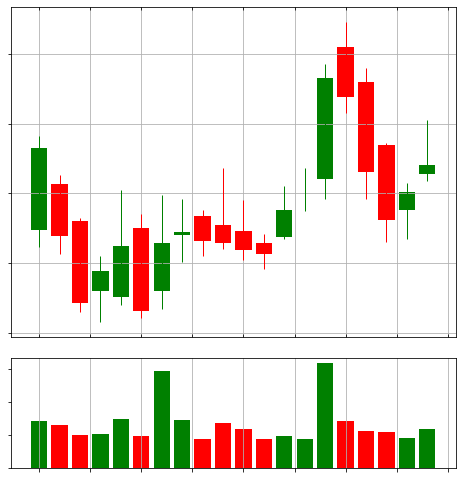

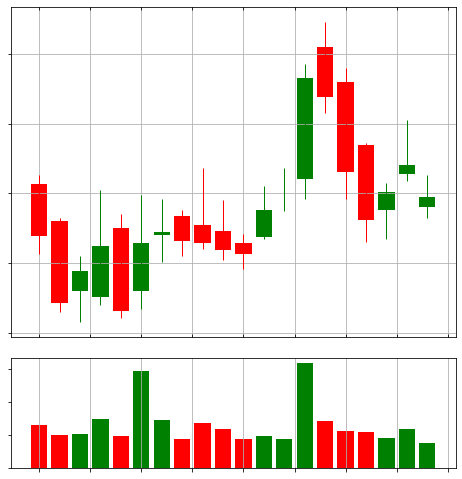

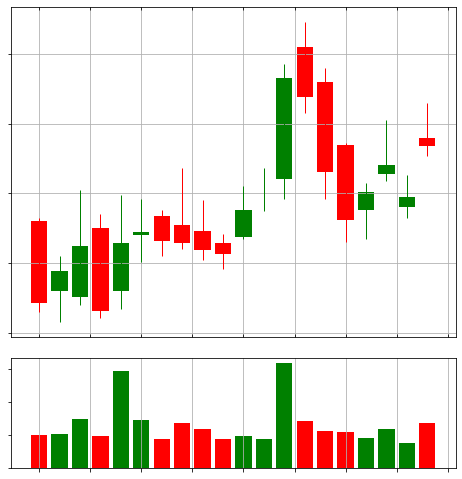

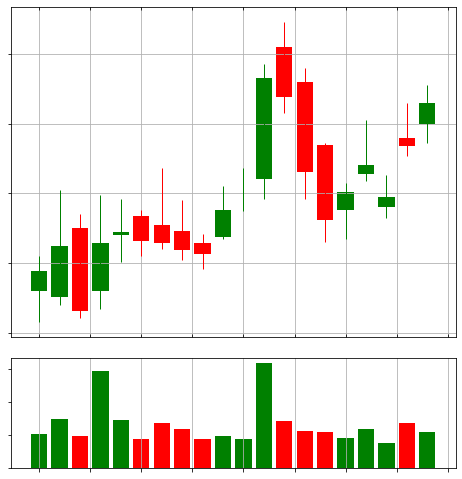

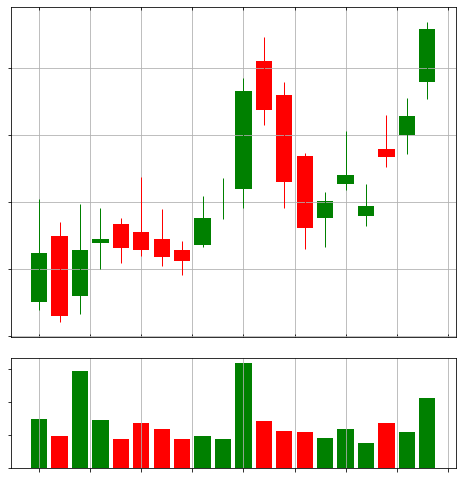

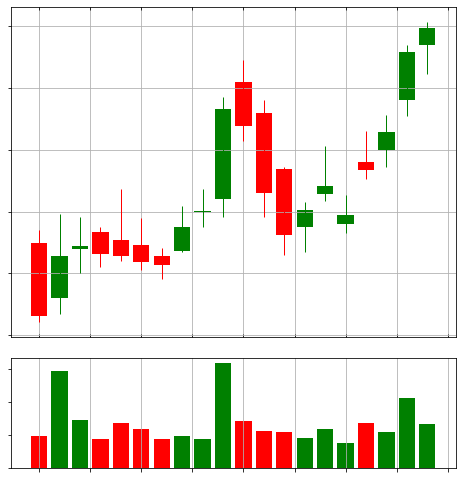

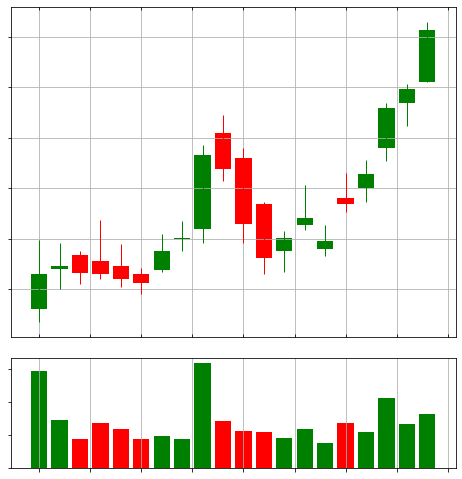

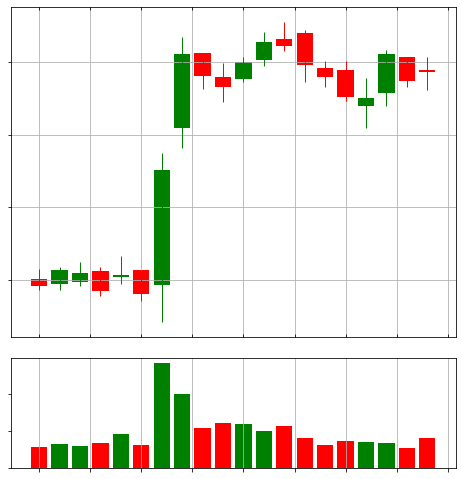

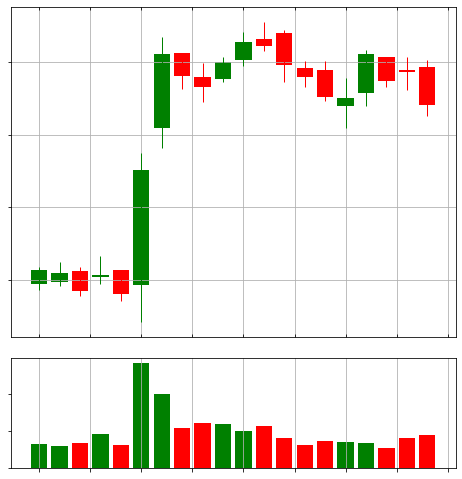

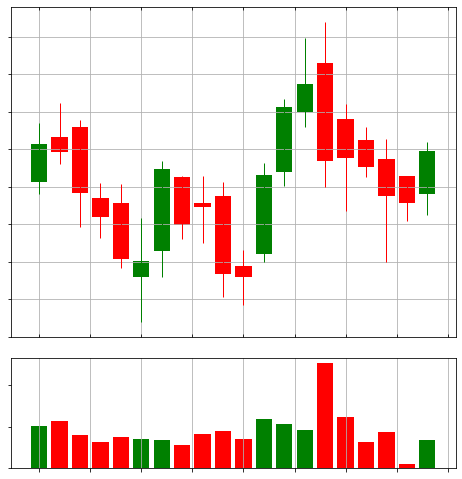

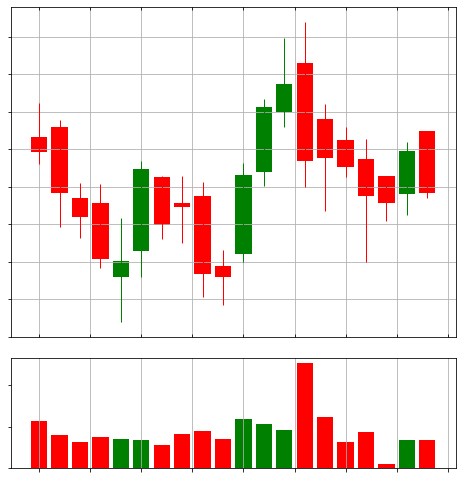

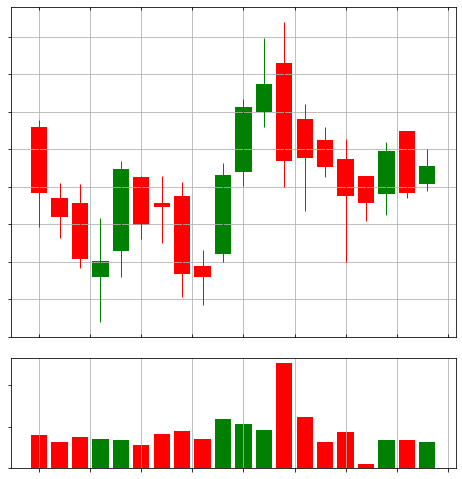

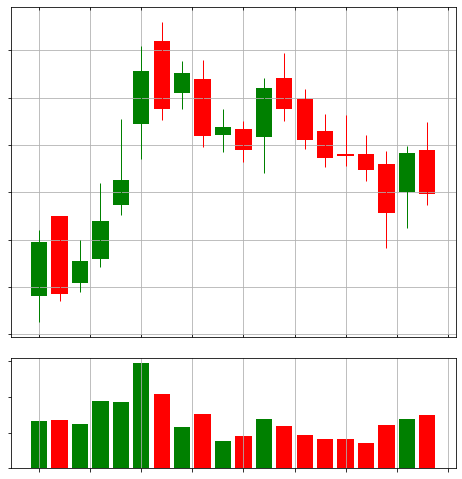

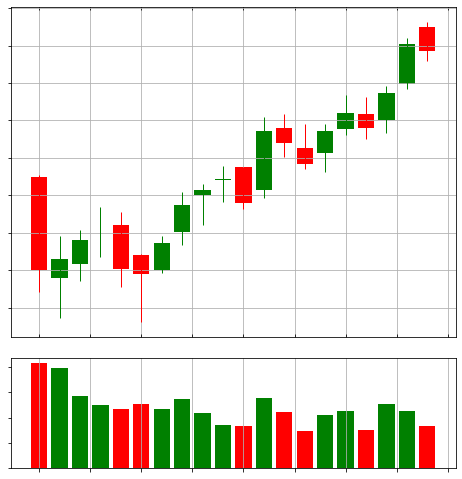

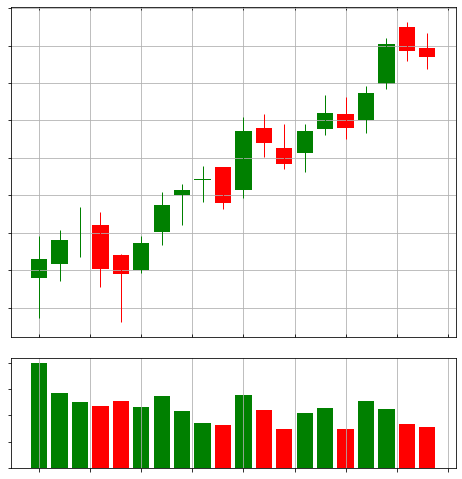

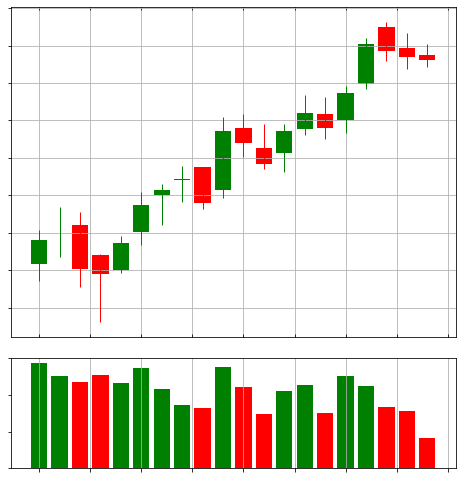

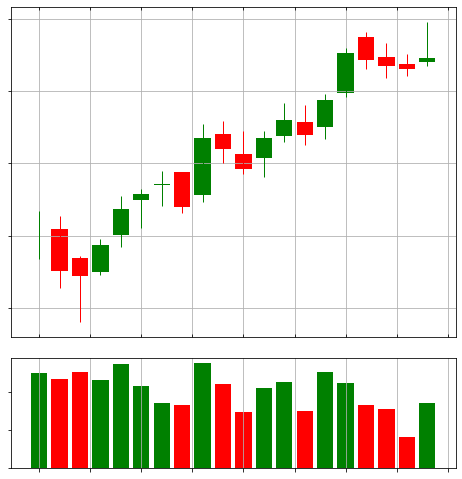

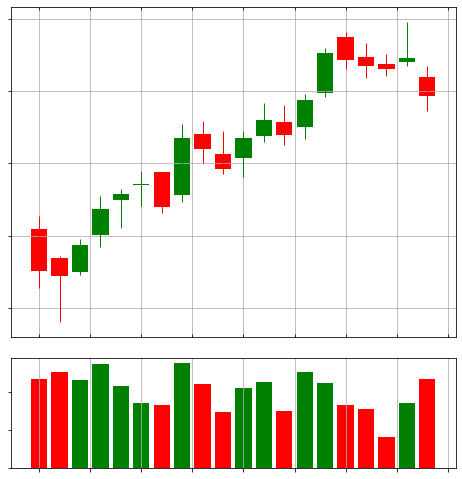

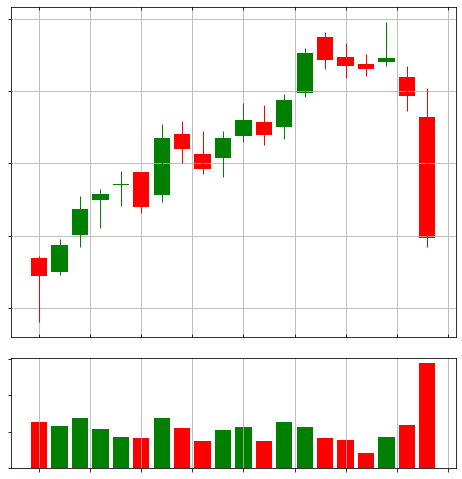

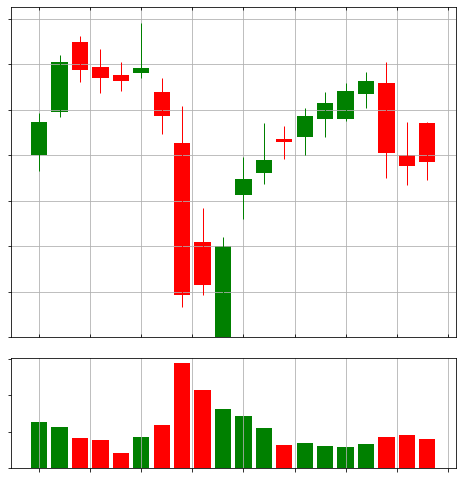

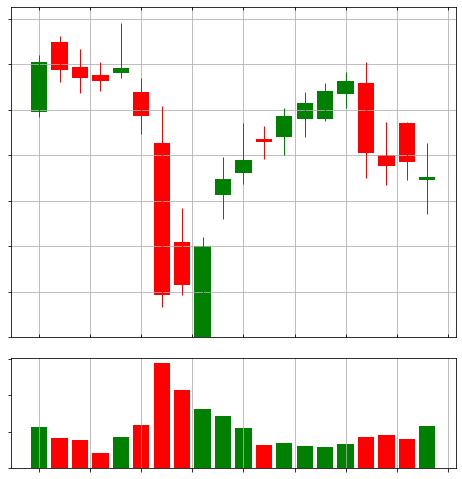

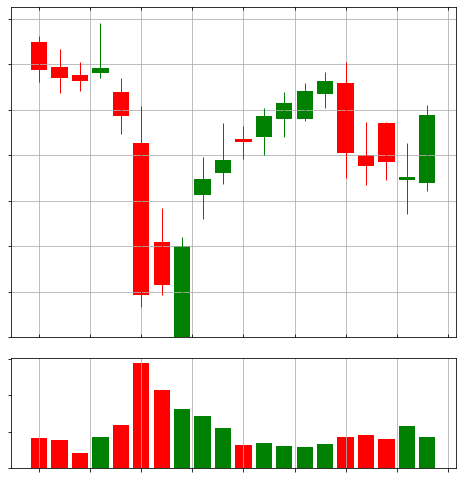

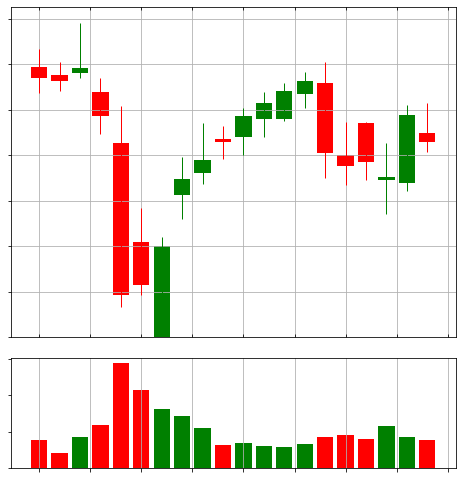

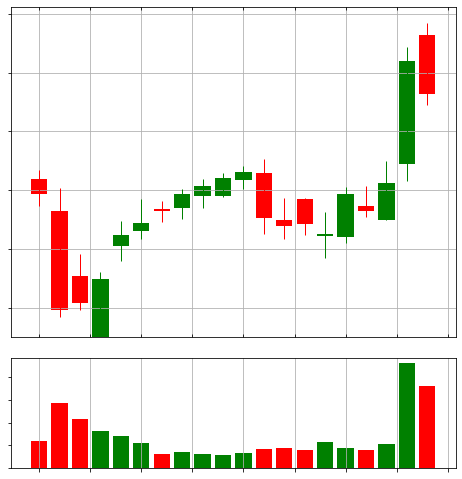

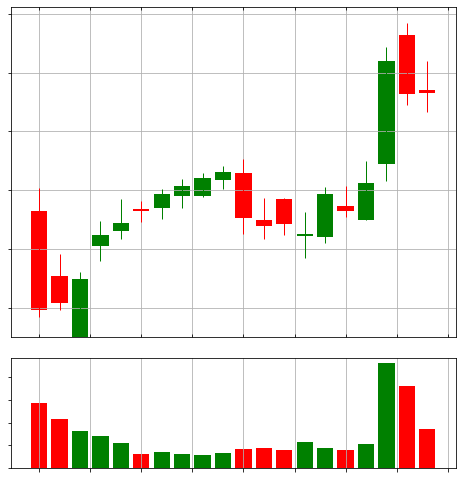

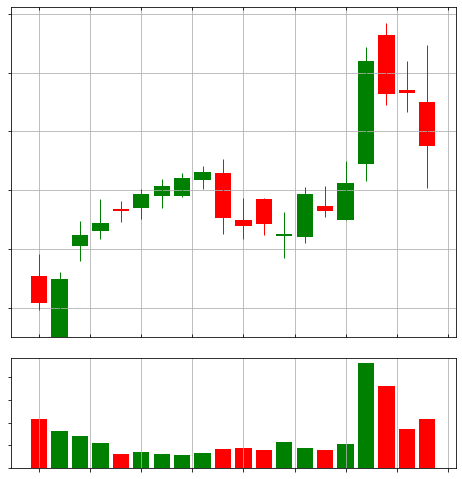

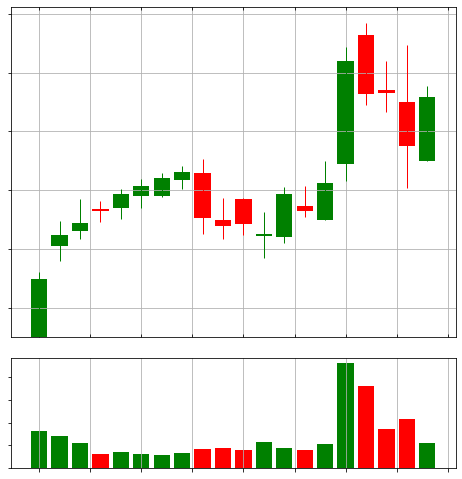

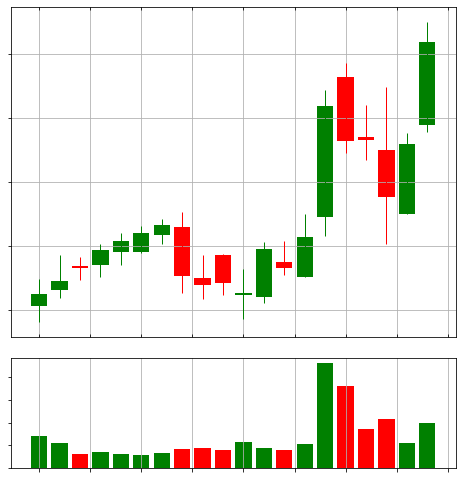

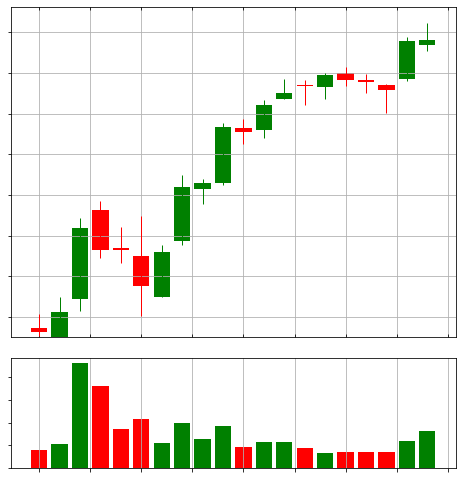

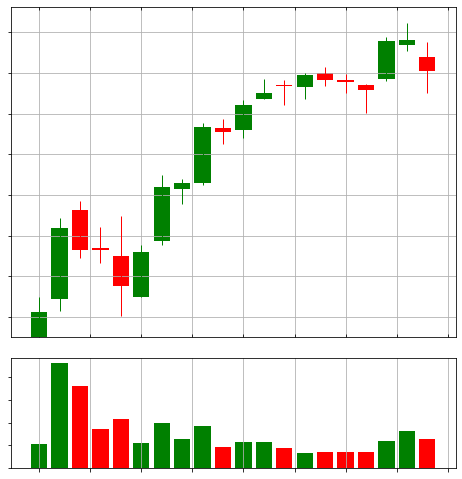

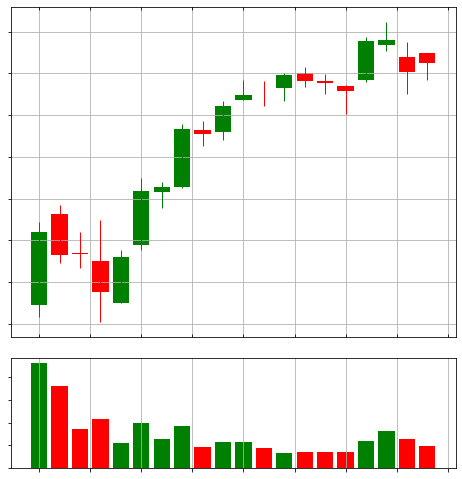

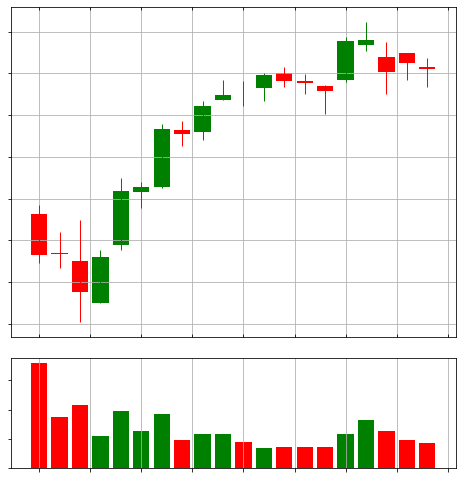

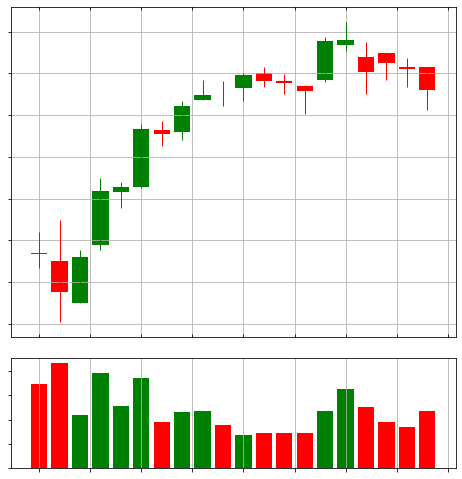

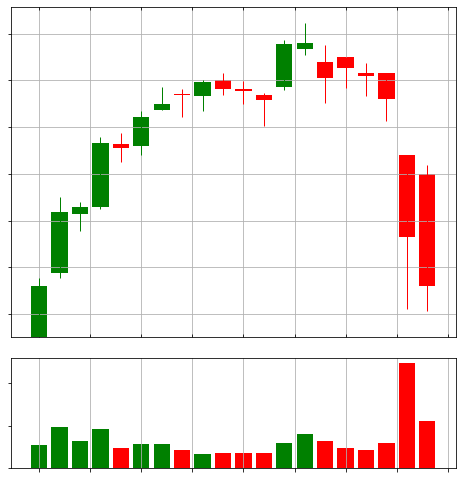

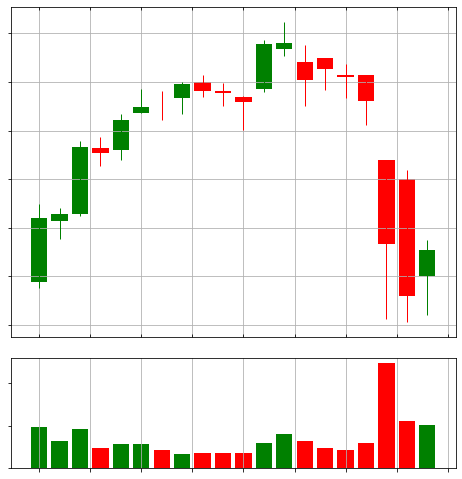

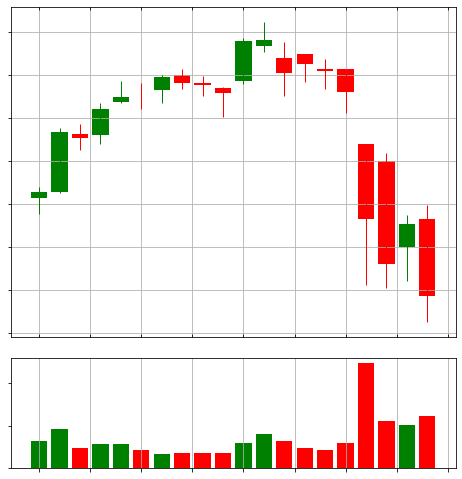

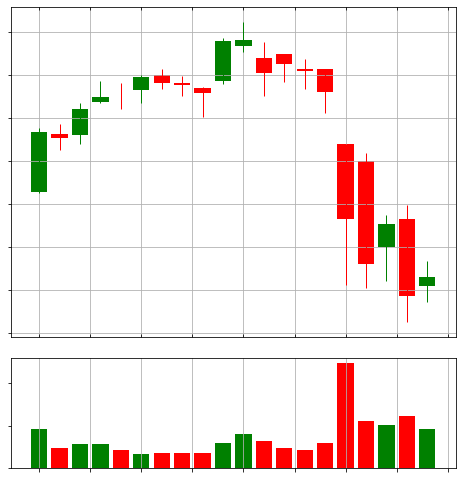

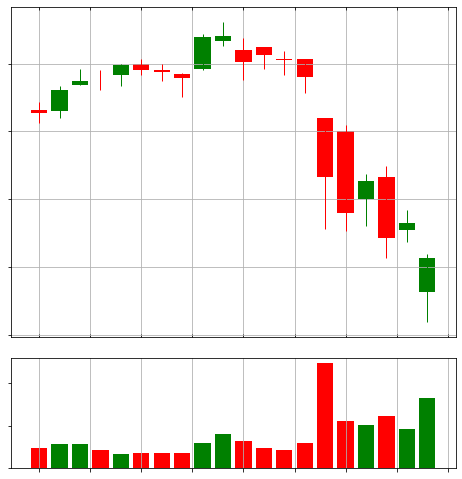

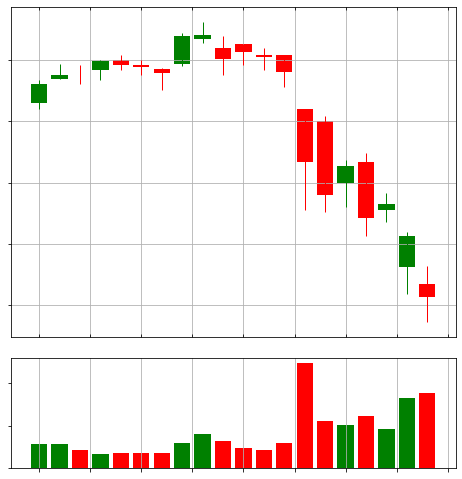

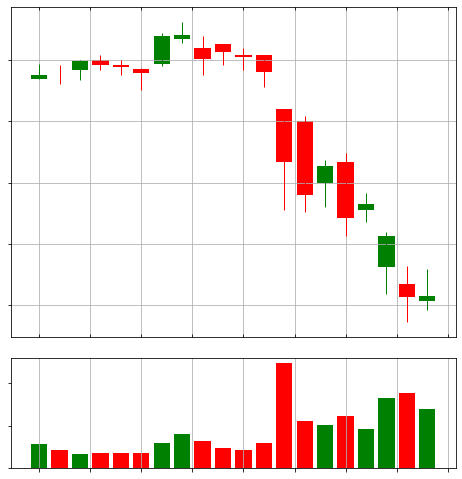

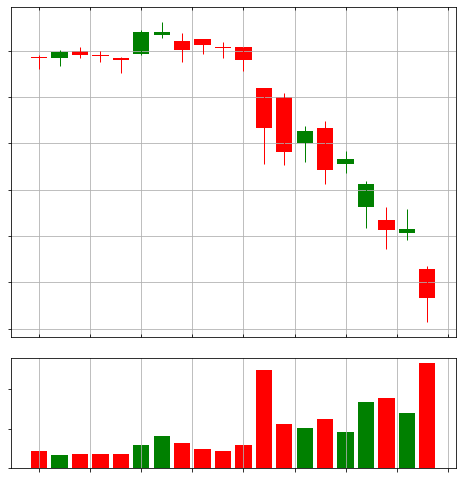

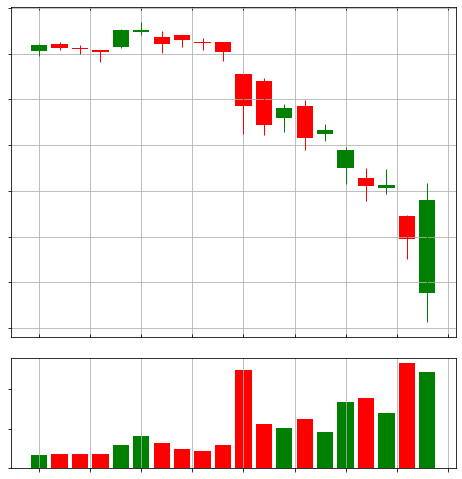

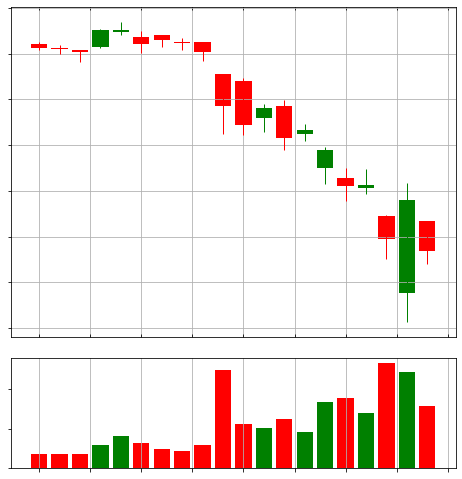

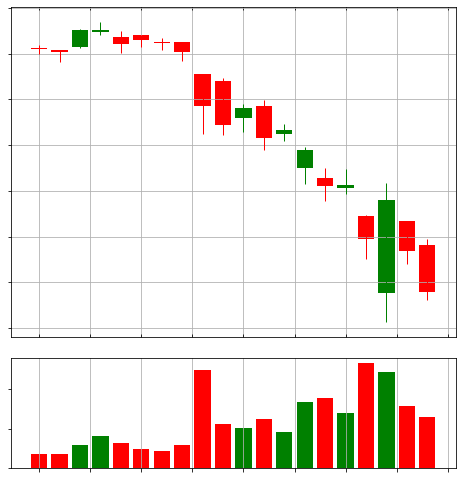

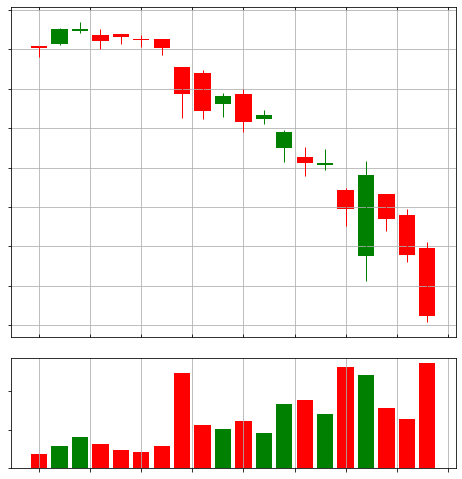

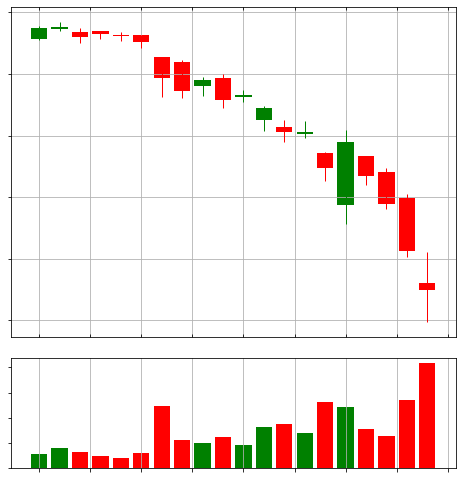

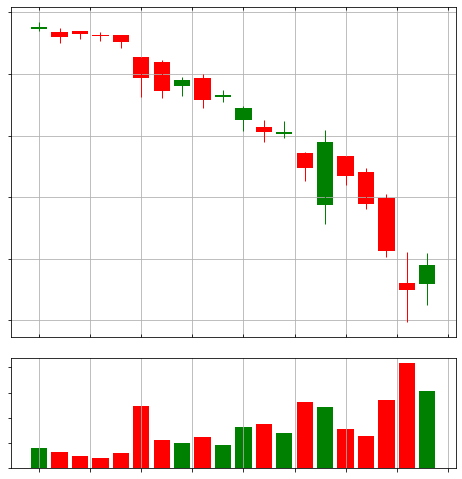

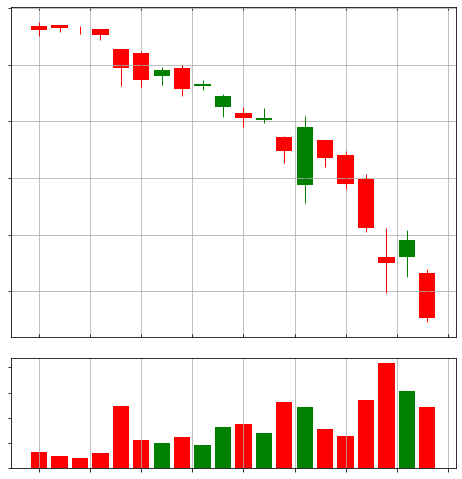

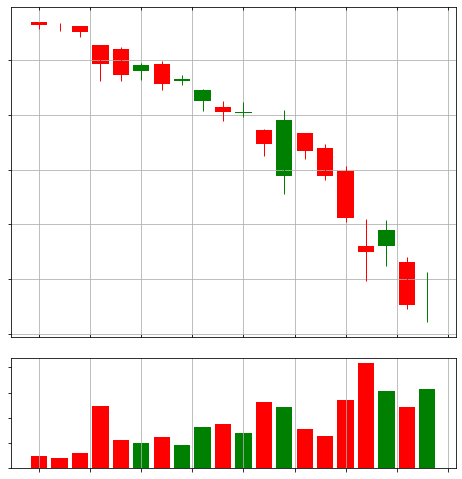

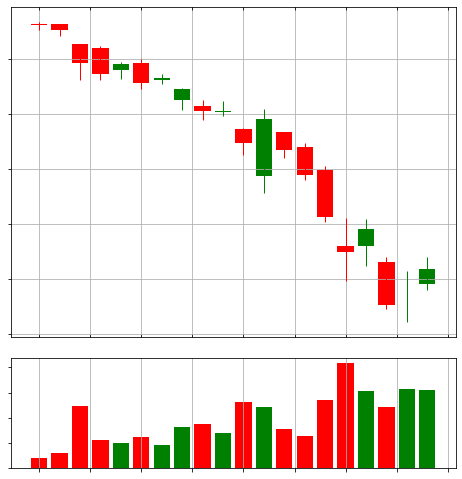

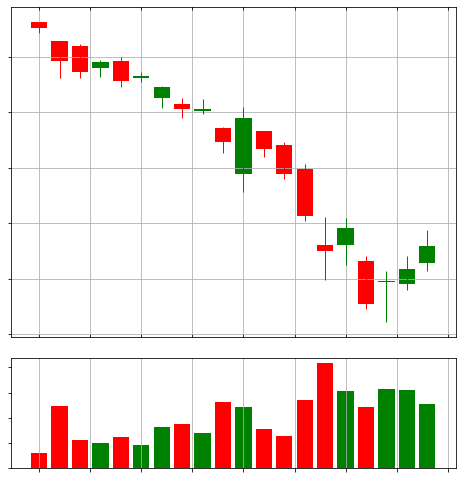

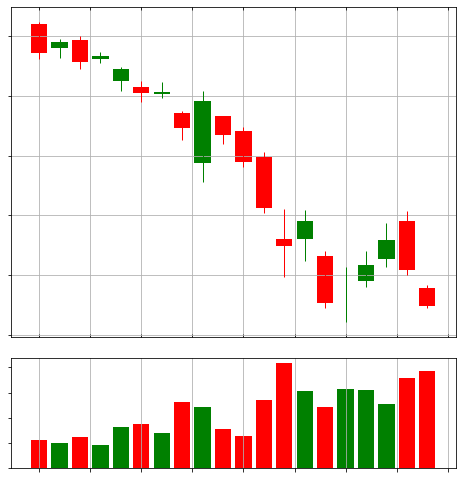

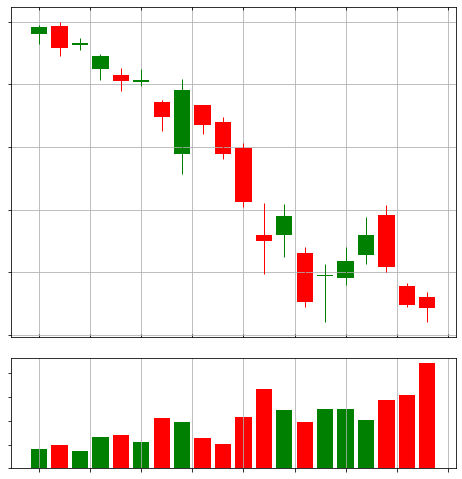

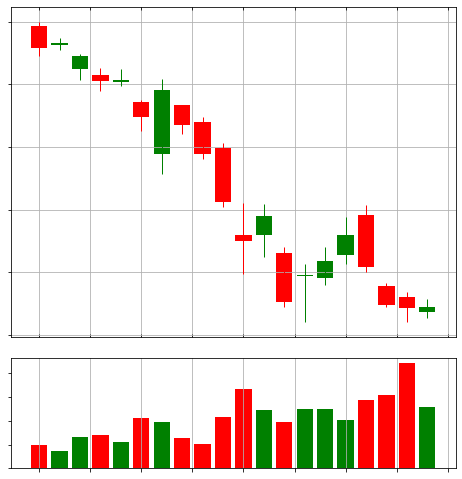

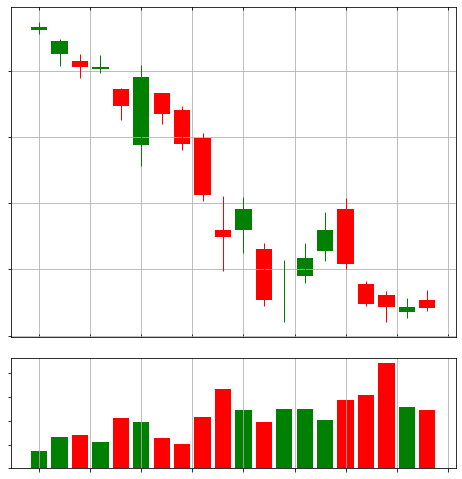

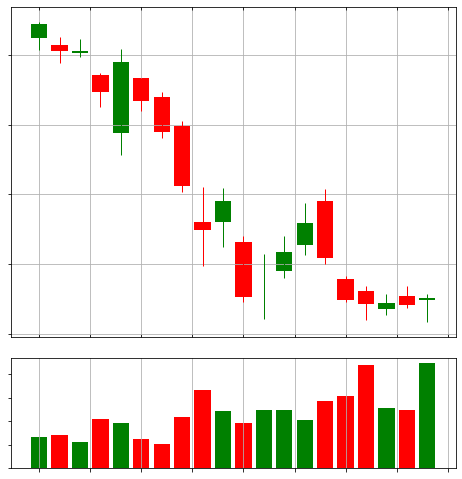

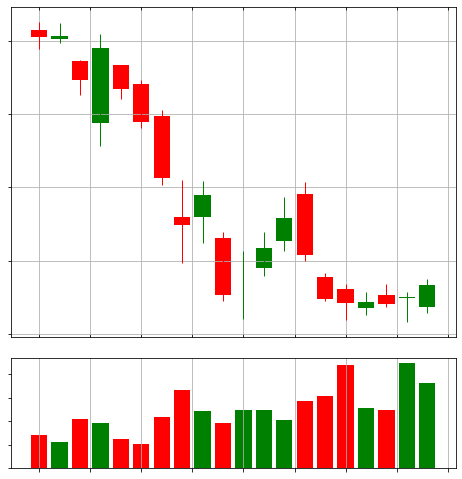

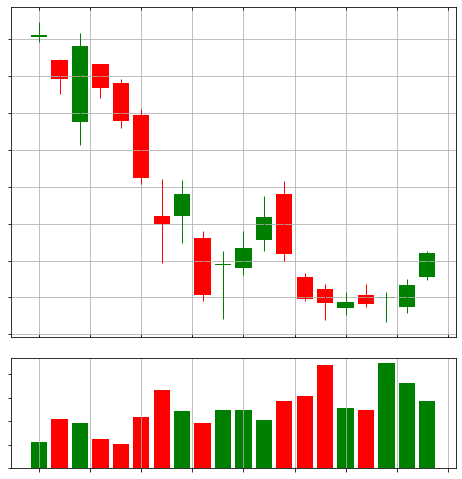

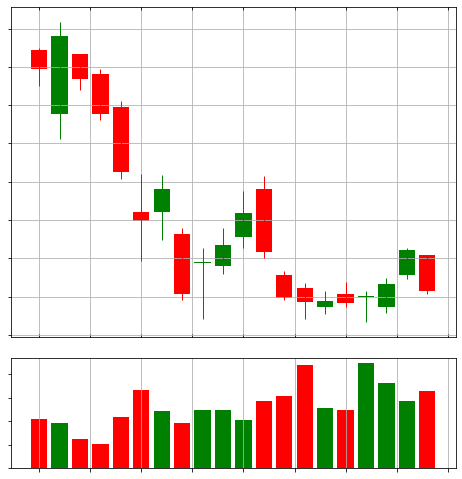

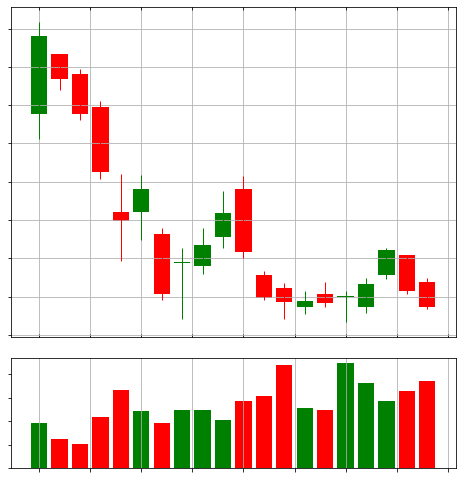

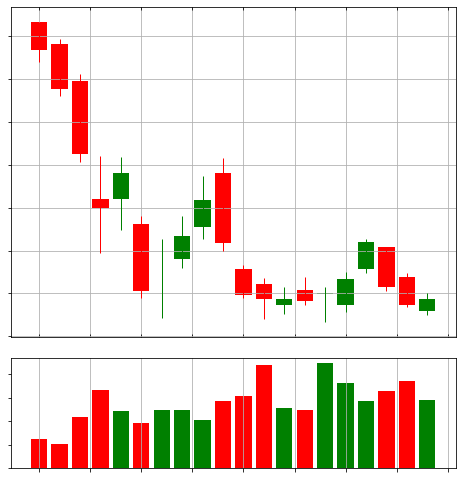

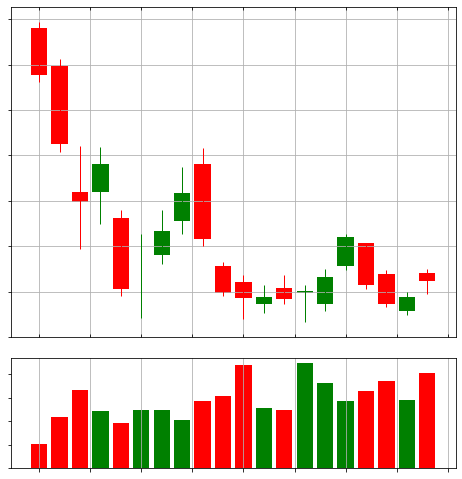

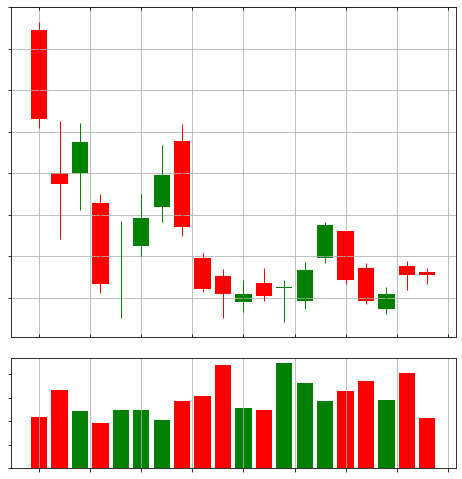

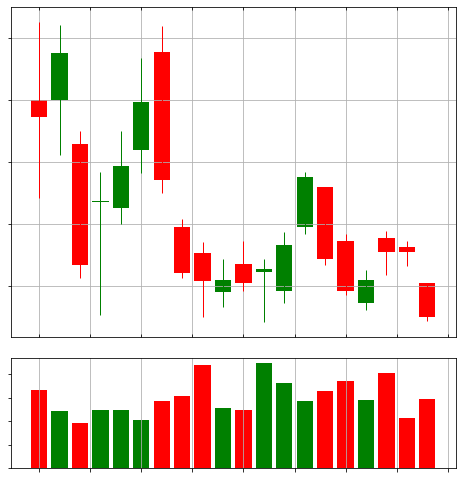

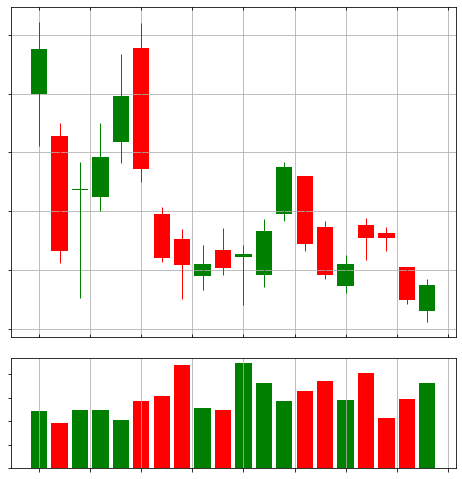

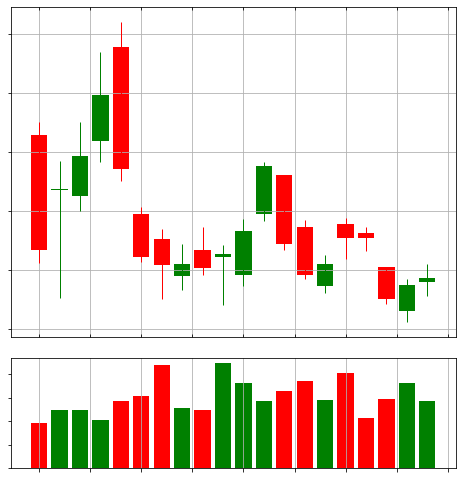

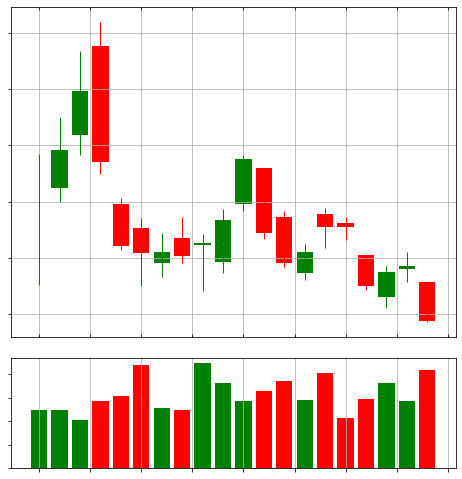

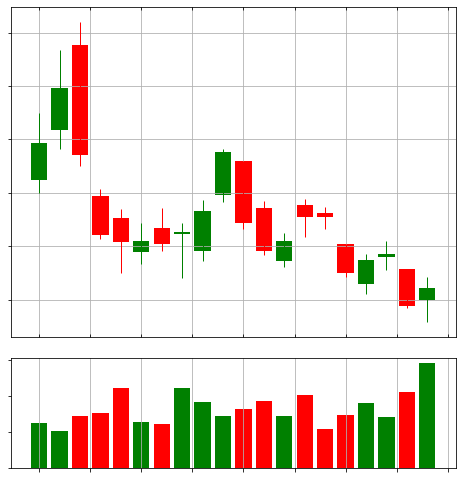

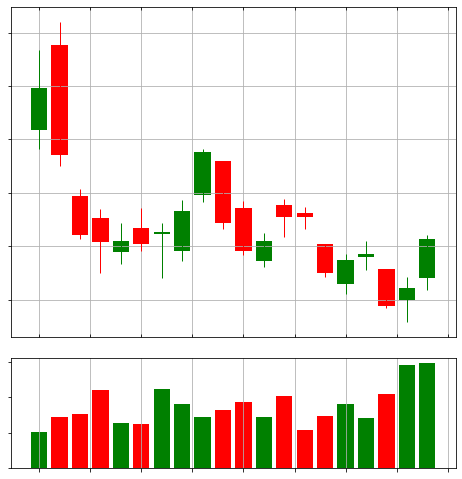

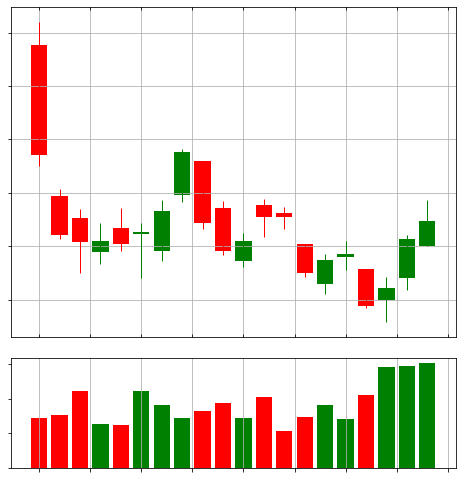

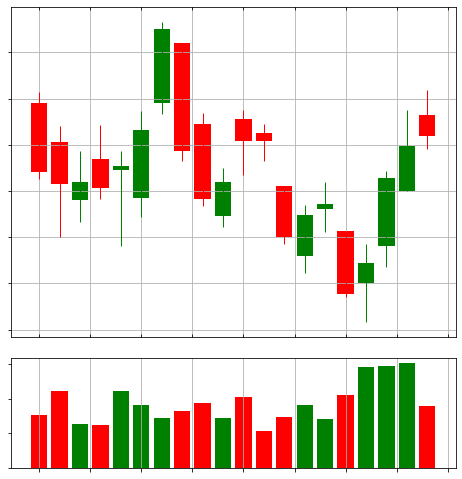

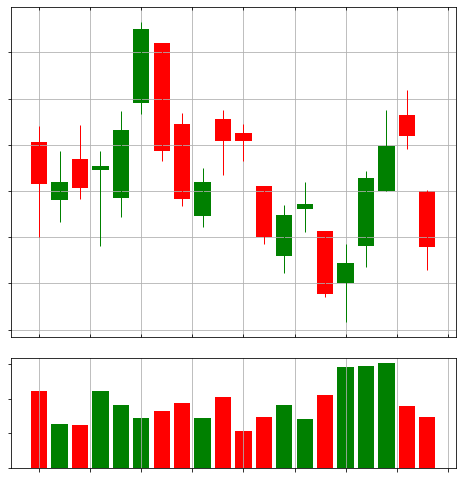

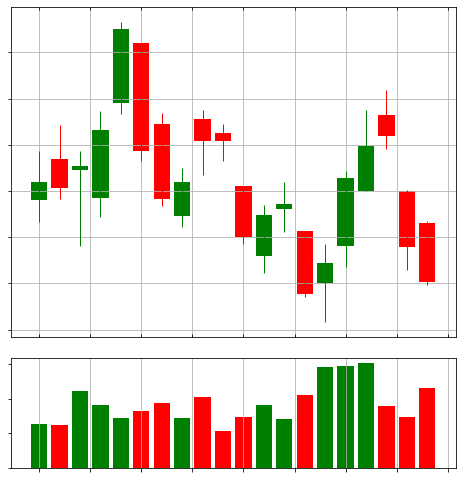

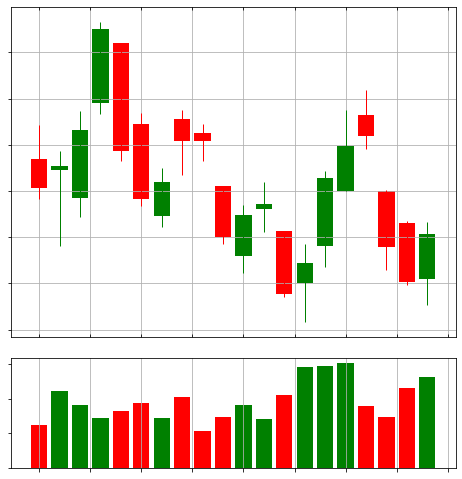

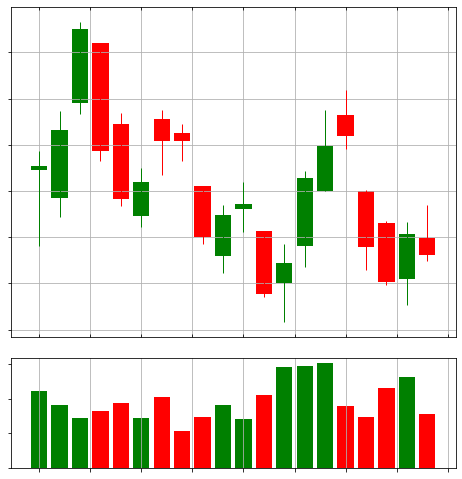

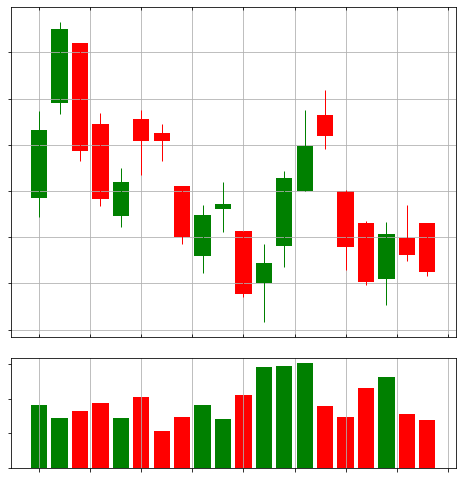

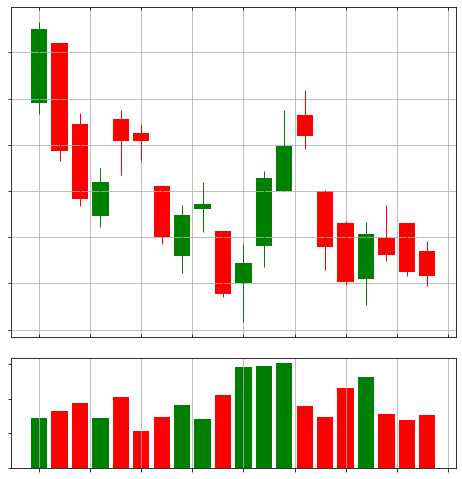

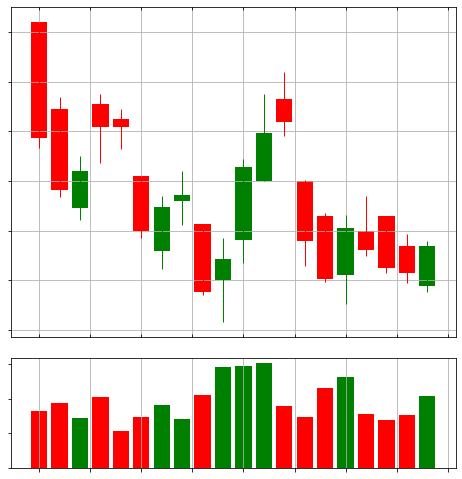

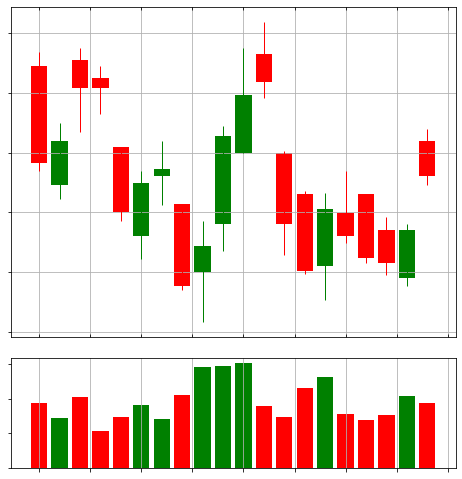

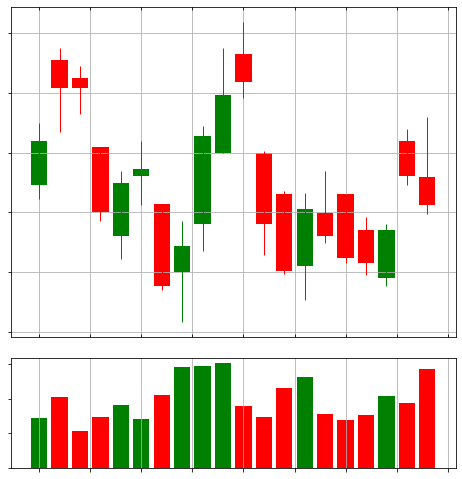

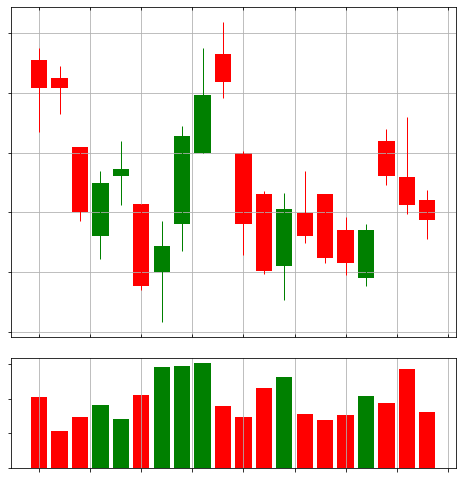

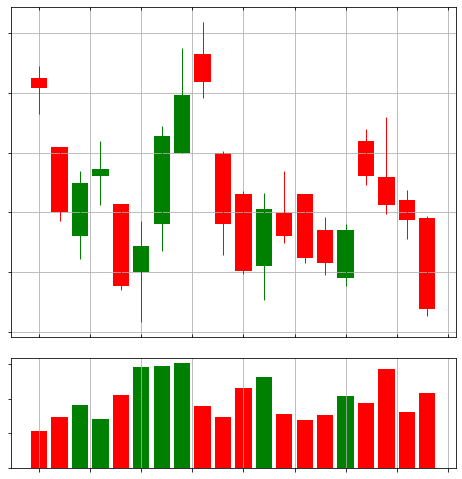

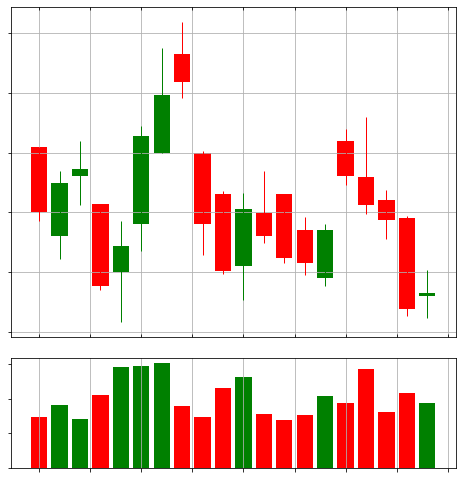

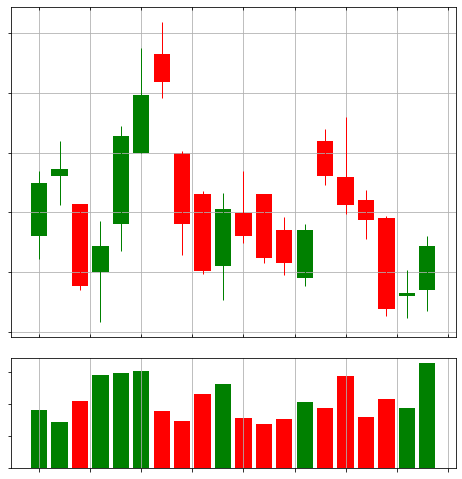

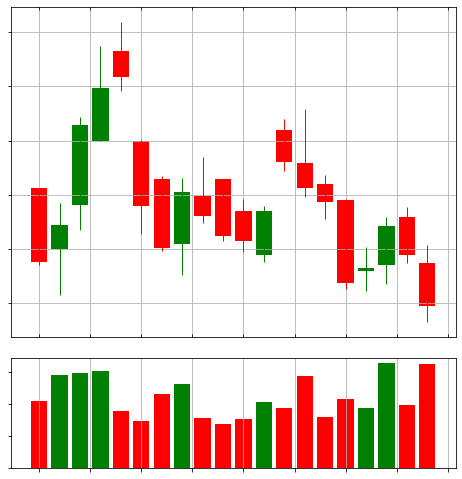

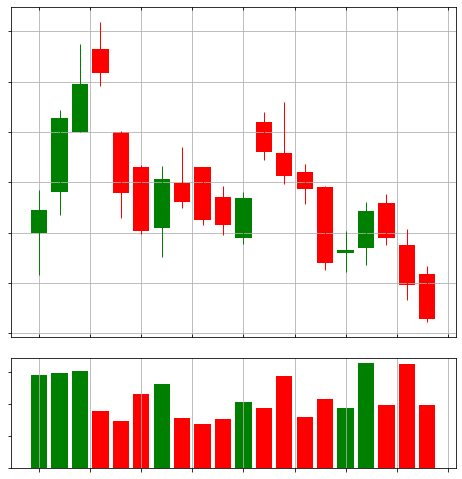

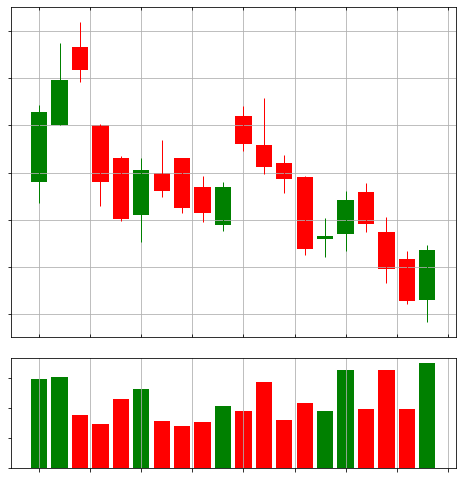

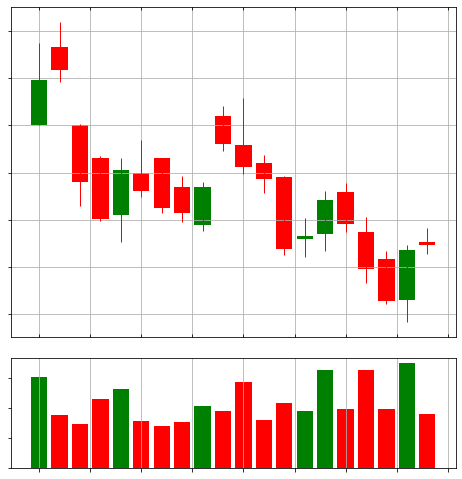

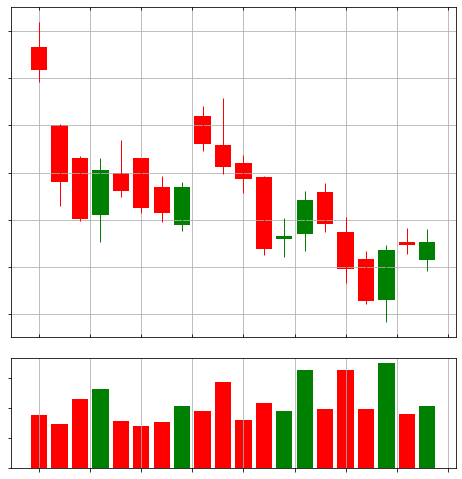

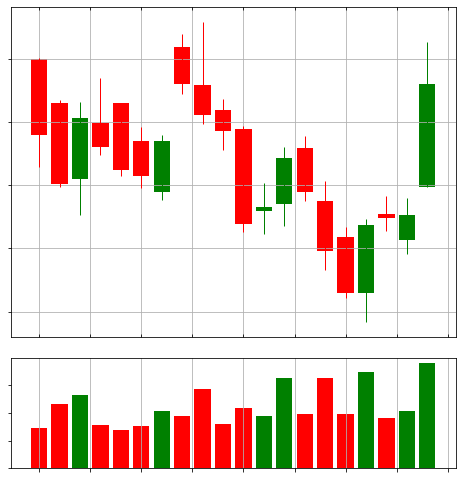

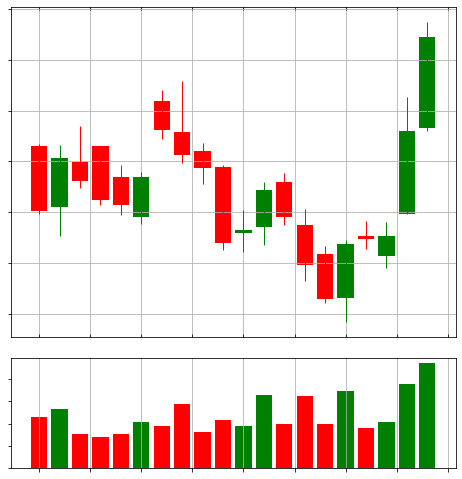

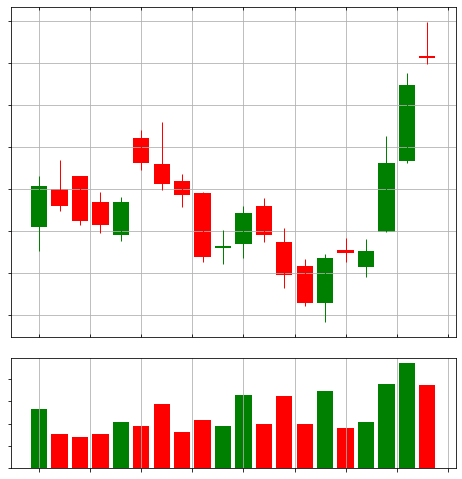

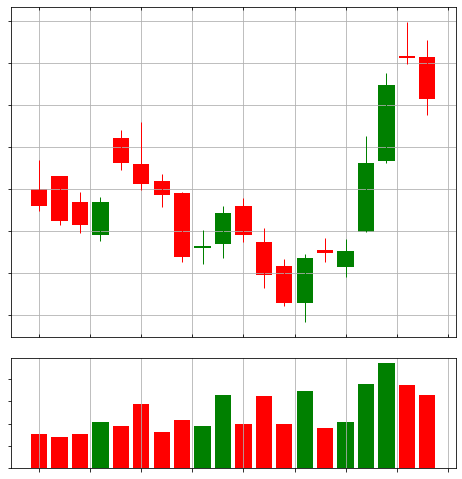

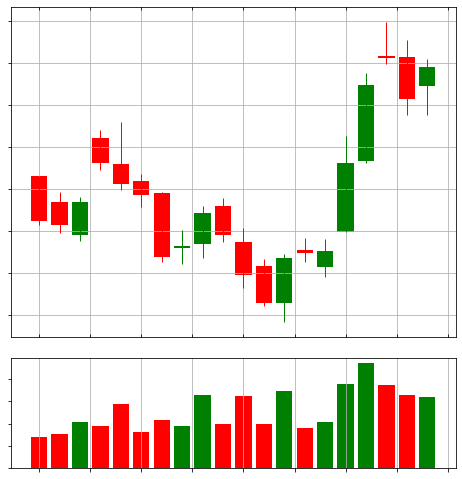

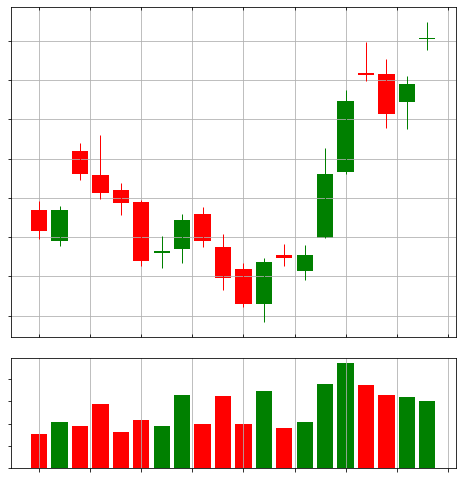

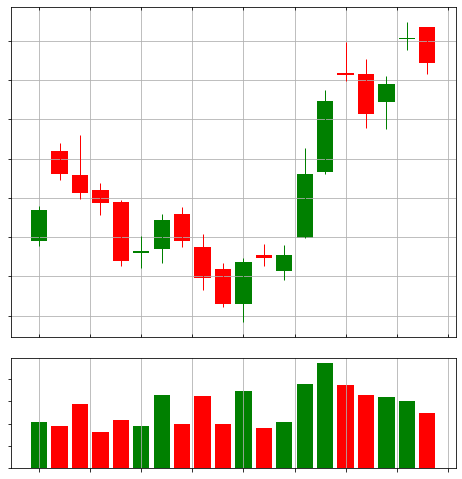

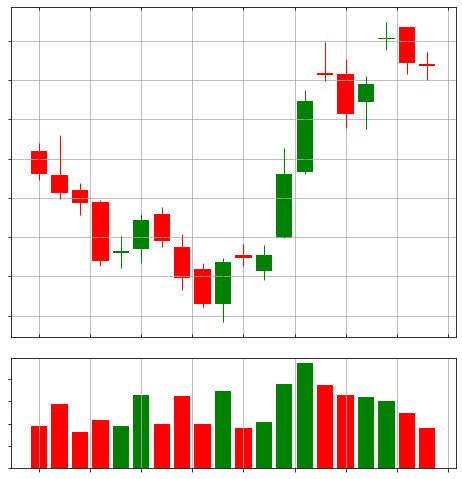

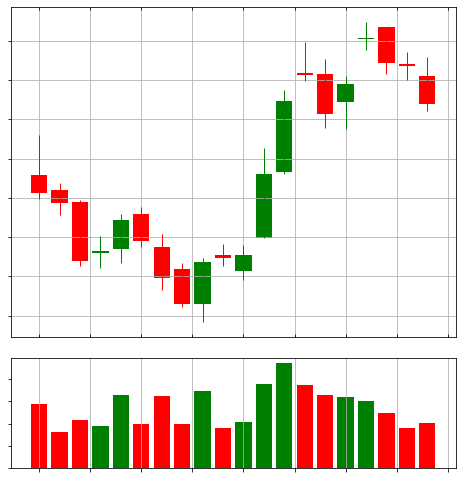

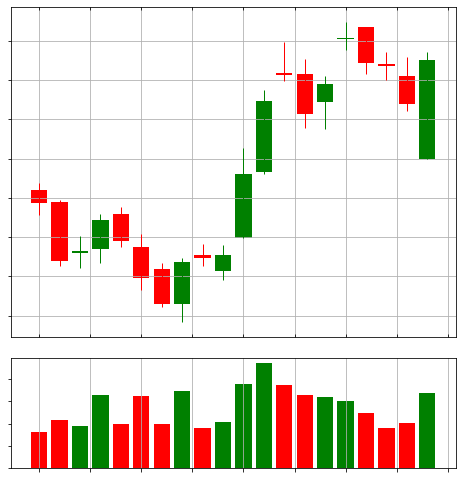

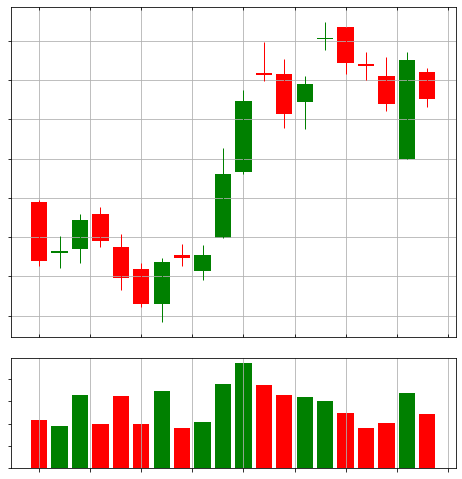

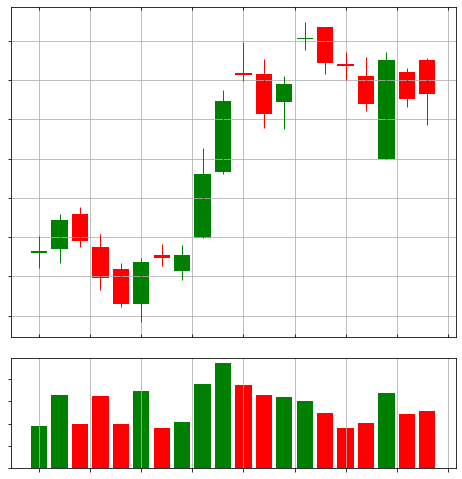

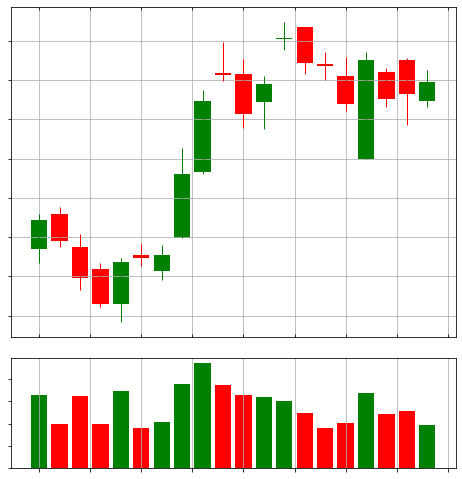

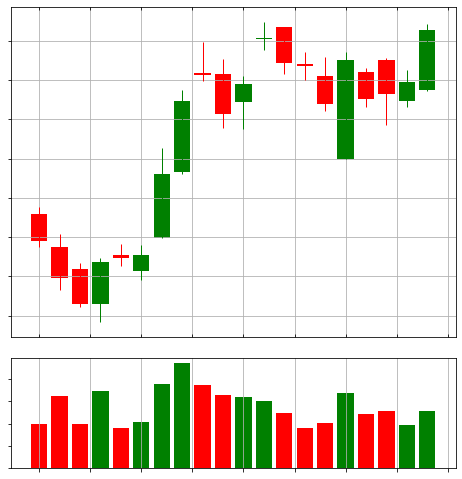

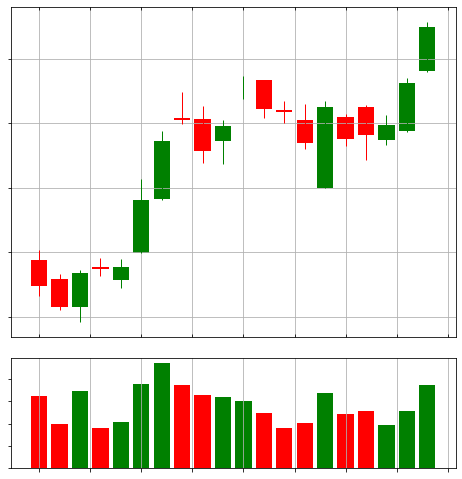

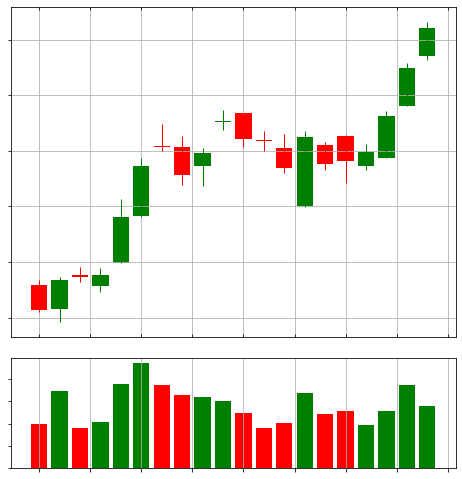

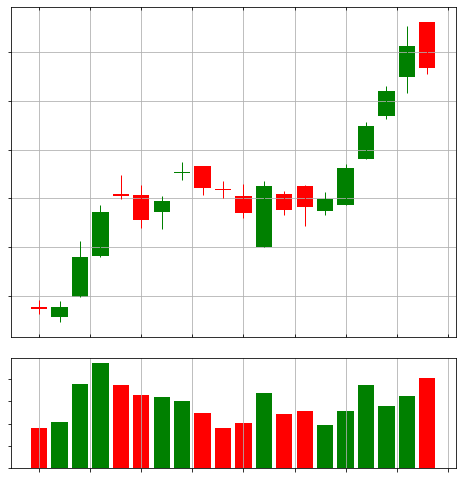

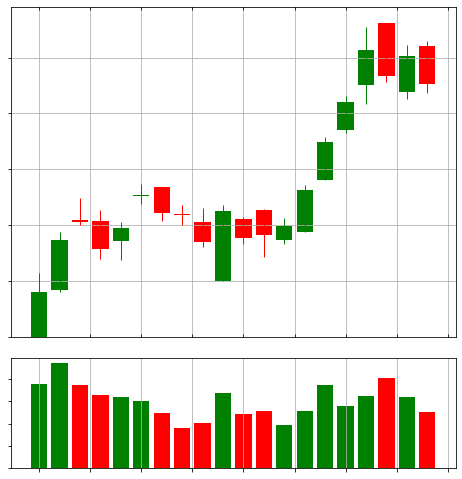

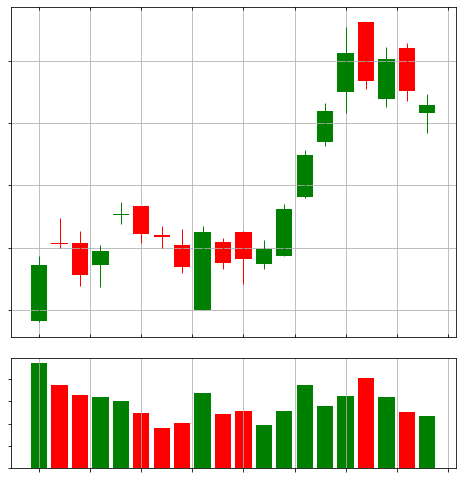

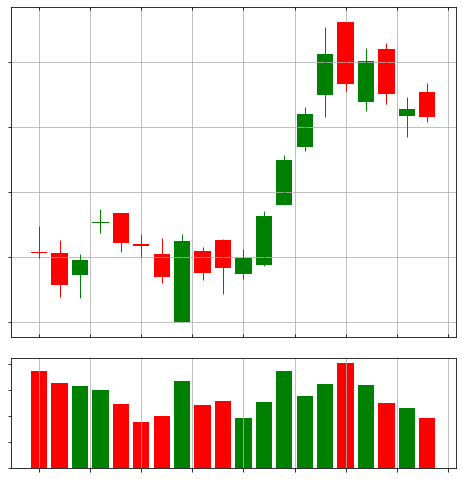

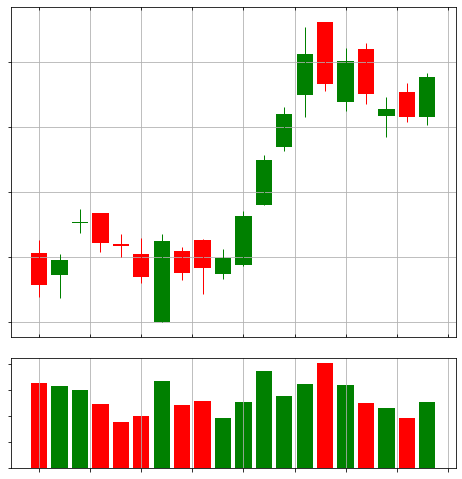

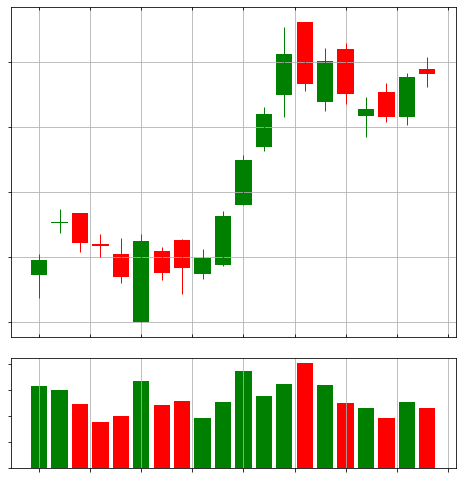

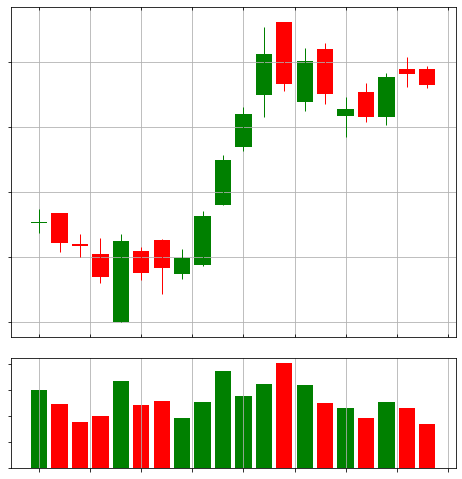

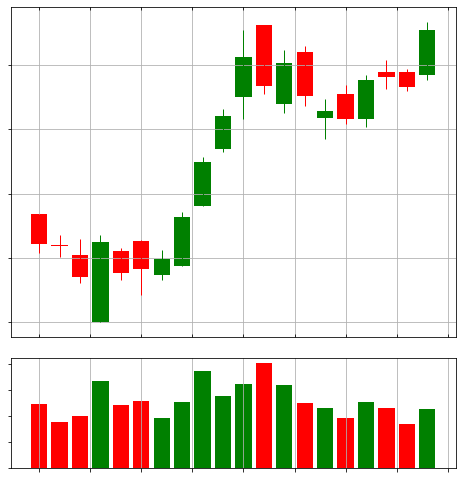

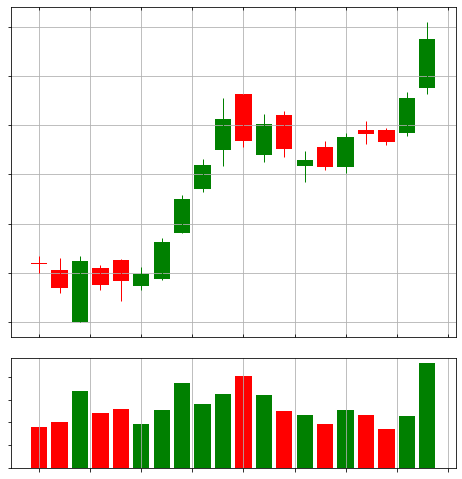

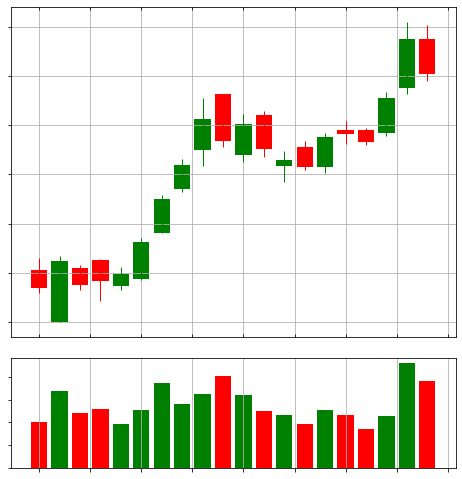

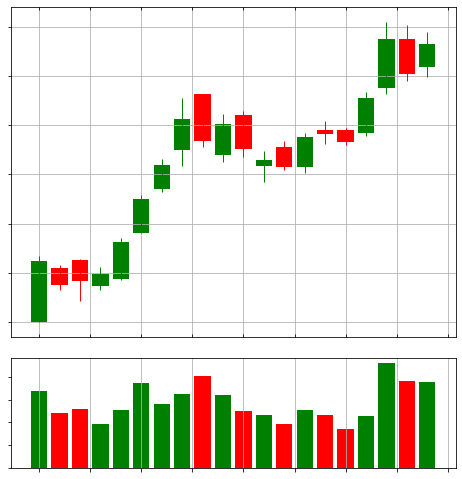

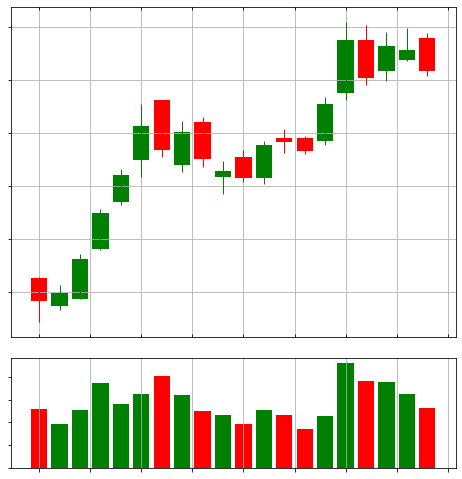

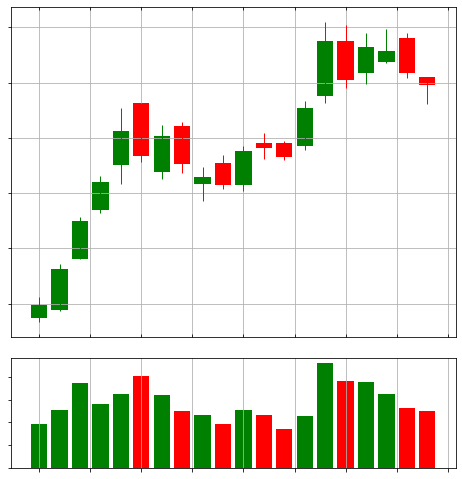

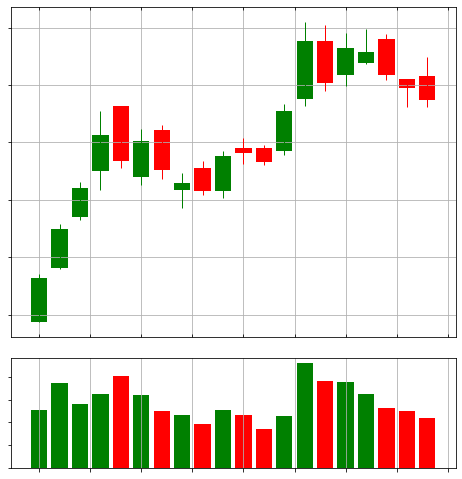

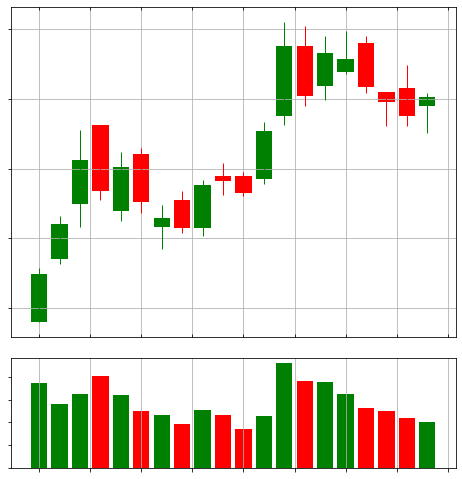

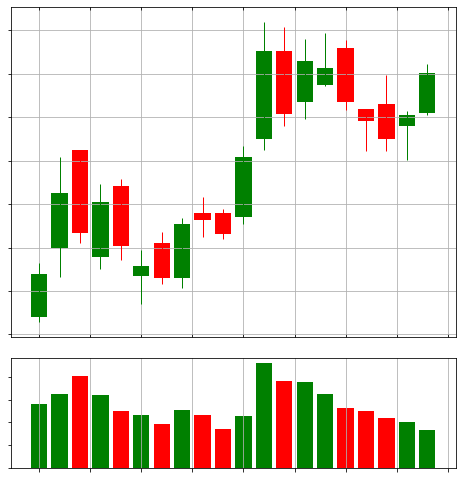

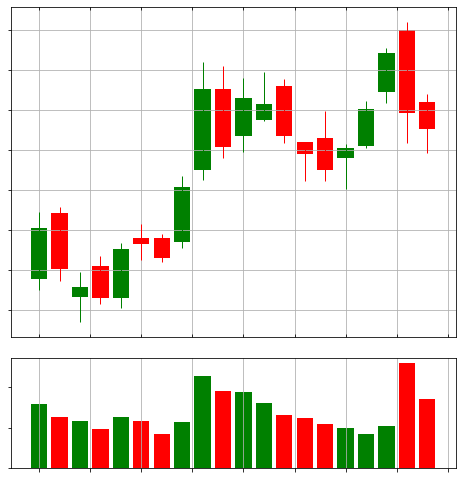

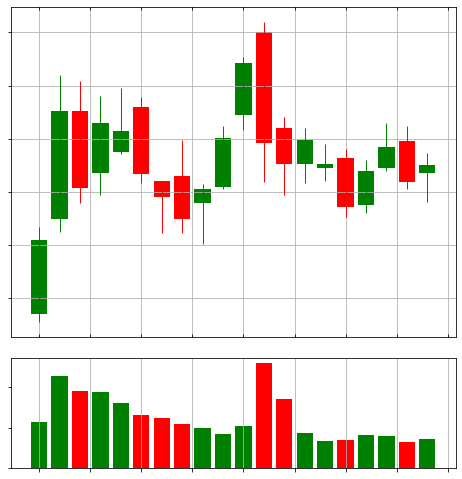

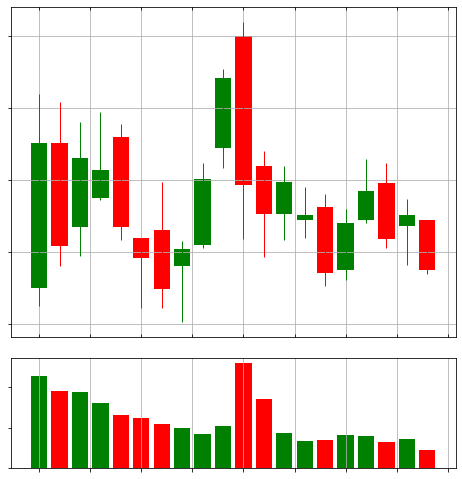

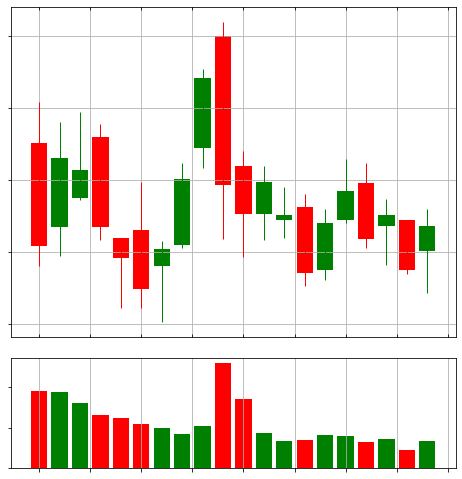

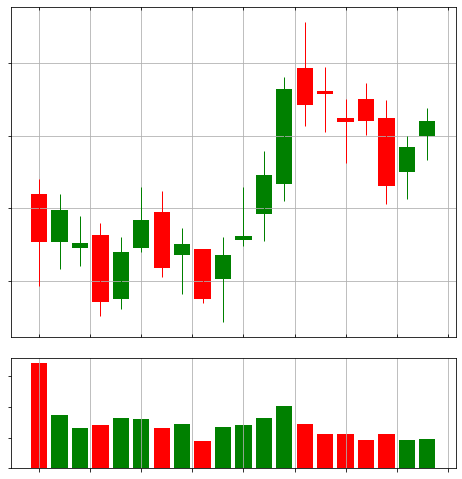

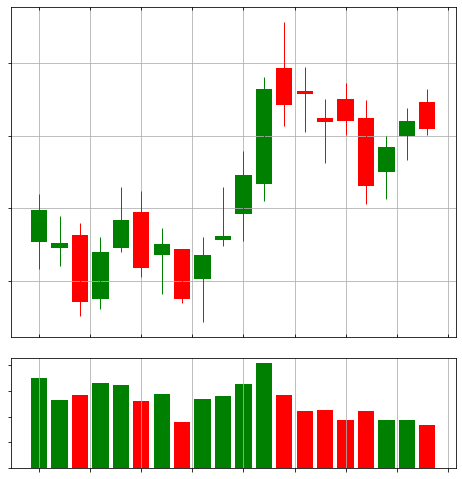

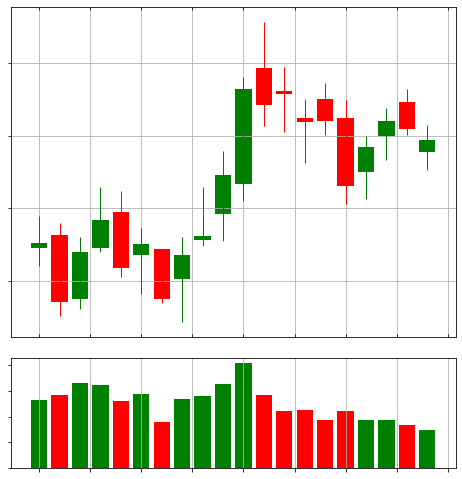

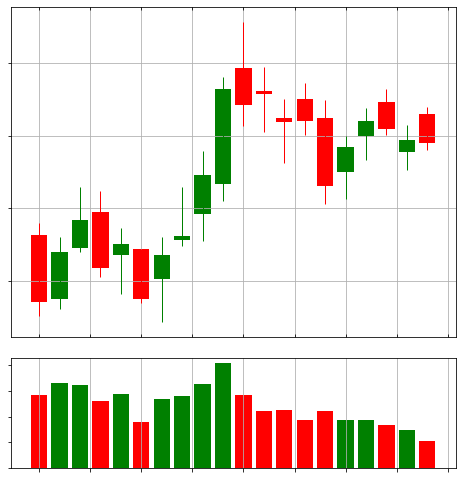

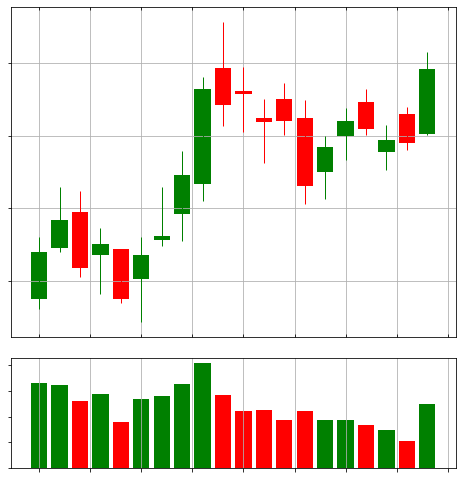

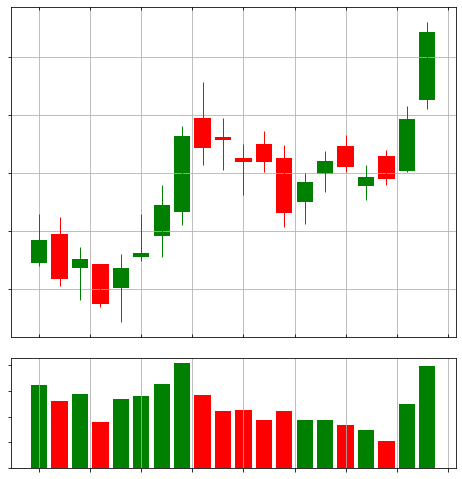

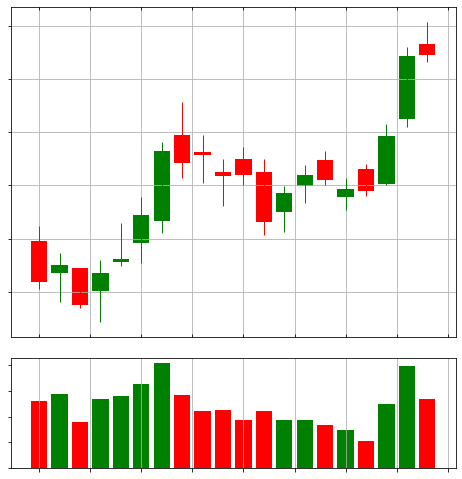

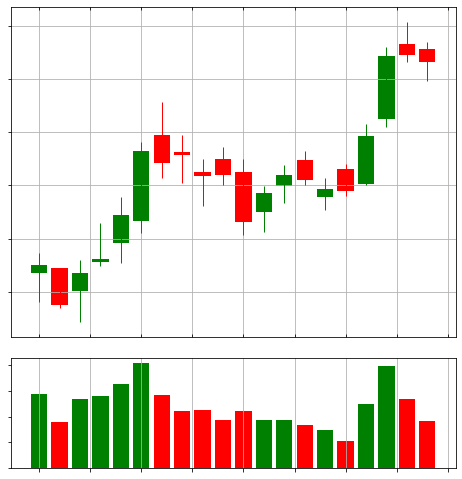

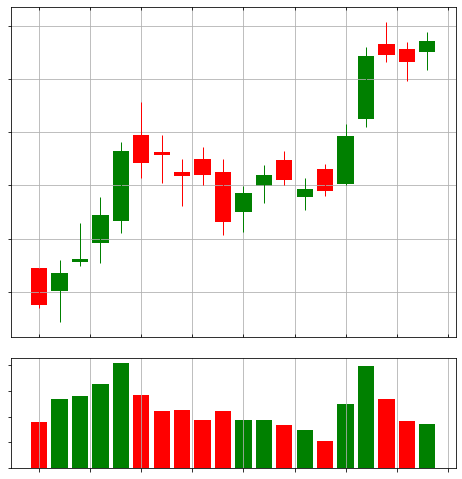

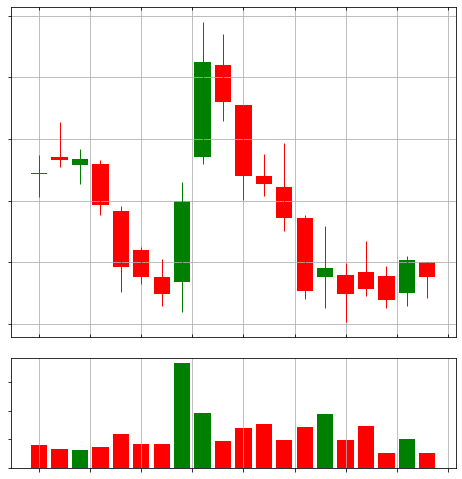

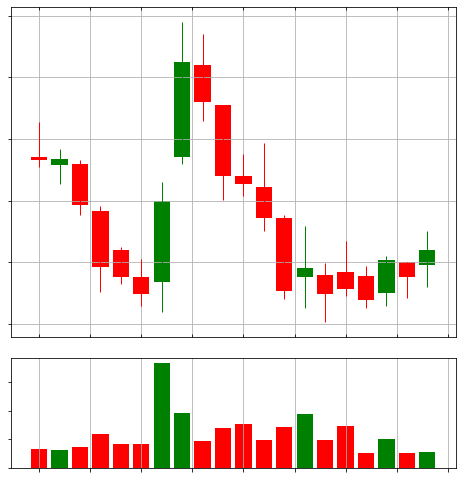

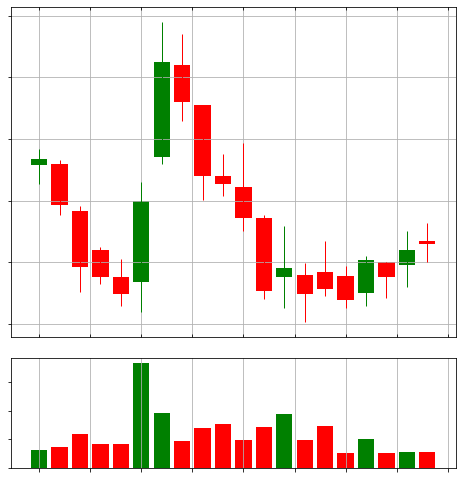

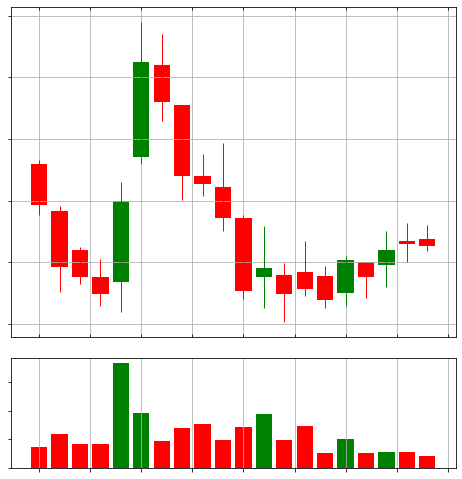

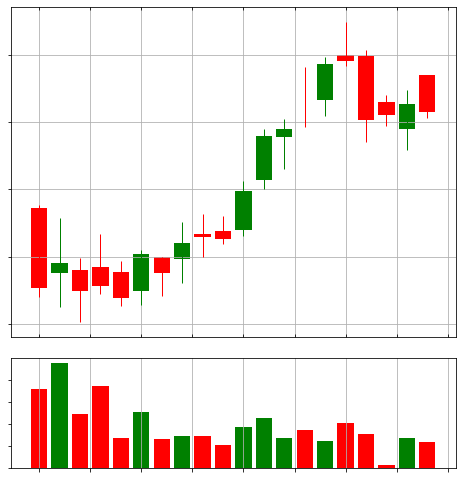

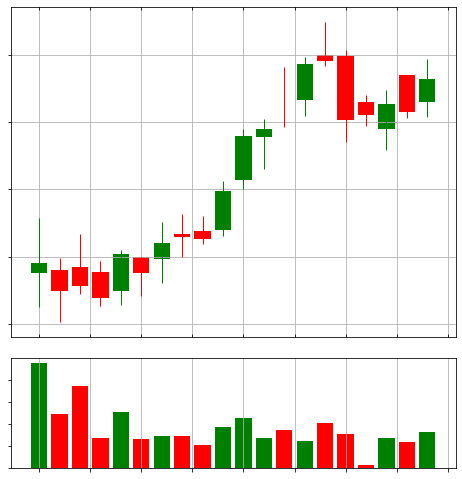

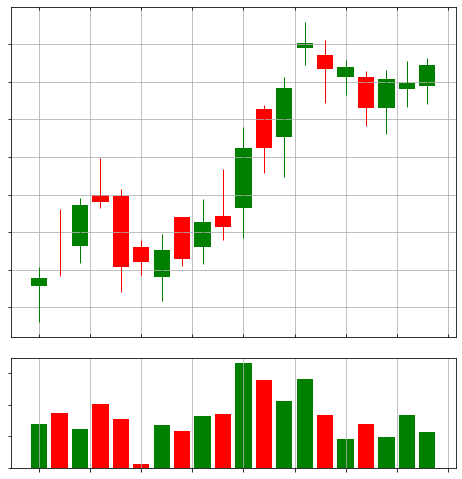

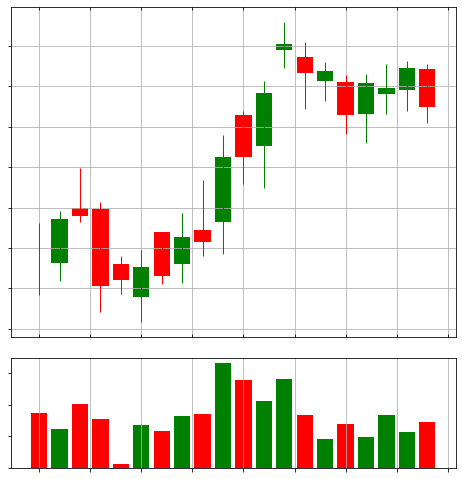

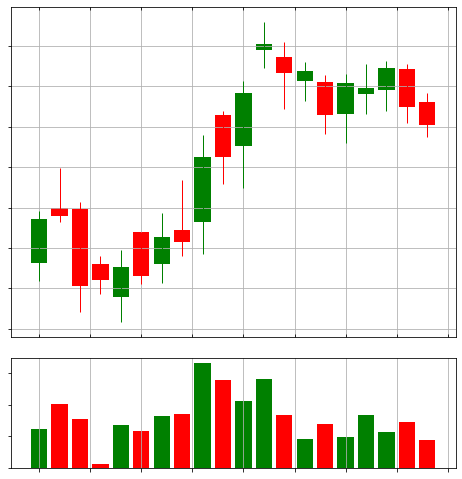

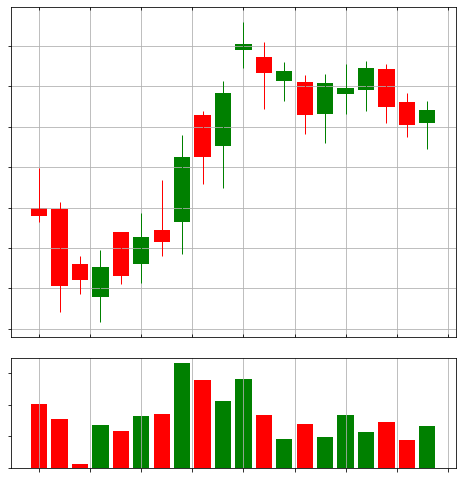

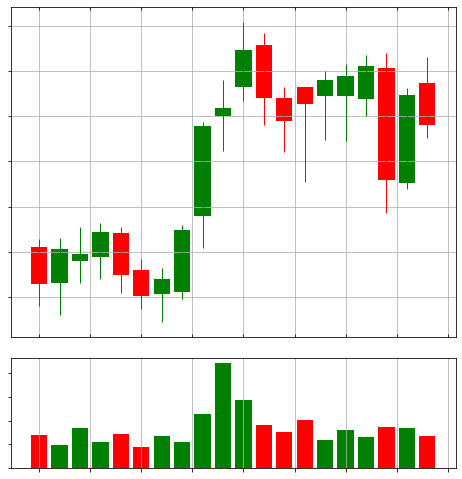

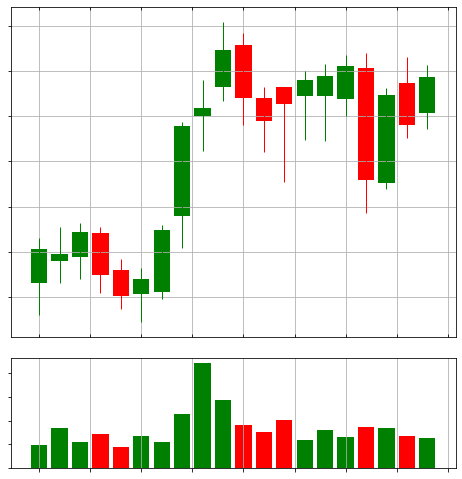

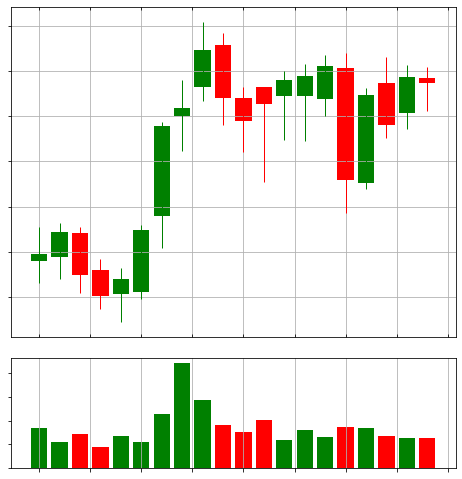

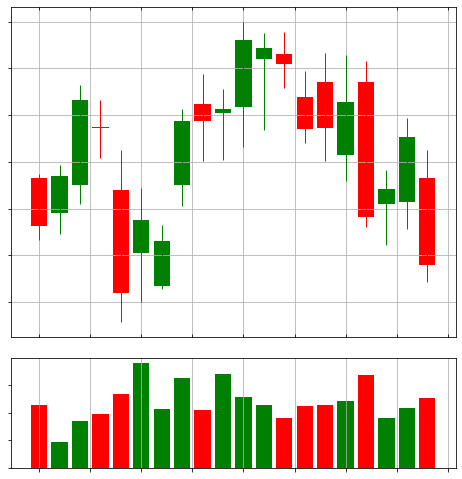

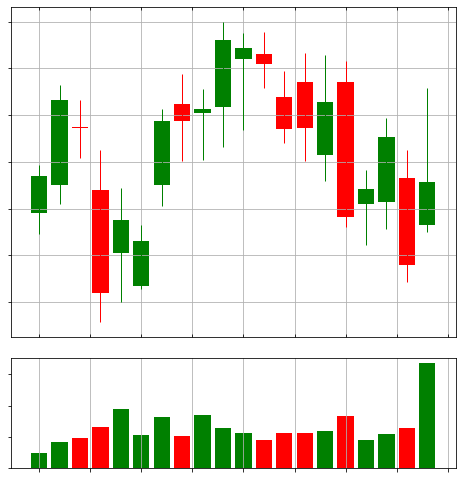

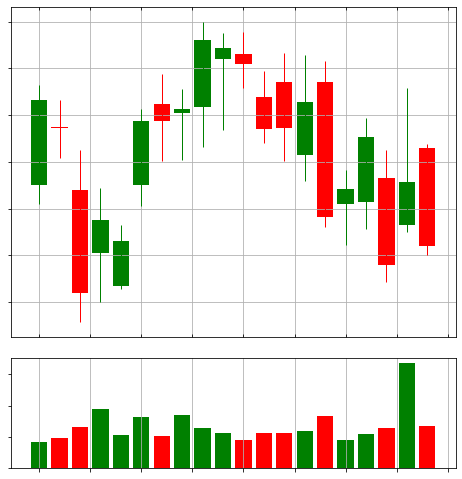

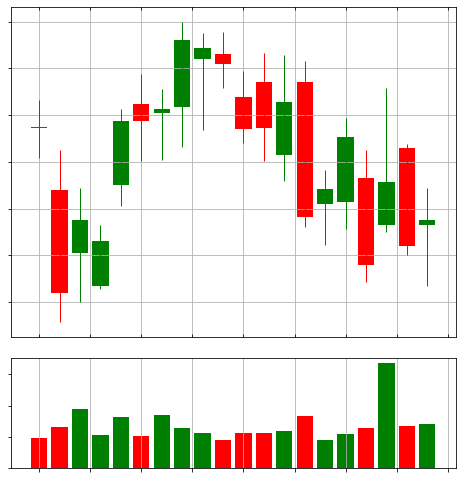

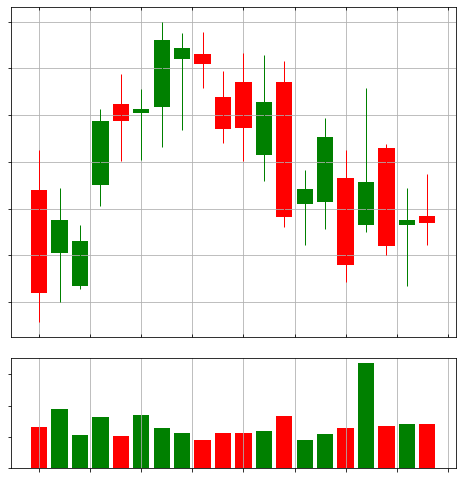

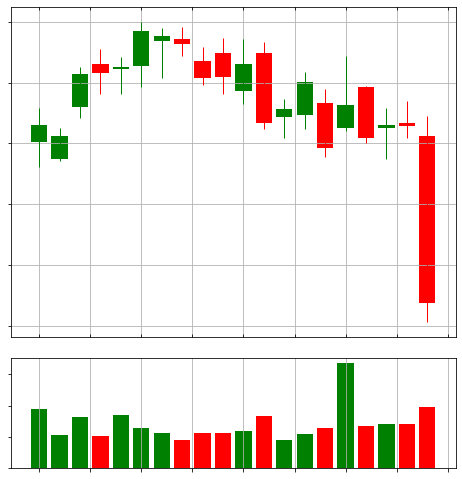

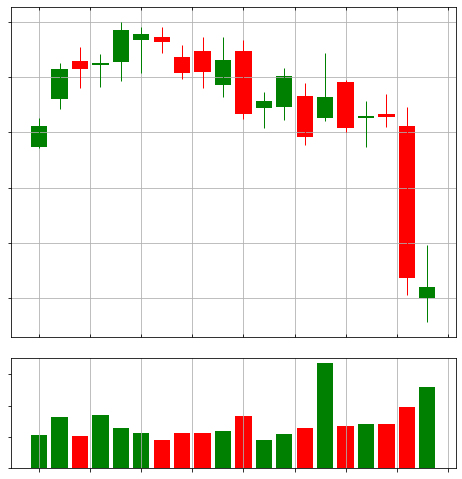

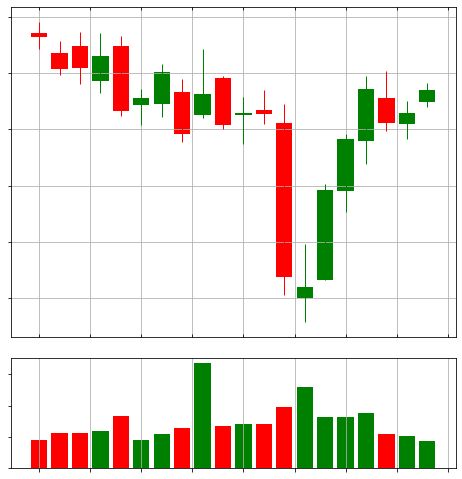

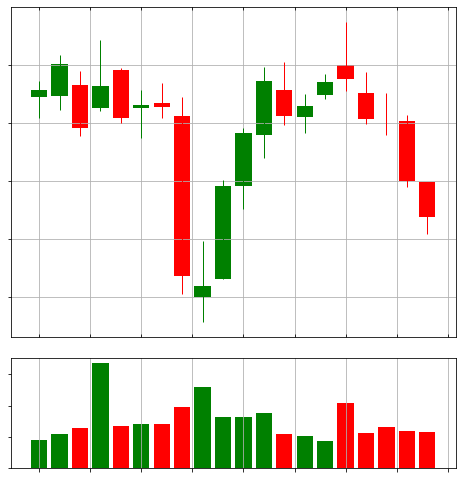

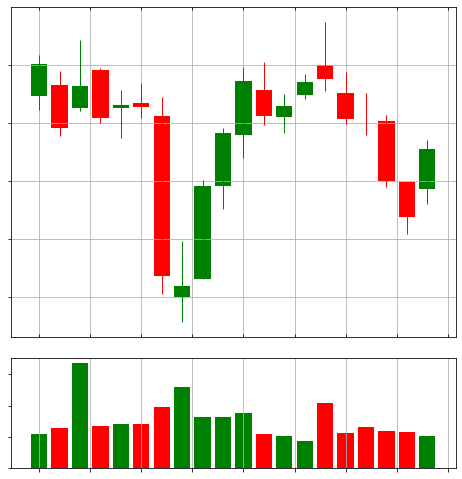

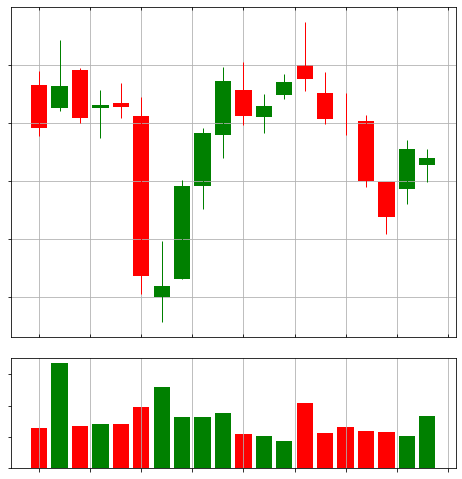

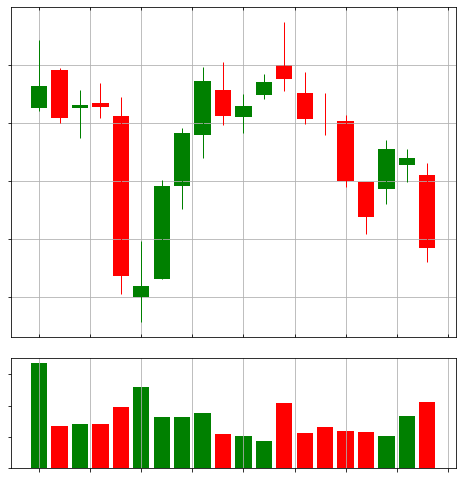

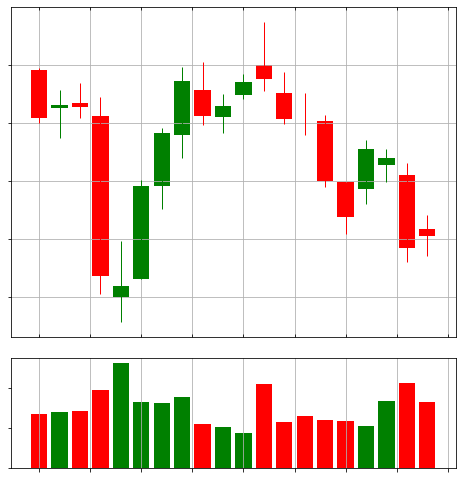

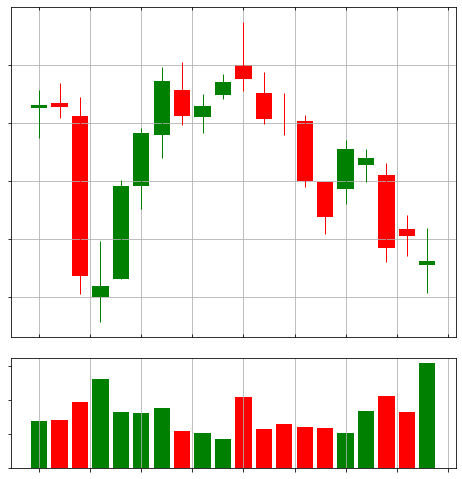

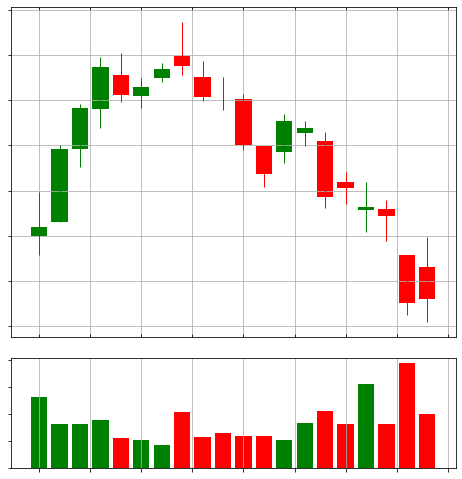

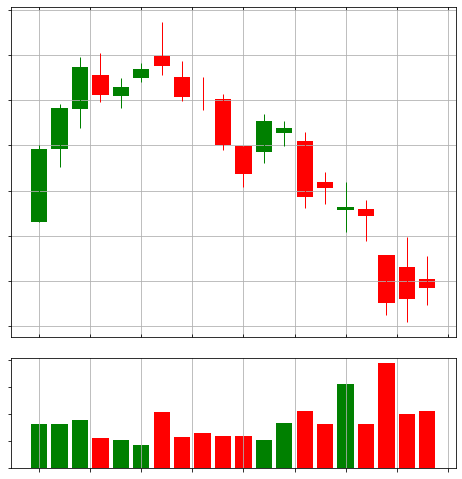

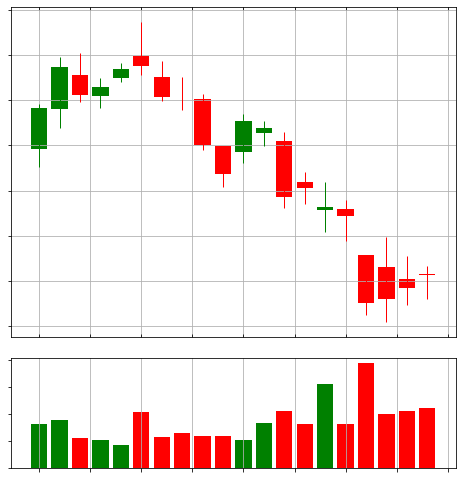

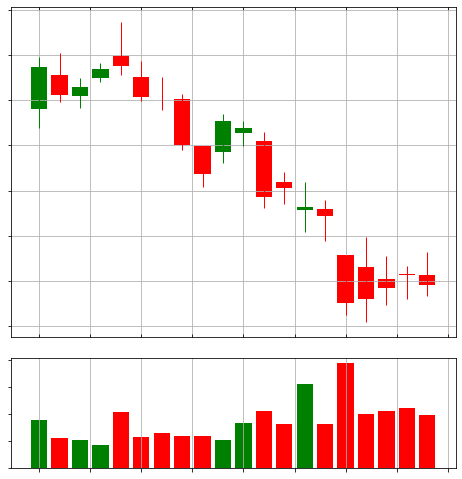

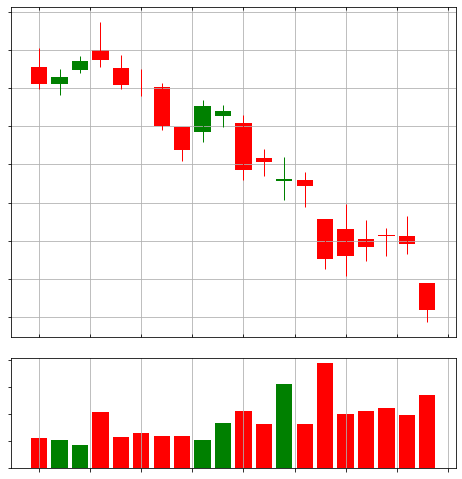

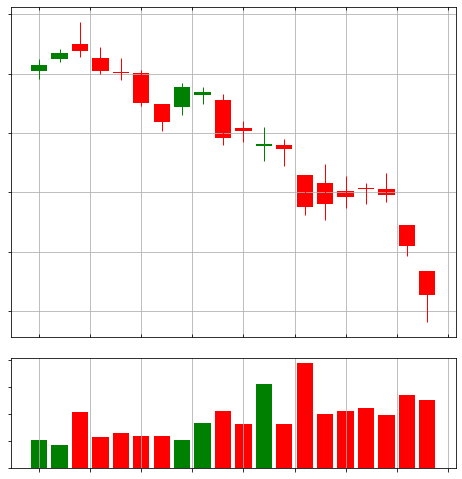

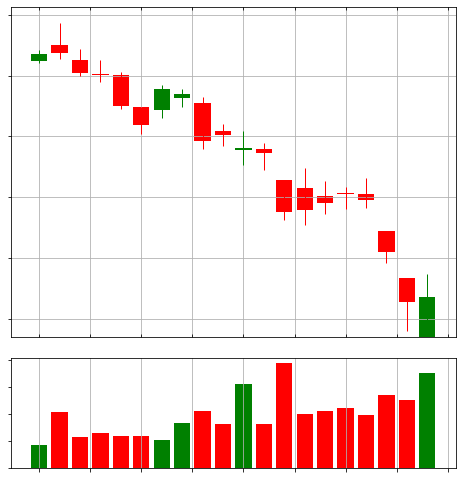

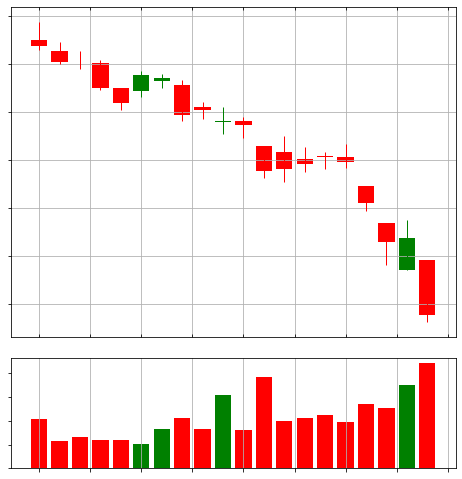

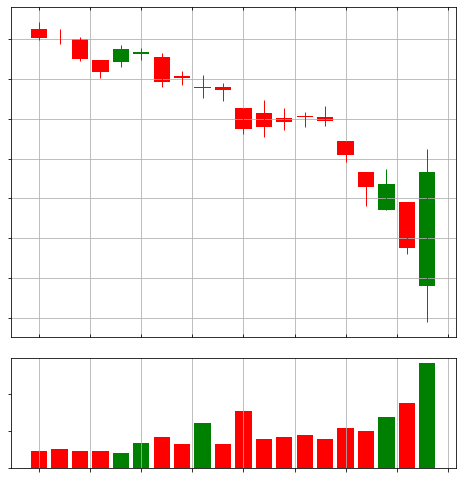

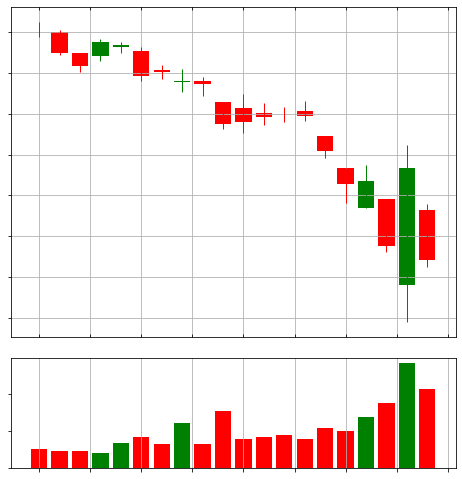

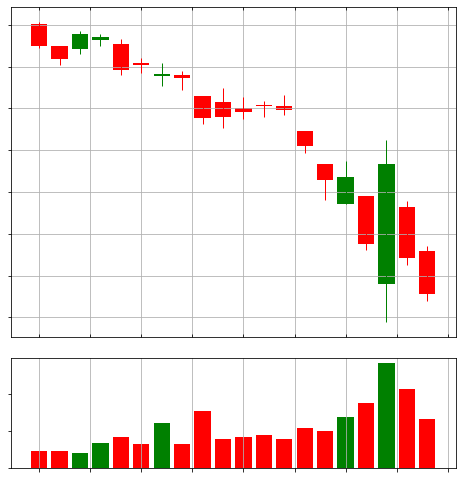

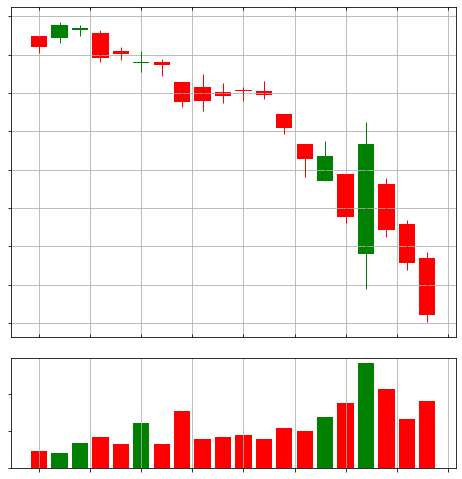

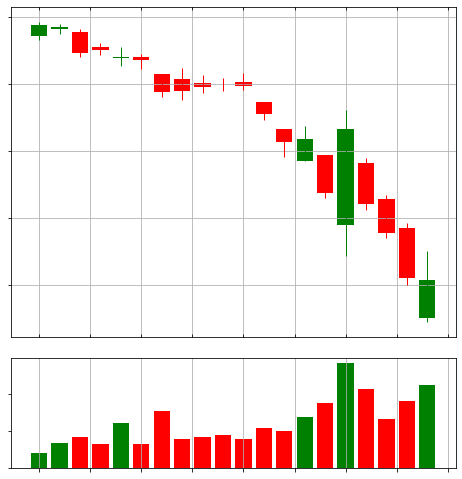

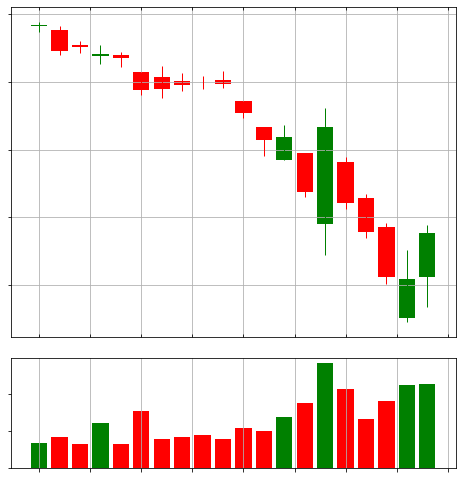

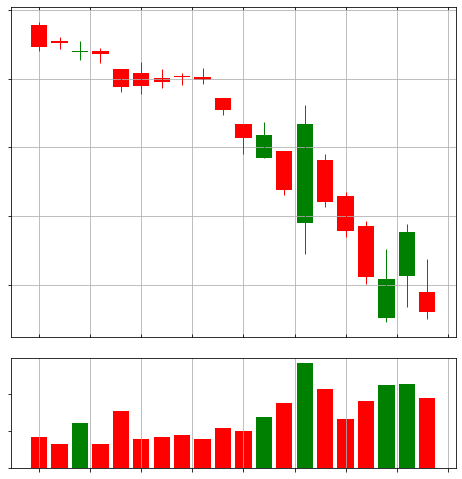

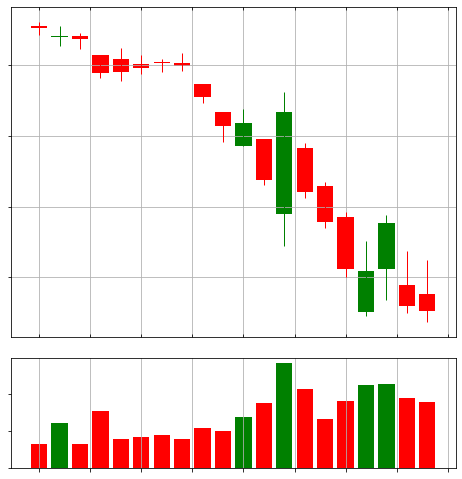

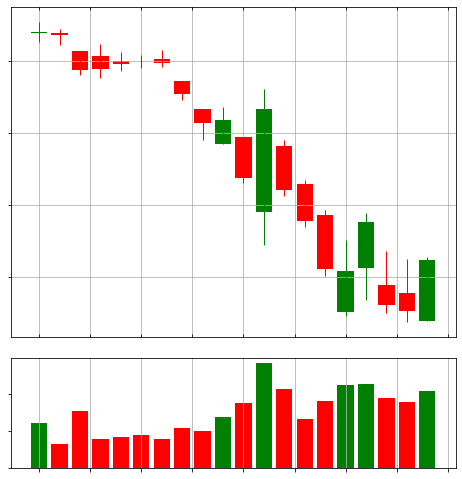

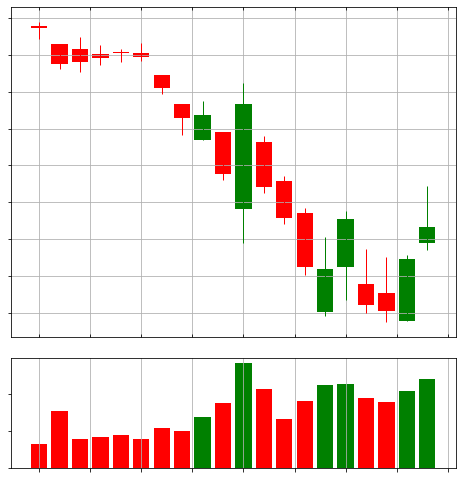

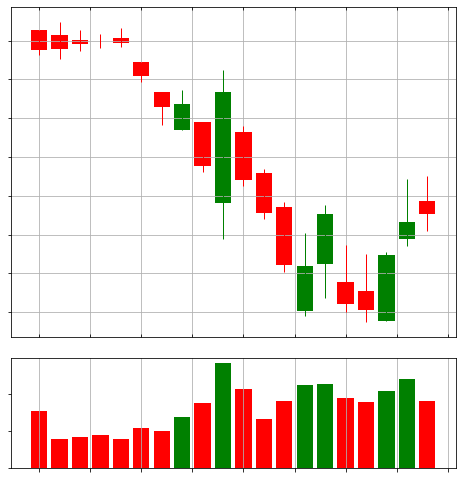

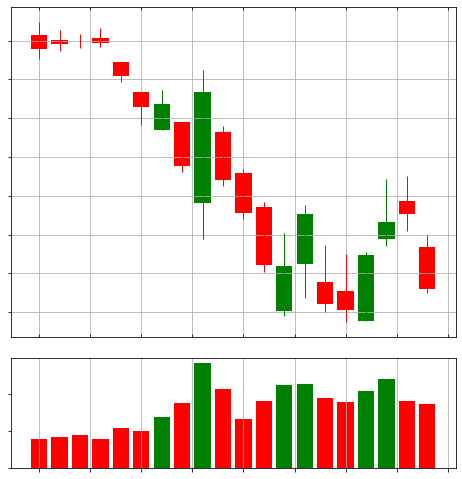

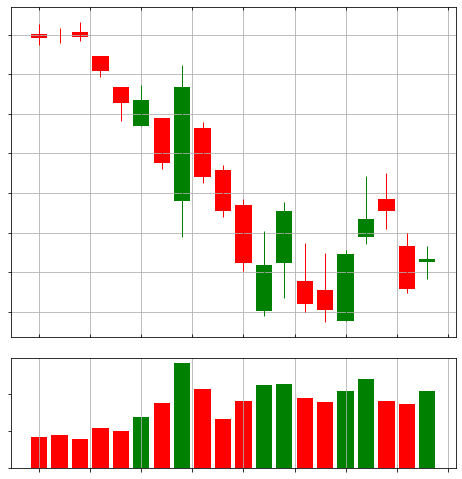

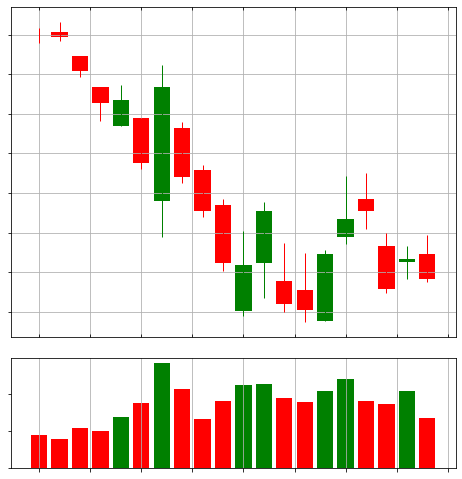

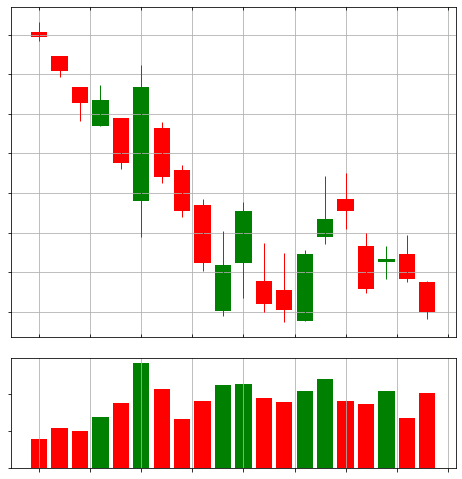

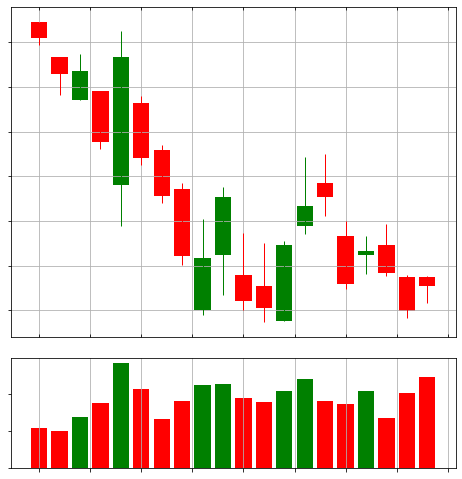

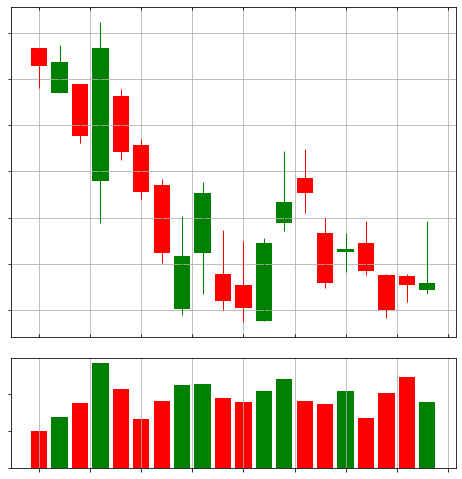

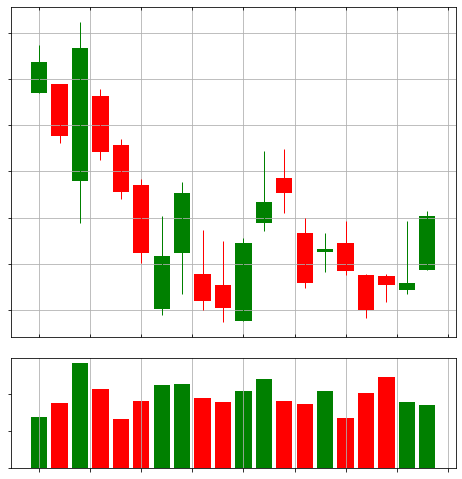

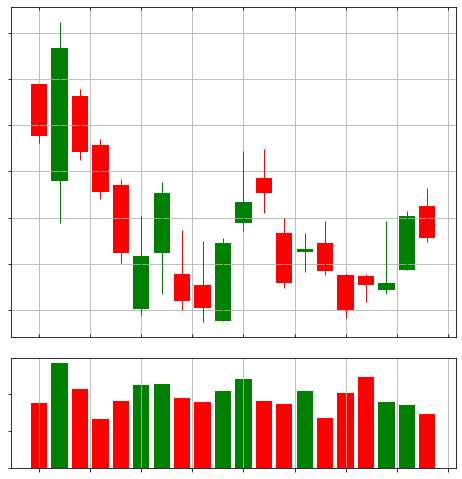

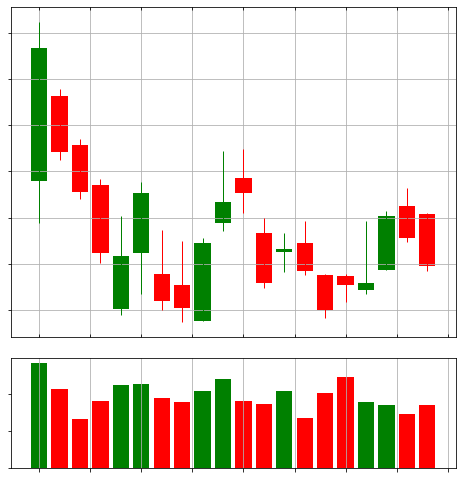

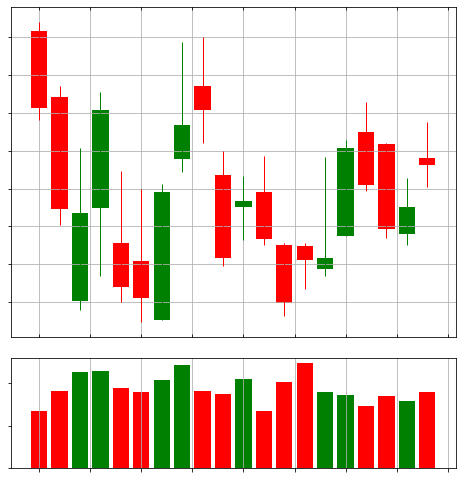

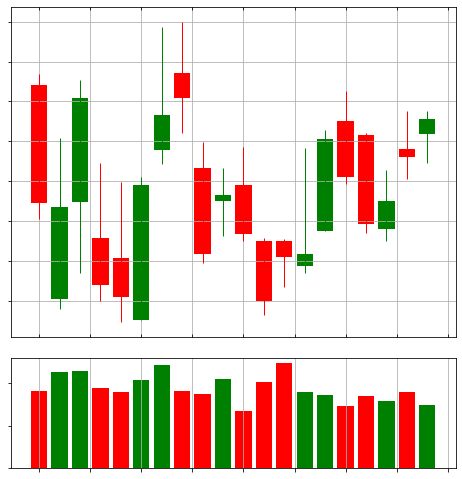

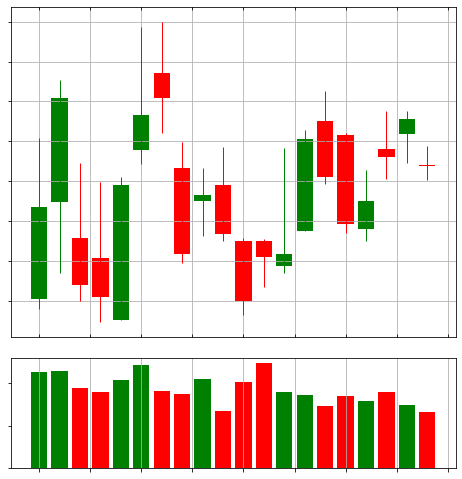

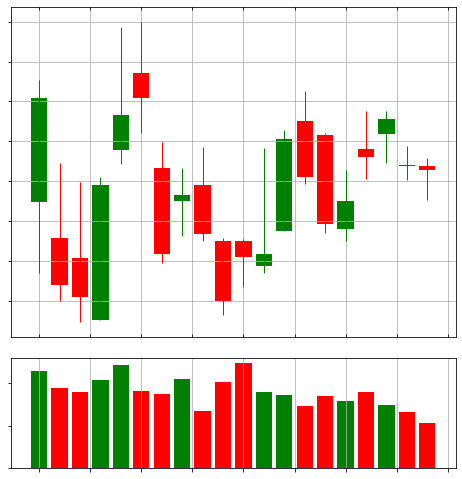

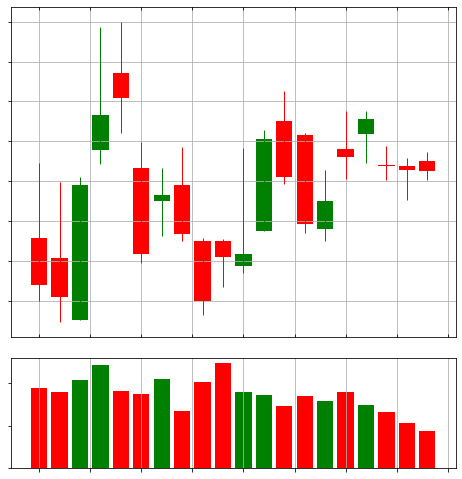

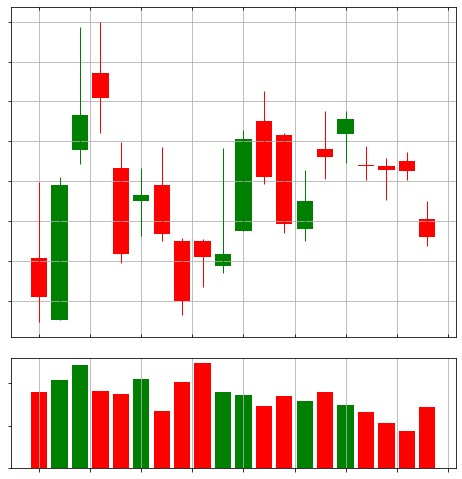

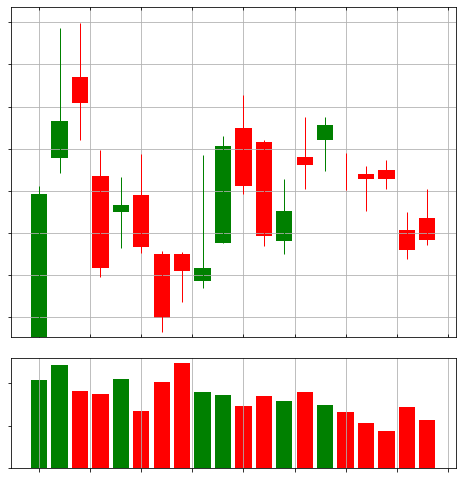

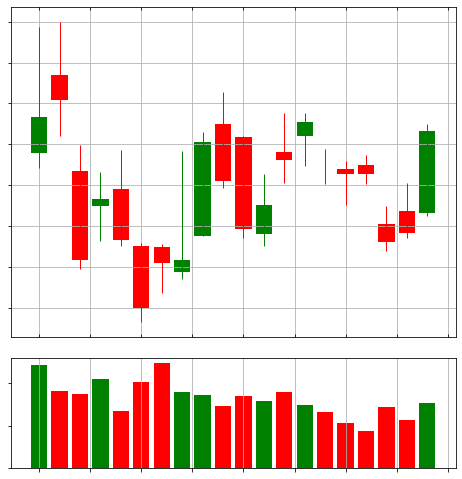

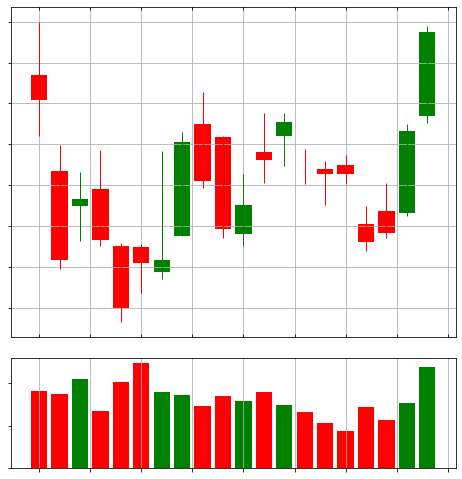

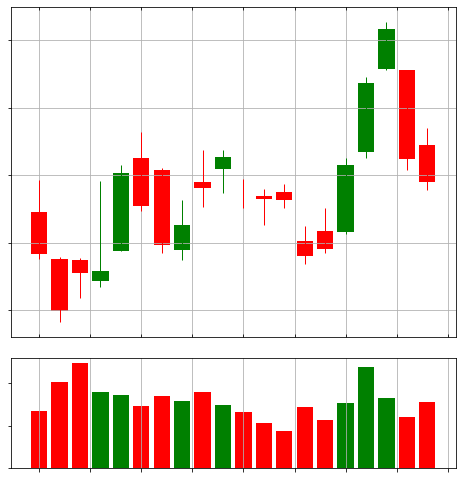

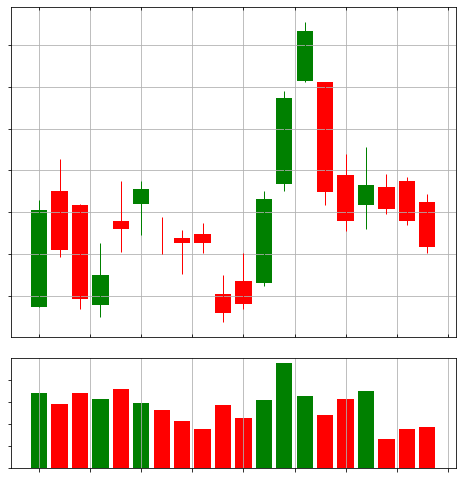

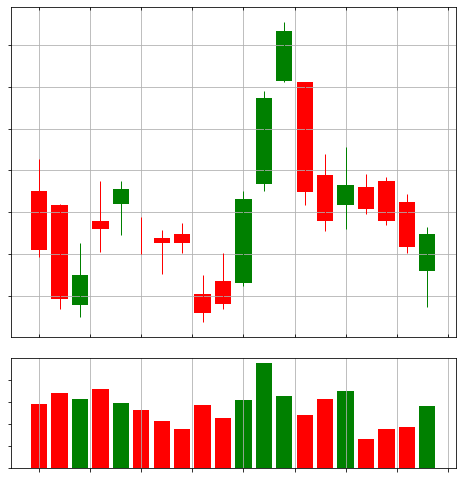

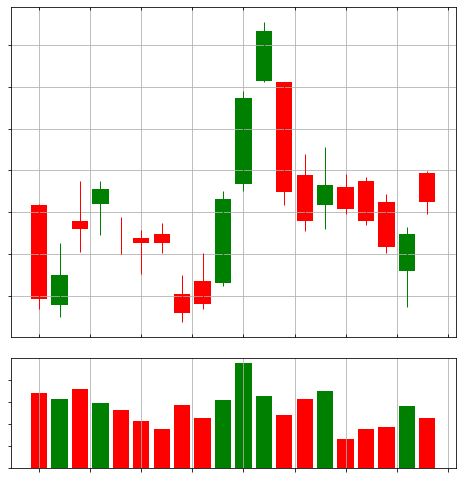

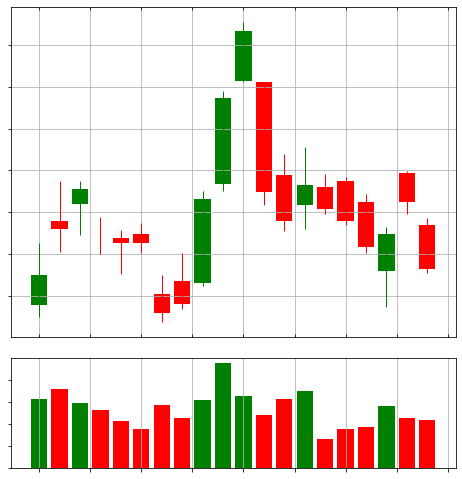

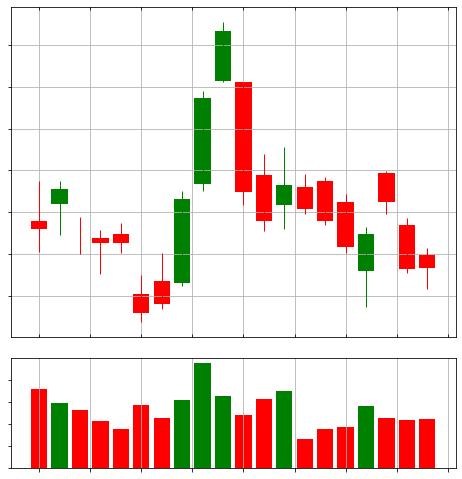

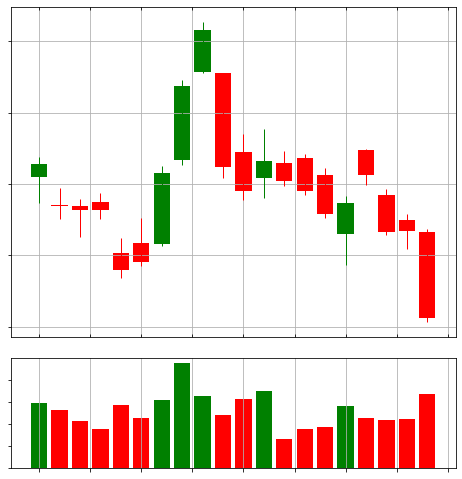

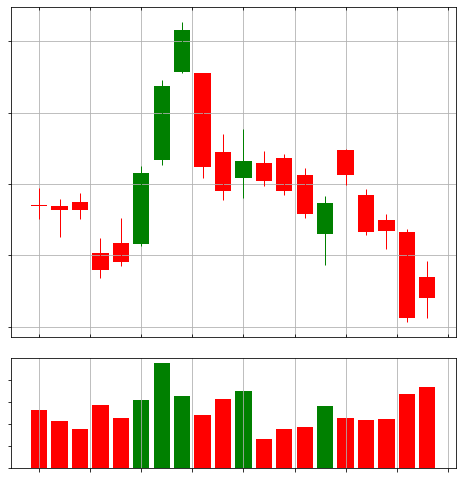

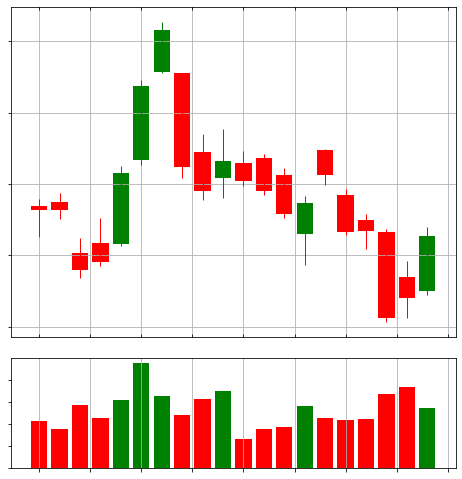

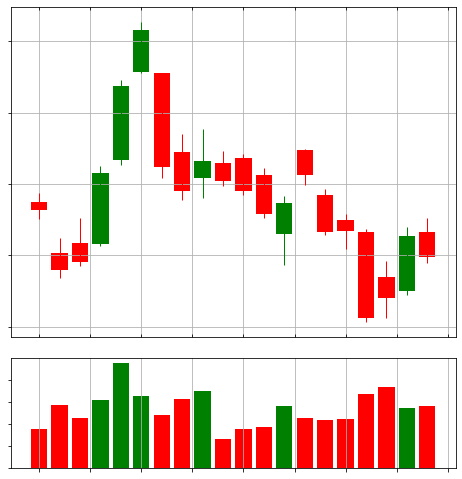

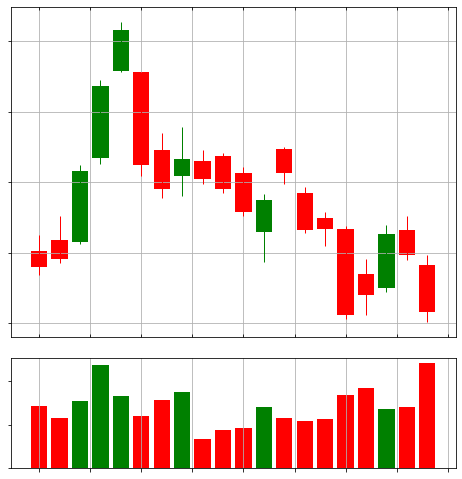

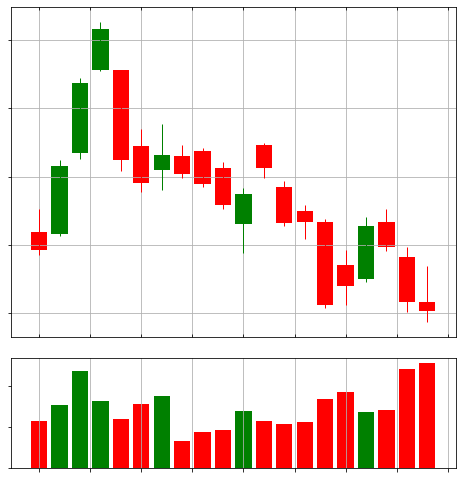

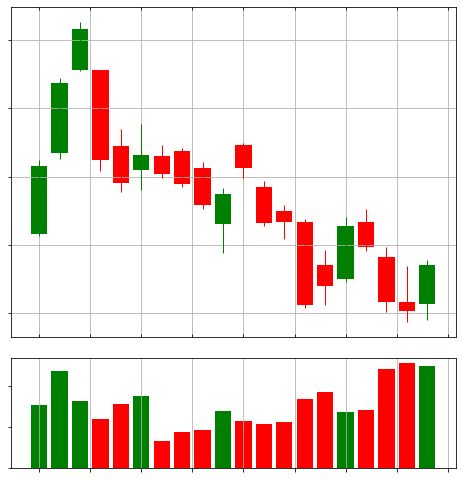

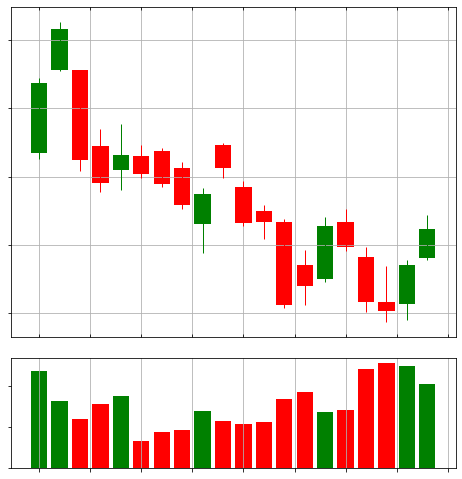

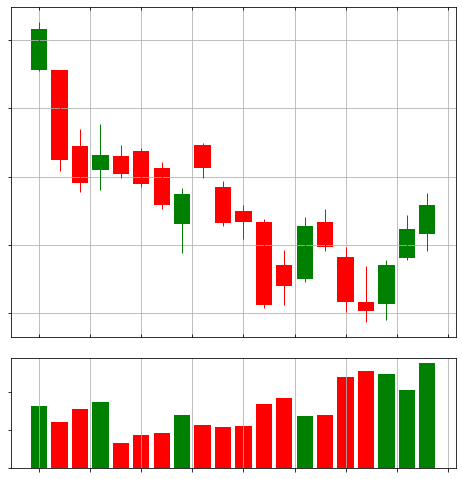

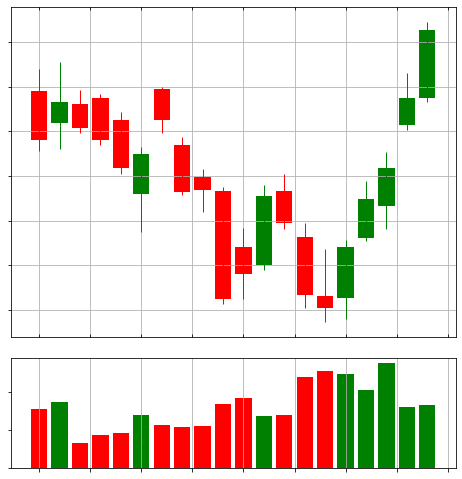

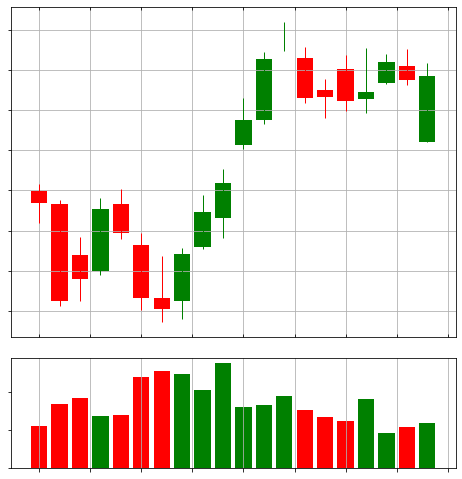

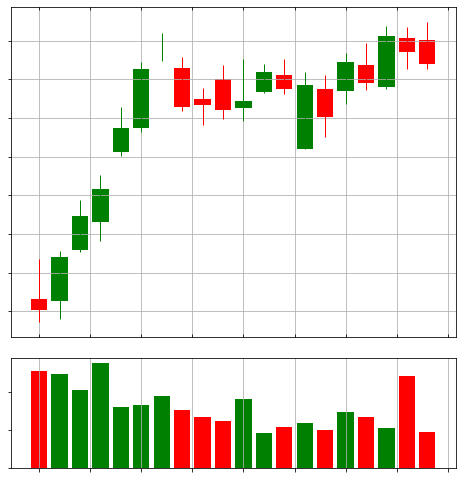

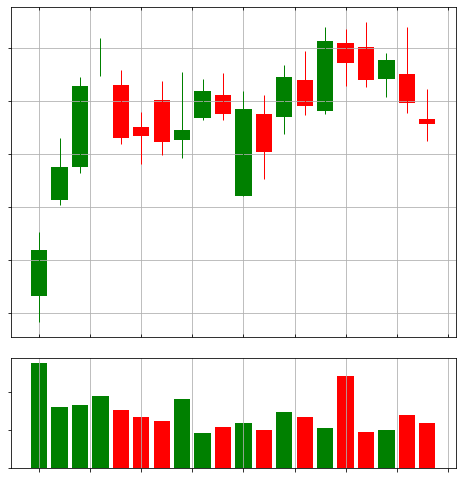

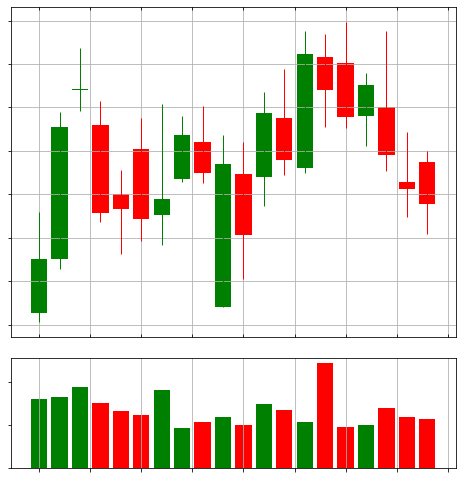

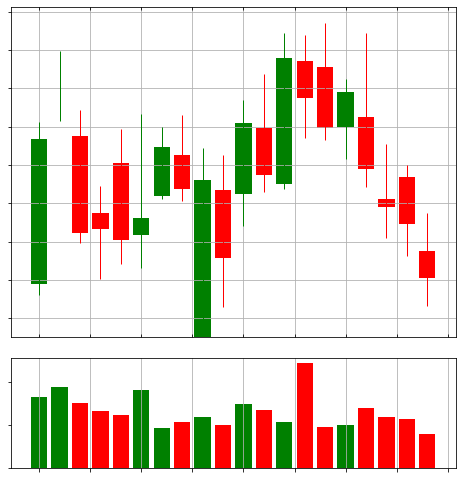

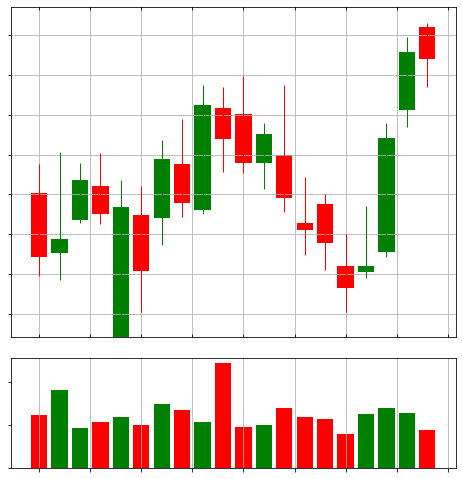

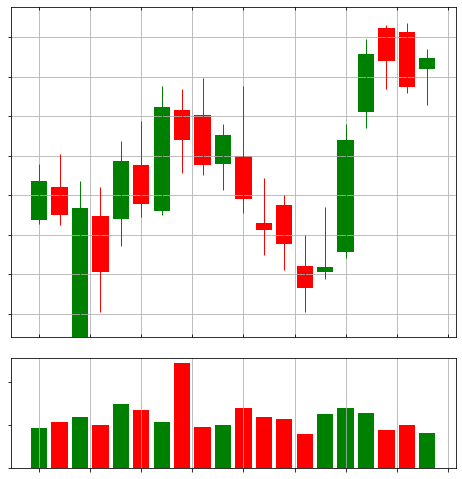

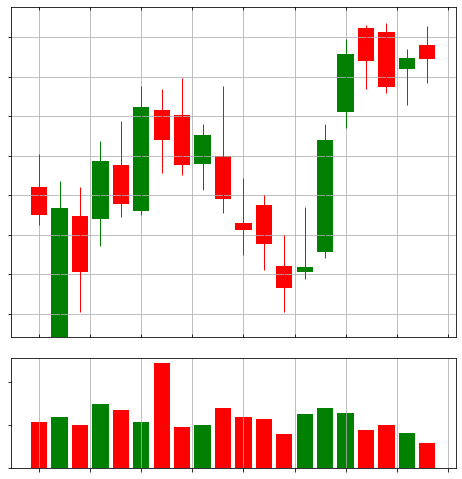

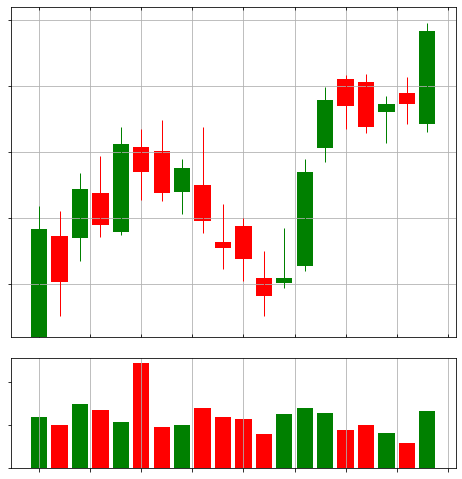

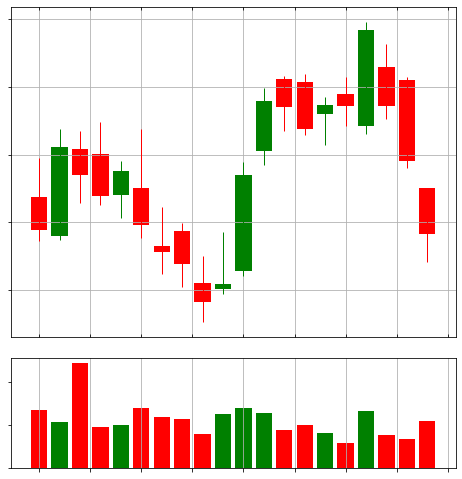

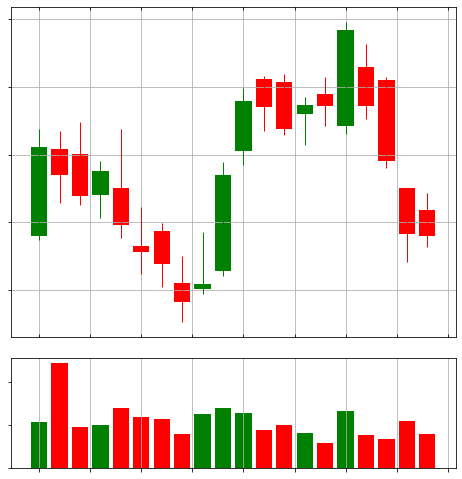

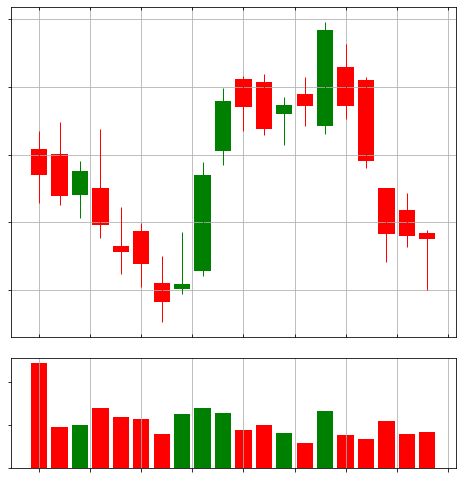

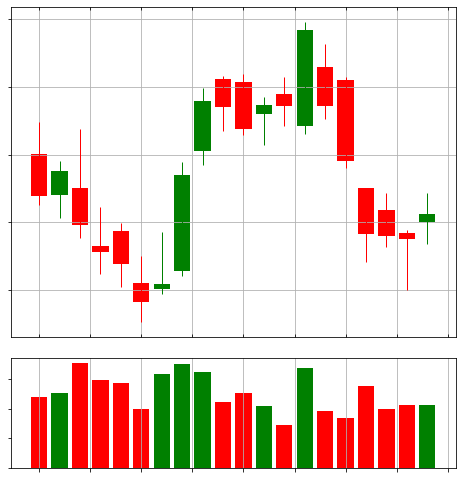

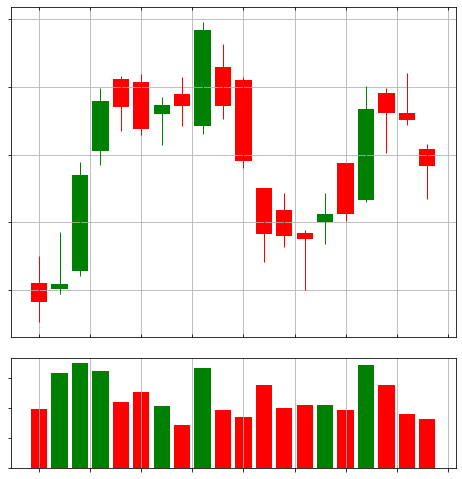

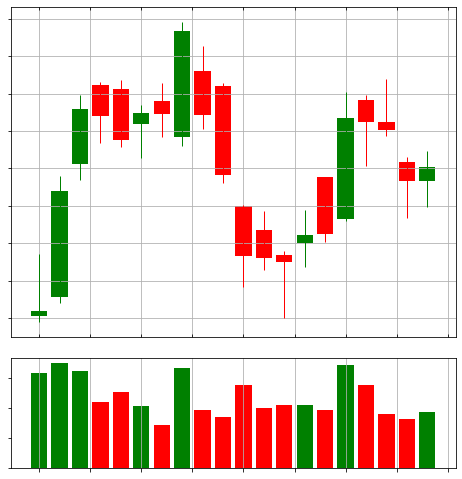

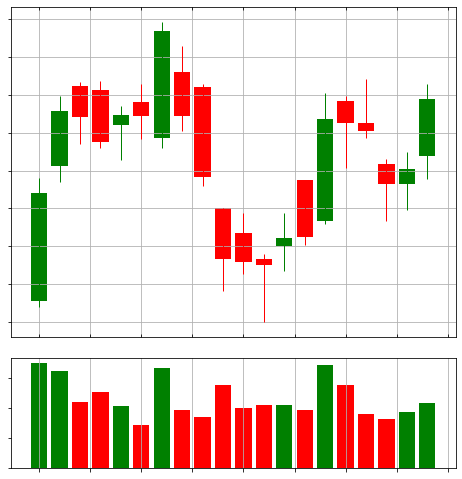

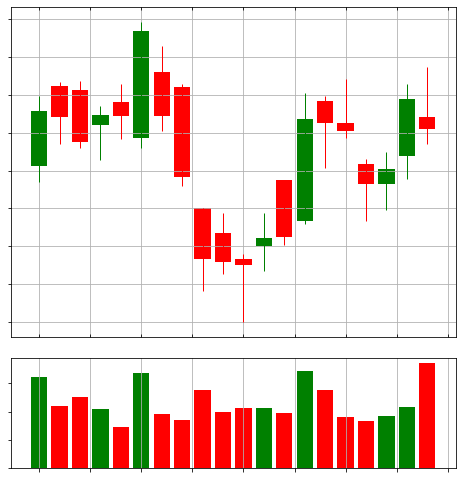

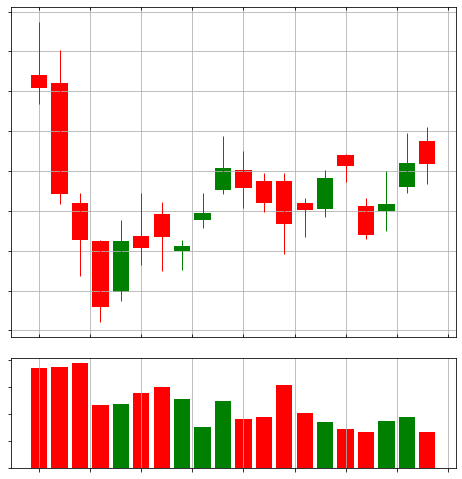

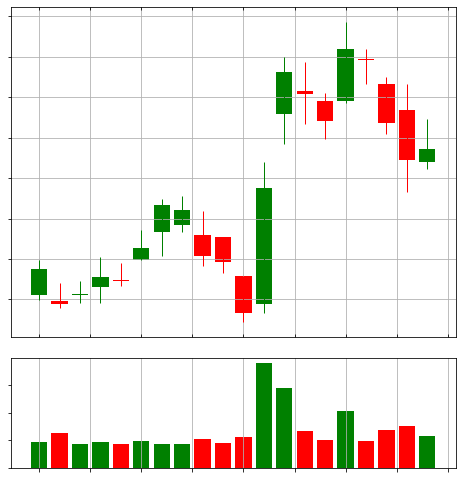

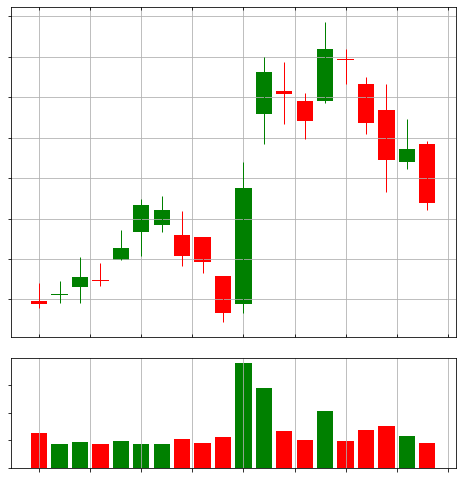

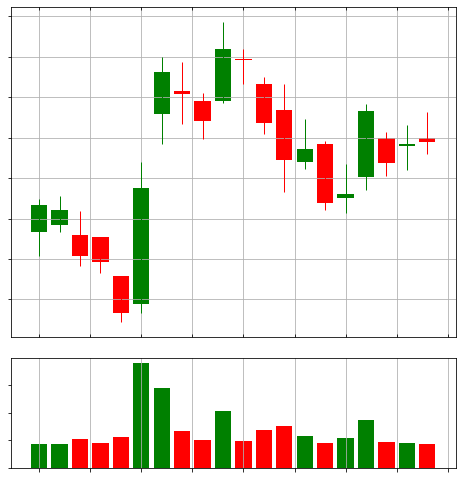

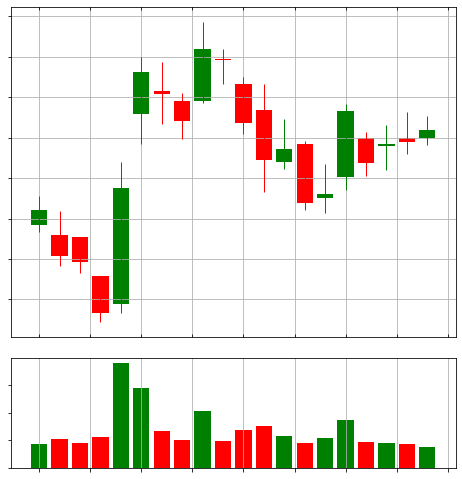

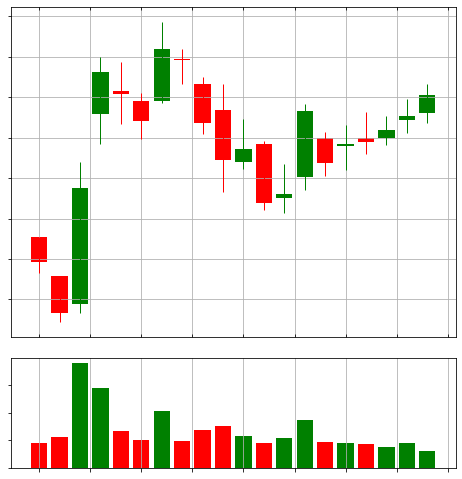

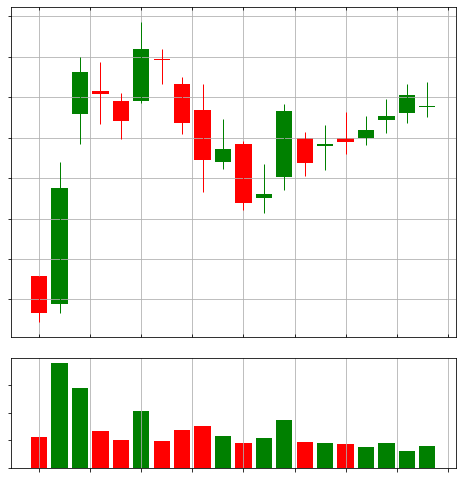

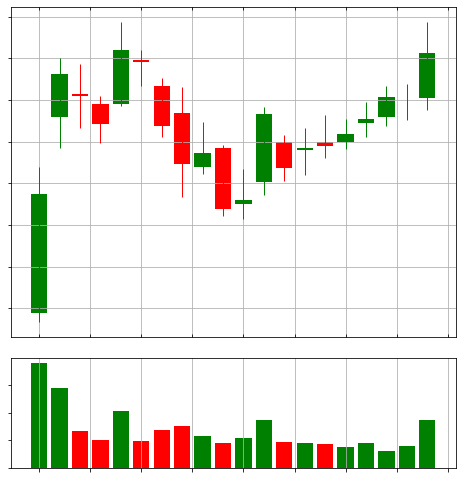

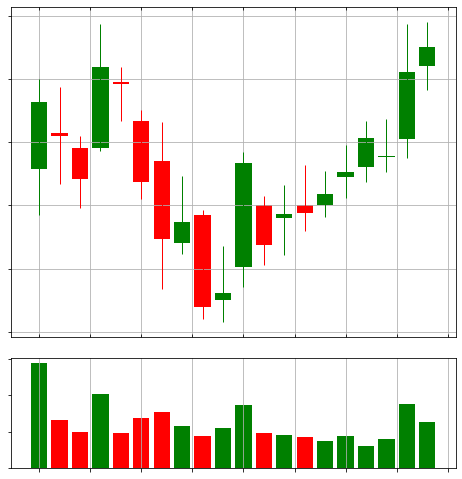

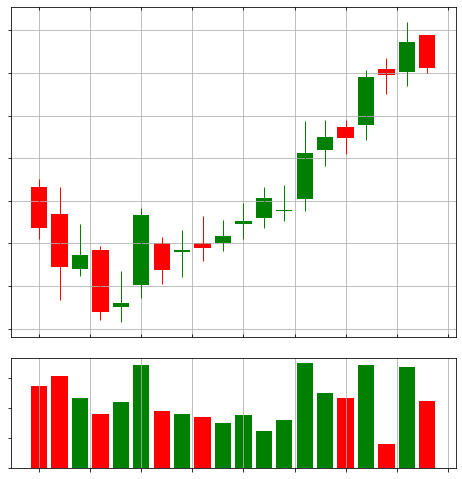

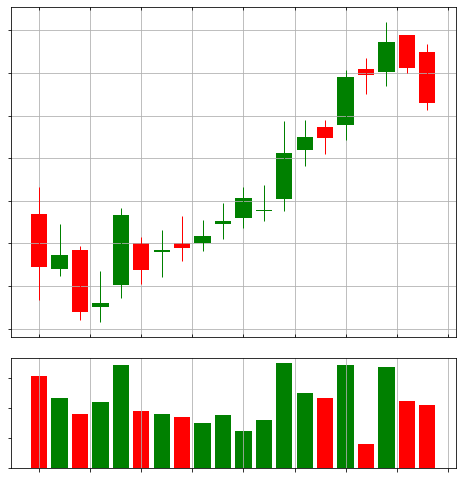

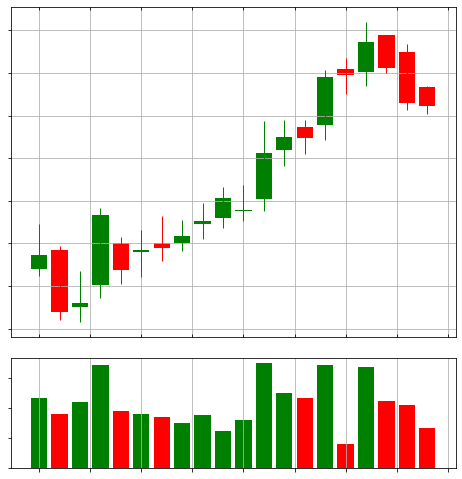

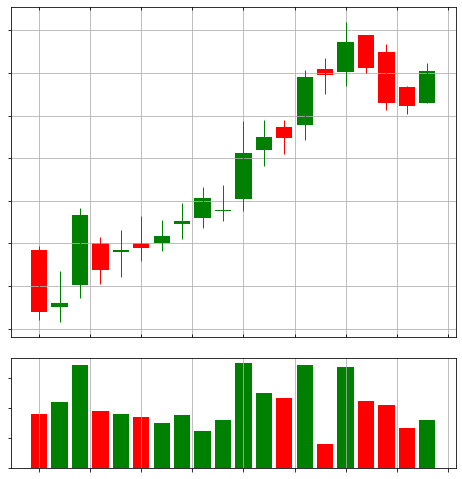

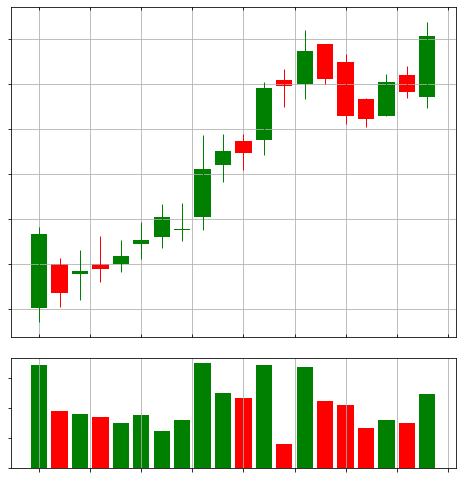

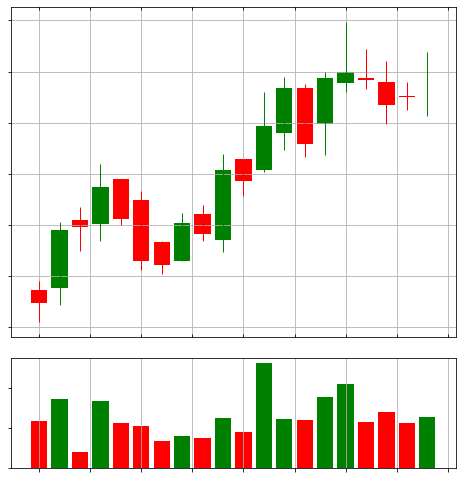

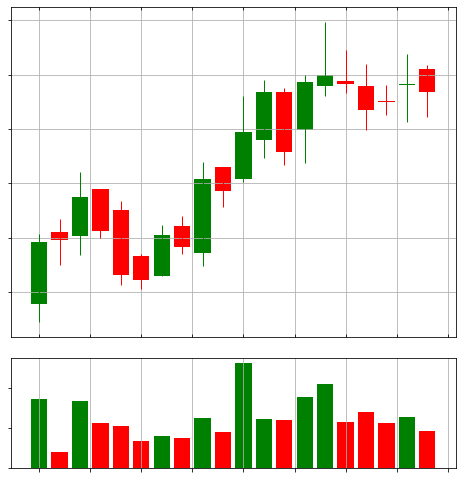

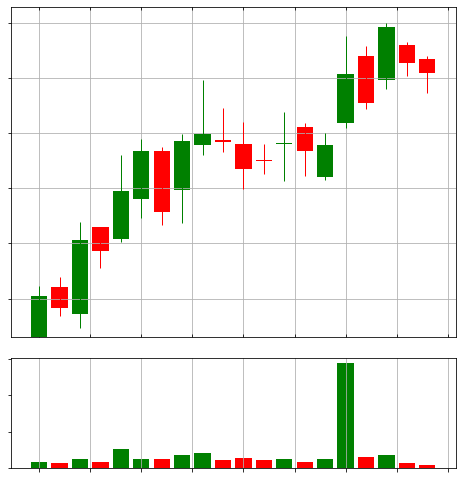

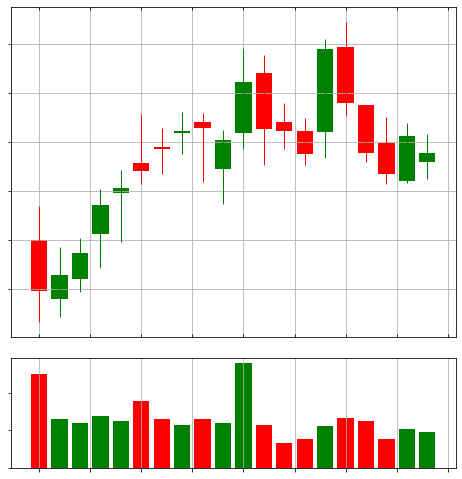

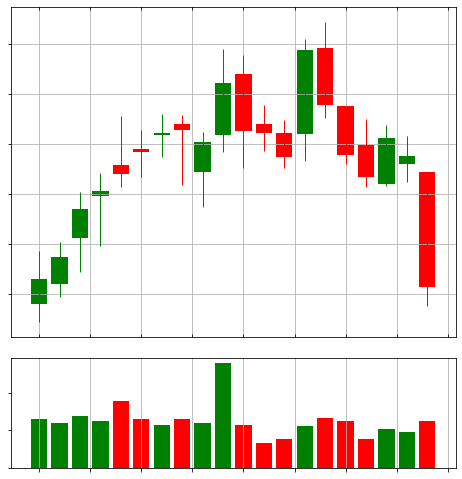

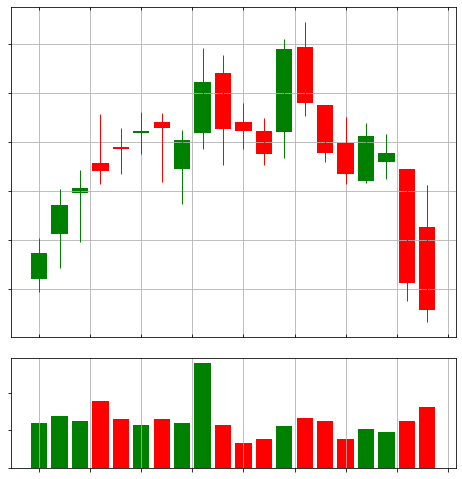

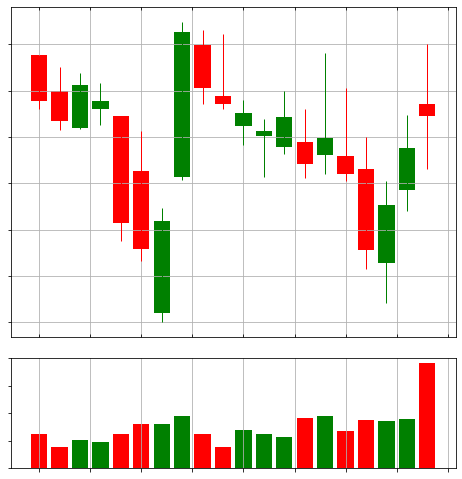

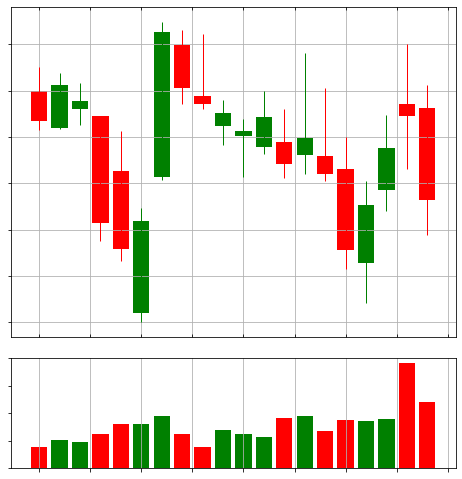

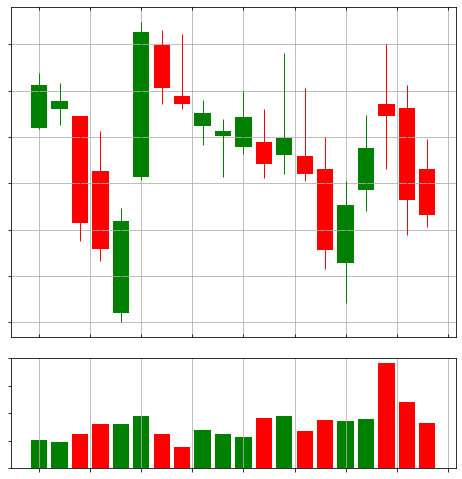

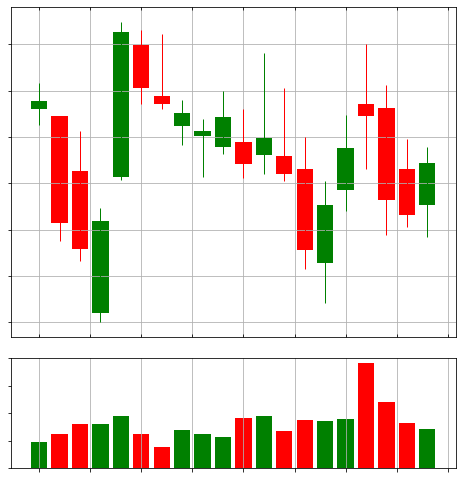

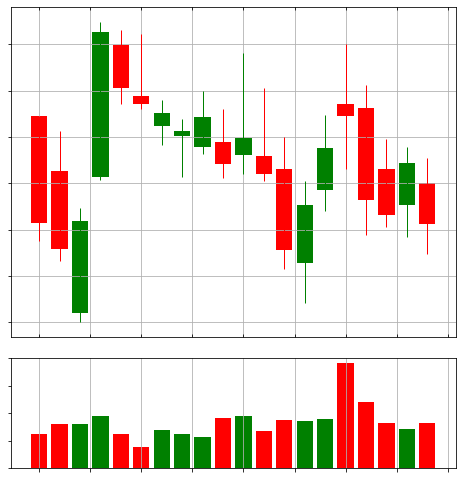

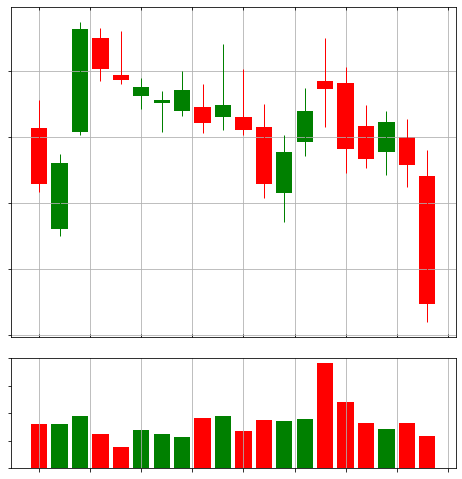

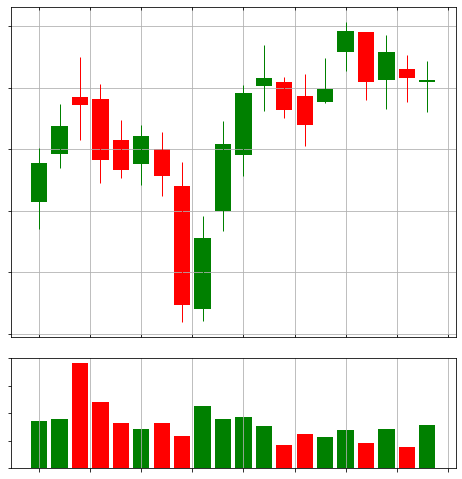

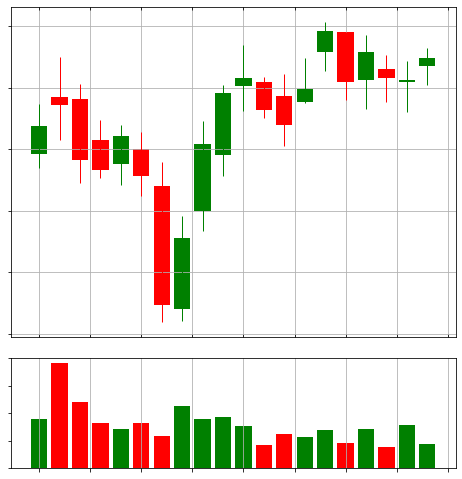

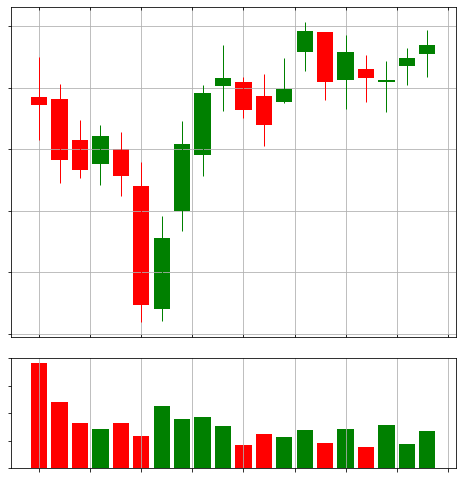

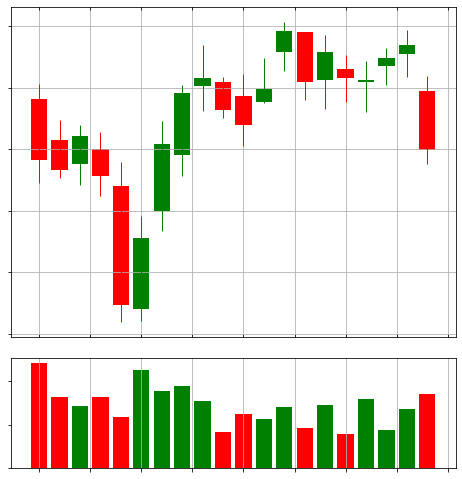

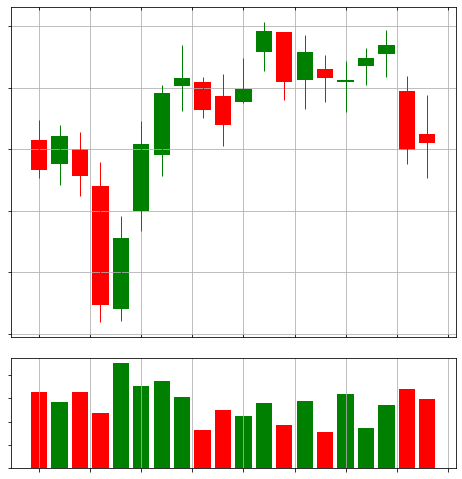

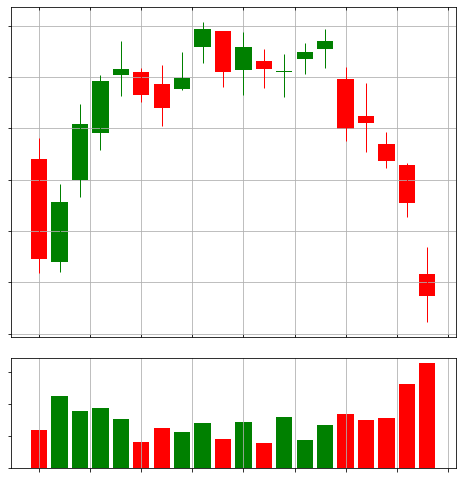

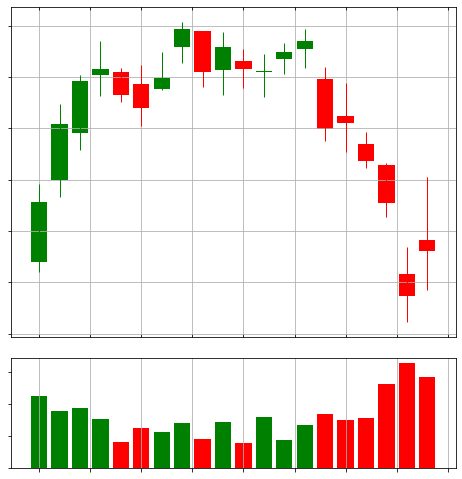

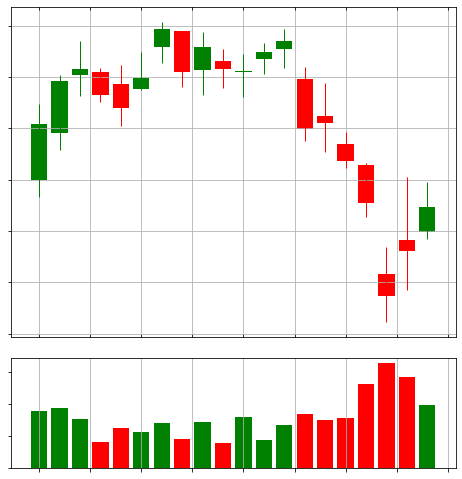

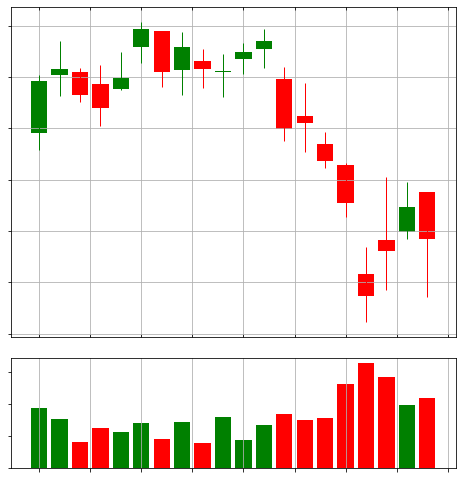

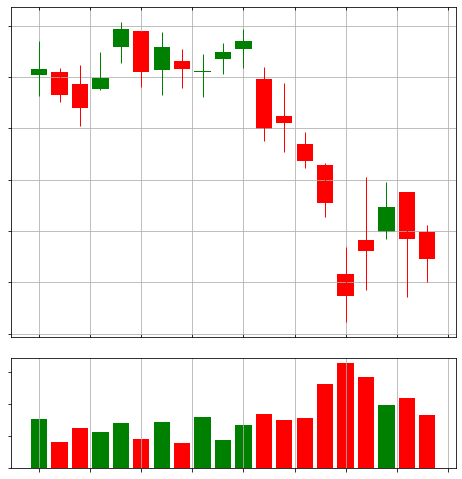

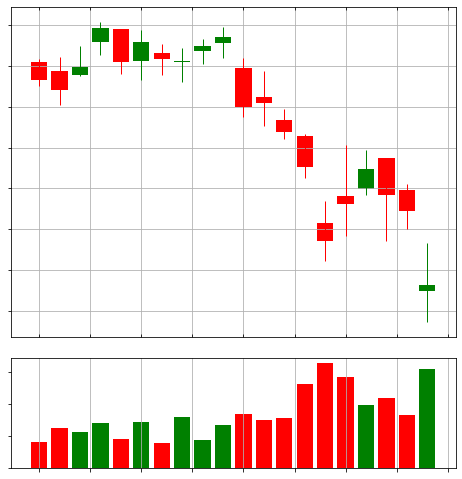

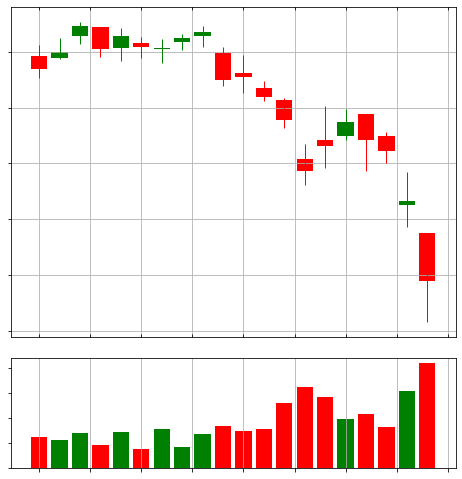

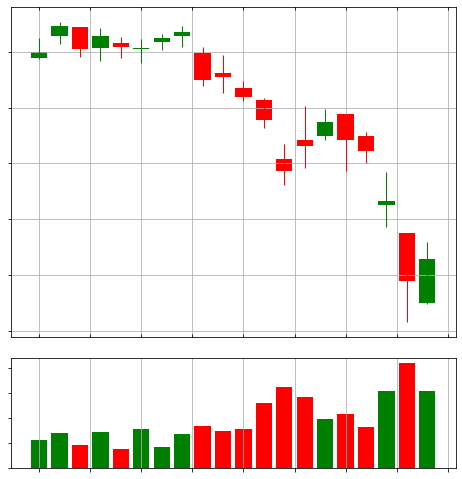

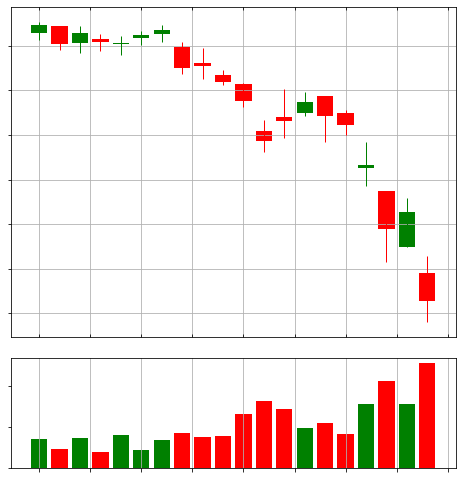

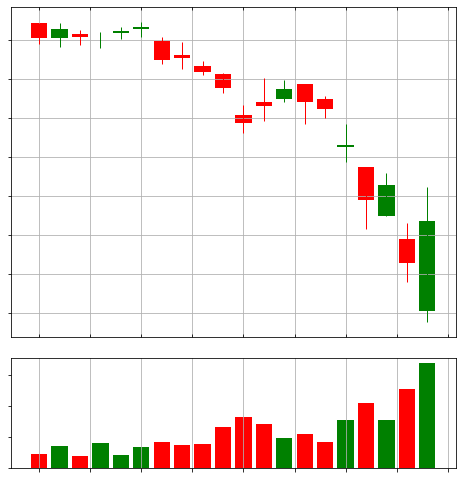

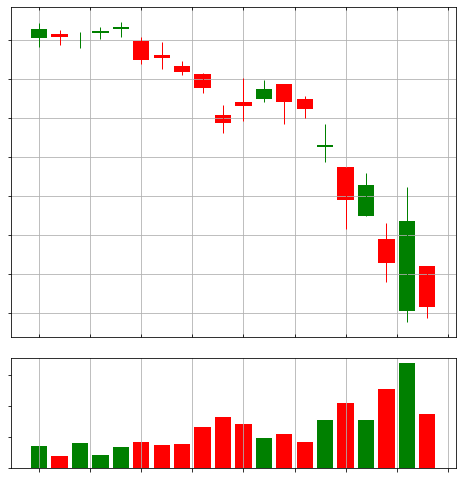

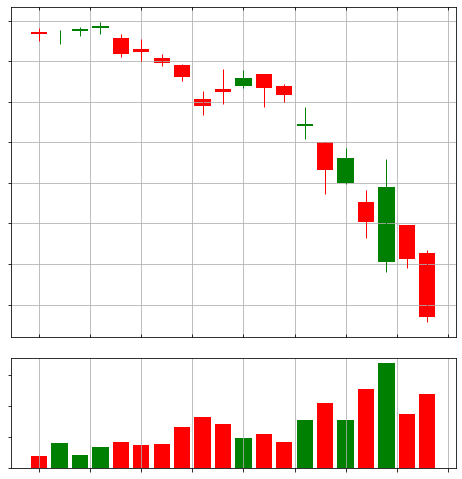

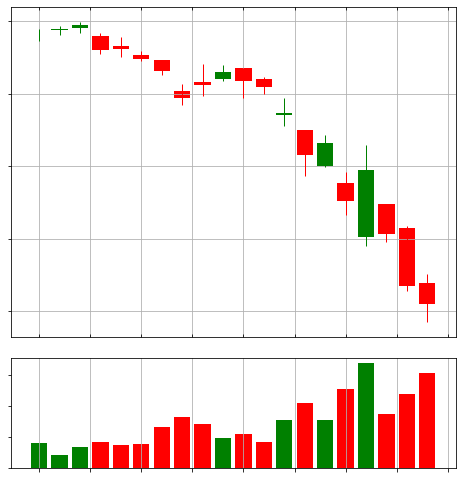

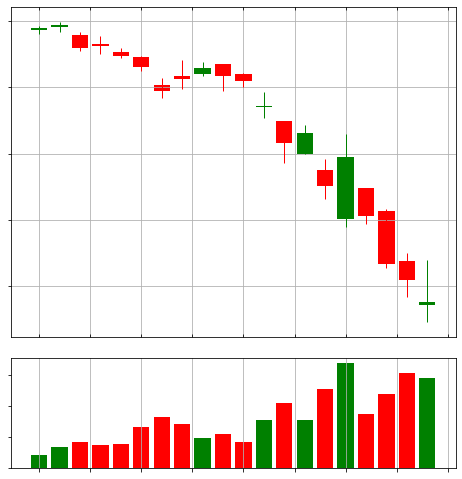

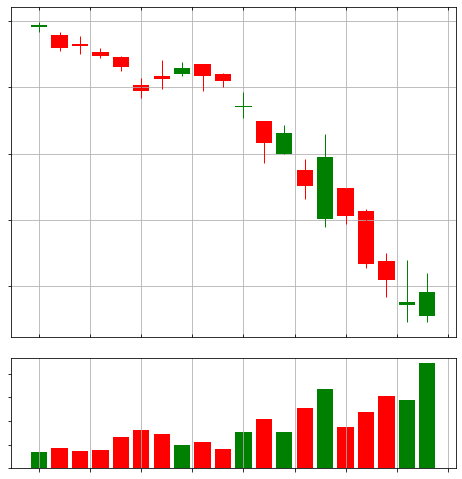

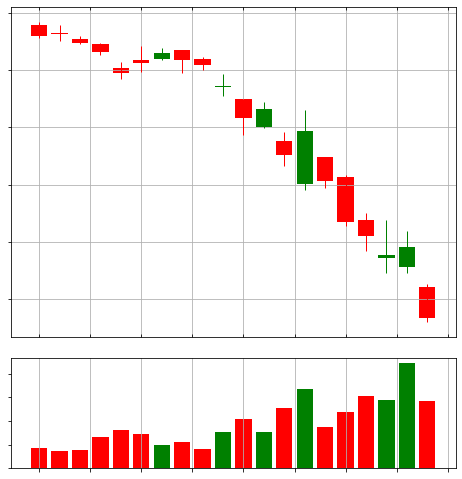

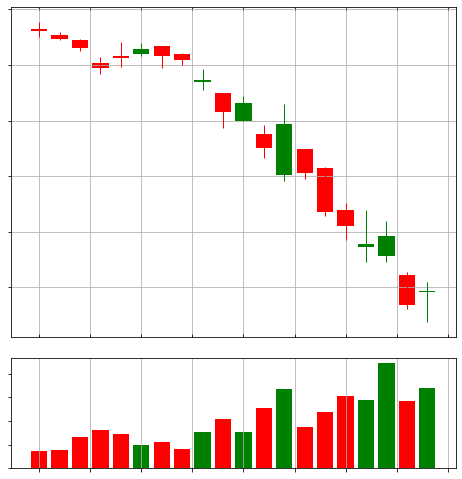

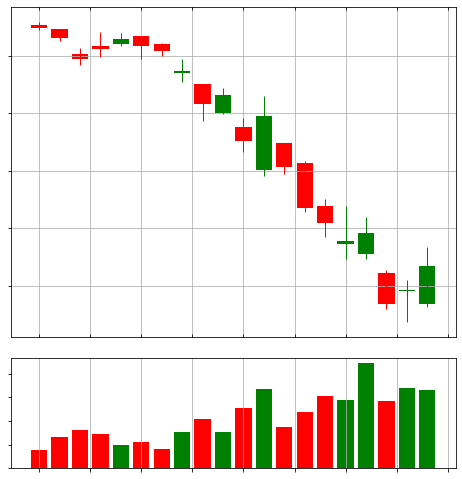

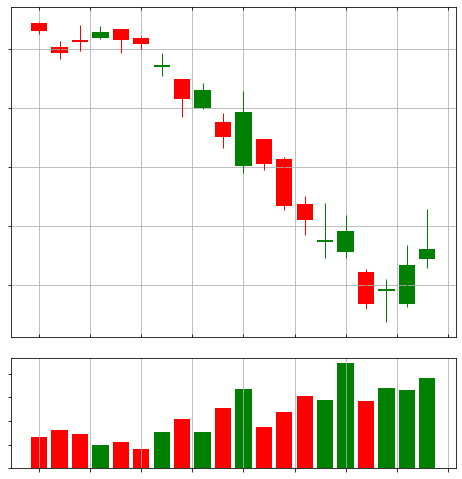

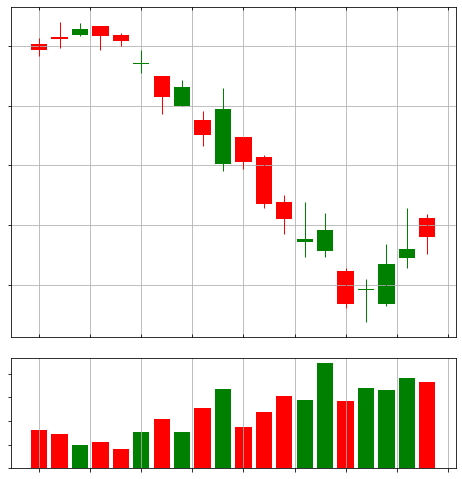

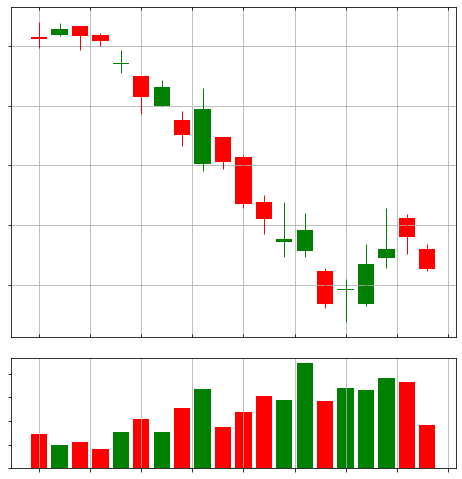

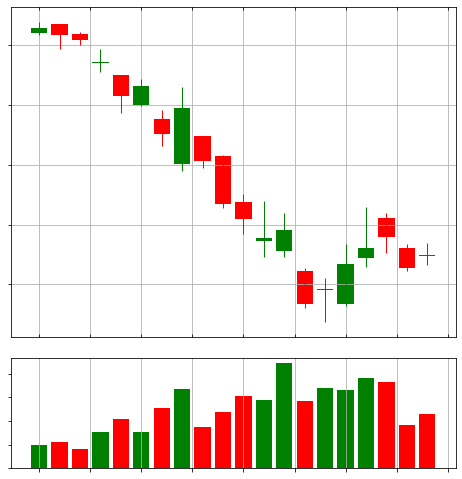

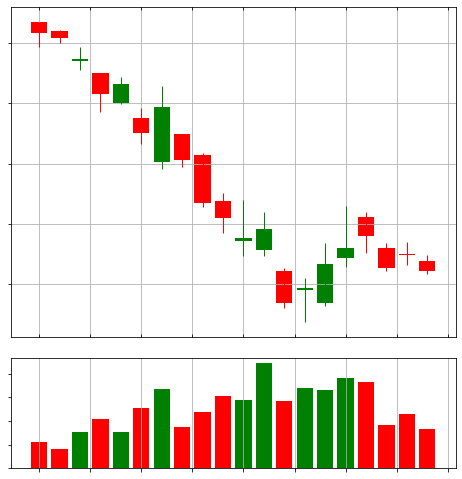

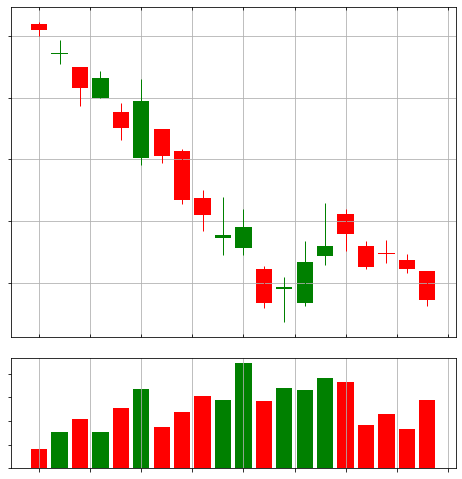

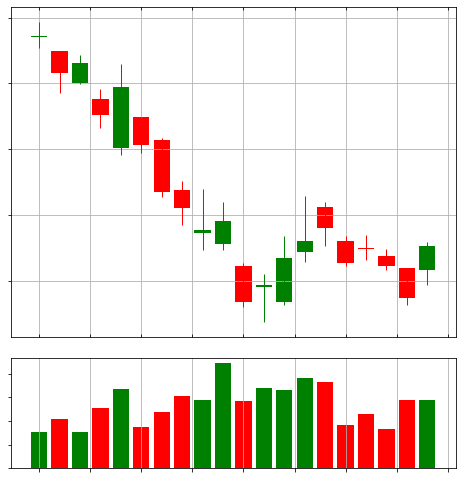

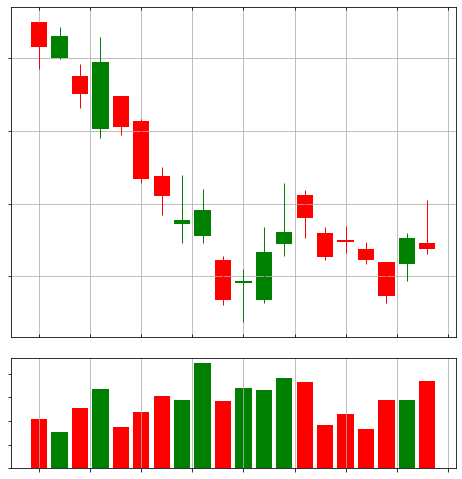

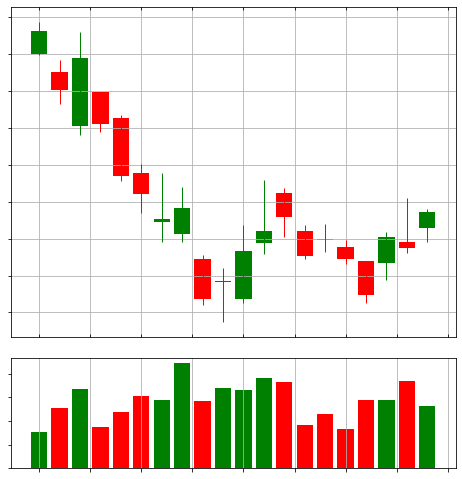

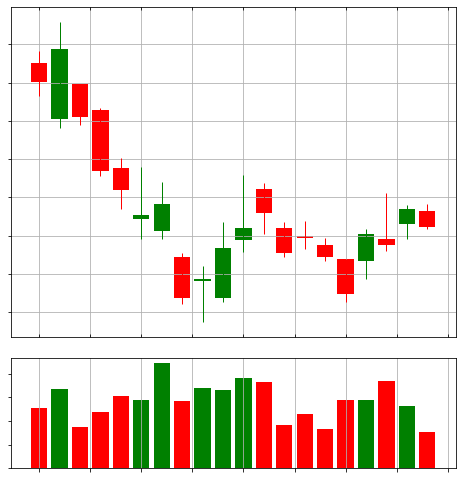

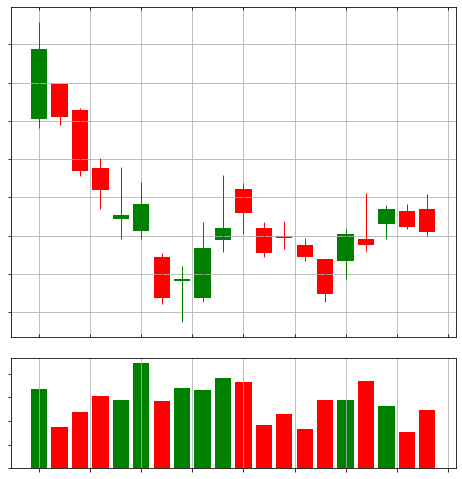

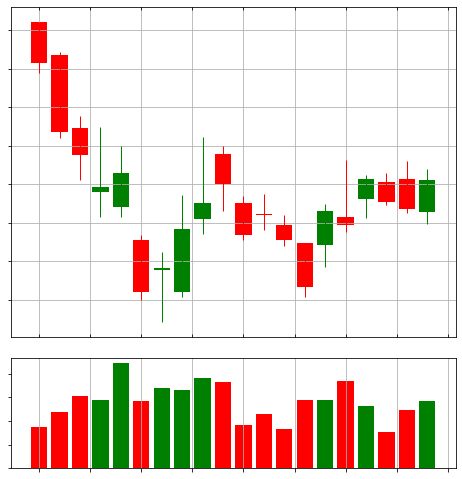

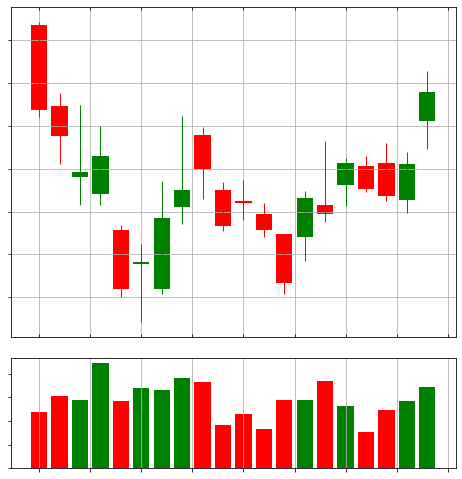

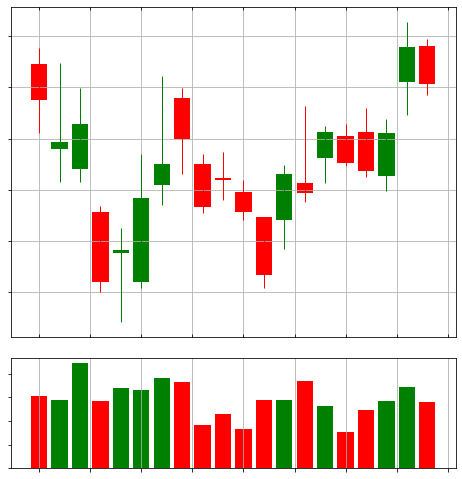

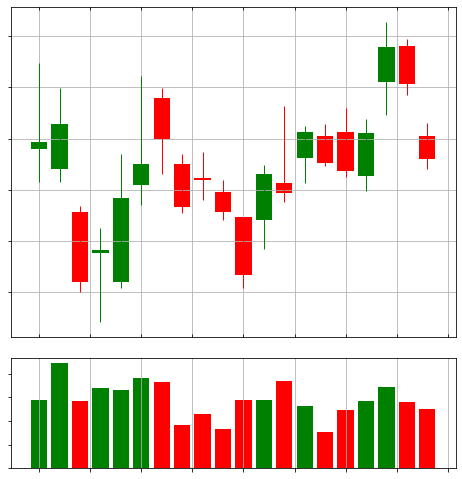

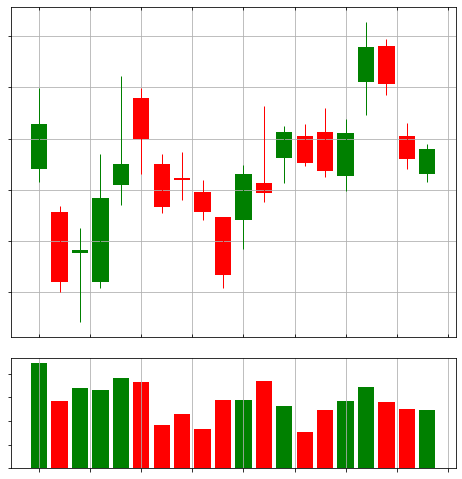

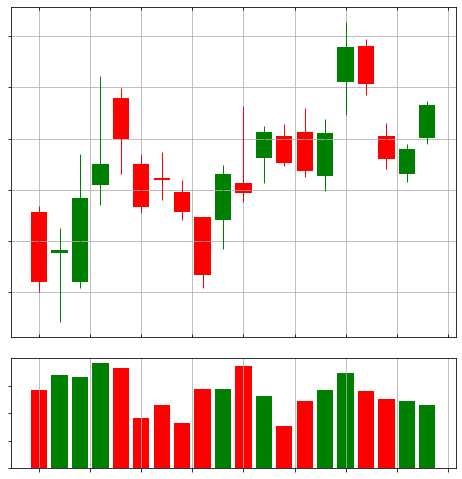

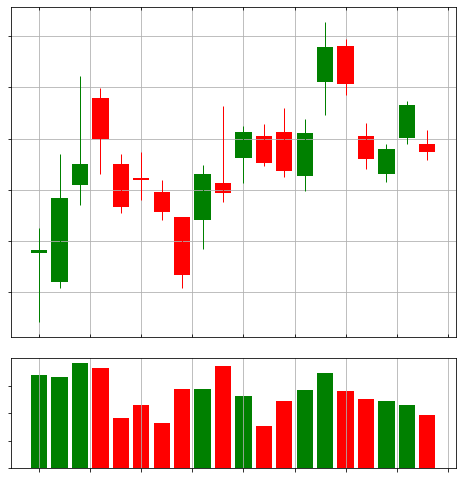

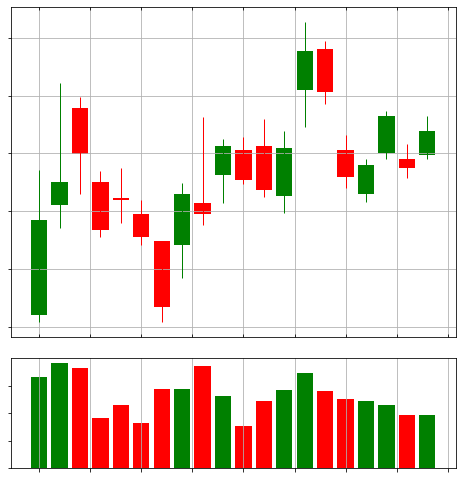

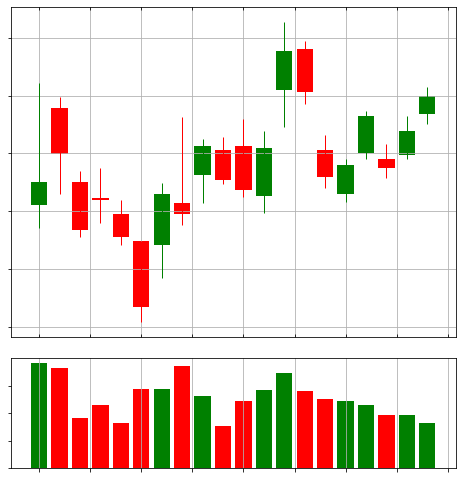

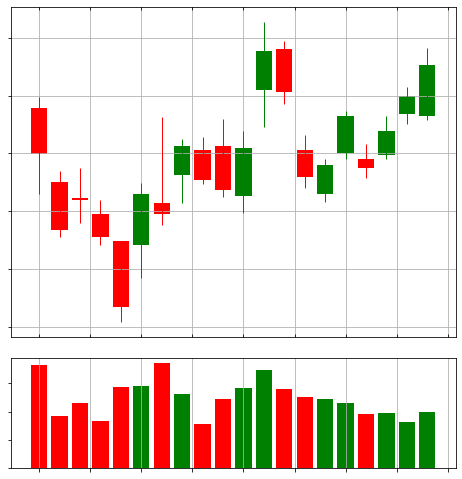

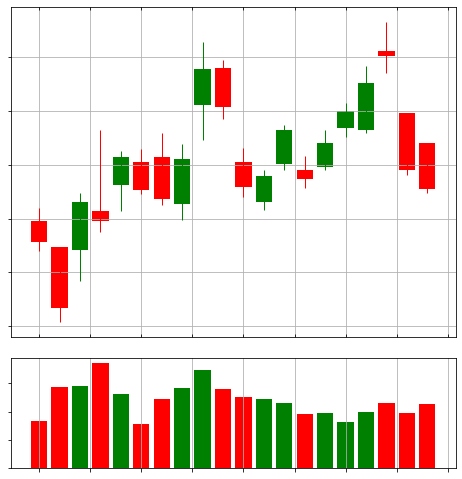

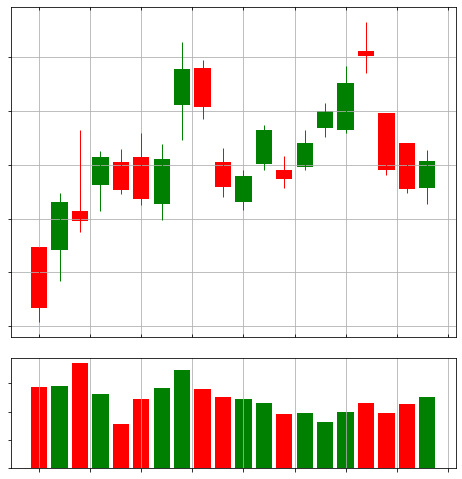

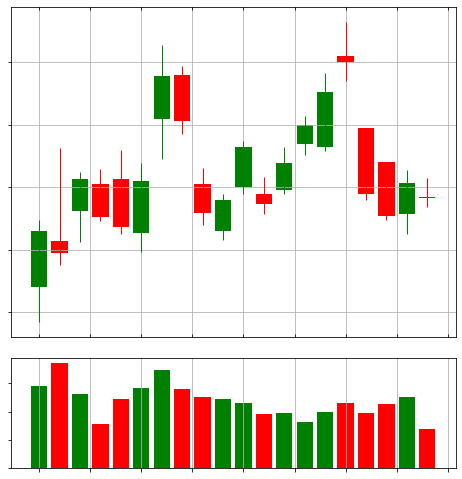

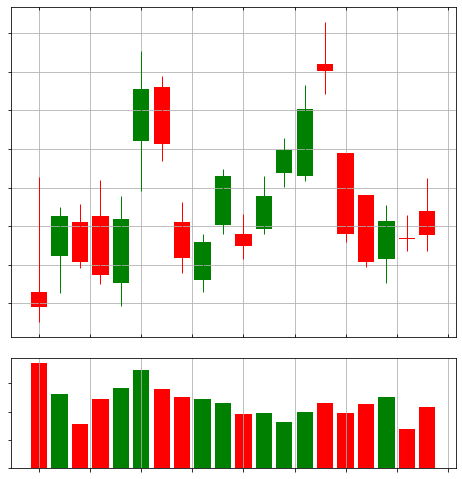

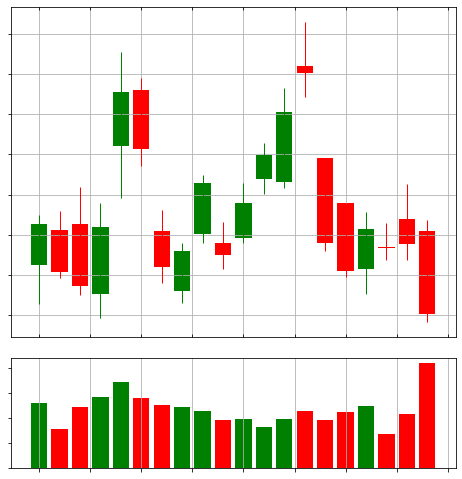

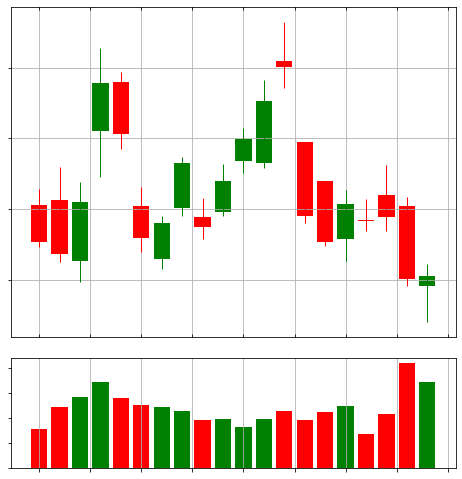

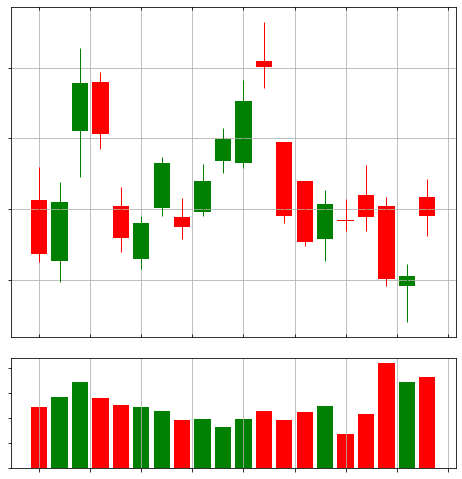

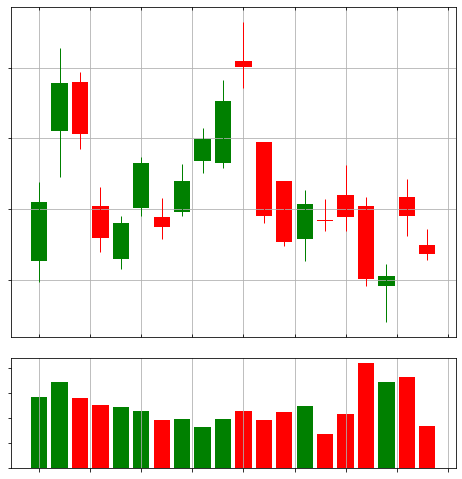

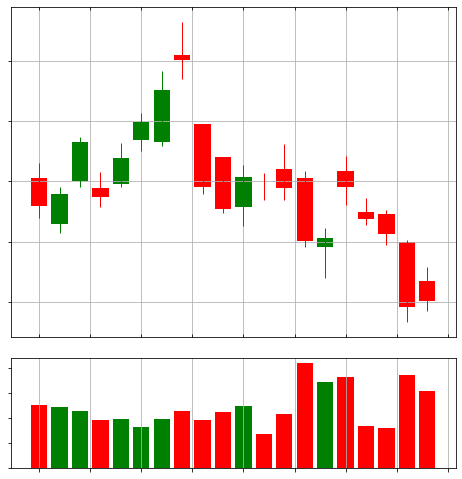

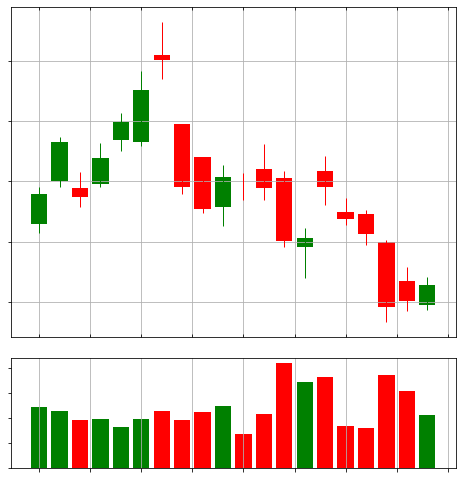

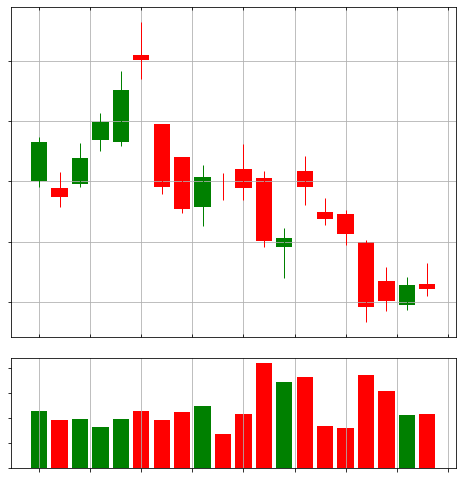

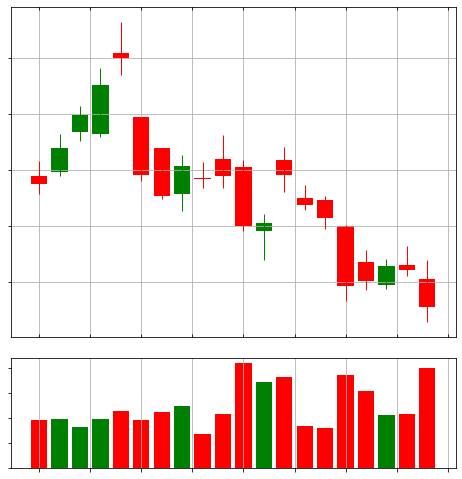

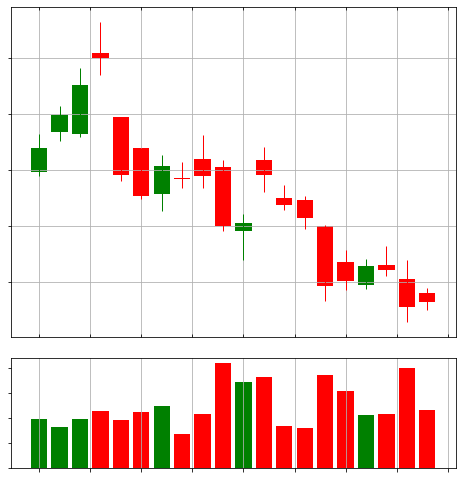

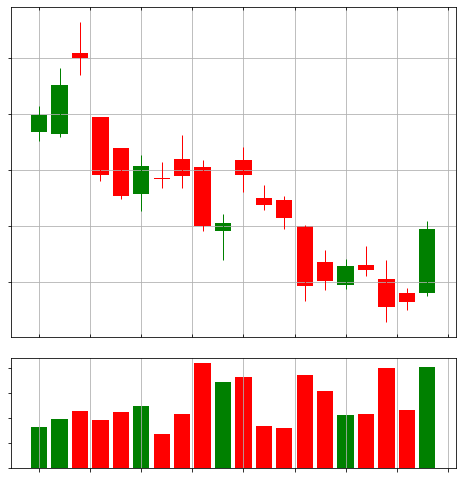

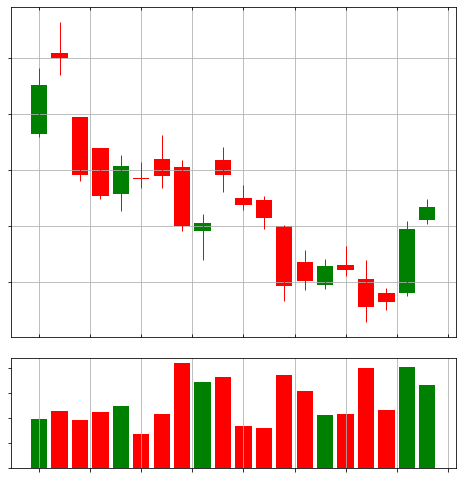

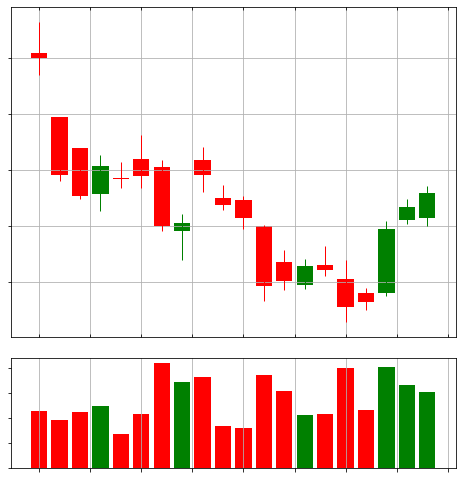

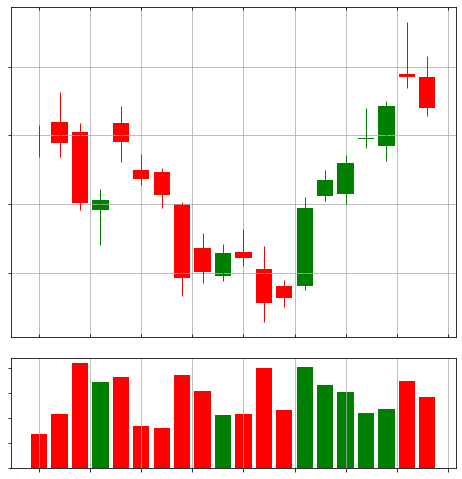

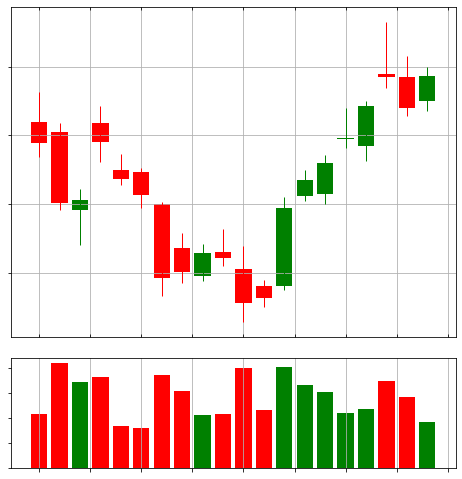

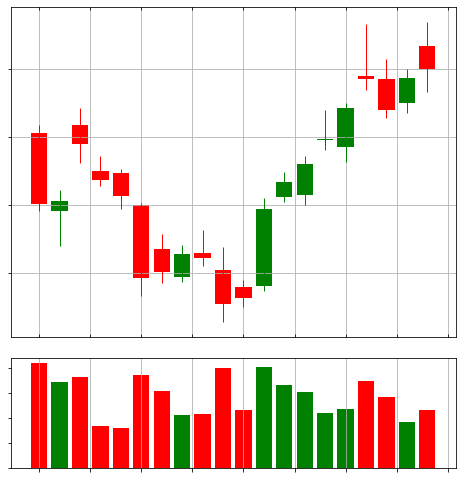

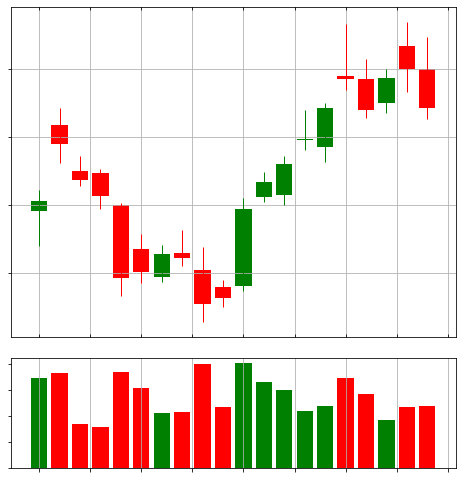

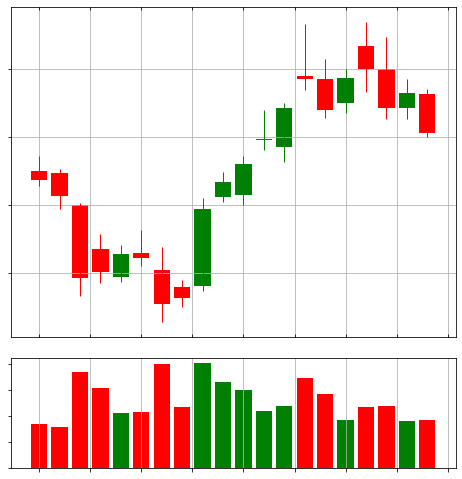

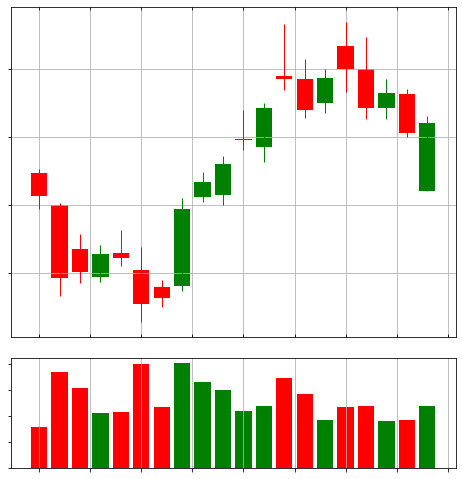

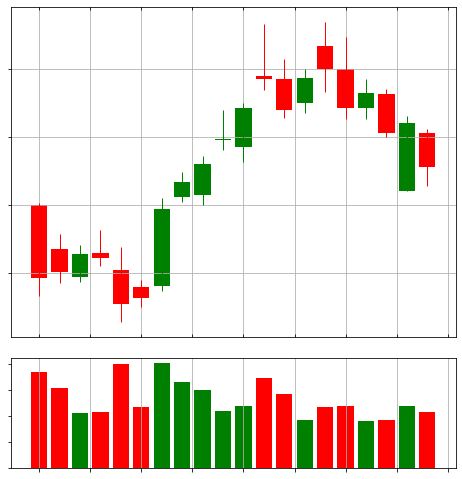

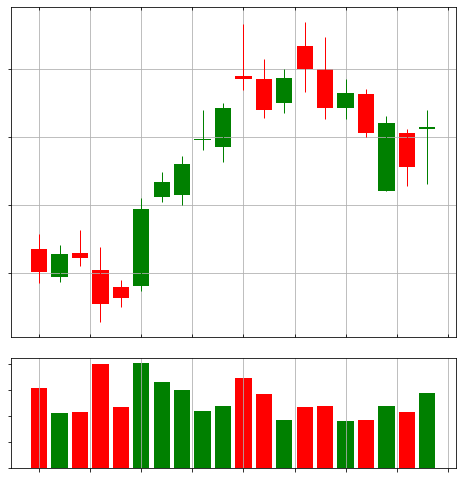

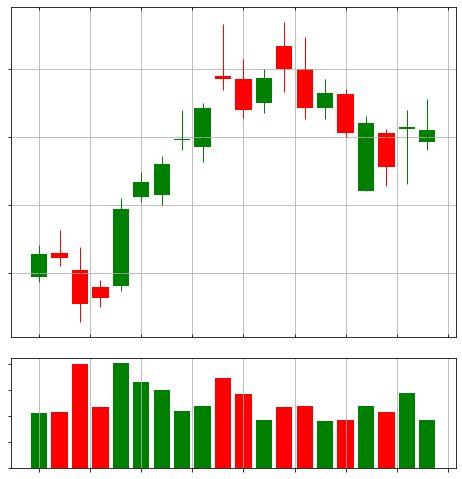

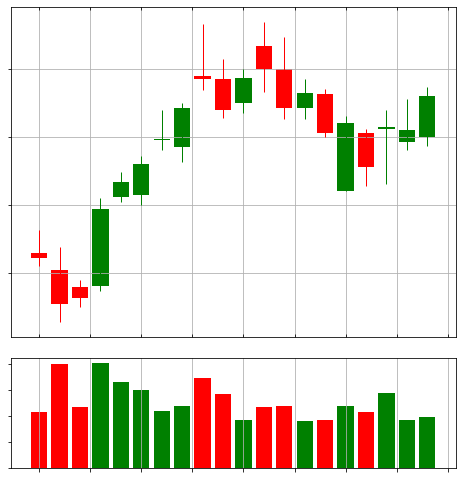

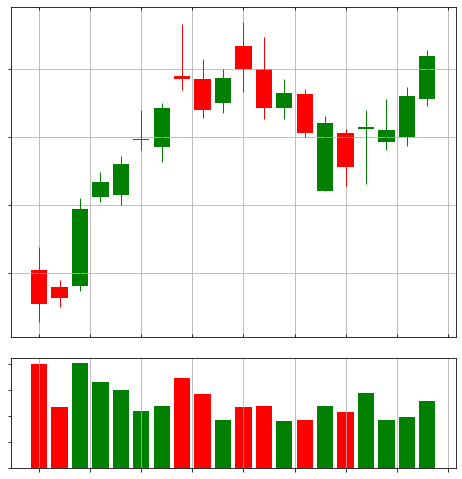

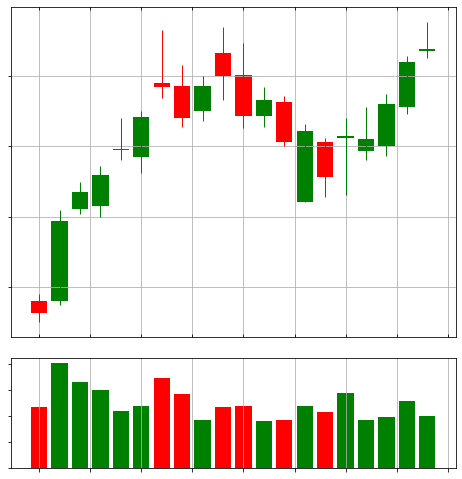

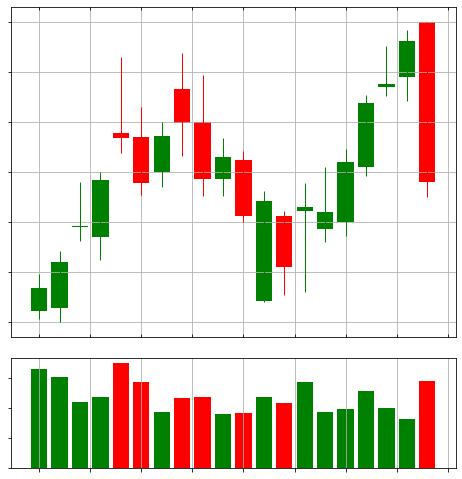

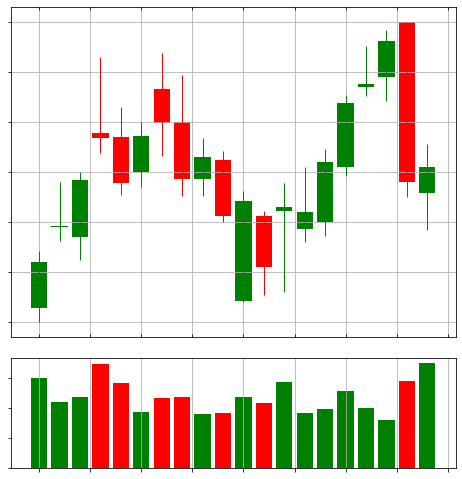

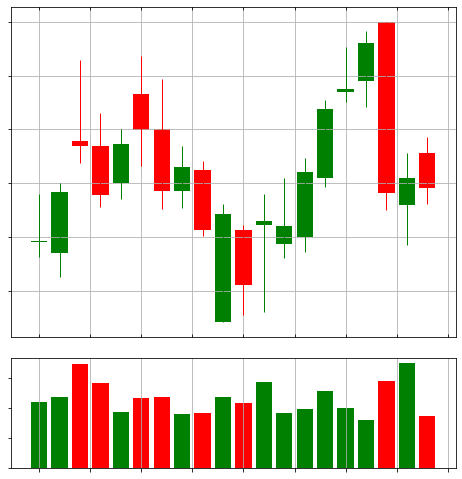

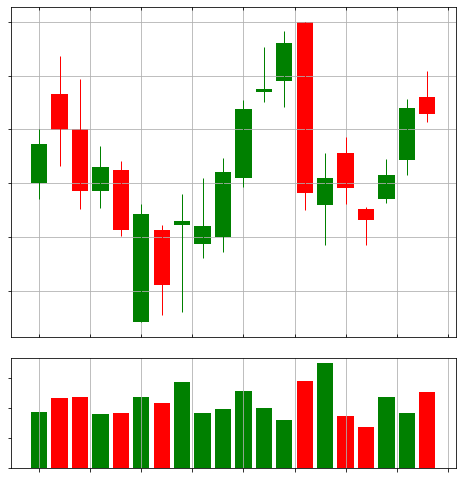

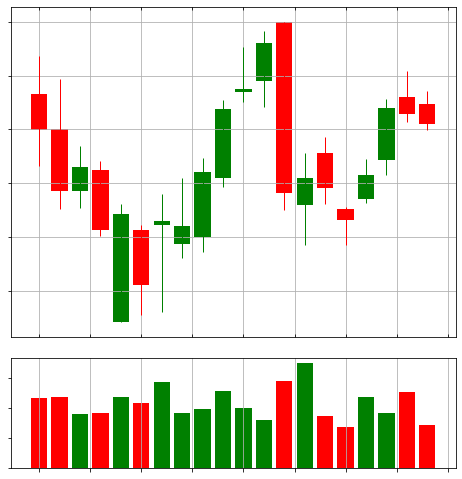

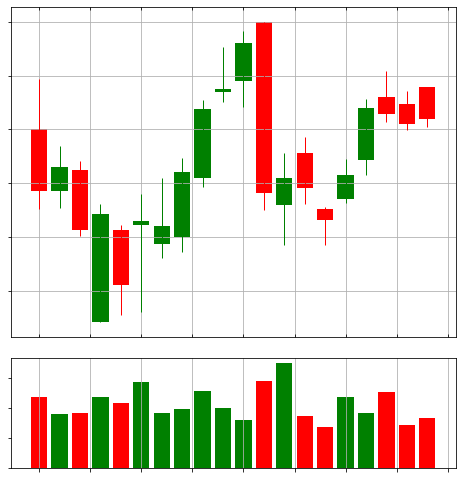

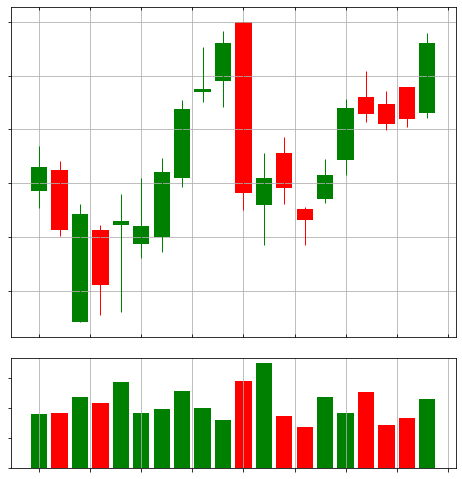

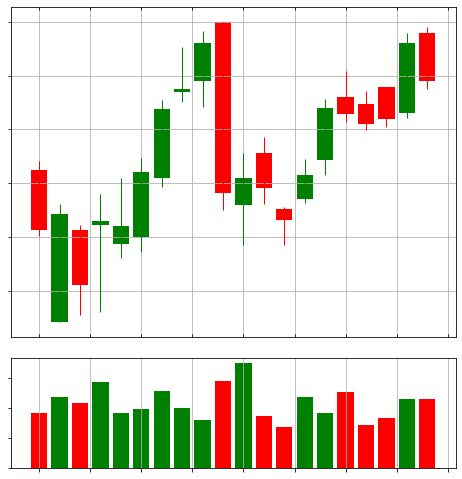

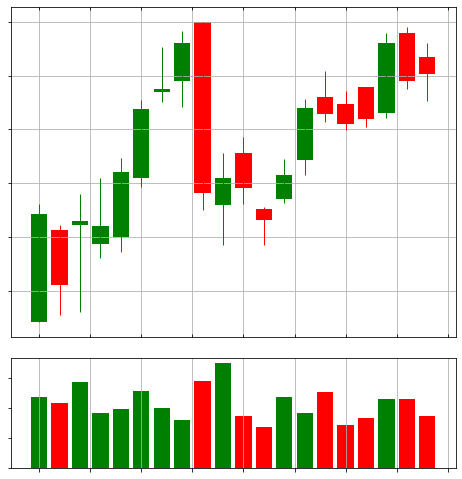

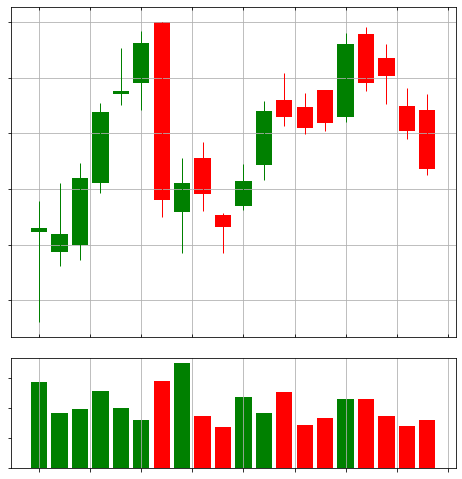

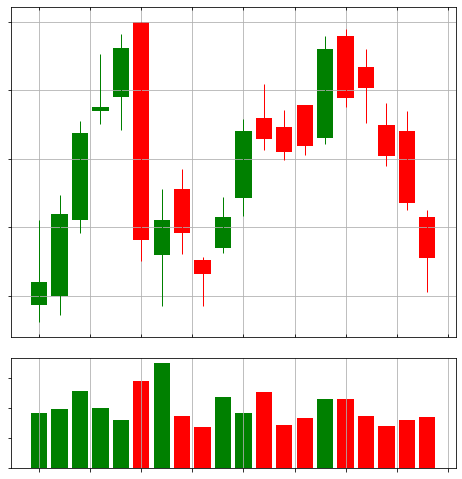

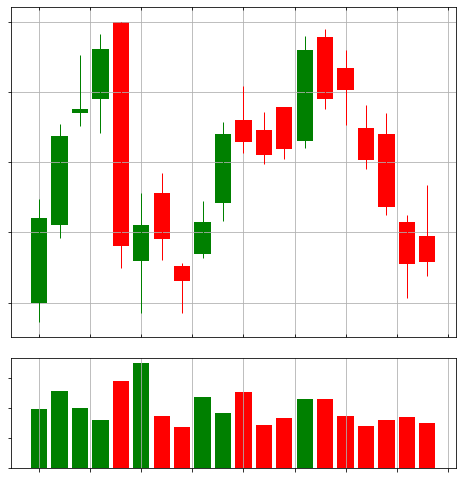

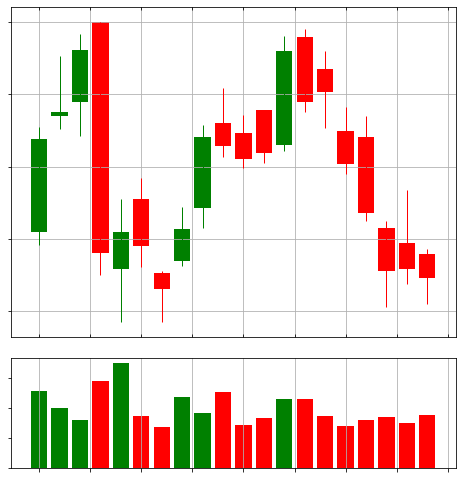

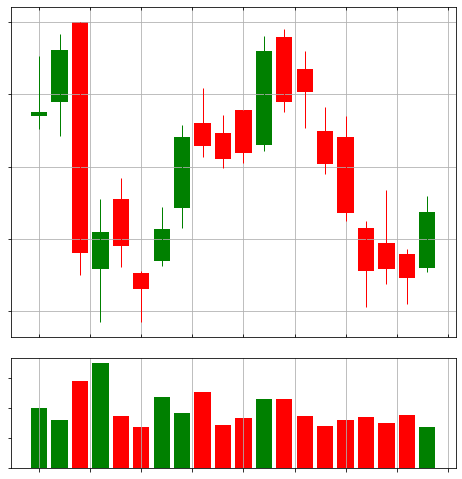

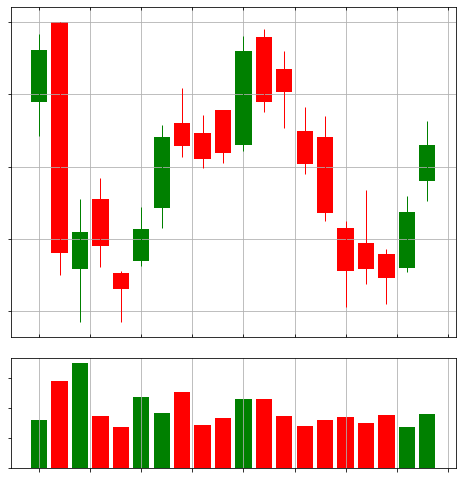

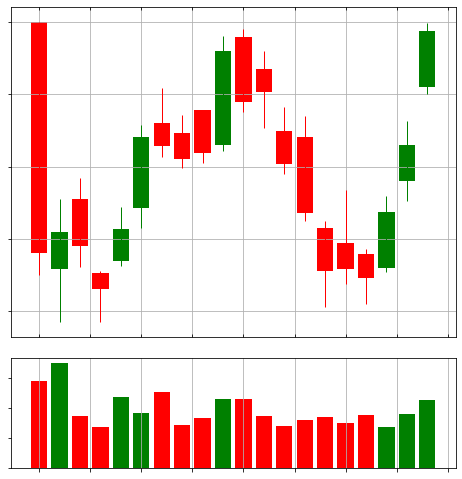

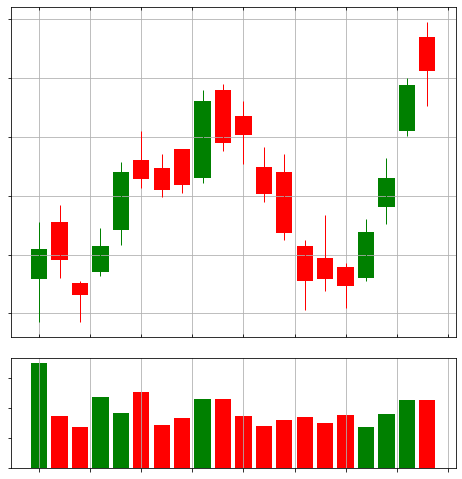

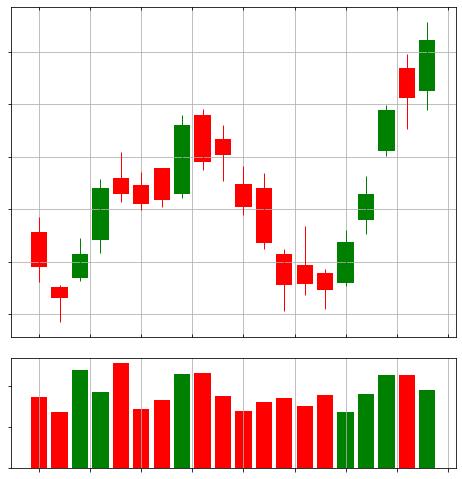

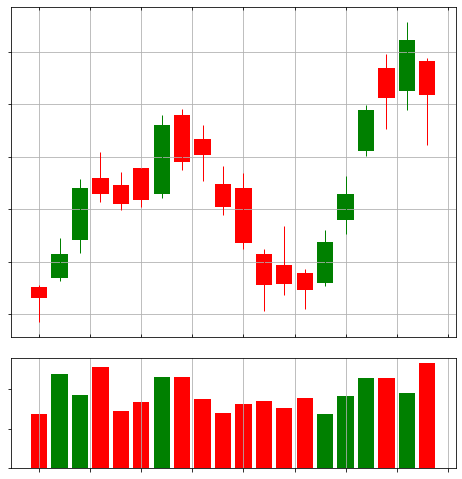

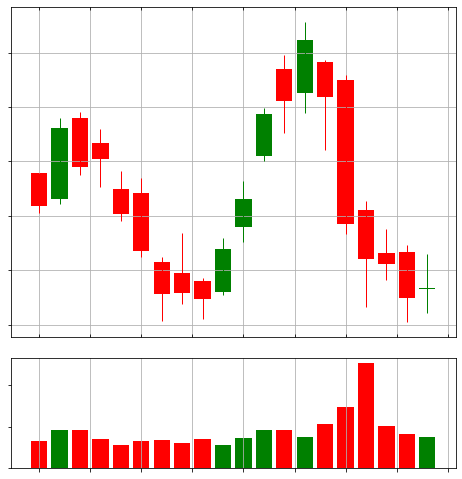

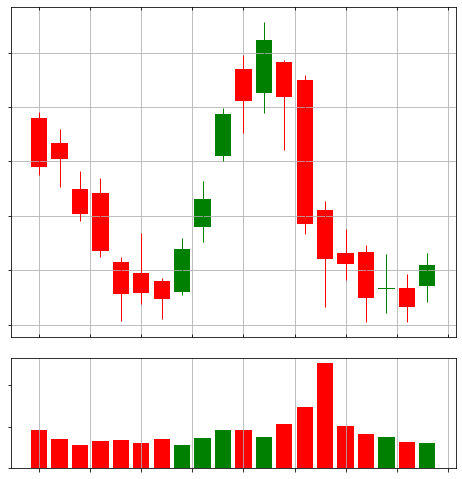

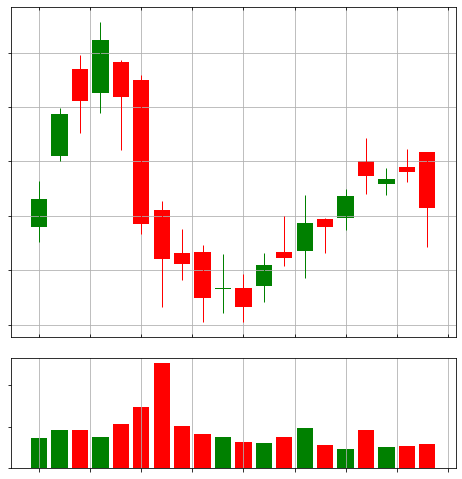

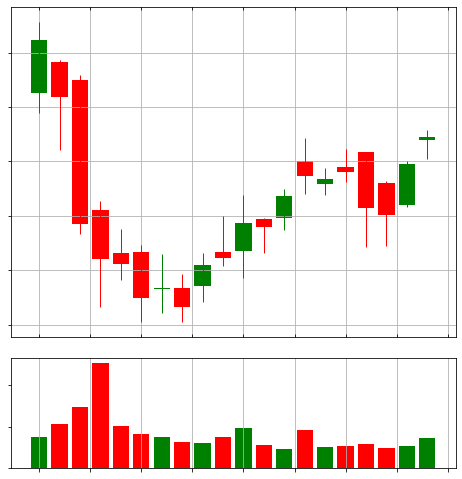

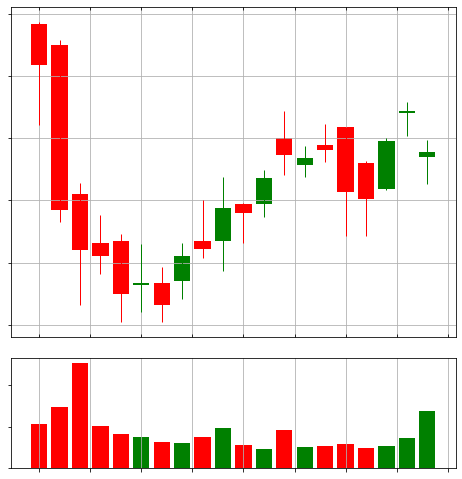

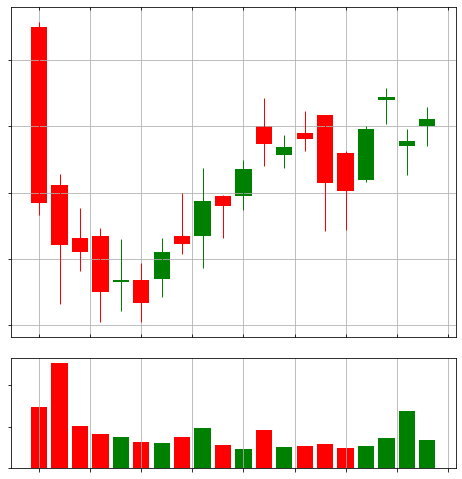

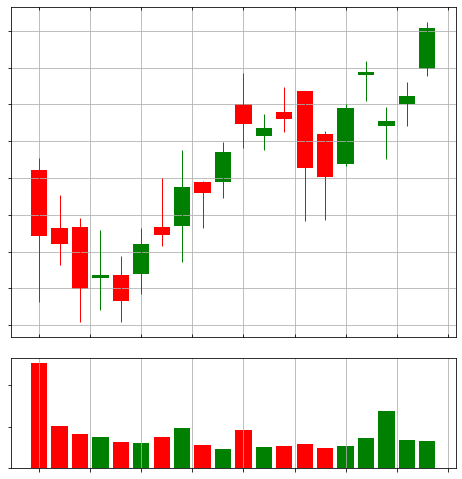

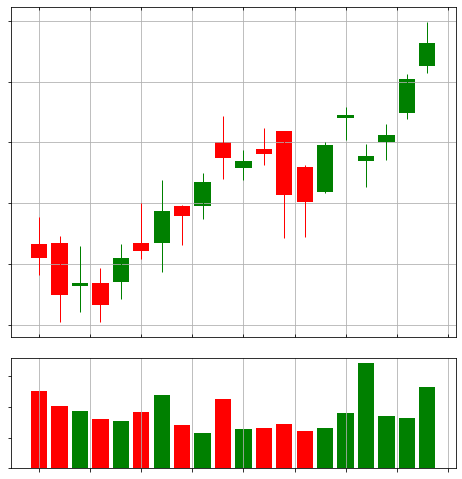

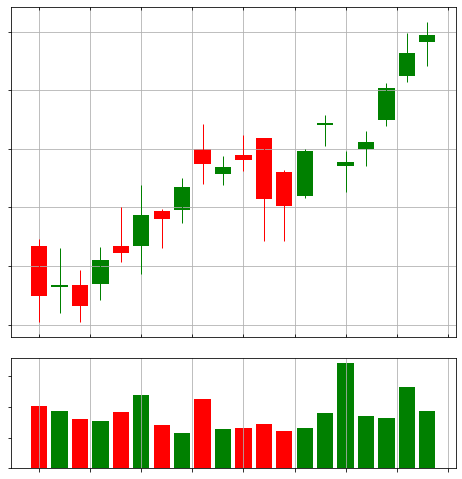

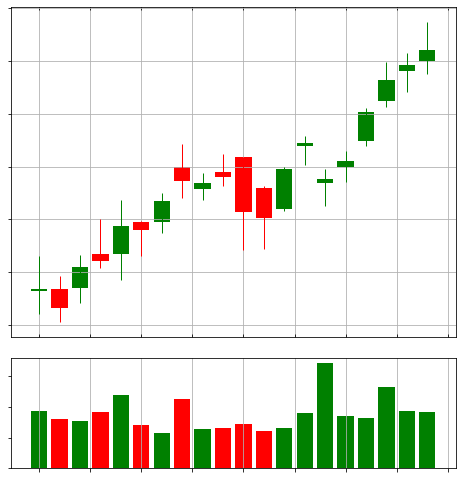

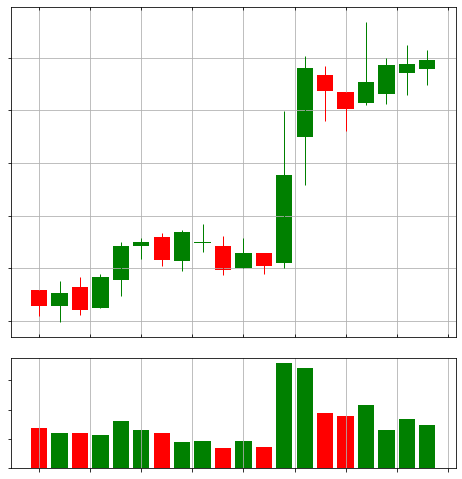

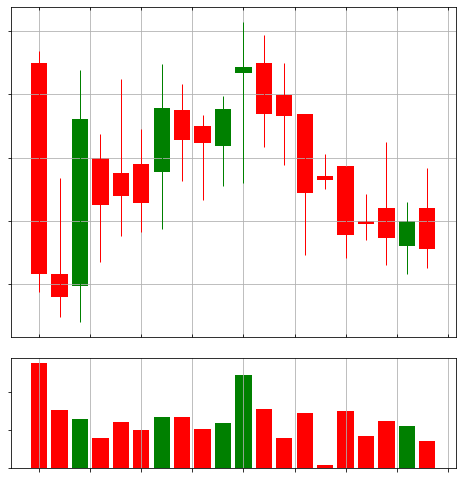

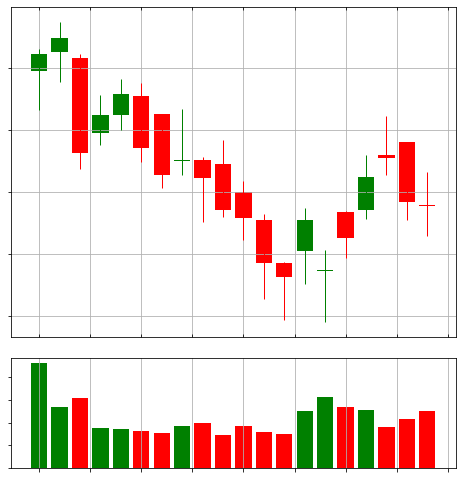

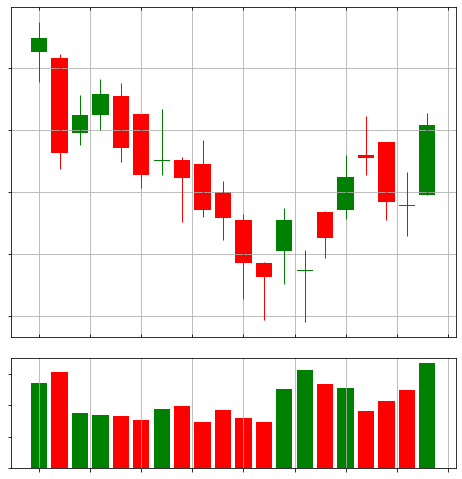

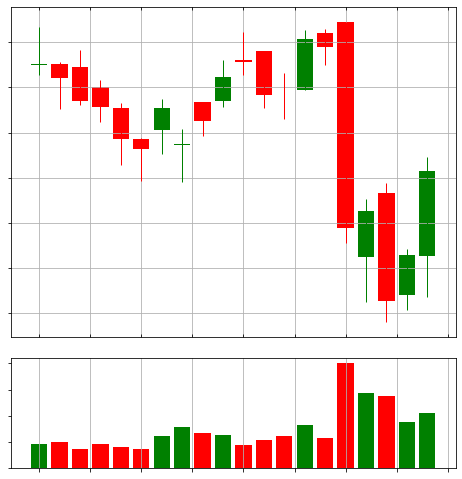

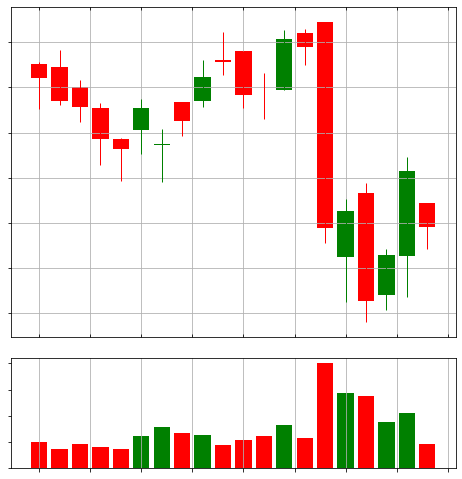

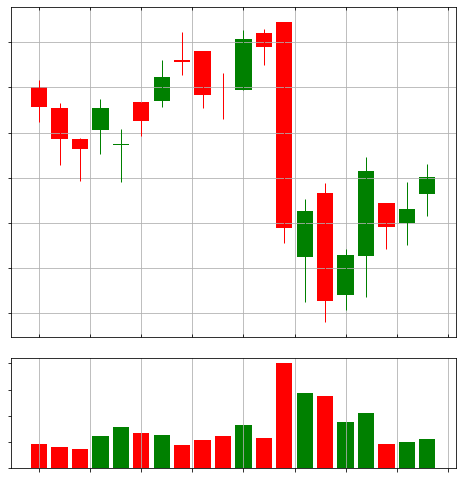

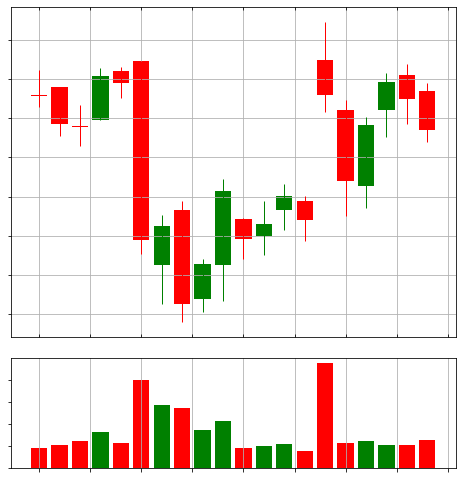

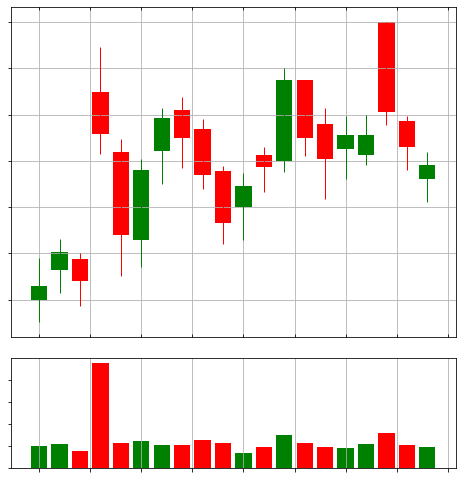

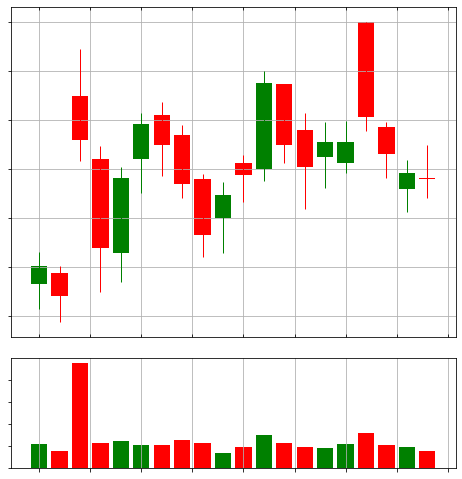

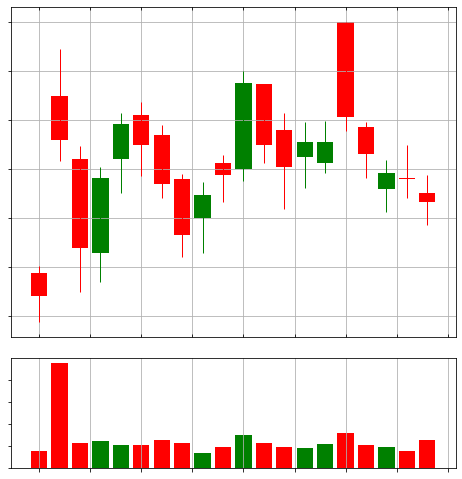

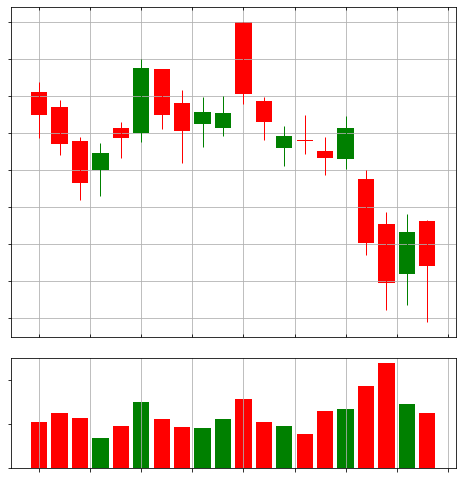

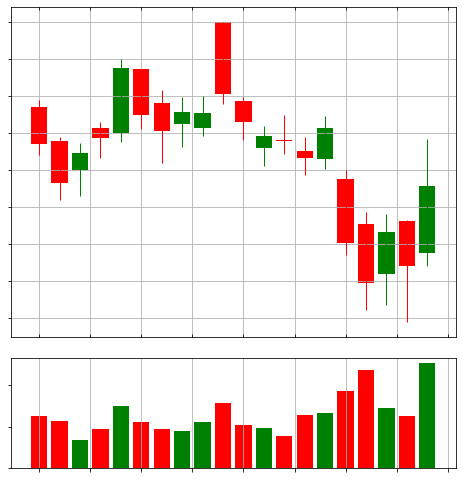

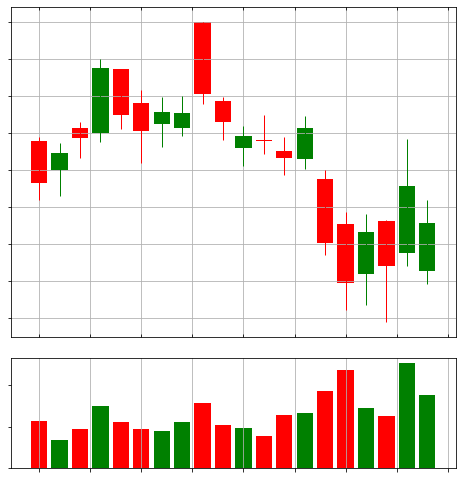

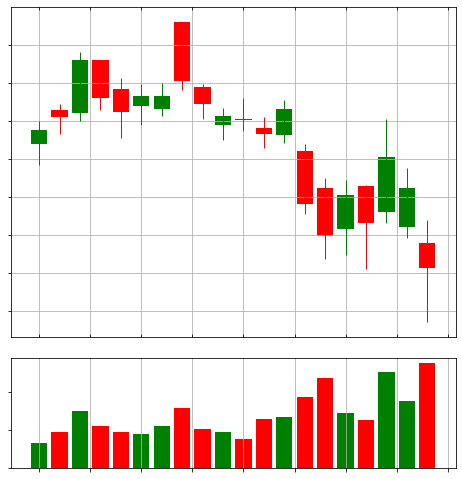

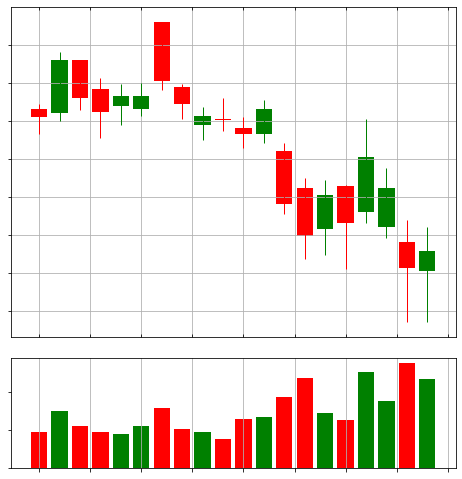

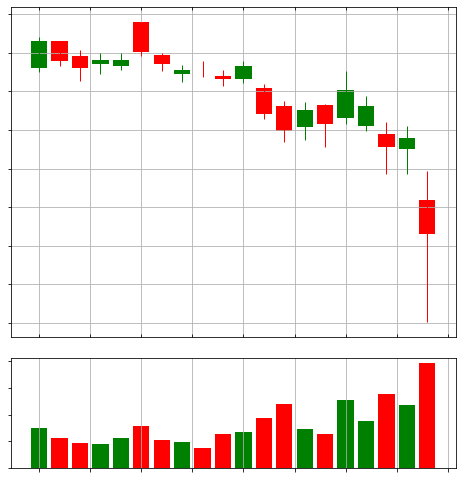

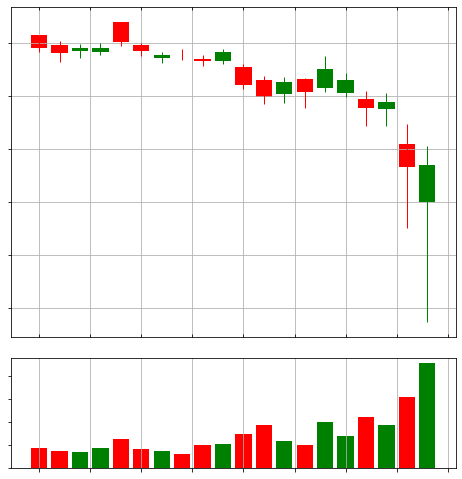

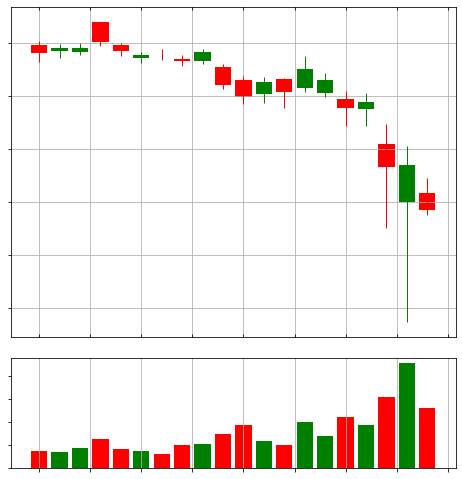

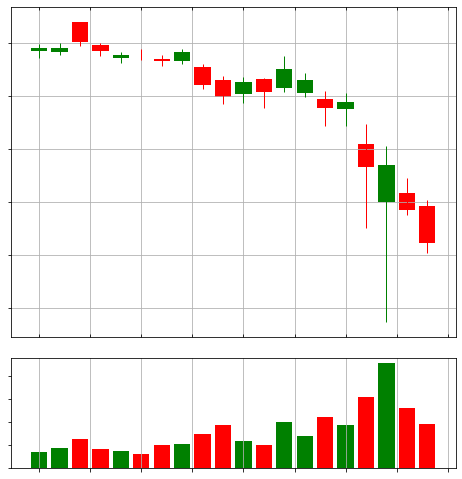

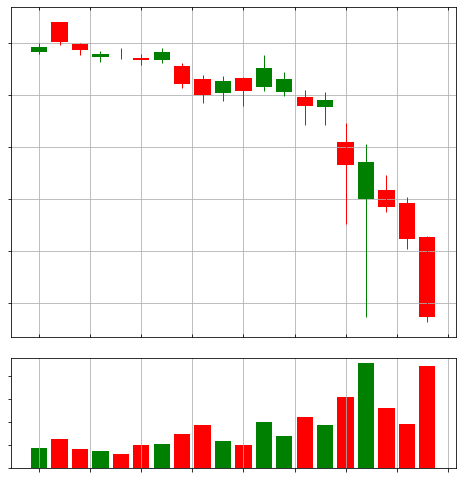

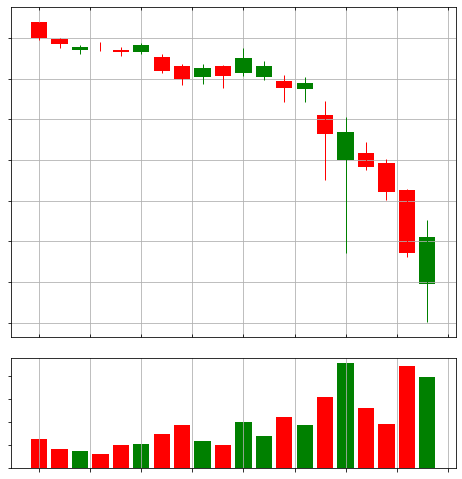

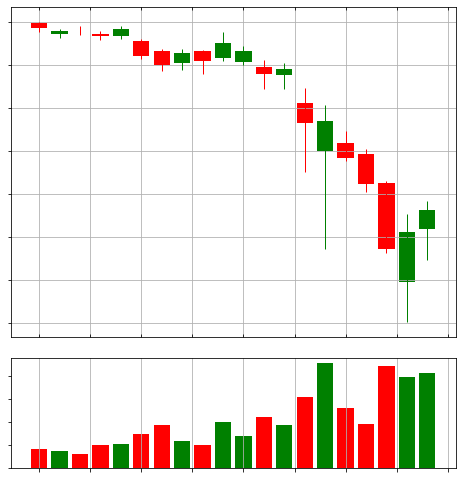

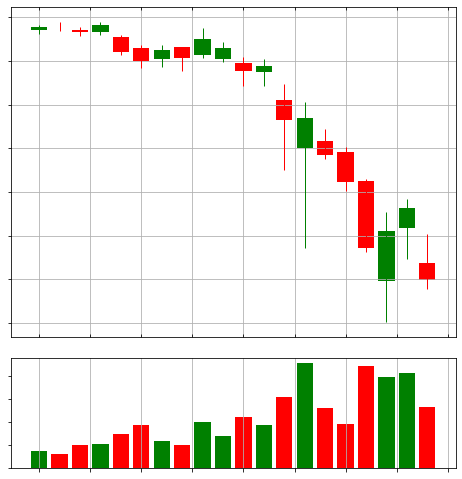

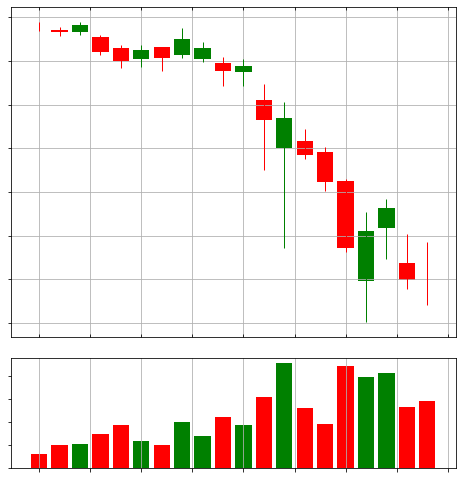

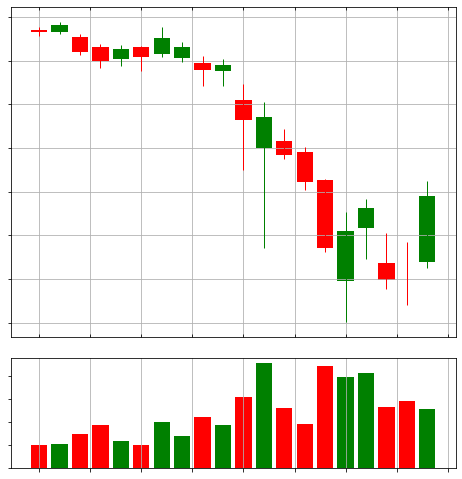

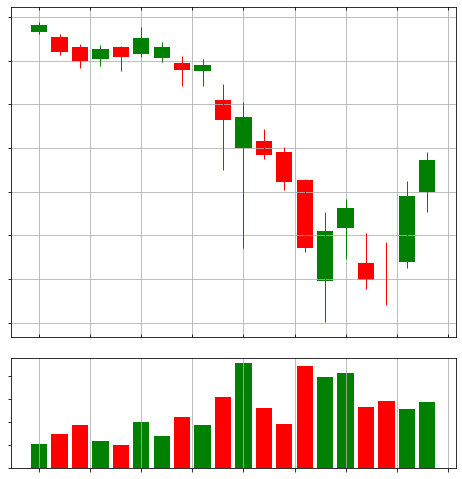

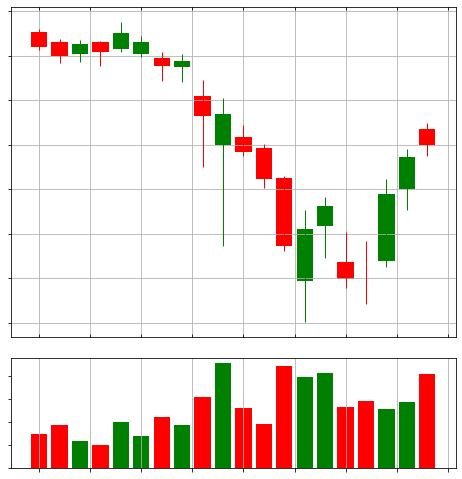

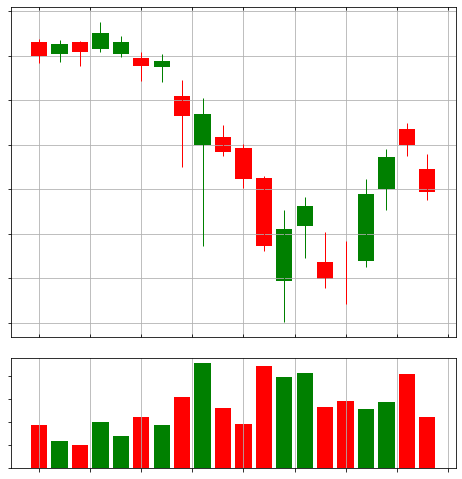

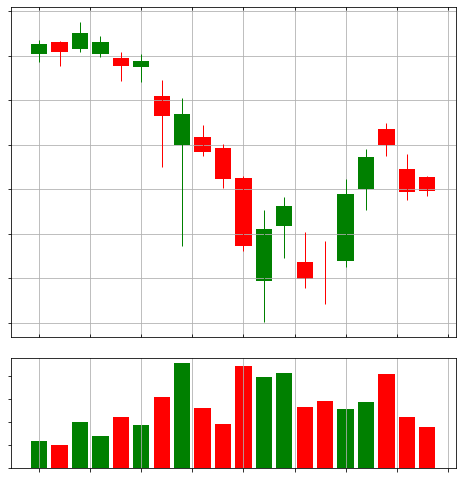

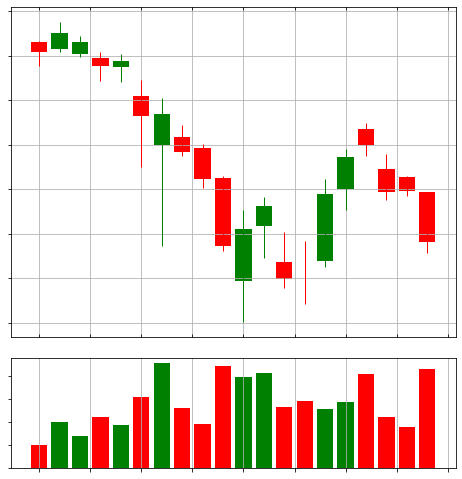

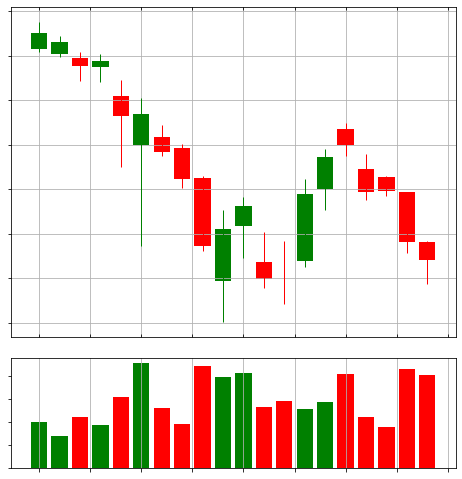

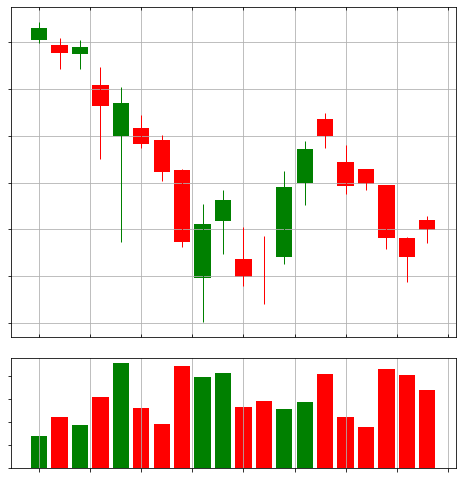

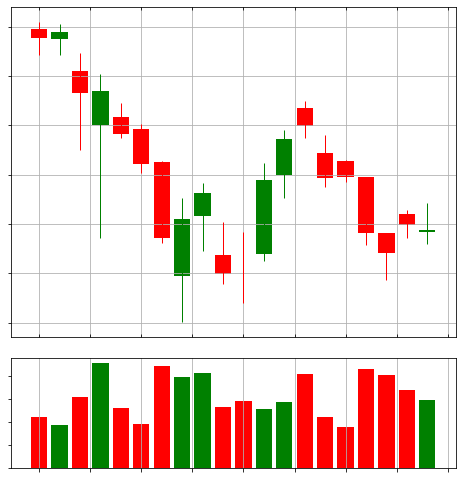

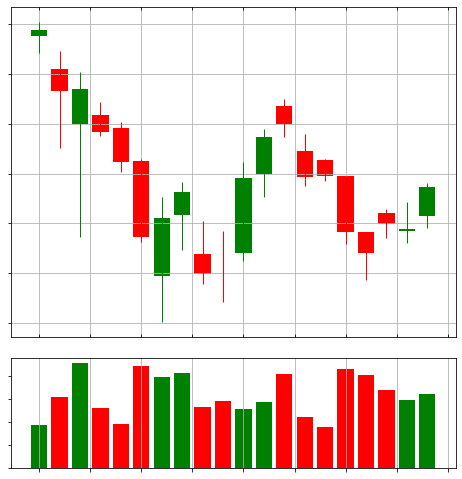

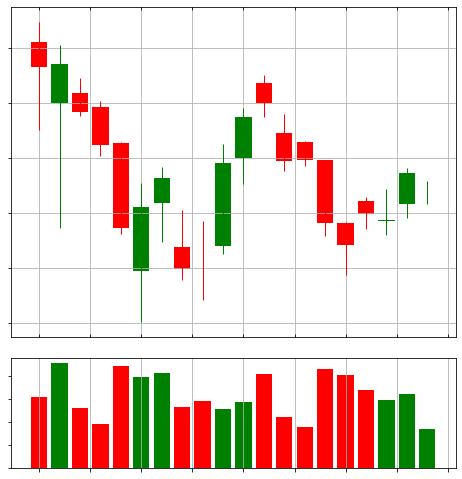

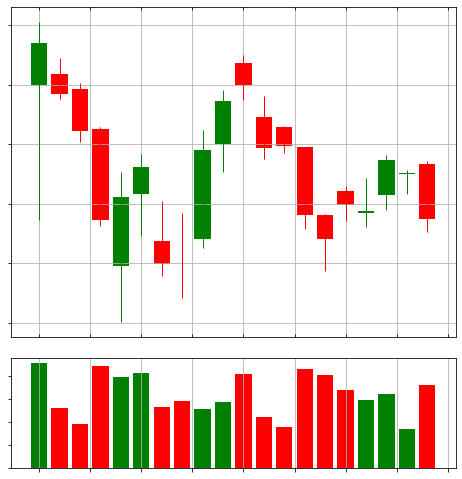

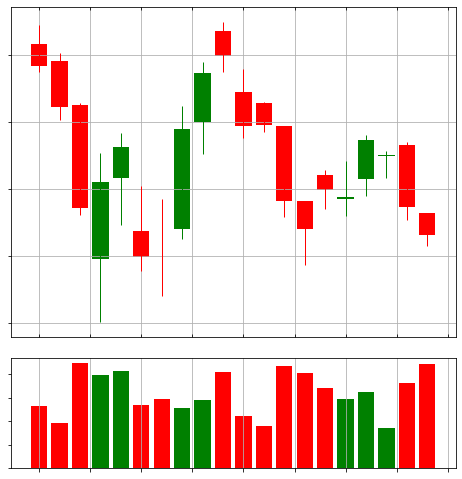

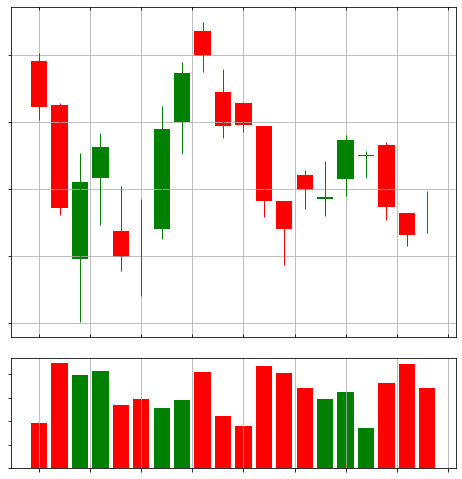

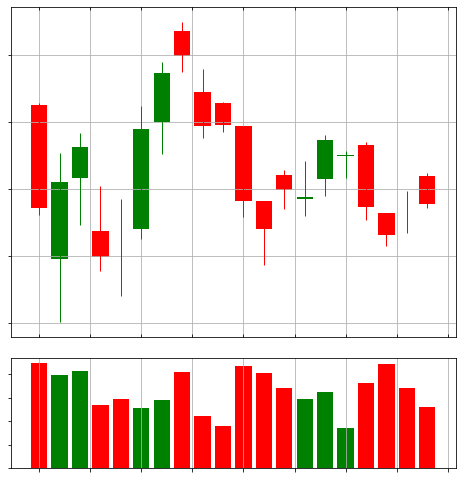

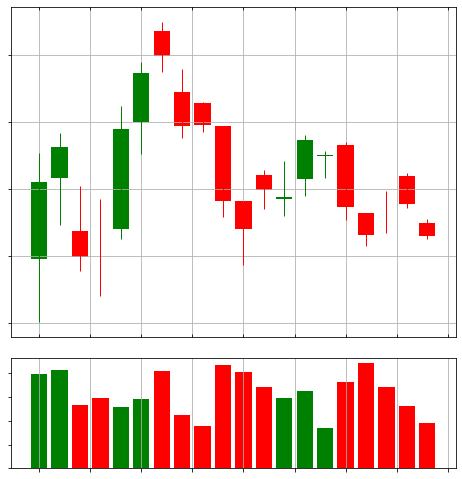

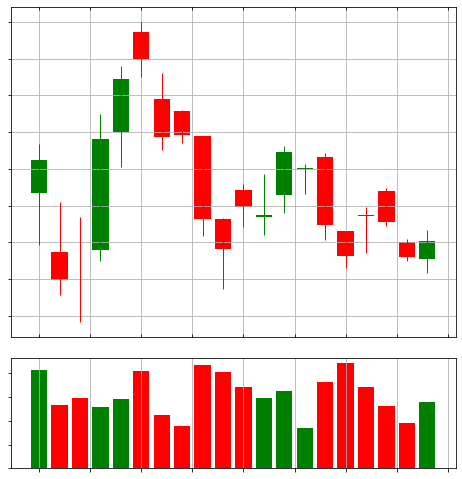

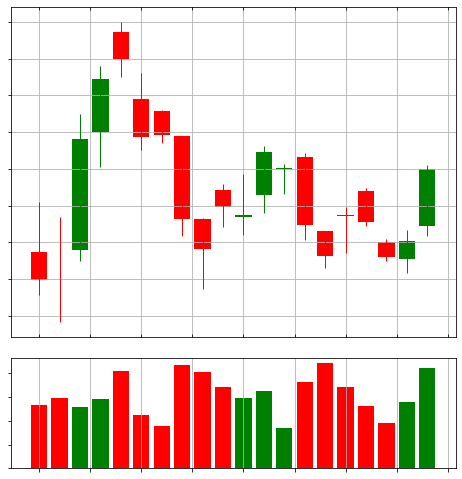

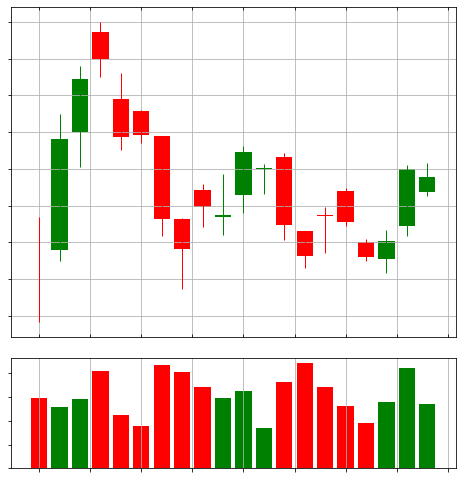

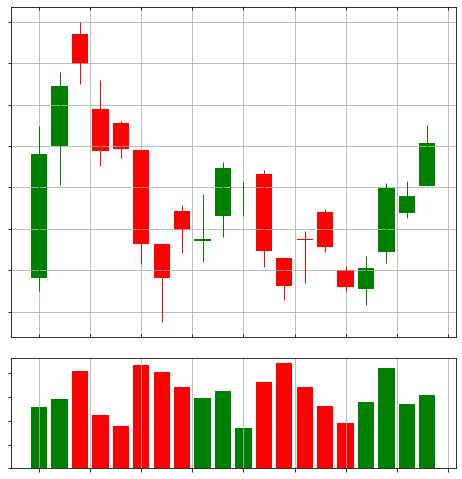

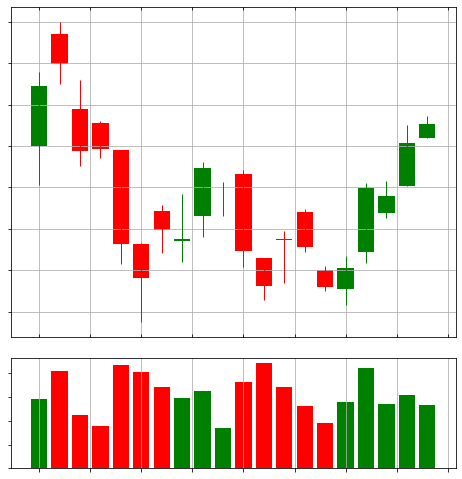

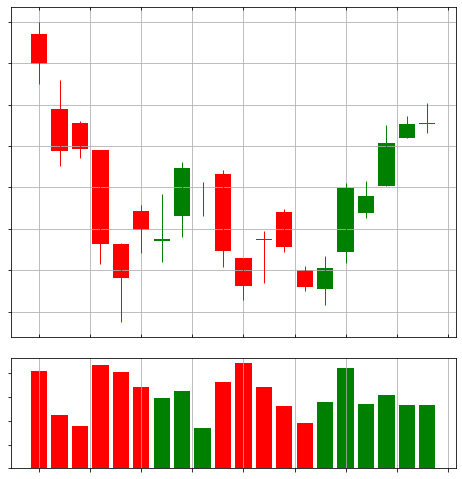

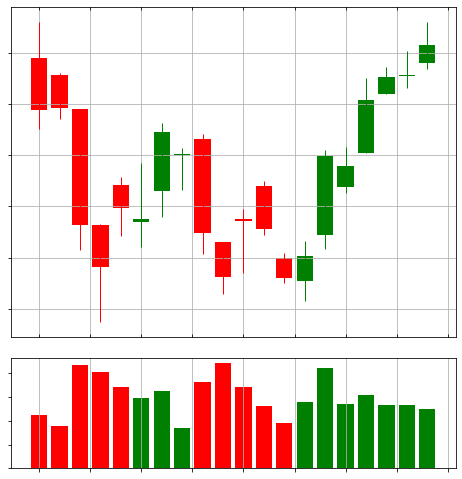

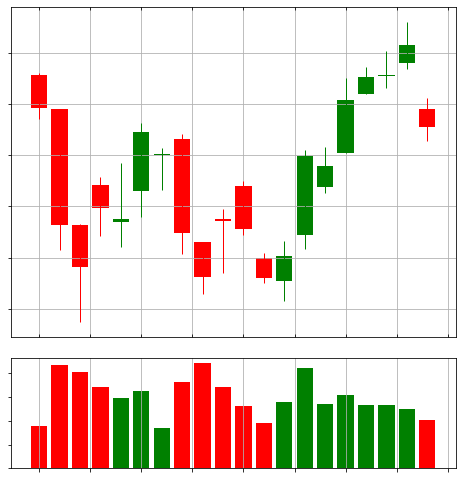

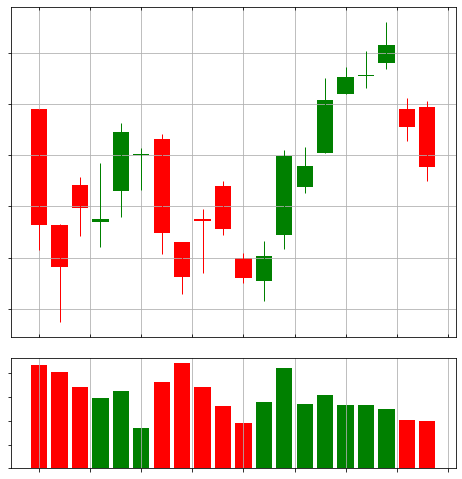

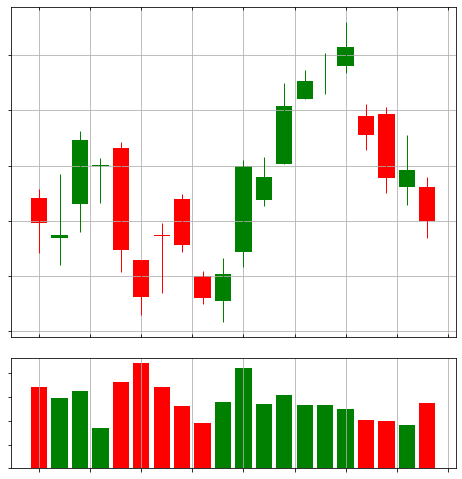

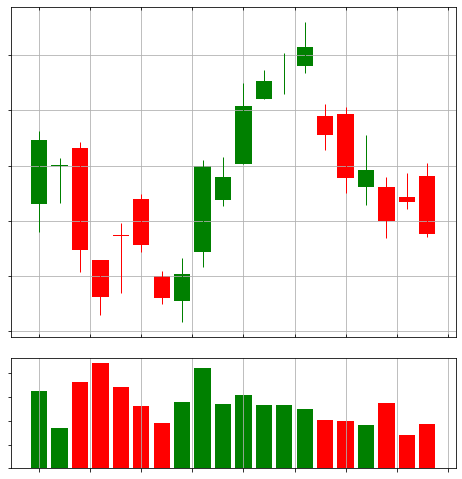

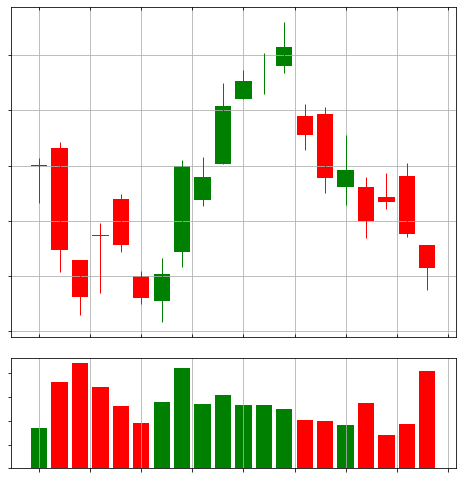

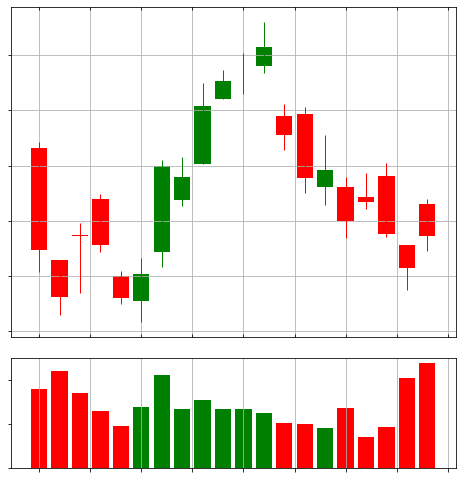

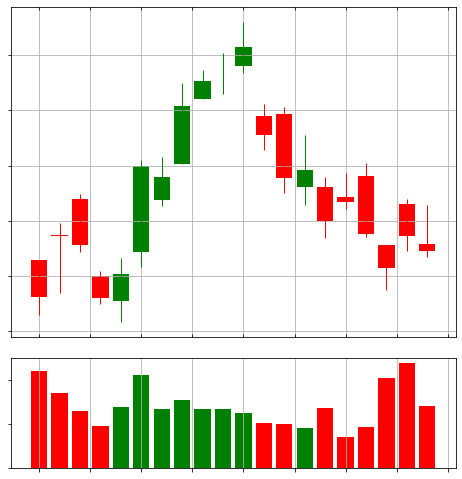

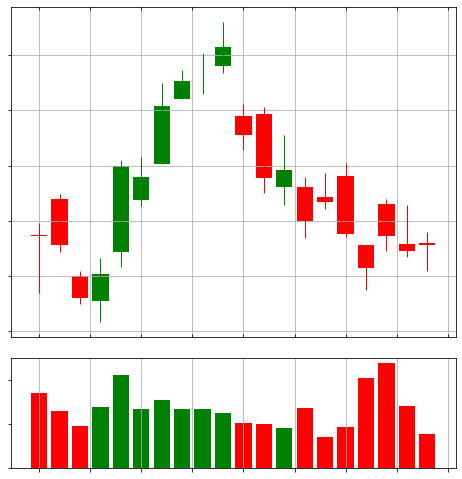

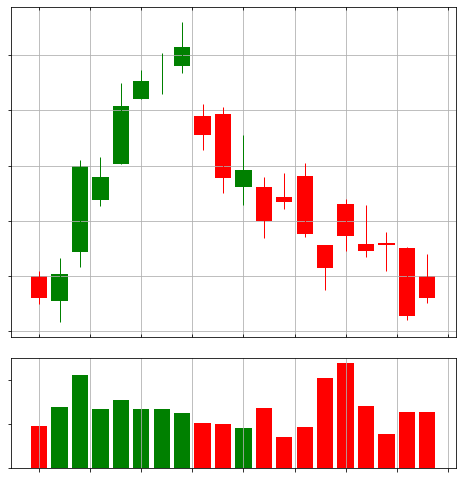

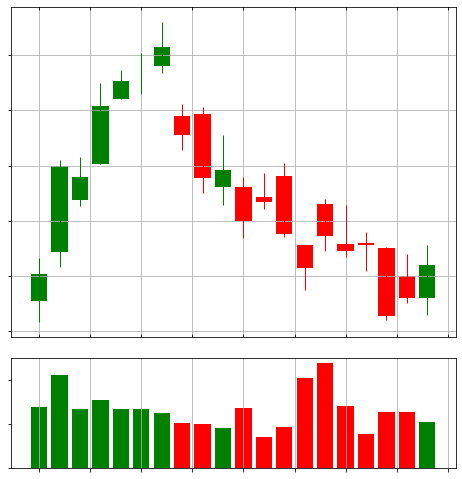

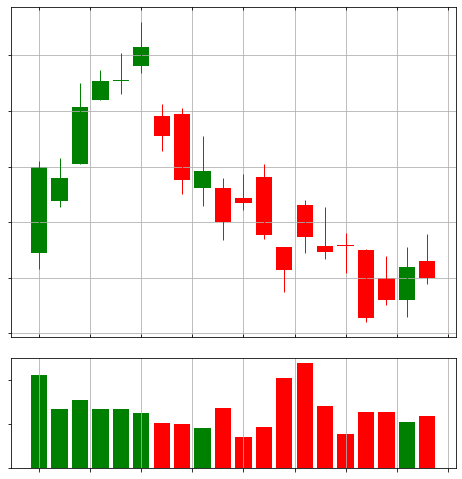

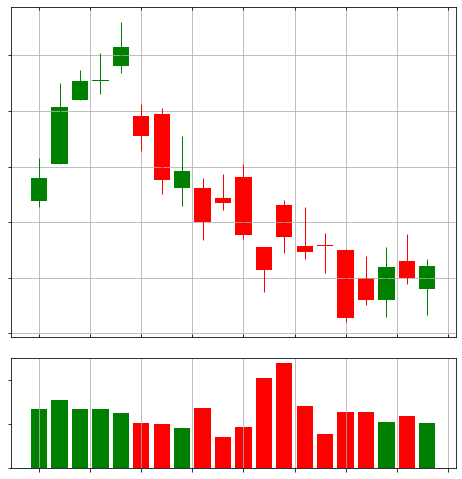

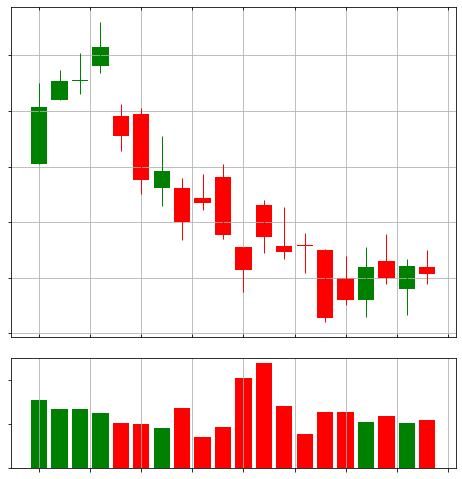

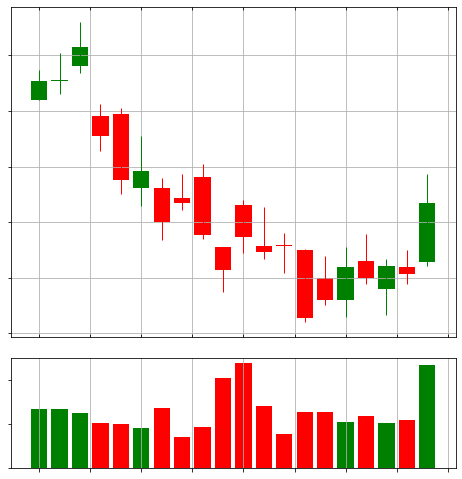

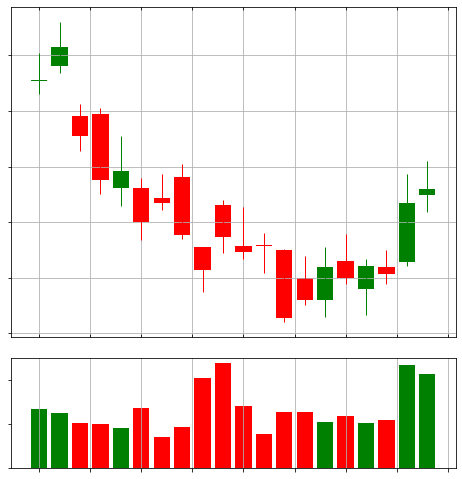

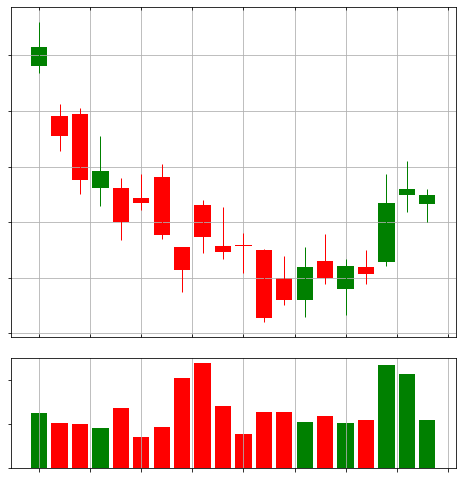

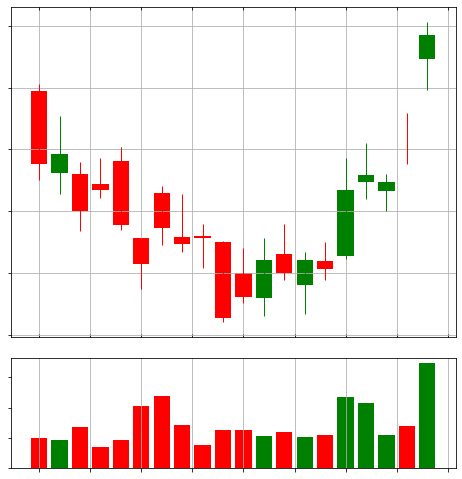

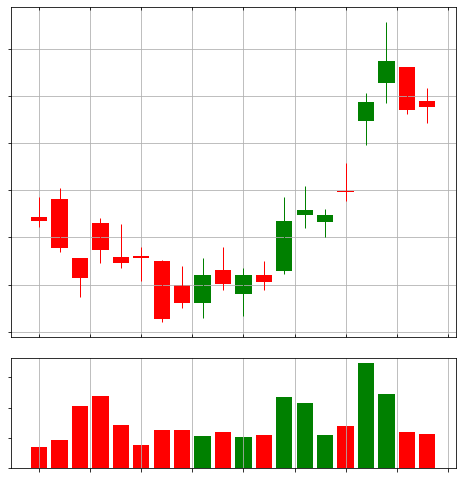

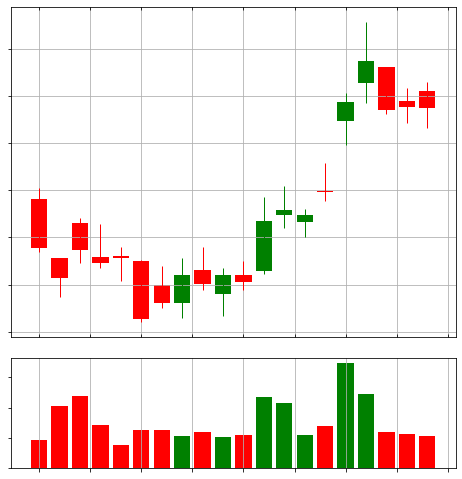

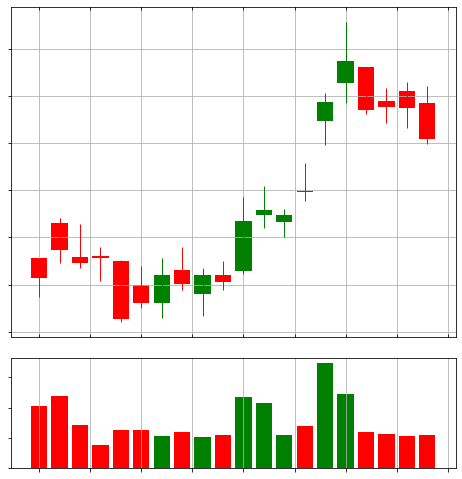

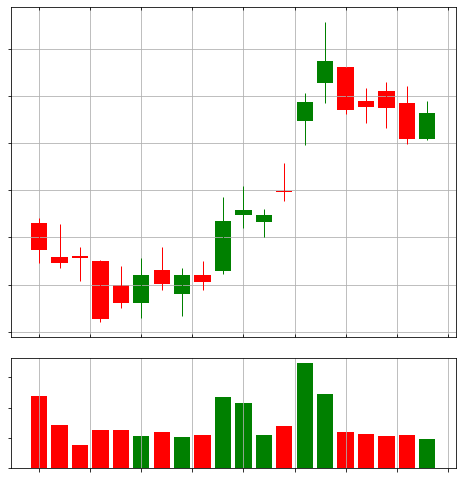

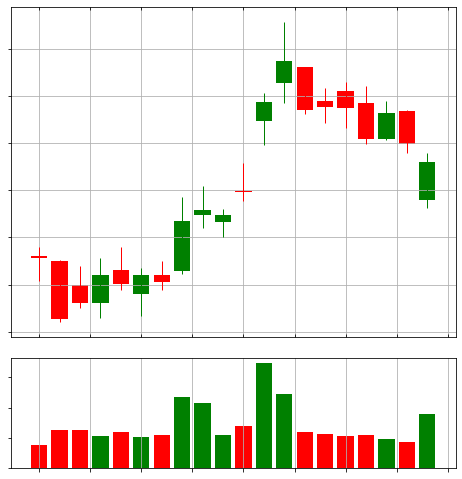

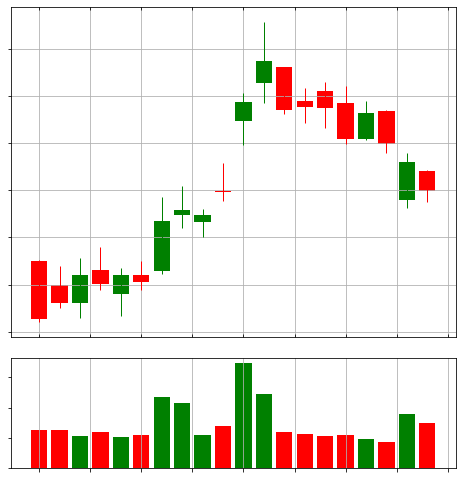

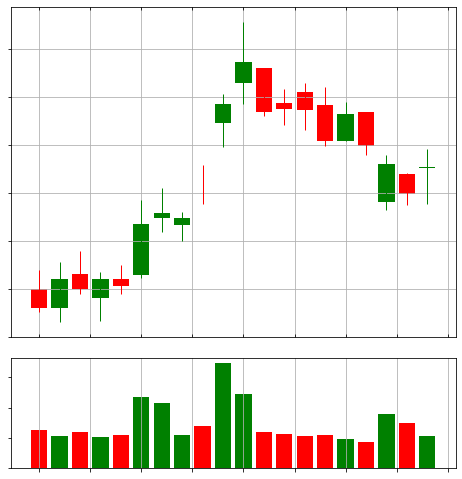

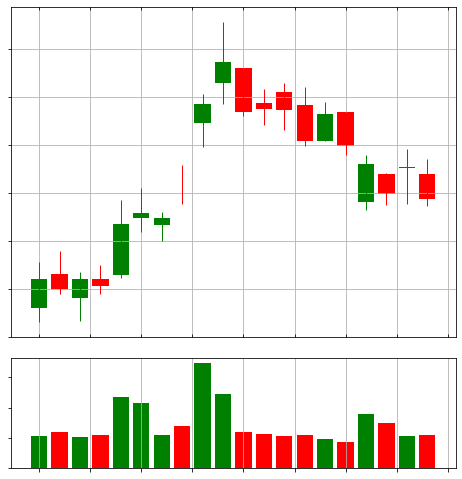

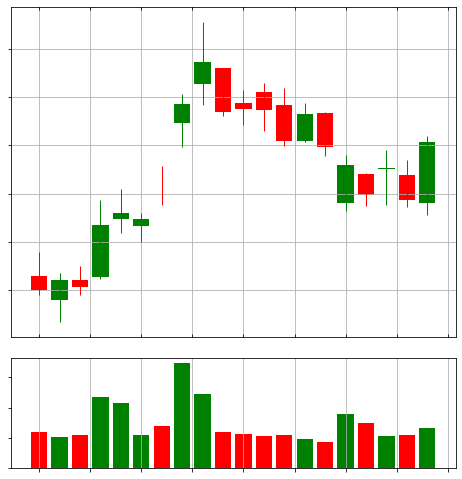

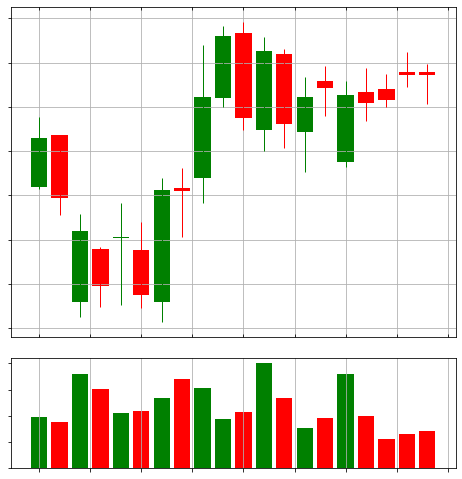

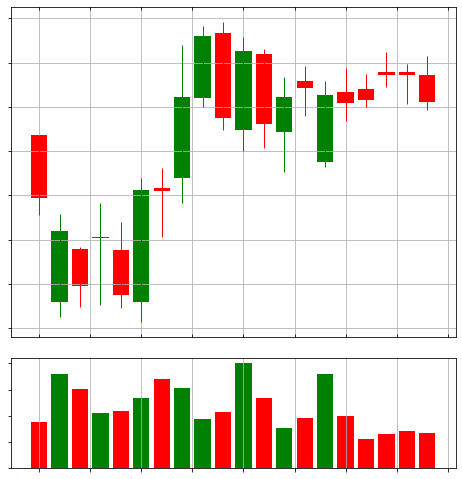

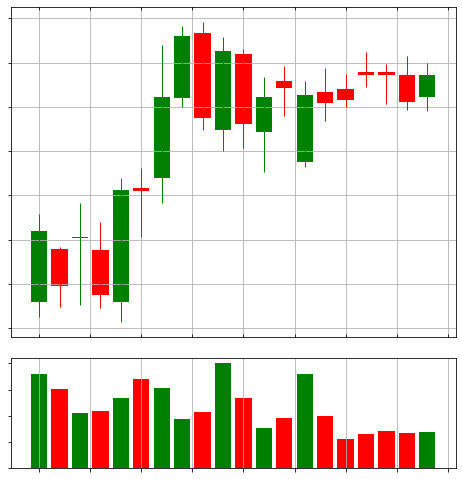

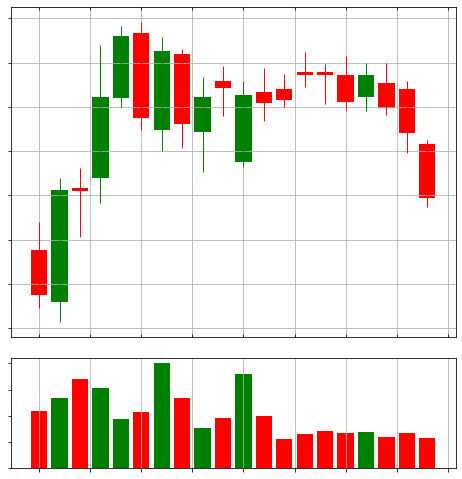

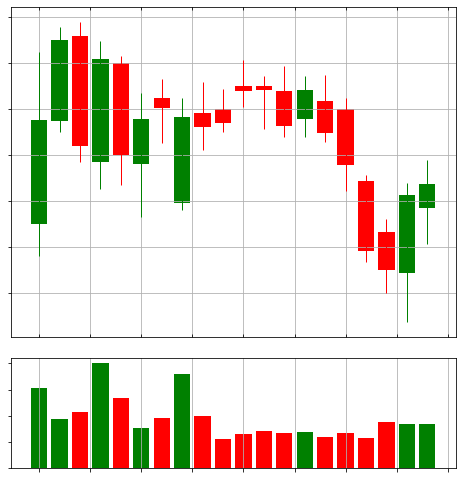

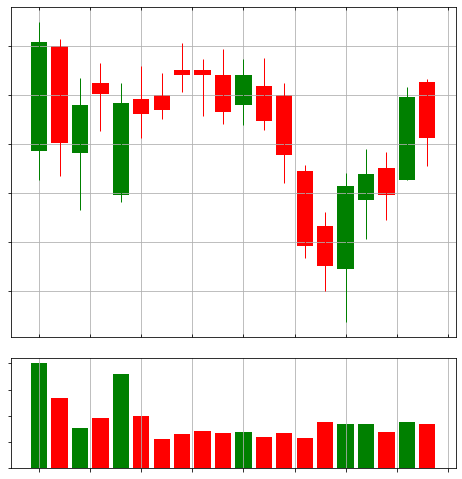

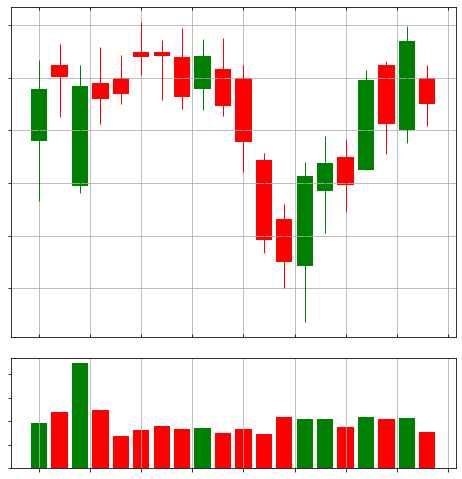

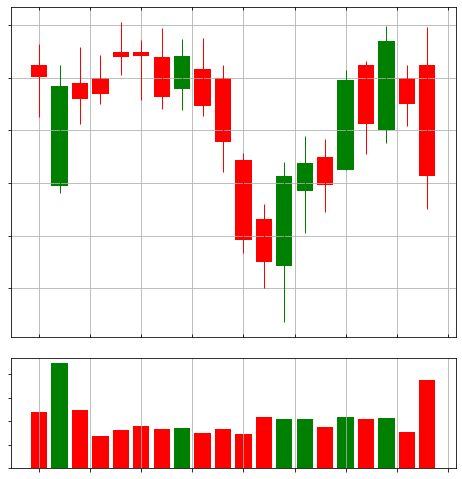

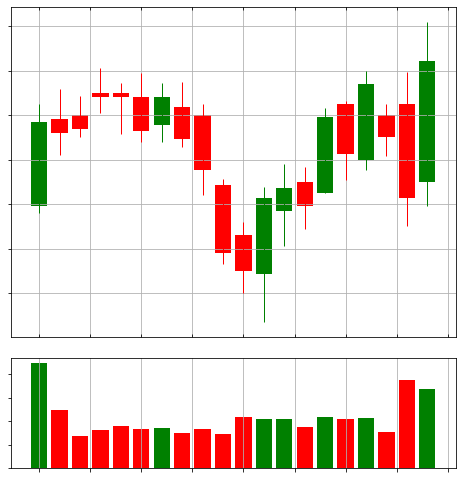

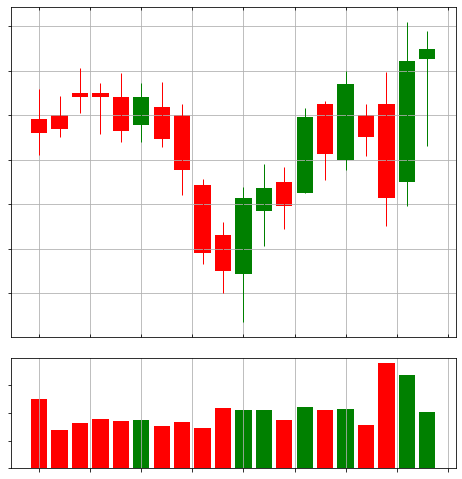

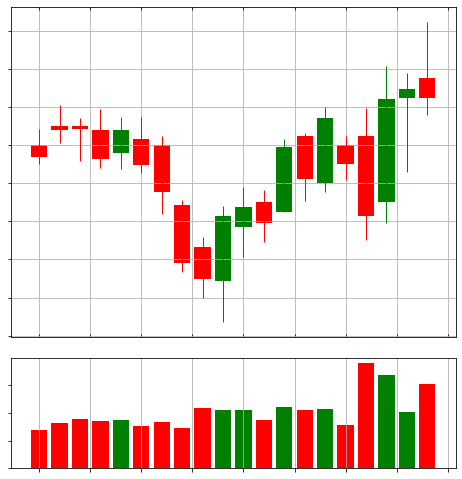

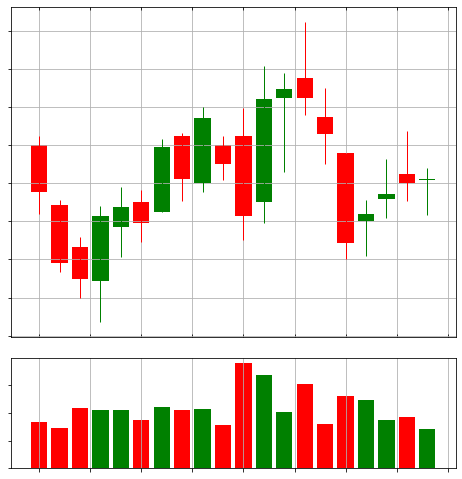

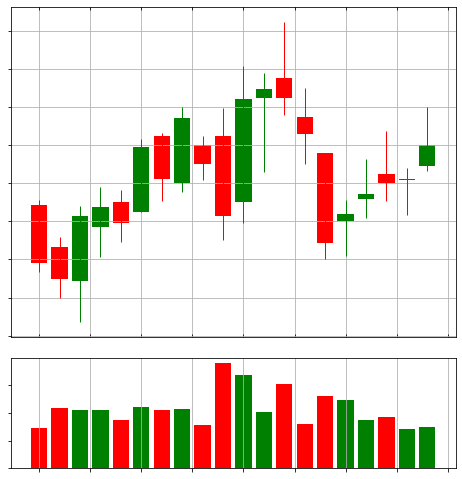

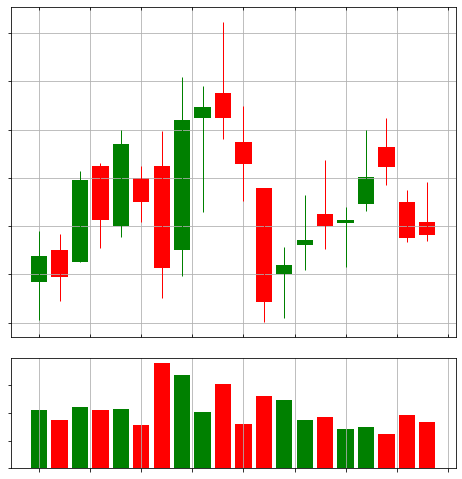

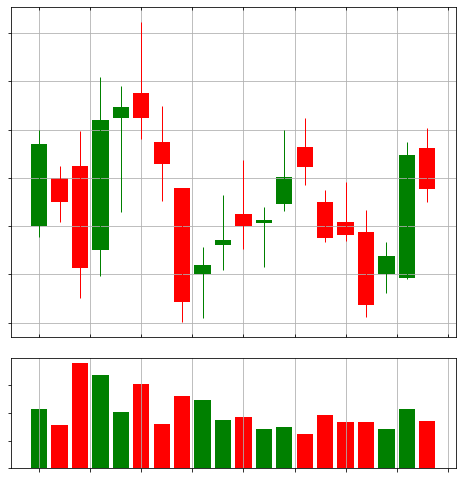

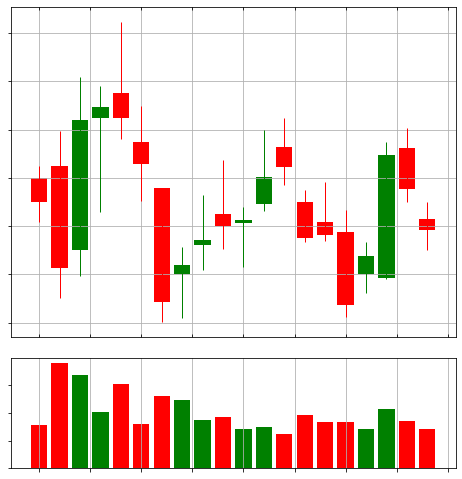

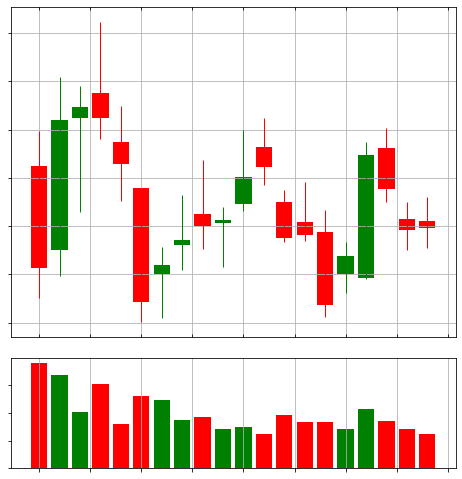

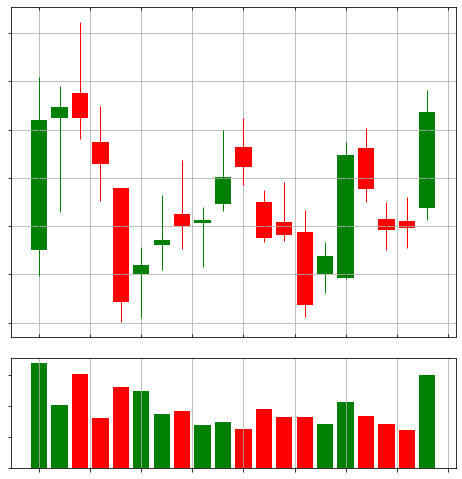

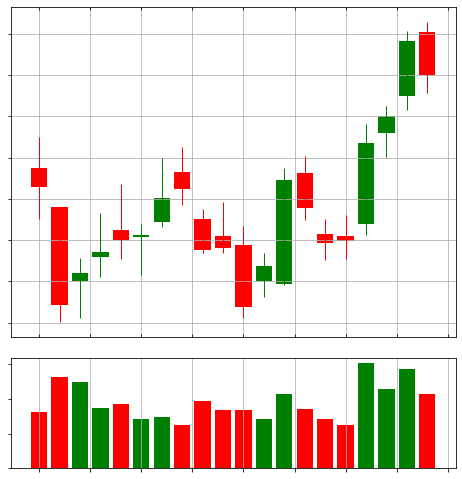

In [11]:
equities=['RELIANCE','TCS','INFY','HDFCBANK','HINDUNILVR', 'SBIN','BAJFINANCE', 'HDFC', 'ICICIBANK', 'KOTAKBANK']
for equity in equities :
    df_pricing=obtain_data(equity,date(2019,9,1),date(2020,9,1))
    df=df_pricing.copy()
    df=df.reset_index(drop=True)
    n_days=5
    fraction_movement=0.037
    df['Trend']=None
    for i in range(len(df)):
        print("i = ", i)
        try :
            for n in range(n_days):
                print("n = ", n)
                if  df.loc[i,'close_price'] - df.loc[i+n,'close_price'] >= fraction_movement*df.loc[i,'close_price']:
                    df.loc[i,'Trend'] ='Down'
                    if i >=20 :
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig('Candle Data/Down/{0}{1}.png'.format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Down',i,n)
                    break
                elif df.loc[i+n,'close_price'] - df.loc[i,'close_price'] >= fraction_movement*df.loc[i,'close_price'] :
                    df.loc[i,'Trend']='Up'
                    if i >20 :    
                        fig=plot_candles(df_pricing[i-20:i],volume_bars=True)
                        fig.savefig('Candle Data/Up/{0}{1}.png'.format(df_pricing['Symbol'][i],i),dpi=70)
                    print('Up',i,n)
                    break
                else :
                    df.loc[i,'Trend']= 'No Trend'
        except :
            print(i)
            pass

In [12]:
df

Date     Symbol  open_price     high      low  close_price  \
0    2019-09-03  KOTAKBANK     1429.00  1429.00  1405.05      1414.30   
1    2019-09-04  KOTAKBANK     1414.10  1438.00  1398.65      1426.45   
2    2019-09-05  KOTAKBANK     1431.90  1441.85  1405.45      1410.15   
3    2019-09-06  KOTAKBANK     1412.50  1444.60  1412.50      1441.55   
4    2019-09-09  KOTAKBANK     1439.00  1474.55  1424.05      1471.30   
..          ...        ...         ...      ...      ...          ...   
243  2020-08-26  KOTAKBANK     1410.00  1441.65  1403.20      1436.70   
244  2020-08-27  KOTAKBANK     1441.00  1445.85  1411.55      1420.00   
245  2020-08-28  KOTAKBANK     1410.00  1474.00  1401.00      1467.10   
246  2020-08-31  KOTAKBANK     1488.00  1501.50  1374.00      1401.35   
247  2020-09-01  KOTAKBANK     1419.85  1442.00  1386.10      1430.65   

        VWAP    volume  Deliverable Volume     Trend  
0    1414.50   2752565             1247300        Up  
1    1423.27   2419629              772435  No Trend  
2    1416.19   2381023              927434        Up  
3    1434.12   2245219             1016596  No Trend  
4    1460.69   3212756             1893727  No Trend  
..       ...       ...                 ...       ...  
243  1422.98   5718774             2634770  No Trend  
244  1426.61   4283671             1916974  No Trend  
245  1439.80  10645875             4422762      Down  
246  1430.63   6973853             2255142  No Trend  
247  1416.73   4258229             1337862  No Trend  

[248 rows x 10 columns]